## Library

In [25]:

# --i
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# font = {'family' : 'SimHei',
#         'size'   : 28}
# matplotlib.rc('font', **font)

config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [1]:
# Package
# --begin--
# platform
platform = 'group'
# platform = 'old'

# --Import--
# Common
import os
import sys
import time
import pandas as pd
import numpy as np

import math
from math import log, e

from datetime import date, timedelta

# DataProcessing
# file
# import openpyxl
import xlrd

# pyspark
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql import functions as pyspark_f
# from pyspark.sql.functions import sum,expr,count,col,lit,isnull,when,countDistinct,rand,asc,array,udf,concat,concat_ws

# from pyspark.ml.feature import OneHotEncoder, StringIndexer
# from pyspark.sql.types import StringType,IntegerType,FloatType,LongType,ArrayType

import shutil
from multiprocessing import Pool
import xlrd

# feat
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler, MaxAbsScaler,Normalizer

# time series anomaly detection
# from pylab import rcParams
# from PyAstronomy import pyasl
# import pyculiarity
# from pyculiarity import detect_ts
# from pyculiarity.date_utils import format_timestamp
# import sesd
# from statsmodels.tsa.seasonal import seasonal_decompose,STL
from pandas.plotting import register_matplotlib_converters

# Model
import pickle
from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.decomposition import PCA

import torch
# import torch.tensor
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data
from torch.autograd import Variable
from collections import OrderedDict

# model
# ml
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,\
    BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,VotingClassifier

from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
# dl
from torch import nn, einsum
from random import random,randint
from numpy import array,argmax
# from keras.models import Sequential
# from keras.layers import LSTM,Dense,Conv2D,Conv1D,MaxPooling2D,MaxPooling1D,Flatten,TimeDistributed,Dropout
# from keras.metrics import accuracy,binary_accuracy

# import tensorflow as tf

# from sklearn.model_selection import StratifiedKFold

# if platform == 'group':
#     from einops import rearrange, repeat
#     from einops.layers.torch import Rearrange

# hyperparameter
# import optuna
# from optuna.trial import TrialState

# metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,\
    mean_squared_error,log_loss,classification_report,confusion_matrix,\
    roc_curve,roc_auc_score,average_precision_score,precision_recall_curve

#,plot_precision_recall_curve

# visualization
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib
font = { 'size'   : 24}
matplotlib.rc('font', **font)

import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm
# import scipy
# from scipy.stats import f
# import scipy.stats as stats
# # additional packages
# from statsmodels.stats.diagnostic import lilliefors

# other
import gc
# import dill
from pdb import set_trace as st
import profile
import random
import joblib
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
# --Endings--

## Function

In [2]:
# --Function--
# Common
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame得分
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
        print(f'pkl2df:{file} succeeded')
    except:
        print(f'pkl2df:{file} failed')
    return df

def xlsx2df(filename,path='default'):
    '''
    .xlsx->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.xlsx'
    print(f'filename:{file}')
    df = None
    try:
        df = pd.read_excel(file, engine='openpyxl')
        print(f'xlsx2df:{file} succeeded')
    except Exception as e:
        print(f'xlsx2df:{file} failed')
        print(e)
    return df    
def csv2df(filename,path='default'):
    '''
    .csv->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.csv'
    print(f'filename:{file}')
    df = None
    try:
        # df = pd.read_csv(file)
        # df = pd.read_csv(file, encoding='utf-8')
        # df=pd.read_csv(file,encoding='ISO-8859-1')
        df=pd.read_csv(file,encoding='GBK')
        # df = pd.read_csv(file, encoding="windows_1258")
        print(f'csv2df:{file} succeeded')
    except Exception as e:
        print(f'csv2df:{file} failed')
        print(e)
    return df
    
def check_file(filename=None,path='default',size_min=0):
    '''
    Check Attribute of File        
    查看工作目录下各个文件及大小
    '''
    if path == 'default':
        global save_path
        path = save_path
        # print(path)
    cur_file_list = os.listdir(path)
    cur_file_list = sorted(cur_file_list,key= lambda i:i[0])
    if filename is None:
        for file in cur_file_list:
            size = os.path.getsize(path + str(file))
            size = size / (2**20)
            if size > size_min:
                print(file,end ='--')
                print(f'{size:.2f} MB')
    else:
        for file in cur_file_list:
            if filename in file:
                size = os.path.getsize(path + str(file))
                size = size / (2**20)
                if size > size_min:
                    print(file,end ='--')
                    print('%.2f'%size)
                    # print(size // (2**20))

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    df = pd.DataFrame(df)
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        # print(df.columns)
        print(df.info(verbose = True, null_counts = True))
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    df = pd.DataFrame(df)
    print(df.head(rows))
    
    print('**********************************')

def check_all(df,rows=10):
    print("*******************start check_all**************************")
    check_format(df)
    check_detail(df, rows=rows)
    
def check_module():
    import pkgutil
    # print(pkgutil.iter_modules())
    for x in list(pkgutil.iter_modules()):
        print(x[1])
    
def pandasdf2sparkdf(pandas_df):
    '''
    PandasDF2SparkDF
    '''
    # for col in pandas_df.columns:
    #     if ((pandas_df[col].dtypes != np.int64) and (pandas_df[col].dtypes != np.float64)):
    #         # pandas_df[col] = pandas_df[col].fillna('')
    #         pandas_df[col].fillna('',inplace=True)
    
    # print(pandas_df.info(verbose=True))        
    spark_df = spark.createDataFrame(pandas_df)
    return spark_df,pandas_df

def sparkdf2hive(spark_df,target_table):
    spark_df.createOrReplaceTempView('TempTable')
    sqlContext.sql("insert overwrite table " + target_table + " select * from TempTable")
    print('sparkdf2hive success')

def simple_parquet2sparkdf(filename, mode='no_check'):
    print(f'----------------start reading {filename}----------------')
    spark_df = spark.read.format("parquet").option("inferSchema","true").option("header",'true').load(filename)
    if mode == 'check':
        check_spark_df(spark_df)
    print('----------------read successfully-----------')    
    return spark_df    
    
def parquet2sparkdf(user_type, table_type, date, version, mode='no_check'):
    
    # filename = filename + '.parquet'
    filename = get_filename(user_type,table_type,date,version,'.parquet')
	# filename = './qk/' + filename
    print(f'----------------start reading {filename}----------------')
    spark_df = spark.read.format("parquet").option("inferSchema","true").option("header",'true').load(filename)
    if mode == 'check':
        check_spark_df(spark_df)
    print('----------------read successfully-----------')    
    return spark_df

def sparkdf2parquet(df, user_type, table_type, date, version):
    
    # filename = filename + '.parquet'
    filename = get_filename(user_type,table_type,date,version,'.parquet')
	# filename = './qk/' + filename
    print(f'----------------start writing {filename}----------------')
    df.write.format('parquet').mode('overwrite').save(filename)
    print('----------------write successfully-----------')
    
def pandasdf_fillna_number(pandas_df):
    for col in pandas_df.columns:
        if ((pandas_df[col].dtypes == np.int64) or (pandas_df[col].dtypes == np.float64)):
            pandas_df[col].fillna(0,inplace=True)
    return pandas_df

def set_deal_filename(file_selection,file_suffix='.parquet'):
    deal_filename = file_selection + file_suffix
    deal_filename_backup = deal_filename[:-len(file_suffix)] + '_backup' + file_suffix
    return deal_filename,deal_filename_backup
    
# DataProcessing
def feats2cols(feat_list):
    '''
    SQL
    '''
    key = feat_list[0] # key is the first feat by default
    cols = ""
    for feat in feat_list:
        cols+=feat+','
    cols = cols[:-1] # remove the last comma
    return key,cols

def unqiue_element_num(x):
    a = len(np.unique(x))
    return a    
    
def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print(f'file:{file} has been saved in {save_path}')
    pickle.dump(df,open(file,'wb'))
    return None

def remove_file(file,path='default',mode='rm'):
    '''
    check and clean space
    '''
    if path == 'default':
        global save_path
        path = save_path
        # print(path)
    cur_file_list = os.listdir(path)
    for cur_file in cur_file_list:
        if file == cur_file:
            remove_file = path+cur_file
            if mode == 'check':
                print(remove_file)
            elif mode == 'rm':
                os.remove(remove_file)
                # os.unlink(path)
                print('success')
                
def pkl2pkl(src_file,tar_file,path='default',mode='no_bak'):
    '''
    Pkl->Pkl
    mode:
        del
        no_bak
    '''
    if path == 'default':
        global save_path
        path = save_path
    df = pkl2df(src_file,path)
    df2pkl(df,tar_file,path,mode)
    if mode == 'del':
        remove_file(src_file,path)
    return     

    
    
def pkls2pkl(src_file_list,tar_file,path='default'):
    '''
    # Pkls->Pkl
    '''
    if path == 'default':
        global save_path
        path = save_path
    df = pd.DataFrame()
    for src_file in src_file_list:
        tmp_df = pkl2df(src_file,path)
        df = pd.concat([tmp_df,df],ignore_index=True)
    df2pkl(df,tar_file,path)
    return        

def lists2list(lists):
    extended_list = []
    for single_list in lists:
        extended_list.extend(single_list)
    single_set = set(extended_list)
    extended_list = list(single_set)
    return extended_list

def list2uniquelist(input_list):
    single_set = set(input_list)
    unique_list = list(single_set)
    return unique_list
    
def cal_gb(num):
    return num/1024/1024/1024
    
def check_memory():
    '''
    Check Memory
    '''
    mem = virtual_memory()
    total = cal_gb(mem.total)# total physical memory available
    print('total:'+str(total))
    available = cal_gb(mem.available)# total physical memory available
    print('available:'+str(available))


def check_disk_usage(path='default'):
    '''
    Check Hard Disk
    '''
    if path == 'default':
        global save_path
        path = save_path
    print(path)
    total, used, free = shutil.disk_usage(path)
    print("Total: %d GiB" % (total // (2**30)))
    print("Used: %d GiB" % (used // (2**30)))
    print("Free: %d GiB" % (free // (2**30)))

def show_file(file_dir='default'):
    if file_dir == 'default':
        global save_path
        file_dir = save_path
        # print(path)
    for root, dirs, files in os.walk(file_dir):
        print('root_dir:', root)  # 当前目录路径
        print('sub_dirs:', dirs)  # 当前路径下所有子目录
        print('files:', files)  # 当前路径下所有非目录子文件



# feat
def sub_binned_entropy(series,period=30,bin_num=7):
    '''
    计算某一特征的时间序列在等距分箱下的信息熵
    '''
    # pandas version
    # Variable Statement
    #  Args
    base=2
    # bin_num = 7
    # period = 30
    # minor_action = 1e-6 # 最小作用量
    
    #  Intermediate Variables
    valid_val = 0
    count_dict = {}
    
    # Output
    entropy = 0
    
    # Calculate the binned entropy
    bin_list = list(pd.cut(series,bin_num,labels=False)) #labels=False 返回分箱后的箱子序号序列
    for bin in bin_list:
        if bin in count_dict.keys():
            count_dict[bin] += 1
        else:
            count_dict[bin] = 1
    
    for val in count_dict.values():
        p = float(val/period)
        entropy -= p*math.log(p,base)
        valid_val += val
    
    # Validation
    if valid_val != period:
        print('valid_val:{} is not equal to period:{}'.format(valid_val,period))
        #todo try-catch
        return None
    
    # series['binned_entropy_'+str(bin_num)] = entropy # ValueError: Length of passed values is 30, index implies 31.
    # print('series.values:{}'.format(series.values))
    # print('bin_list:{}'.format(bin_list))
    # print('entropy:{}'.format(entropy))

    return entropy

def apply_entropy(df,feat,month='202004',bin_num=7):
    start = time.time()
    
    global month_period_dict
    period=month_period_dict[int(month[-2:])]
    # Feat Series collection
    feat_list = []
    for day in range(1,period+1,1):
        if day <10:
            day = '0' + str(day)
        else:
            day = str(day)
        feat_list.append(month+day+'_'+feat)    
    df = df[feat_list]
    entropy = df.apply(sub_binned_entropy,args=(period,bin_num),axis='columns')
    
    print('time cost:{}'.format(time.time()-start))
    # col = '202004_tgps_count_entropy'
    # print(df.groupby(col)[col].describe())# 显示分组后的数据分布
    # df = df[col]
    # check_format(df)
    return entropy

def sub_extract_time(df,col):
    # df['year'] = int(df[col][:4])
    # df['month'] = int(df[col][4:6])
    df['day'] = int(df[col][6:8])
    # df['hour'] = int(df[col][8:10])
    # df['min'] = int(df[col][10:12])
    # df['sec'] = int(df[col][12:14])
    return df

def apply_extract_time(df,feat):
    start = time.time()
    df = df.apply(sub_extract_time,args=(feat,),axis='columns')
    print(f'time cost of function apply_extract_time:{time.time()-start}')
    return df

def extract_time(df,col):
    # df['year'] = int(df[col][:4])
    # df['month'] = int(df[col][4:6])
    # df['day'] = int(df[col][6:8])
    # df['hour'] = int(df[col][8:10])
    # df['min'] = int(df[col][10:12])
    # df['sec'] = int(df[col][12:14])
    # df['year'] = df[col][:4]
    # df['month'] = df[col][4:6]
    # df['day'] = df[col][6:8]
    # df['hour'] = df[col][8:10]
    # df['min'] = df[col][10:12]
    # df['sec'] = df[col][12:14]
    return df
    
def set_limit(record_num):
    return f'limit {record_num}'

# --EDA--
# cdf
def plot_cdf(bl,xlabel='Day tgps_count Entropy',max_val=float('inf'),ylabel='CDF'):
    ecdf = ssm.distributions.ECDF(bl)
    x =np.linspace(min(bl), min(max(bl),max_val))
    y = ecdf(x)
    fig, ax = plt.subplots(figsize=(20, 12))

    ax.plot(x,y)
    
    ax.set_xlabel(xlabel)
    # ax.set_ylabel(ylabel)
    ax.set_ylabel("CDF")
    ax.grid(True)
    plt.show()

def plot_hist(bl,xlabel='Day tgps_count Entropy',num_bins = 50,max_val=float('inf')):
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.hist(bl, bins = num_bins, density=True, range=[min(bl), min(max(bl),max_val)],facecolor='gray',align='mid')
    ax.set_xlabel(xlabel)
    plt.show()
    
def plot_cdf_hist(bl,xlabel='Day tgps_count Entropy',max_val=float('inf'),num_bins = 50,ylabel='CDF'):
    ecdf = ssm.distributions.ECDF(bl)
    x =np.linspace(min(bl), min(max(bl),max_val))
    y = ecdf(x)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    ax_twinx = ax.twinx()

    ax_twinx.hist(bl, bins = num_bins, density=True, range=[min(bl), min(max(bl),max_val)],facecolor='gray',align='mid',zorder=1)
    ax.plot(x,y,zorder=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("CDF")
    ax_twinx.set_ylabel("Probability Density")
    ax.grid(True)
    # ax.set_xlim(0,min(max(bl),max_val))
    ax.set_ylim(0,1)
    # ax_twinx.set_ylim(0,0.00175)
    plt.show()    
    
def plot_cdf_two(df1, df2, col):
    fst_ecdf = ssm.distributions.ECDF(df1[col])
    fst_x = np.linspace(0, df1[col].max())
    fst_y = fst_ecdf(fst_x)
    plt.plot(fst_x, fst_y, linewidth='1', color='red')
    print(col + '_mean: ', df1[col].mean())
    
    scd_ecdf = ssm.distributions.ECDF(df2[col])
    scd_x = np.linspace(0, df2[col].max())
    scd_y = scd_ecdf(scd_x)
    plt.plot(scd_x, scd_y, linewidth='1', color='blue')
    print(col + '_mean: ', df2[col].mean())
    
    x_max = max(df1[col].max(),df2[col].max())
    plt.title(col+' CDF', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Distributions', fontsize=16)
    plt.legend(['normal_'+col,'lost_'+col], fontsize=16)
    plt.xlim(0, x_max)
    plt.ylim(0, 1)
    plt.show()
# heatmap
    
# --Encoding--
def onehot_encoding(df,feat_list,mode='save'):
    '''
    One-of-K encoding on an array of length K  ??
    Basic method: Used with most linear algorithms  ??
    Dropping first column avoids collinearity ??
    Sparse format is memory-friendly  ??
    Most current implementations don't gracefully treat missing, unseen variables how to avoid it
    '''
    func_suffix = ''
    onehot_encoder = OneHotEncoder(sparse=False)
    if mode == 'save':
        func_suffix = '_onehot'
    for feat in feat_list:
        np_feat = df[feat].values
        np_feat = np_feat.reshape(-1,1)
        # print(np_feat)
        feat_onehot_encoded=onehot_encoder.fit_transform(np_feat)
        feat_onehot_encoded = pd.DataFrame(feat_onehot_encoded)
        # print(feat_onehot_encoded)
        for index,col in enumerate(feat_onehot_encoded.columns):
            # print(feat_onehot_encoded[col])
            df[feat+func_suffix+str(index)] = feat_onehot_encoded[col]
    return df

# def onehot_encoding_spark(df,feat_list):
#     for feat in feat_list:
#         string_indxr =  StringIndexer().setInputCol(feat).setOutputCol(feat+'_ind')
#         # feat_ind = string_indxr.fit(df).transform(df.select(feat))
#         feat_ind = string_indxr.fit(df.select(feat)).transform(df.select(feat))
#         one_hot_encoder = OneHotEncoder().setInputCol(feat_ind).setOutputCol(feat+'_onehot')
#         tmp = one_hot_encoder.transform(feat_ind)
#         tmp.show()
#     return df    

def onehot_encoding_spark(df,cols):
    '''
    for non-tree-based model:logistic,svm,nn
    '''
    new_df = df
    num = 0
    total = len(cols)
    print('onehot_encoding has started')
    for col in cols:
        num += 1
        print(f"{num}/{total} feature is string indexing:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        string_indexer = StringIndexer(inputCol = col, outputCol = col + "_index")
        new_df = string_indexer.fit(new_df).transform(new_df).drop(col)
        new_df = new_df.withColumnRenamed(col + '_onehot', col)
        # new_df.show()
        # print(f'col:{col}')
        print(f"{num}/{total} feature is onehot encoding:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        onehot_encoder = OneHotEncoder(inputCol = col, outputCol = col + "_onehot", dropLast = False)
        new_df = onehot_encoder.transform(new_df)
        # new_df = onehot_encoder.transform(new_df).drop(col)
        # new_df = new_df.withColumnRenamed(col + '_onehot', col)
        # new_df.withColumn('update_time',time.strftime('%Y-%m-%d %H:%M:%S'))
        # new_df.show()
    print('onehot_encoding has finished')
    return new_df
    
def label_encoding(df,feat_list,mode='save'):
    '''
    Give every categorical variable a unique numerical ID
    Useful for non-linear tree-based algorithms
    Does not increase dimensionality
    Randomize the cat_var -> num_id mapping and  retrain, average, for small bump in accuracy
    '''
    func_suffix = ''
    le = LabelEncoder()
    if mode == 'save':
        func_suffix = '_label'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        le.fit(df[feat])
        df[enc_feat]=le.transform(df[feat])
    return df

# def label_encoding_spark(df,cols,mode='fit',encoder_list=[]):
#     new_df = None
#     total = len(cols) - 1
#     print('label_encoding has started')
#     encoder = None
#     for i,col in enumerate(cols):
#         if mode == 'fit':
#             print(f"{i}/{total} feature is string fitting:{time.strftime('%Y-%m-%d %H:%M:%S')}")
#             print(f'col:{col}')            
#             encoder = StringIndexer(inputCol = col, outputCol = col + "_index")
#             # encoder = StringIndexer.setInputCol(col).setOutputCol(col+"_index")
#             encoder.fit(df)
#             encoder_list.append(encoder)
#         elif mode == 'transform':
#             print(f"{i}/{total} feature is string indexing:{time.strftime('%Y-%m-%d %H:%M:%S')}")
#             print(f'col:{col}')            
#             encoder = encoder_list[i]
#             print(f'type:{type(encoder)}')
#             new_df = encoder.transform(df)
#             print('start renaming')
#             new_df = new_df.withColumnRenamed(col + '_index', col)
#         # new_df.show()
#         # print(f'col:{col}')
#     print('label_encoding has finished')
#     if mode == 'fit':
#         return encoder_list
#     elif mode == 'transform':
#         return new_df    

def label_encoding_spark(src_df,tar_df,cols):
    # new_df = tar_df
    total = len(cols) - 1
    print('label_encoding has started')
    for i,col in enumerate(cols):
        print(f"{i}/{total} feature is string fitting:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f'col:{col}')            
        encoder = StringIndexer(inputCol = col, outputCol = col + "_index")
        # encoder = StringIndexer.setInputCol(col).setOutputCol(col+"_index")
        tar_df = encoder.fit(src_df).transform(tar_df)
        # check_spark_df(tmp_df)
        # new_df = new_df.withColumn(colName=col+'_index',col=tmp_df.select(col+'_index'))
        # encoded_col = col + '_index'
        # selected_col = tmp_df.select(tmp_df[encoded_col])
        # # selected_col = tmp_df.select(tmp_df.columns[-1])
        # print(f'type(selected_col):{type(selected_col)}')
        
        # # new_df = new_df.join()
        # new_df = new_df.withColumn(colName=col+'_index',col=lit(selected_col))
        # print('start renaming')
        # new_df = new_df.withColumnRenamed(col + '_index', col)
        # new_df.show()
        # print(f'col:{col}')
    print('label_encoding has finished')
    return tar_df   
    
def sub_round_encoding(series,feat,enc_feat):
    series[enc_feat]=int(round(series[feat]))
    return series
    
def round_encoding(df,feat_list,mode='save'):
    func_suffix = ''
    if mode == 'save':
        func_suffix = '_round'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        df= df.apply(sub_round_encoding,axis=1,args=(feat,enc_feat,))
    return df

def round_encoding_spark(df,cols):
    total = len(cols) - 1
    print('round_encoding has started')
    for i,col in enumerate(cols):
        print(f"{i}/{total} feature is encoding:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f'col:{col}')
        df = df.withColumn(col+'_round', df[col].cast(IntegerType()))

    print('round_encoding has finished')
    return df     
    
# def target_encoding(df,feat_list,mode='save'):
#     '''
#     Do in cross-validation manner
#     Add smoothing to avoid setting variable encodings to 0.
#     Add random noise to combat overfit
#     '''
#     func_suffix = ''
#     tar_feat='is_halted_next_month'
#     if mode == 'save':
#         func_suffix = '_target'
#     for feat in feat_list:
#         enc_feat = feat+func_suffix
#         df[enc_feat]=0
#         uniq_vals = set(df[feat].values)
#         # print(uniq_vals)
#         for val in uniq_vals:
#             # print('start cal val')
#             # print(val)
#             sample = df[df[feat]==val]
#             # print(sample.shape)
#             pos = sample[sample[tar_feat]==1]
#             # print(pos.shape)
#             tar_ratio = pos.shape[0]/sample.shape[0]
#             # print(tar_ratio)
#             # sample[enc_feat] = tar_ratio
#             df.loc[df[feat]==val,[enc_feat]]=tar_ratio
#     return df
def target_encoding(df,feat_list,mode='save'):
    '''
    Do in cross-validation manner
    Add smoothing to avoid setting variable encodings to 0.
    Add random noise to combat overfit
    '''
    func_suffix = ''
    tar_feat='is_halted_next_month'
    if mode == 'save':
        func_suffix = '_target'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        statistics_df = df.groupby(feat).agg(churner_num=pd.NamedAgg(column=tar_feat,aggfunc='sum'),group_user_num = pd.NamedAgg(column=feat,aggfunc='count'))
        # check_format(statistics_df)
        # check_detail(statistics_df)
        df = df.merge(statistics_df,how='left',on=feat)
        df.rename(columns={'churner_num':enc_feat+'_churner_num','group_user_num':enc_feat+'_group_user_num'},inplace=True)
        # check_format(df,'cols')
        df[enc_feat]=df[enc_feat+'_churner_num']/df[enc_feat+'_group_user_num']
    return df

def target_encoding_spark(df,feat_list,tar_feat,mode='save'):
    func_suffix = ''
    total = len(feat_list) - 1
    print('target_encoding has started')    
    if mode == 'save':
        func_suffix = '_target'
    for i,feat in enumerate(feat_list):
        print(f"{i}/{total} feature is encoding:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f'feat:{feat}')
        enc_feat = feat+func_suffix
        user_group_df = df.groupBy(feat).count().withColumnRenamed("count",'tmp_group_user_num')

        churner_group_df = df.groupBy(feat).sum(tar_feat).withColumnRenamed(f"sum({tar_feat})",'tmp_group_churner_num')
        
        check_spark_df(user_group_df)
        check_spark_df(churner_group_df)
        
        join_expression = df[feat] == user_group_df[feat]
        join_type="inner"
        
        # df = df.join(user_group_df,join_expression,join_type)
        df=df.join(user_group_df,[feat])
        df=df.join(churner_group_df,[feat])
        # df[enc_feat]=df.select(col('tmp_group_user_num')/col('tmp_group_churner_num'))
        df=df.withColumn(enc_feat,col('tmp_group_churner_num')/col('tmp_group_user_num'))
        check_spark_df(df,10,[enc_feat,feat,'tmp_group_user_num','tmp_group_churner_num'])
        
        df=df.drop('tmp_group_user_num','tmp_group_churner_num')
        
        # df = df.merge(statistics_df,how='left',on=feat)
        # df.rename(columns={'churner_num':enc_feat+'_churner_num','group_user_num':enc_feat+'_group_user_num'},inplace=True)
        # # check_format(df,'cols')
        # df[enc_feat]=df[enc_feat+'_churner_num']/df[enc_feat+'_group_user_num']
    print('target_encoding has finished')
    return df    

def period_generator(month='202004',period=None,start=None):
    global month_period_dict
    if period is None:
        period = month_period_dict[int(month[-2:])]
    period_list = []
    if start is None:
        start = 1
    for day in range(start,start+period,1):
        if day < 10:
            day = '0' +str(day)
        else:
            day = str(day)
        period_feat = month+day
        period_list.append(period_feat)
    return period_list

        
def period_feat(feat='byte_in',month='202004',period=30):
    period_feat_list = []
    for day in range(1,period+1,1):
        if day < 10:
            day = '0' +str(day)
        else:
            day = str(day)
        period_feat = month+day+'_'+feat
        period_feat_list.append(period_feat)
    return period_feat_list

def records2statistics(records,day,kind='cdr',gran='day'):
    statistics = None
    if kind == 'traffic':
        
        addition_sum = records.groupby(by=['prod_inst_id']).sum()
        addition_sum.rename(columns={'byte_in':day+'_byte_in','byte_out':day+'_byte_out','duration':day+'_duration'},inplace=True)
        # check_format(addition_sum)
        # check_detail(addition_sum)
    
        record = pd.DataFrame(records.groupby(by=['prod_inst_id']).size())
        record.rename(columns={0:day+'_record_num'},inplace=True)
        # check_format(record)
        # check_detail(record)
        
        statistics = addition_sum.join(record,how='left',on='prod_inst_id')
        statistics.reset_index(inplace=True)
        statistics.rename({'index':'prod_inst_id'},inplace=True)
        # check_format(statistics)
        # check_detail(statistics)
        
    elif kind == 'cdr':
        # 'prod_inst_id','acc_nbr','calling_nbr','called_nbr','duration','day_id'
        calling_records = records[records['acc_nbr']==records['calling_nbr']]
        called_records = records[records['acc_nbr']==records['called_nbr']]
        # check_format(calling_records,'simple')
        # check_format(called_records,'simple')
        # check_format(records,'simple')
        
        addition_sum1 = calling_records.groupby(by=['prod_inst_id']).sum()
        addition_sum1.rename(columns={'duration':day+'_calling_duration'},inplace=True)
        addition_sum2 = called_records.groupby(by=['prod_inst_id']).sum()
        addition_sum2.rename(columns={'duration':day+'_called_duration'},inplace=True)
        addition_sum = addition_sum1.merge(addition_sum2,how='outer',on='prod_inst_id')
        # check_format(addition_sum1,'simple')
        # check_format(addition_sum2,'simple')
        # check_format(addition_sum,'simple')
        # check_format(addition_sum)
        # check_detail(addition_sum1)
        # check_detail(addition_sum2)
        # check_detail(addition_sum)
    
        record1 = pd.DataFrame(calling_records.groupby(by=['prod_inst_id']).size())
        record1.rename(columns={0:day+'_calling_record_num'},inplace=True)
        record2 = pd.DataFrame(called_records.groupby(by=['prod_inst_id']).size())
        record2.rename(columns={0:day+'_called_record_num'},inplace=True)
        record = record1.merge(record2,how='outer',on='prod_inst_id')
        # check_format(record1,'simple')
        # check_format(record2,'simple')
        # check_format(record,'simple')
        # # check_format(record)
        # check_detail(record1)
        # check_detail(record2)
        # check_detail(record)
        
        statistics = addition_sum.join(record,how='outer',on='prod_inst_id')
        statistics.reset_index(inplace=True)
        statistics.rename({'index':'prod_inst_id'},inplace=True)
        # check_format(statistics,'simple')
        # check_detail(statistics)
    return statistics

def records2statistics_spark(records,day,kind='cdr',gran='day'):
    '''
    daily_traffic_col_list = ['prod_inst_id','byte_in','byte_out','p_day_id','duration']
    daily_cdr_col_list =['prod_inst_id','acc_nbr','calling_nbr','called_nbr','duration']
    '''
    
    statistics = None
    if kind == 'traffic':
        print('*****spark start:*********')
        # records.printSchema()
        # # records.columns()
        # records.show(10)
        
        # records.filter(col("prod_inst_id") == '920460094277').show(100)
        statistics = records.groupBy('prod_inst_id').agg(sum("byte_in").alias(day+'_byte_in'),count("byte_in").alias(day+'_record_num'),sum("byte_out").alias(day+'_byte_out'),sum("duration").alias(day+'_duration'))
        # statistics = records.groupBy('prod_inst_id').agg(sum("duration").alias(day+'_duration'))                # print(type(group_sum)) # list of rows
        # print(type(group_sum)) # list of rows
        # group_sum.show(10)
        # group_sum.filter(col("prod_inst_id") == '920460094277').show()
    elif kind == 'cdr':
        # calling_records = records.filter(col('acc_nbr') == col('calling_nbr'))
        calling_records = records.filter(col('acc_nbr') == col('calling_nbr_new'))
        # calling_records.show(10)
        # called_records = records.filter(col('acc_nbr') == col('called_nbr'))
        called_records = records.filter(col('acc_nbr') == col('called_nbr_new'))
        # called_records.show(10)
        
        calling_statistics = calling_records.groupBy('prod_inst_id').agg(sum("duration").alias(day+'_calling_duration'),count("duration").alias(day+'_calling_record_num'))
        called_statistics = called_records.groupBy('prod_inst_id').agg(sum("duration").alias(day+'_called_duration'),count("duration").alias(day+'_called_record_num'))
        statistics = calling_statistics.join(called_statistics,"prod_inst_id","outer")
        
    
    return statistics
    
def cal_sequence_feat(kind,table_name,col_list,month='202011'):
    sequence_set = None
    global month_period_dict
    period = month_period_dict[int(month[-2:])]
    start = time.time()
    for i in range(1,period+1,1):
    # for i in range(1,11,1):
    # for i in range(1,3,1):
        # Load raw table data
        # Table Selection
        # table_name = 'hlwk_raw_traffic_21_201101_201107' # 2020年11月1号到7号张家界互联网卡目标用户的原始流量表
        # table_name = 'hlwk_simple_cdr_21_202011' # 2020年11月张家界互联网卡目标用户的简单cdr表
        # table_name = 'hlwk_simple_cdr_2012_quick' # 2020年12月互联网卡目标用户的简单cdr表
        # query_table = personal_database + table_name
        query_table = table_name
        
        #  Columns Selection
        # sql_feat_list = daily_traffic_feat_list
        # sql_feat_list = daily_cdr_col_list
        sql_feat_list = col_list
        key,cols = feats2cols(sql_feat_list)
        
        if i < 10:
            day = month + '0' + str(i)
        else:
            day = month + str(i)
        
        constraint_key = ''
        if kind == 'cdr':
            constraint_key = 'day_id' #fea
        elif kind == 'traffic':
            # constraint_key = 'p_day_id'
            constraint_key = 'day_id'
        constraint_value = day
        
        # limit_mode = 'limit 100'
        query_sql = condition_sql.format(cols,query_table,constraint_key,constraint_value,limit_mode)
        
        #  Execute SQL
        # start = time.time()
        spark_df = spark.sql(query_sql) # type:pyspark.sql.dataframe.DataFrame
        
        # # pandas version fit to 10w
        # #  SparkDF2PandasDF
        # daily_set = spark_df.toPandas()
        # # print('the time cost of function {}: {}s'.format('',time.time()-start))
        # # start = time.time()
        # #  Statistics processing
        # daily_statistics = records2statistics(daily_set,day,kind)

        # #  Feature Conjunction
        # if sequence_set is None:
        #     sequence_set = daily_statistics
        # else:
        #     sequence_set = sequence_set.merge(daily_statistics,how='outer',on='prod_inst_id')
        # print('sequence_set.shape):{}'.format(sequence_set.shape))
        
        # spark version
        daily_statistics = records2statistics_spark(spark_df,day,kind)
        
        if sequence_set is None:
            sequence_set = daily_statistics
        else:
            join_type = 'outer'
            join_expression = sequence_set["prod_inst_id"] == daily_statistics['prod_inst_id']
            # sequence_set = sequence_set.join(daily_statistics,join_expression,join_type)
            sequence_set = sequence_set.join(daily_statistics,"prod_inst_id",join_type)
                
    # sequence_pd_set = sequence_set.toPandas()
    
    # check_format(sequence_pd_set)
    # check_detail(sequence_pd_set)
    # print('the time cost of function {}: {}s'.format('',time.time()-start))
    # # sequence_set.fillna(value=0,inplace=True) # forbidden to deal in model
    # print('sequence_set.shape):{}'.format(sequence_pd_set.shape))
    # print('sys.getsizeof(sequence_set):{}'.format(sys.getsizeof(sequence_pd_set)/1024/1024))

    # return sequence_set,sequence_pd_set
    return sequence_set

# sequential
def cal_sequence_feat_spark(id_table,kind,seq_table,col_list,month='202011'):
    '''
    Input:
        table of prod_inst_id;
        kind of sequential data;
        table of sequential data;
        list of extracted feature;
        month
    Output:
        spark dataframe of sequential statistics of some prod_inst_id set
    '''
    seq_df = None
    period = month_period_dict[int(month[-2:])]
    start = time.time()
    print(f'id_table:{id_table}')
    print(f'seq_table:{seq_table}')

    constraint_key = ''
    if kind == 'cdr':
        constraint_key = 'day_id'
    elif kind == 'traffic':
        constraint_key = 'p_day_id'
        constraint_key = 'day_id'
       
    for i in range(1,period+1,1):
    # for i in range(1,3,1):
        # Load raw table data
        # Table Selection
        query_table = seq_table
        
        #  Columns Selection
        sql_feat_list = col_list
        key,cols = feats2cols(sql_feat_list)
        
        if i < 10:
            day = month + '0' + str(i)
        else:
            day = month + str(i)
        constraint_value = day 
        # limit_mode = 'limit 100'
        
        query_sql = ''
        if id_table == '':
            query_sql = condition_sql.format(cols,query_table,constraint_key,constraint_value,limit_mode)
        else:
            # query_sql = "SELECT {} FROM {} WHERE {} = {} {}".format(cols,query_table,constraint_key,constraint_value,limit_mode)
            # query_sql = 'SELECT a.'+cols+' FROM '+query_table+' a,'+id_table+' b WHERE a.'+constraint_key+' = '+constraint_value+' AND a.prod_inst_id=b.prod_inst_id'
            # query_sql = 'SELECT a.'+cols+' FROM '+query_table+' a,'+id_table+' b WHERE a.'+constraint_key+' = '+constraint_value+' AND a.prod_inst_id=b.prod_inst_id and b.game_app_top1_name=1'
            query_sql = "SELECT a.prod_inst_id,a.day_id,duration FROM user_sjwj.view_tmp_app_exp_event_tgps_202110_apn_15303345281_20201124_001 a,user_sjwj.ic_2107 b WHERE a.day_id = "+constraint_value+" AND a.prod_inst_id=b.prod_inst_id and b.game_app_top1_name=1"          
            
        print(f'query_sql:{query_sql}')    
        
        #  Execute SQL
        spark_df = spark.sql(query_sql) # type:pyspark.sql.dataframe.DataFrame
        
        # spark version
        daily_statistics = records2statistics_spark(spark_df,day,kind)
        
        if seq_df is None:
            seq_df = daily_statistics
        else:
            join_type = 'outer'
            join_expression = seq_df["prod_inst_id"] == daily_statistics['prod_inst_id']
            # sequence_set = sequence_set.join(daily_statistics,join_expression,join_type)
            seq_df = seq_df.join(daily_statistics,"prod_inst_id",join_type)
                
    # check_spark_df(seq_df)
    print(f'the time cost of function: {time.time()-start:.1f}s')
    # print(f'sys.getsizeof(seq_df):{sys.getsizeof(seq_df)/1024/1024:.1f} MB') # not correct
    
    # sequence_set.fillna(value=0,inplace=True) # forbidden to deal in model

    return seq_df
#  SparkDF2Parquet
# def sparkdf2parquet(sparkdf,dst_filename,backup_filename,if_backup='True',file_format='parquet',mode='overwrite'):
#     if if_backup=='TRUE':
#         try:
#             old_sparkdf = spark.read.format(file_format).load(dst_filename)
#         except IOError:
#             print(file_format+'file load failed') # dst file not exists due to save the sparkdf firstly
#             sparkdf.write.format(file_format).mode(mode).save(backup_filename)
#         else:    
#             old_sparkdf.format(file_format).mode(mode).save(backup_filename)
#     sparkdf.write.format(file_format).mode(mode).save(dst_filename)
    

# Model
def standardization(df,feat_list=None,scaler=StandardScaler()):
    '''
    标准化处理 统一函数接口
    func可接受4种标准化函数:MinMaxScaler, StandardScaler, MaxAbsScaler,Normalizer
    '''
    if feat_list is None:
        for feat in df.columns:
            tmp = df[feat].values.reshape(-1,1)
            df[feat] = scaler.fit_transform(tmp)
            joblib.dump(scaler, 'scaler_'+feat+".gz")
    else:
        for feat in feat_list:
            tmp = df[feat].values.reshape(-1,1)
            df[feat] = scaler.fit_transform(tmp)
            joblib.dump(scaler, 'scaler_'+feat+".gz")
    df = pd.DataFrame(df)
    # check_format(df)
    return df
    
def inverse_standardization(df, feat_list):
    # df = pd.DataFrame(np_array)
    for feat in feat_list:
        scaler = joblib.load('scaler_'+feat+".gz")
        df[feat] = scaler.inverse_transform(df[feat].values)
    return df
    
# Define Metrics
def confusion_matrix_reset():
    global tp
    global tn
    global fp
    global fn
    
    tp=0
    fn=0
    tn=0
    fp=0
    
    return



def confusion_matrix_count(series,threshold):
    global tp
    global tn
    global fp
    global fn
    # print('tp:{}'.format(tp),end=' ')
    # print('tn:{}'.format(tn),end=' ')
    # print('fp:{}'.format(fp),end=' ')
    # print('fn:{}'.format(fn))
    ground_truth = series.iloc[0]
    pred_truth = series.iloc[-1]
    
    if ground_truth == 1:
        if pred_truth >= threshold:
            tp += 1
        else:
            fn += 1
    else:
        if pred_truth >= threshold:
            fp += 1
        else:
            tn += 1
    return         

def confusion_matrix_plot():
    global tp
    global tn
    global fp
    global fn
    # print('tp:{}'.format(tp))
    # print('tn:{}'.format(tn))
    # print('fp:{}'.format(fp))
    # print('fn:{}'.format(fn))
    data = pd.DataFrame([[tn,fp],[fn,tp]])
    
    data.rename(index={0:'Normal',1:'Churn'},columns={0:'Normal',1:'Churn'},inplace=True)

    # print('data:{}'.format(data))
    fig, ax= plt.subplots()
    ax = sns.heatmap(data,annot=True,fmt='d', cmap="YlGnBu", linewidths=1.0)
    ax.set_xlabel('Ground Truth',fontsize=20)
    ax.set_ylabel('Predicted Label',fontsize=20)
    return


def f_beta(precision,recall,beta=1):
    ratio = math.pow(beta,2)
    return (1+ratio)*precision*recall/(ratio*precision+recall)  

def class_metrics():
    global tp
    global fn
    global fp
    
    positive_precision = (tp)/(tp+fp)
    positive_recall = (tp)/(tp+fn)
    positive_f1 = f_beta(positive_precision,positive_recall,beta=1)
    # positive_f2 = f_beta(positive_precision,positive_recall)
    
    # print('%.4f' % positive_precision)
    # print('%.4f' % positive_recall)
    # print('%.4f' % positive_f1)
    # print('%.4f' % positive_f2)
    
    # positive_recall = round(positive_recall*100,2)
    # positive_precision = round(positive_precision*100,2)
    # positive_f1 = round(positive_f1*100,2)
    
    positive_recall = round(positive_recall,4)
    positive_precision = round(positive_precision,4)
    positive_f1 = round(positive_f1,4)    
    
    # print(f'recall:{positive_recall:.2f}')
    # print(f'precision:{positive_precision:.2f}')
    
    return positive_f1,positive_recall,positive_precision
    
def auc(y_test,y_pre,mode='plot'):
    # 增加别的roc_auc计算方法 看看这个计算正不正确
    
    # print(f'y_test.shape:{y_test.shape}')
    # print(f'y_test:{y_test[:10]}')
    # print(f'y_pre.shape:{y_pre.shape}')
    # print(f'y_pre:{y_pre[:10]}')
    # print('fpr:{}'.format(fpr))
    # print('tpr:{}'.format(tpr))
    # print('thresholds:{}'.format(thresholds))
    auc = roc_auc_score(y_test, y_pre)
    sota_auc = 0.97
    # print('AUC:{}'.format('%.4f' % auc))
    # auc *= 100
    # print('{:.2f}'.format(auc))
    # if(auc>sota_auc):
    #     print('6666666666 Congratulation New SOTA 6666666666666666')

    if mode=='plot':
        fig, ax= plt.subplots()
        lw = 2
        fpr, tpr, _ = roc_curve(y_test, y_pre)
        ax.plot(fpr, tpr, label="ROC(area ={:.3f})".format(auc), color='darkorange', lw=lw)
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--',lw=lw)
        ax.legend(loc=4, fontsize=10)
        # ax.set_title('User Churn Prediction ROC with '+ model_name +' ',fontsize=14)
        ax.set_xlabel('False Positive Rate',fontsize=20)
        ax.set_ylabel('True Positive Rate',fontsize=20)
    elif mode == 'cal':
        pass
        
    return auc    

def prauc(y_test,y_pre,mode='plot'):
    average_precision = average_precision_score(y_test, y_pre)
    # average_precision *= 100
    if mode=='plot':
        sota_auprc = 60
        # print('{:.2f}'.format(average_precision))
        # if(average_precision>sota_auprc):
        #     print('666666666666666 Congratulation New SOTA 6666666666666666')
        precision,recall,thresholds = precision_recall_curve(y_test,y_pre)
        fig, ax= plt.subplots()
        lw = 2
        ax.plot(recall, precision, label="PRC(area ={:.3f})".format(average_precision), color='darkblue', lw=lw)
        ax.plot([0, 1], [1, 0], color='navy', linestyle='--',lw=lw)
        ax.legend(loc=4, fontsize=10)
        # ax.set_title('User Churn Prediction PRC with '+ model_name +' ',fontsize=14)
        ax.set_xlabel('Recall',fontsize=20)
        ax.set_ylabel('Precision',fontsize=20)
    elif mode=='cal':
        precision,recall,thresholds = precision_recall_curve(y_test,y_pre)
      
    return recall,precision,thresholds,average_precision    

def cal_best_f1(recall,precision,thresholds):
    theory_best_f1 = 0
    # best_f1_rec = 0
    # best_f1_pre =0
    best_f1_threshold =0
    for rec,pre,threshold in zip(recall,precision,thresholds):
        f1 = f_beta(pre,rec)
        if f1 > theory_best_f1:
            theory_best_f1 = f1
            # best_f1_pre = pre
            # best_f1_rec = rec
            best_f1_threshold = threshold
    
    # best_f1 *= 100
    # best_f1_rec *= 100
    # best_f1_pre *= 100
    
    # print('{}'.format('%.2f' % best_f1))
    # print('{}'.format('%.2f' % best_f1_rec))
    # print('{}'.format('%.2f' % best_f1_pre))
    # print('{0:.2f}'.format(best_f1_threshold))
    
    theory_best_f1 = round(theory_best_f1,3)
    best_f1_threshold = round(best_f1_threshold,2)# to avoid overfitting
    
    return theory_best_f1,best_f1_threshold     

# def topu_metrics(y_test,y_pre,threshold,user_num_ratio):
def topu_metrics(y_test,y_pre,threshold,part_gran):
    # part_gran = 2000
    # part_gran = 50
    # part_gran = 100
    # part_gran = 500*user_num_ratio # 10w user
    
    # part_gran = 100000
    # part_gran = 1000
    # part_gran = 2000
    
    # y_pre.rename(columns={0:'predict'},inplace=True)
    # y_test.rename(columns={0:'truth'},inplace=True)
    
    # 0 static statistics
    total_churner_num = y_test.loc[y_test.iloc[:,0] == 1].shape[0]
    print('total_churner_num:{}'.format(total_churner_num))
    
    # part_gran = int(total_churner_num * user_num_ratio)
    
    # 1 concat the predcition and ground truth
    y_pre.rename(columns={y_pre.columns[0]:"predict"}, inplace=True)
    y_test.rename(columns={y_test.columns[0]:"truth"}, inplace=True)
    result = pd.concat([y_pre,y_test],axis=1,join='inner')
    
    check_format(result)
    check_detail(result)
    
    # result.rename(columns={result.columns[0]:"predict",result.columns[1]:"truth"}, inplace=True)
    # check_format(result)
    # check_detail(result)
    
    # 2 sort by score in descending order
    result.sort_values(by=result.columns[0],ascending=False,inplace=True)
    
    # 4 filtered by thershlod
    suspected_churner = result.loc[result.iloc[:,0] >= threshold] #?? whether > or >=
    suspected_churner_num = suspected_churner.shape[0]
#   suspected_churner_num += 300 # add more users under the threshold to increase the recall
    
    print('suspected_churner_num:{}'.format(suspected_churner_num))
    #   reduce user to an integral multiple of part gran
    
    # top_churner_num = suspected_churner_num // part_gran * part_gran
    top_churner_num = part_gran * 10
    
    # user_num = y_test.shape[0] // part_gran * part_gran
    # print(f'user_num:{user_num}')
    
    top_churner = suspected_churner[:top_churner_num]
    print('top_churner_num:{}'.format(top_churner_num))
    
    class_num = top_churner_num // part_gran
    class_range = range(0,class_num)
    metrics_matrix = np.zeros((class_num,2))
#   print('metrics_matrix:{}'.format(metrics_matrix))
    
    true_churners_num = 0
    total_user_num = 0
    print('cur_true_churners_num:')
    for top_churner_class in class_range:
        churners = top_churner[top_churner_class*part_gran:(top_churner_class+1)*part_gran]
        cur_true_churners_num = churners.loc[churners.iloc[:,1]==1].shape[0]
       # print('cur_true_churners_num:{}'.format(cur_true_churners_num))
        # print(cur_true_churners_num)
        true_churners_num += cur_true_churners_num
        print(true_churners_num)
        total_user_num += part_gran
        R_U = true_churners_num / total_churner_num # R@U = The number of true churners in top U / The total number of true churners
        P_U = true_churners_num / total_user_num # P@U = The number of true churners in top U / U
        metrics_matrix[top_churner_class,0] = R_U
        metrics_matrix[top_churner_class,1] = P_U
    
    print('Top U')
    for i,metrics in enumerate(metrics_matrix):
        print((i+1)*part_gran)
    
    # print('Recall:')
    # for i,metrics in enumerate(metrics_matrix):    
    #     print('{:.4f}'.format(metrics[0]))
    # print('Precision:')    
    # for i,metrics in enumerate(metrics_matrix):    
    #     print('{:.4f}'.format(metrics[1]))
    
    recall_list = []
    precision_list = []
    print('Recall:')
    for i,metrics in enumerate(metrics_matrix):    
        recall_list.append(metrics[0])
    print(recall_list)
    
    print('Precision:')    
    for i,metrics in enumerate(metrics_matrix):    
        precision_list.append(metrics[1])
    print(precision_list)
    
    return metrics_matrix
    
def adv_period_feat(feat='byte_in',period=[1,7],month='202004',frq=1):
    '''advanced period feat extraction'''
    period_feat_list = []
    for day in range(period[0],period[1]+1):
        if day % frq == 0:
            if day < 10:
                day = '0' +str(day)
            else:
                day = str(day)
            period_feat = month+day+'_'+feat
            period_feat_list.append(period_feat)
        else:
            period_feat_list.append('')
    return period_feat_list

def time_count(moduel_name,time_start,mode='count'):
    global time_count_dict
    if mode == 'count':
        time_end = time.time()
        time_cost = time_end - time_start
        time_count_dict[moduel_name] = time_cost
        return time_end
    elif mode == 'print':
        for key,val in time_count_dict.items():
            print('Moduel : {}, Time Cost : {}'.format(key.ljust(15),'%.2f' % val))    

def plot_loss(loss_dict):
    fig,ax = plt.subplots()
    style_list = ['bo','b','orange']
    legend_list = []
    for loss,style in zip(loss_dict.items(),style_list):
        epochs = range(1,len(loss[1])+1)
        ax.plot(epochs,loss[1],style,label=loss[0])
        legend_list.append(loss[0])
    ax.legend(legend_list)
    ax.set_xlabel('Epochs',fontsize =20)
    ax.set_ylabel('Loss',fontsize =20)

def summary(model, input_size, batch_size=-1, device=torch.device('cuda:0'), dtypes=None):
    result, params_info = summary_string(
        model, input_size, batch_size, device, dtypes)
    print(result)
    return params_info

def summary_string(model, input_size, batch_size=-1, device=torch.device('cuda:0'), dtypes=None):
    if dtypes == None:
        dtypes = [torch.FloatTensor]*len(input_size)

    summary_str = ''
    # device = torch.device("cpu")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    def register_hook(module):
        def hook(module, input, outputs):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)

            m_key = "%s-%i" % (class_name, module_idx + 1)
            summary[m_key] = OrderedDict()
            summary[m_key]["input_shape"] = list(input[0].size())
            summary[m_key]["input_shape"][0] = batch_size
            if isinstance(outputs, (list, tuple)):
                summary[m_key]["output_shape"] = [
                    [-1] + list(o.size())[1:] for o in outputs
                ]
            else:
                summary[m_key]["output_shape"] = list(outputs.size())
                summary[m_key]["output_shape"][0] = batch_size

            params = 0
            if hasattr(module, "weight") and hasattr(module.weight, "size"):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                summary[m_key]["trainable"] = module.weight.requires_grad
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                params += torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]["nb_params"] = params

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
        ):
            hooks.append(module.register_forward_hook(hook))

    # multiple inputs to the network
    if isinstance(input_size, tuple):
        input_size = [input_size]

    # batch_size of 2 for batchnorm
    x = [torch.rand(2, *in_size).type(dtype).to(device=device)
         for in_size, dtype in zip(input_size, dtypes)]

    # create properties
    summary = OrderedDict()
    hooks = []

    # register hook
    model.apply(register_hook)

    # make a forward pass
    # print(x.shape)
    model(*x)

    # remove these hooks
    for h in hooks:
        h.remove()

    summary_str += "----------------------------------------------------------------" + "\n"
    line_new = "{:>20}  {:>25} {:>15}".format(
        "Layer (type)", "Output Shape", "Param #")
    summary_str += line_new + "\n"
    summary_str += "================================================================" + "\n"
    total_params = 0
    total_output = 0
    trainable_params = 0
    for layer in summary:
        # input_shape, output_shape, trainable, nb_params
        line_new = "{:>20}  {:>25} {:>15}".format(
            layer,
            str(summary[layer]["output_shape"]),
            "{0:,}".format(summary[layer]["nb_params"]),
        )
        total_params += summary[layer]["nb_params"]

        total_output += np.prod(summary[layer]["output_shape"])
        if "trainable" in summary[layer]:
            if summary[layer]["trainable"] == True:
                trainable_params += summary[layer]["nb_params"]
        summary_str += line_new + "\n"

    # assume 4 bytes/number (float on cuda).
    total_input_size = abs(np.prod(sum(input_size, ()))
                           * batch_size * 4. / (1024 ** 2.))
    total_output_size = abs(2. * total_output * 4. /
                            (1024 ** 2.))  # x2 for gradients
    total_params_size = abs(total_params * 4. / (1024 ** 2.))
    total_size = total_params_size + total_output_size + total_input_size

    summary_str += "================================================================" + "\n"
    summary_str += "Total params: {0:,}".format(total_params) + "\n"
    summary_str += "Trainable params: {0:,}".format(trainable_params) + "\n"
    summary_str += "Non-trainable params: {0:,}".format(total_params -
                                                        trainable_params) + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    summary_str += "Input size (MB): %0.2f" % total_input_size + "\n"
    summary_str += "Forward/backward pass size (MB): %0.2f" % total_output_size + "\n"
    summary_str += "Params size (MB): %0.2f" % total_params_size + "\n"
    summary_str += "Estimated Total Size (MB): %0.2f" % total_size + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    # return summary
    return summary_str, (total_params, trainable_params)    

def define_model(trial,in_features):
    '''
    Function:
    Args:
        trial:
        in_features(int):the dim of input features
    Return:
        nn of torch    
    Steps:
    
    '''
    # We optimize
    n_layers = trial.suggest_int("n_layers",1,9)
    layers = []
    
    in_features = in_features
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i),4,160)
        layers.append(nn.Linear(in_features,out_features))
        layers.append(nn.BatchNorm1d(out_features))
        layers.append(nn.ReLU())
        # p = trial.suggest_float("dropout_l{}".format(i),0.05,0.5)
        p = trial.suggest_uniform("dropout_l{}".format(i),0.05,0.5)
        layers.append(nn.Dropout(p))
        
        in_features = out_features
    # M1
    # layers.append(nn.Linear(in_features,CLASSES))
    # layers.append(nn.LogSoftmax(dim=1))
    
    # M2
    layers.append(nn.Linear(in_features,1))
    layers.append(nn.Sigmoid())
    
    return nn.Sequential(*layers)

def objective(trial):
    '''
    Function:
    Args:
    Return:
    Steps:
        # Generate the model.
        # Generate the optimizers.
        # Get the dataset.
        # Training of the model.
        # Validation of the model.
        # Handle pruning based on the intermediate value.
    '''
    # Generate the model
    in_features = 131
    model = define_model(trial,in_features).to(DEVICE)
    
    # Generate the optimizers.
    # optimizer_name = trial.suggest_categorical("optimizer",["Adam","RMSprop","SGD"])
    lr = trial.suggest_float("lr",1e-5,1e-1,log=True) #?? meaning of log=True
    # optimizer = getattr(optim,optimizer_name)(model.parameters(),lr=lr) #??what does func getattr do
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
   
    # Get the dataset.
    # global train_loader
    global valid_loader
    global training_dataset
    global Data
    global BATCHSIZE
    # BATCHSIZE = trial.suggest_int("batch",64,512)
    train_loader = Data.DataLoader(
                dataset = training_dataset,
                batch_size = BATCHSIZE,
                shuffle = True
            )
    valid_loader = valid_loader
    
    # EPOCHS = trial.suggest_int("epoch",1,40)
    # Training of the model.
    global EPOCHS
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx,(data,target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break
        
            data, target = data.view(data.size(0),-1).to(DEVICE),target.to(DEVICE)
            
            optimizer.zero_grad()
            pred = model(data)
            # print("pred.squeeze() before:")
            # print(pred.squeeze())
            
            # pred = pred.argmax(dim=1,keepdim=True)
            
            # print("pred:")
            # print(pred)
            # print("pred.squeeze():")
            # print(pred.squeeze())
            # print("target:")
            # print(target)
            
            # print("pred.shape:")
            # print(pred.shape)
            # print("pred.squeeze().shape:")
            # print(pred.squeeze().shape)
            # print("target:")
            # print(target.shape)
            
            # loss = F.nll_loss(pred.squeeze(),target)
            criterion = nn.BCELoss()
            loss = criterion(pred.squeeze(),target)
            loss.backward()
            optimizer.step()
            
    # Validation of the model.
    
    model.eval()
    correct = 0
    with torch.no_grad():
        # M1 with batch
        for batch_idx,(data,target) in enumerate(valid_loader):
            # Limiting validation data.
            if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                break
            data,target = data.view(data.size(0),-1).to(DEVICE),target.to(DEVICE)
            pred = model(data)
            # Get the index of the max log-probability.
            # pred = pred.output.argmax(dim=1,keepdim=True)
            # pred = pred.squeeze()
            
            # print("validation:")
            # print("pred:")
            # print(pred)
            # print("target:")
            # print(target)
            
            # correct += pred.eq(target.view_as(pred)).sum().item()
            
            y_valid_df = pd.DataFrame(target.detach().numpy())

            y_pred_df = pd.DataFrame(pred.detach().numpy())
            y_result_df = pd.concat([y_valid_df,y_pred_df],axis=1)
            # print('batch_idx:{}'.format(batch_idx))
            # print('y_result_df:{}'.format(y_result_df))
            prauc = prc(y_valid_df,y_pred_df,'MLP',"cal")
        
        # M2 without batch
        
        
    # accuracy = correct/min(len(valid_loader.dataset),N_VALID_EXAMPLES)
    
    trial.report(prauc,epoch)
            
    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    
    return prauc  

def output_str(content,output_mode='file',filename=None,filemode='a'):
    if output_mode == 'file':
        with open(filename,filemode) as f:
            f.write(content)
            f.close()
    elif output_mode == 'print':
        print(content)
    return     
        
def print_file(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        for line in lines:
            # if line != '\n':
            print(line[:-1])
            # print('end of line')
        f.close()    
    return        

def clear_file(filename):
    with open(filename,'w') as f:
        f.write("")
        f.close()
    return

#  anomaly detection
def timestamp_generator(year=2020,month=4,period=[1,30]):
    if month < 10:
        base_date = str(year)+'-0'+str(month)+'-'
    else:
        base_date = str(year)+'-'+str(month)+'-'
    date_list = []
    for i in range(period[0],period[1]+1):
        date=''
        if i < 10:
            date =  base_date + '0' + str(i)
        else:
            date =  base_date + str(i)
        date += ' 00:00:00'
        date_list.append(date)
    return date_list

def anomaly_detection_shesd(series):
    global time
    # start_0 = time.time()
    
    global date_array
    global src_feat_list
    global tar_feat_list
    # global user_set
    feat_series = series[src_feat_list].copy()
    ts = pd.DataFrame(feat_series).T.values[0]
    ts_data = pd.DataFrame(np.vstack((date_array,ts))).T
    ts_data.iloc[:,1] = ts_data.iloc[:,1].astype('float')
    
    # start_1 = time.time()
    results = detect_ts(ts_data, max_anoms=0.49, alpha=0.001, direction='neg', only_last=None)
    # time_cost_1 = time.time() - start_1
    # print('the time cost of data processing 1: {:.2f}s'.format(time_cost_1))
    
    for timestamp in results['anoms'].index:
        # print(type(time))
        timestamp = str(timestamp)
        index = int(timestamp[8:10])-1 # -1 cause index start from 0 while day start from 1
        # print(index)
        tar_feat = tar_feat_list[index]
        series[tar_feat] = 1
    
    # all_time_cost = time.time() - start_0
    # print('the time cost of all data processing: {:.2f}s'.format(all_time_cost))
    # print('the time percentage of 1: {:.2f}/% '.format(time_cost_1/all_time_cost))
    return series    
       
    # print('***************')

# Mutiple Processing
def sub_process(args):  # multiple parameters (arguments)
    print(f'| inputs:  {args.shape}')
    args = args.apply(anomaly_detection_shesd,axis=1)
    # time.sleep(1)  # pretend it is a time-consuming operation
    
    return args


def run_pool(process_args):  # main process
    # from multiprocessing import Pool
    global cpu_worker_num
    
    # process_args = [(1, 1), (9, 9), (4, 4), (3, 3), ]

    # print(f'| inputs:  {process_args}')
    # print(f'| inputs:  {process_args}')
    
    start_time = time.time()
    with Pool(cpu_worker_num) as p:
        outputs = p.map(sub_process, process_args)
        
    # print(f'| outputs: {outputs}    TimeUsed: {time.time() - start_time:.1f}s    \n')
    print(f'|TimeUsed: {time.time() - start_time:.1f}s    \n')
    result = pd.concat(outputs,axis='index')
    # check_format(result)
    # check_detail(result)
    
    return result

def sequence_reshape(np_arr,timesteps,mode='Normal'):
    # mode='Normal'
    print(f'np_arr.shape:{np_arr.shape}')
    print(f'timesteps:{timesteps}')
    print(f'np_arr.shape[1]//timesteps:{np_arr.shape[1]//timesteps}')
    if mode == 'Normal':
        np_arr = np_arr.reshape(np_arr.shape[0],timesteps,np_arr.shape[1]//timesteps)    
    elif mode == 'Transposition':
        np_arr = np_arr.reshape(np_arr.shape[0],np_arr.shape[1]//timesteps,timesteps)
    return np_arr

# def sequence_reshape_T(np_arr,timesteps):
#     print(f'np_arr.shape:{np_arr.shape}')
#     print(f'timesteps:{timesteps}')
#     print(f'np_arr.shape[1]//timesteps:{np_arr.shape[1]//timesteps}')
#     # np_arr = np_arr.reshape(np_arr.shape[0],timesteps,np_arr.shape[1]//timesteps)
#     np_arr = np_arr.reshape(np_arr.shape[0],np_arr.shape[1]//timesteps,timesteps)
#     return np_arr    
    

    

def feat2featlist(series,feat):
    global record_num_list
    global counter
    feat_list = feat + '_list'
    series[feat_list] = []
    # if counter<=2:
    #     print(series[feat_list])
    
    for feat_idx in record_num_list:
        # if counter<=2:
        #     print(series[feat_idx])
        series[feat_list].append(series[feat_idx])
        
    # if counter<=2:
    #     print(series[feat_list])    
    # counter+=1
    return series    

def simple_hiveql2df(query_sql):
    return spark.sql(query_sql)

def hiveql2df(personal_database, table_name, sql_col_list, limit_mode, where_key='', where_val=''):
    #HiveQL2SparkDF
    #  Table Selection
    query_table = personal_database + table_name
    query_sql = ""

    #  Columns Selection
    # if sql_col_list != []:
    key,cols = feats2cols(sql_col_list)
        #  SQL Combination
    if where_key == '' and where_val == '':
        query_sql = simple_sql.format(cols,query_table,limit_mode)
    else:    
        query_sql = condition_sql.format(cols,query_table,where_key,where_val,limit_mode)
    
    print(f'query_sql:{query_sql}')
    
    spark_df = spark.sql(query_sql) #  Execute SQL/HiveQL2SparkDF
    
    # pandas_df = spark_df.toPandas() #SparkDF2PandasDF
    
    # return spark_df,pandas_df
    
    # global spark_qk
    # spark_df = spark_qk.sql(query_sql) #  Execute SQL/HiveQL2SparkDF
    
    return spark_df
    
def data_labeling(user_set,src_col,tar_col):
    # user_set['is_halted_next_month'] = 0
    # user_set['eff_date'] = user_set['eff_date'].fillna('')
    # rule = (user_set['eff_date'] != '')
    # index = np.arange(user_set.shape[0])[rule]
    # user_set.loc[index,'is_halted_next_month'] = 1
    # return user_set
    user_set[tar_col] = 0
    user_set[src_col] = user_set[src_col].fillna('')
    rule = (user_set[src_col] != '')
    index = np.arange(user_set.shape[0])[rule]
    user_set.loc[index,tar_col] = 1
    return user_set    
    
def data_labeling_spark(df,src_col,tar_col):
    #1'
    # non_churners = df.where(col("eff_date") != '')
    # non_churners = non_churners.withColumn("is_halted_next_month", lit(0))
    # print('non_churners:*******')
    # check_spark_df(non_churners)
    
    # churners = df.where(col("eff_date") == '')
    # churners = churners.withColumn("is_halted_next_month", lit(1))
    # print('churners:*******')
    # check_spark_df(churners)
    
    # df = non_churners.union(churners)
    
    #2'
    # non_churners = df.filter(isnull('effdate'))
    # non_churners = non_churners.withColumn("is_halted_next_month", lit(0))
    # print('non_churners:*******')
    # check_spark_df(non_churners)
    
    # churners = df.filter(isNotNull('effdate'))
    # churners = churners.withColumn("is_halted_next_month", lit(1))
    # print('churners:*******')
    # check_spark_df(churners)
    
    # df = non_churners.union(churners)
    
    #3'
    # df = df.withColumn("is_halted_next_month", lit(0))
    df = df.select('*',when(isnull(src_col),0).otherwise(1).alias(tar_col))
    print('ic:*******')
    # check_spark_df(df)    
    return df

def scale4features(X_train,X_valid):
    '''
    X_train&X_valid:pandas.df
    
    '''
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train))
    X_valid = pd.DataFrame(scaler.transform(X_valid))
    
    # fill after scale equals mean #totest
    X_train.fillna(0,inplace=True)
    X_valid.fillna(0,inplace=True)
    return X_train,X_valid

def pca4features(X_train,X_valid):
    pca = PCA(n_components = pca_ratio,svd_solver='auto')
    pca.fit(X_train)
    X_train = pd.DataFrame(pca.transform(X_train))
    
    # PCA-X_test
    X_valid = pd.DataFrame(pca.transform(X_valid))
    return X_train, X_valid
    
def data_feat_filter(data,feat_list,label_feat):
    '''
    data is a pandas dataframe
    feat_list is a list of useless feat
    '''
    print("data_feat_filter:")
    data.drop(columns=feat_list,axis='columns',inplace=True)
    
    # check_all(data)
    print(f"label_feat:{label_feat}")
    
    label = data.pop(label_feat)
    feature = data
    
    # check_detail(feature)
    
    print(f'feature.shape:{feature.shape}')
    print(f'label.shape:{label.shape}')
    check_detail(label)
    
    return feature,label

def data_feat_selecter(data,feat_list,label_feat):
    '''
    data is a pandas dataframe
    feat_list is a list of useless feat
    '''
    feat_list.append(label_feat)
    data = data[feat_list]
    
    label = data.pop(label_feat)
    feature = data
    
    print(f'feature.shape:{feature.shape}')
    print(f'label.shape:{label.shape}')
#     check_all(label)
    
    return feature,label

def data_feat_extraction(user_set,feat_list):
    global label_feat
    feat_list.append(label_feat)

    dataset = user_set[feat_list]
    label = dataset.pop(label_feat)
    feature = dataset
    print(f'feature.shape:{feature.shape}')
    print(f'label.shape:{label.shape}')

    return feature,label

def metrics_output(metrics,mode='numerical'):
    mean_metric, roc_auc, pr_auc, empirical_best_f1, best_f1_rec, best_f1_pre ,tn ,fp ,fn ,tp =metrics
    start_content = "*******************************\n"
    end_content = "*******************************\n"
    metrics_content = None
    if mode == 'numerical':
        mean_metric_content = '{:.4f}\n'.format(mean_metric)
        auc_content = '{:.4f}\n'.format(roc_auc)
        prauc_content = '{:.4f}\n'.format(pr_auc)
        best_content = '{:.4f}\n'.format(empirical_best_f1)+'{:.4f}\n'.format(best_f1_rec)+'{:.4f}\n'.format(best_f1_pre)
        # print(tn+fp+fn+tp)
        sample_content = str(tn)+'   '+str(fp)+'\n'+str(fn)+'   '+str(tp)+'\n'
        # time_content =
        metrics_content = start_content+mean_metric_content+auc_content+prauc_content+best_content+sample_content+end_content
        # output_str(metrics_content,'print')
    elif mode == 'detail':
        mean_metric_content = '{:.2f}\n'.format(mean_metric)
        auc_content = 'ROC-AUC'.ljust(17)+':{:.2f}\n'.format(roc_auc)
        prauc_content = 'PR-AUC'.ljust(17)+':{:.2f}\n'.format(pr_auc)
        best_content = 'EMPIRICAL-BEST-F1'.ljust(17)+':{:.2f}\n'.format(empirical_best_f1)+'BEST-F1-RECALL'.ljust(17)+':{:.2f}\n'.format(best_f1_rec)+'BEST-F1-PRECISION:{:.2f}\n'.format(best_f1_pre)+'BEST-F1-THRESHOLD:{:.3f}\n'.format(best_f1_threshold)
        print('validation_sample_num:{}'.format(tn+fp+fn+tp))
        sample_content = 'TN     FP\n'+str(tn).ljust(7)+str(fp).ljust(7)+'\n'+str(fn).ljust(7)+str(tp).ljust(7)+'\n'+'FN     TP\n'
        # time_content =
        metrics_content = start_content+auc_content+prauc_content+best_content+sample_content+end_content
        # output_str(metrics_content,output_mode,output_filename,'a')
    elif mode == 'group':
        best_content = '{:.2f}\n'.format(best_f1_rec)+'{:.2f}\n'.format(best_f1_pre)
        metrics_content = best_content
    output_str(metrics_content,'print')    
    return    

def feature_std_np(feat):
    mu = np.mean(feat, axis=0)
    sigma = np.std(feat, axis=0)
    return (feat - mu) / sigma

def data_transformation(dataset,mode='all'):
    print(f'*******start of function:data_transformation mode:{mode}*******')
    dataset_df = None
    dataset_np = None
    dataset_tensor = None
    
    X_train,y_train,X_valid,y_valid = dataset
    
    y_train = pd.DataFrame(y_train).astype('int')
    y_valid = pd.DataFrame(y_valid).astype('int')
    
    X_train_df = X_train.copy()
    y_train_df = y_train.copy()
    X_valid_df = X_valid.copy()
    y_valid_df = y_valid.copy()
    # print(f'X_train_df.shape:{X_train_df.shape}')
    
    X_train_np = X_train_df.values
    X_valid_np = X_valid_df.values
    y_train_np = y_train_df.values
    y_valid_np = y_valid_df.values
    print('X_train_np.shape:{}'.format(X_train_np.shape))
    print('X_valid_np.shape:{}'.format(X_valid_np.shape))
    print('y_train_np.shape:{}'.format(y_train_np.shape))
    print('y_valid_np.shape:{}'.format(y_valid_np.shape))    
    
    if mode == 'all':
        # standardization
        X_train_df,X_valid_df = scale4features(X_train_df,X_valid_df)
        print("scaling:")
        print(f'X_train_df.shape:{X_train_df.shape}')
        print(f'X_valid_df.shape:{X_valid_df.shape}')
        
        # PCA
        X_train_df,X_valid_df = pca4features(X_train_df,X_valid_df)
        print("pca:")
        print(f'X_train_df.shape:{X_train_df.shape}')
        print(f'X_valid_df.shape:{X_valid_df.shape}')
        
        # for sklearn
        dataset_df = (X_train_df,y_train_df,X_valid_df,y_valid_df)
        
        X_train_np = X_train_df.values
        X_valid_np = X_valid_df.values
        y_train_np = y_train_df.values
        y_valid_np = y_valid_df.values
        
    elif mode == 'sequence':
        global month_days
        print('start transforming sequential data')
        # print(f'month_days:{month_days}')
        
        print('before X_train_np.shape:{}'.format(X_train_np.shape))
        print('before X_valid_np.shape:{}'.format(X_valid_np.shape))
        
        X_train_np = sequence_reshape(X_train_np,month_days)
        X_valid_np = sequence_reshape(X_valid_np,month_days)
        
        # X_train_np = sequence_reshape(X_train_np, month_days, 'Normal')
        # X_valid_np = sequence_reshape(X_valid_np, month_days, 'Normal')
        
        print('after X_train_np.shape:{}'.format(X_train_np.shape))
        print('after X_valid_np.shape:{}'.format(X_valid_np.shape))
        
        # std
        seq_num = X_train_np.shape[2]
        for i in range(seq_num):
            X_train_np[:,:,i] = feature_std_np(X_train_np[:,:,i])
            X_valid_np[:,:,i] = feature_std_np(X_valid_np[:,:,i])
        
        print(f"X_train_np[:,:,0]:{X_train_np[:,:,0]}")
        
    elif mode == 'plain':
        # standardization
        X_train_df,X_valid_df = scale4features(X_train_df,X_valid_df)
        print("scaling:")
        print(f'X_train_df.shape:{X_train_df.shape}')
        print(f'X_valid_df.shape:{X_valid_df.shape}')
        
        # for sklearn
        dataset_df = (X_train_df,y_train_df,X_valid_df,y_valid_df)
        
        X_train_np = X_train_df.values
        X_valid_np = X_valid_df.values
        y_train_np = y_train_df.values
        y_valid_np = y_valid_df.values      
        
    elif mode == 'none':
        dataset_df = (X_train_df,y_train_df,X_valid_df,y_valid_df)
        
        X_train_np = X_train_df.values
        X_valid_np = X_valid_df.values
        y_train_np = y_train_df.values
        y_valid_np = y_valid_df.values           
        
    
    
    # for keras
    dataset_np = (X_train_np,y_train_np,X_valid_np,y_valid_np)
    
    # for pytorch
    X_train_tensor = torch.FloatTensor(X_train_np)
    y_train_tensor = torch.FloatTensor(np.reshape(y_train_np,(-1,)))
    X_valid_tensor = torch.FloatTensor(X_valid_np)
    y_valid_tensor = torch.FloatTensor(np.reshape(y_valid_np,(-1,)))
    dataset_tensor = (X_train_tensor,y_train_tensor,X_valid_tensor,y_valid_tensor)
    
    print(f'*******end of function:data_transformation mode:{mode}*******')
    # data_time = time_count("Data Prepare",start_time)
    return dataset_df,dataset_np,dataset_tensor

def performance_evaluation(y_valid_df,y_hat_df,y_result_df, best_threshold=None, part_gran = 2000):
    # y_valid = y_valid_df.values.flatten()
    # y_hat = y_valid_df.values.flatten()
    # print(f"performance_evaluation-y_valid:{y_valid[:10]}")
    # print(f"performance_evaluation-y_hat:{y_hat[:10]}")
    # roc_auc = auc(y_valid,y_hat,'plot')
    # roc_auc = auc(y_valid_df,y_hat_df,'plot')
    roc_auc = auc(y_valid_df,y_hat_df,'cal')
    auc_content = '{:.4f}\n'.format(roc_auc)
    
    recall,precision,thresholds,pr_auc = prauc(y_valid_df,y_hat_df,'cal')
    # recall,precision,thresholds,pr_auc = prauc(y_valid_df,y_hat_df,'plot')
    prauc_content = '{:.4f}\n'.format(pr_auc)
    
    theory_best_f1,best_f1_threshold = cal_best_f1(recall,precision,thresholds)
    print(f'best_f1_threshold:{best_f1_threshold}')
    
    # topu_metrics(y_valid_df,y_hat_df,best_f1_threshold,user_num_ratio) #todo: write to the file
    # topu_metrics(y_valid_df,y_hat_df,best_f1_threshold,2000) #todo: write to the file
    if best_threshold is not None:
        topu_metrics(y_valid_df,y_hat_df,best_threshold, part_gran) #todo: write to the file
        y_result_df.apply(confusion_matrix_count,args=(best_threshold,),axis=1)
    else:
        topu_metrics(y_valid_df,y_hat_df,best_f1_threshold, part_gran) #todo: write to the file
        y_result_df.apply(confusion_matrix_count,args=(best_f1_threshold,),axis=1)
    
    
    empirical_best_f1,best_f1_rec,best_f1_pre = class_metrics()
    # print(f'best_f1_rec:{best_f1_rec}')
    # print(f'best_f1_pre:{best_f1_pre}')
    
    mean_metric = (roc_auc+pr_auc+empirical_best_f1)/3
    metrics = (mean_metric, roc_auc, pr_auc, empirical_best_f1, best_f1_rec, best_f1_pre ,tn ,fp ,fn ,tp)
    
    confusion_matrix_reset()
    return metrics, best_f1_threshold

def bar_plot(ylabel_name,data_list,label_list):
    fig, ax = plt.subplots(figsize=(10,6))
    x = range(len(data_list))
    ax.bar(x,data_list)
    # ax.legend(model_list)
    
    ax.set_xlabel('models')
    ax.set_xticks(x)
    ax.set_xticklabels(label_list)
    
    ax.set_ylabel(ylabel_name)
    plt.savefig('./'+ylabel_name)
    # fig.tight_layout()

    plt.show()    
  
def check_spark_df(spark_df,show_rows=10,col_list=['*'],mode='detail'):
    n_rows = spark_df.count()
    cols = spark_df.columns
    n_cols = len(cols)
    print(f'shape:{n_rows,n_cols}')
    # print(cols)
    
    if mode == 'detail':
        spark_df.printSchema()
        spark_df.select(col_list).show(show_rows)

def print_spark_df(spark_df,mode = 'spark'):
    if mode == "spark":
        n_rows = spark_df.count()
        spark_df.show(n_rows)
    elif mode == "list":
        for col in spark_df.columns:
            print(spark_df.select(col).rdd.map(lambda x : x[0]).collect())

def env_test(test_path='./'):
    from multiprocessing import cpu_count
     
     
    print("CPU的核数为：{}".format(cpu_count()))
    # print(type(cpu_count()))
    
    import os
    
    # 获取/目录的磁盘信息
    info = os.statvfs(test_path)
    
    free_size = info.f_bsize * info.f_bavail / 1024 / 1024 /1024
    # print(f'可用磁盘空间:{free_size}MB')
    print(f'可用磁盘空间:{free_size:.1f}GB')
    
    #常用的：
    import psutil
    import os
    info = psutil.virtual_memory()
    # print(f'内存使用：{psutil.Process(os.getpid()).memory_info().rss/ 1024 / 1024 /1024}GB')
    print(f'总内存：{info.total/ 1024 / 1024 /1024:.1f}GB')
    print(f'使用内存占比：{info.percent}%',)
    # print(f'cpu个数：{psutil.cpu_count()}')    


def mkdir(path):
    isExisted = os.path.exists(path)
    if not isExisted:
        os.makedirs(path)
        print(f'{path} has been made')
    else:
        print(f'{path} has has already existed')

def get_filename(user_type,table_type,date,version,file_type='.parquet'):
    return user_type+'_'+table_type+'_'+date+'_'+version+file_type
    
# def get_database(platform,if_self_built,table_type):
#     global group_project_database
    
#     if platform == 'group':
#         if if_self_built == True:
#             return group_project_database
#         else:
#             return group_project_database
#     else:
#         if table_type == 'halt':
#             return None
        
#     return None
    
def get_table(user,table_type,date):
    global table_dict
    return table_dict[user+'_'+table_type+'_'+date]

def get_database(user,table_type,date):
    global database_dict
    return database_dict[user+'_'+table_type+'_'+date]
    
def get_full_table(user,table_type,date):
    table = get_database(user,table_type,date)+get_table(user,table_type,date)
    return table

def hive2info(month):
    '''
    table = table_ic_info_2102
    '''
    global no_limit
    
    table = get_table('ic','info',month)
    database = get_database('ic','info',month)
    
    where_key = 'is_hlwk_offer'
    where_val = "'1' AND prod_status_name='正常' AND std_stgy_sale_dept_cd='12002'"
    # where_val = "'1' AND std_stgy_sale_dept_cd='12002'"
    sql_col_list = ['*']
    
    
    ic_df = hiveql2df(database,table,sql_col_list,no_limit,where_key,where_val)
    # change col name
    ic_df = ic_df.withColumnRenamed("prd_inst_id","prod_inst_id")
    
    check_spark_df(ic_df)
    return ic_df

def hive2halt(month):
    '''
    table = table_ic_halted_2101
    '''
    global no_limit,platform
    
    table = get_table('ic','halt',month)
    database = get_database('ic','halt',month)
    
    where_key = ''
    where_val = ""
    if platform == 'group':
        # where_key = 'is_hlwk_offer'
        # where_val = "'1' AND standard_code='A05' AND cur_status='00A' AND month_id='202011'" # 202011/2012/2101/2102 for group
        # where_val = "'00A' AND exp_date='A05' AND month_id='202106'" # 202106/07/08 for group
    
        where_key = 'standard_code'
        where_val = "'A05' AND cur_status='00A' AND month_id='" +month +"'" # 202011/2012/2101/2102 for group    
    else:
        where_key = 'is_hlwk_offer'
        where_val = "'1' AND standard_code='A05' and status_cd='00A'"
        # where_val = "'1' AND standard_code='A05' AND status_cd='00A'" # 202106/07/08 for old
    sql_col_list = ['prod_inst_id','eff_date']
    
    halted_df = hiveql2df(database,table,sql_col_list,no_limit,where_key,where_val)
    halted_df = halted_df.withColumnRenamed("eff_date","eff_date_"+month[2:])
    
    check_spark_df(halted_df)
    
    return halted_df

# sequential
# def cal_sequence_feat_spark(id_table,kind,seq_table,col_list,month='202011'):
#     '''
#     Input:
#         table of prod_inst_id;
#         kind of sequential data;
#         table of sequential data;
#         list of extracted feature;
#         month
#     Output:
#         spark dataframe of sequential statistics of some prod_inst_id set
#     '''
#     seq_df = None
#     period = month_period_dict[int(month[-2:])]
#     start = time.time()

#     constraint_key = ''
#     if kind == 'cdr':
#         constraint_key = 'day_id'
#     elif kind == 'traffic':
#         # constraint_key = 'p_day_id'
#         constraint_key = 'day_id'
       
#     for i in range(1,period+1,1):
#     # for i in range(1,3,1):
#         # Load raw table data
#         # Table Selection
#         query_table = seq_table
        
#         #  Columns Selection
#         sql_feat_list = col_list
#         key,cols = feats2cols(sql_feat_list)
        
#         if i < 10:
#             day = month + '0' + str(i)
#         else:
#             day = month + str(i)
#         constraint_value = day
#         # limit_mode = 'limit 100'
        
#         query_sql = ''
#         if id_table == '':
#             query_sql = condition_sql.format(cols,query_table,constraint_key,constraint_value,limit_mode)
#         else:
#             # query_sql = "SELECT {} FROM {} WHERE {} = {} {}".format(cols,query_table,constraint_key,constraint_value,limit_mode)
#             query_sql = 'SELECT a.'+cols+' FROM '+query_table+' a,'+id_table+' b WHERE a.'+constraint_key+' = '+constraint_value+' AND a.prod_inst_id=b.prod_inst_id'
#         # print(f'query_sql:{query_sql}')    
        
#         #  Execute SQL
#         spark_df = spark.sql(query_sql) # type:pyspark.sql.dataframe.DataFrame
        
#         # spark version
#         daily_statistics = records2statistics_spark(spark_df,day,kind)
        
#         if seq_df is None:
#             seq_df = daily_statistics
#         else:
#             join_type = 'outer'
#             join_expression = seq_df["prod_inst_id"] == daily_statistics['prod_inst_id']
#             # sequence_set = sequence_set.join(daily_statistics,join_expression,join_type)
#             seq_df = seq_df.join(daily_statistics,"prod_inst_id",join_type)
                
#     # check_spark_df(seq_df)
#     print(f'the time cost of function: {time.time()-start:.1f}s')
#     # print(f'sys.getsizeof(seq_df):{sys.getsizeof(seq_df)/1024/1024:.1f} MB') # not correct
    
#     # sequence_set.fillna(value=0,inplace=True) # forbidden to deal in model

#     return seq_df

def sequential_statistics(seq_df,stats='all'):
    '''
    Input:
        (seq_df,spark dataframe)
        (stats,string)
    Output:
        (stats_df,pandas df)
    '''
    stats_df = seq_df.describe().toPandas()
    return stats_df

def print_sequential_statistics(ic_df_list,month_list):
    for month,ic_df in zip(month_list,ic_df_list):
        print('------------------'+month+'------------------')
        stats_df = sequential_statistics(ic_df)
        month_days = month_period_dict[int(month[-2:])]
        
        byte_in_list = period_feat('byte_in',month,month_days)
        new_li = []
        li = list(stats_df[byte_in_list].values)
        for i in range(len(li)):
            new_li.append(list(li[i]))
        # print(new_li)
        # byte_out_list = period_feat('byte_out',month,month_days)
        # print(stats_df[byte_out_list].values)
        
        # duration_list = period_feat('duration',month,month_days)
        # print(stats_df[duration_list].values)
        
        # record_num_list = period_feat('record_num',month,month_days)
        # print(stats_df[record_num_list].values)
        
        # return stats_df[byte_in_list].values

def num2decimal_str(num):
    if num < 10:
        return '0'+str(num)
    elif num>=10 and num<100:
        return str(num)
    else:
        print('num2decimal_str error')
    return     

def test_param_generation(year,month,incre=1):
    test_year=0
    test_month = 0
    if month == 12:
        test_month = incre
        test_year = year + incre
    else:
        test_month = month + incre
        test_year = year
    return test_year, test_month

def month_generation(year,month,incre=1):
    test_year=0
    test_month = 0
    if month == 12:
        test_month = incre
        test_year = year + incre
    else:
        test_month = month + incre
        test_year = year
    
    train_month = str(year)+num2decimal_str(month)
    test_month = str(test_year)+num2decimal_str(test_month)
    return train_month, test_month

def boxplot_sequential_data(seq):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
    labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30']
    
    seq = seq.values
    stats = cbook.boxplot_stats(seq, labels=labels, bootstrap=10000)
    print(f'list(stats[0]):{list(stats[0])}')
    bplot1 = ax.bxp(stats, showmeans=True, meanline=True)
    
    ticks = [i for i in range(1,31,1)]
    ax.set_xticks(ticks)
    labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30']
    ax.set_xticklabels(labels=labels)
    fig.autofmt_xdate()
    
    ax.set_xlabel('Dates of a month')
    ax.set_ylabel('#. traffic records')
    plt.show()

def weeknum(dayname):
    if dayname == 'Monday':   return 0
    if dayname == 'Tuesday':  return 1
    if dayname == 'Wednesday':return 2
    if dayname == 'Thursday': return 3
    if dayname == 'Friday':   return 4
    if dayname == 'Saturday': return 5
    if dayname == 'Sunday':   return 6

def generate_date(year, month, week, whichDayYouWant):
    d = date(year, month, 1 + (week - 1)*7)
    # print(d)

    delta = timedelta(days = (weeknum(whichDayYouWant) - d.weekday()) % 7)
    # print(f"delta:{delta}")
    d += delta
    
    s = d.strftime('%Y%m%d')

    return s

  
    
def extract_sequential_list(ic_df_list,month_list,col):
    '''
    Function:
    Args:
    Return:
    Steps:
    '''
    li = []
    for ic_df,month in zip(ic_df_list,month_list):
        month_days = month_period_dict[int(month[-2:])]
        period_feat_list = period_feat(col,month,month_days)
        tmp_pd_df = ic_df[period_feat_list].toPandas()
        tmp_pd_df.fillna(0,inplace=True)
        li.append(tmp_pd_df)
    return li

def get_train_feat(month,test_month):
    # constant feat
    base_feat = [ 'lan_id',   'innet_dur', 'balance', 'night_latitude', 'night_longitude',  'day_latitude', 'day_longitude', 'offer_grade', 'user_terminal_dur', 'reg_term_price',   'exceed_flow_l1m', 'surplus_flow_l1m', 'total_offer_flow_l1m', 'use_dura_l1m', 'use_offer_percent', 'use_flow_l1m', 'exceed_flow_l2m', 'surplus_flow_l2m', 'use_dura_l2m', 'use_flow_l2m', 'l1_use_offer_percent', 'use_dura_avg_3m', 'use_flow_avg_3m', 'surplus_flow_cm', 'use_dura_cm', 'use_flow_cm',  'games_app_days_l1m', 'music_app_days_l1m', 'video_app_days_l1m', 'shopping_app_days_l1m', 'own_age', 'avg_over_flow', 's_stop_cnt_sum_3m', 'd_stop_cnt_sum_3m', 'hlwk_offer_aim_flow_cm', 'std_stgy_sale_dept_cd', 'partition_nf_amount_1m', 'l2_use_offer_percent', 'rel_amount']
    
    # base_feat.remove("balance")
    
    magic_feat_list =['rel_amount','hlwk_offer_aim_flow_cm']
    magic_feat_list_v2 =['rel_amount_round','hlwk_offer_aim_flow_cm_round']
    magic_feat_list_v3 =['rel_amount_round_target','hlwk_offer_aim_flow_cm_round_target']
    
    month_days = month_period_dict[int(month[-2:])]
    # print(f"month:{month},month_days:{month_days}")
    # sequential feat
    traffic_feat_list = period_feat('byte_in',month,month_days)
    traffic_feat_list.extend(period_feat('byte_out',month,month_days))
    traffic_feat_list.extend(period_feat('duration',month,month_days))
    traffic_feat_list.extend(period_feat('record_num',month,month_days))
    
   
    
    cdr_feat_list = period_feat('calling_duration',month,month_days)
    cdr_feat_list.extend(period_feat('calling_record_num',month,month_days))
    cdr_feat_list.extend(period_feat('called_duration',month,month_days))
    cdr_feat_list.extend(period_feat('called_record_num',month,month_days))
    
    sequence_feat_list = []
    sequence_feat_list.extend(traffic_feat_list)
    sequence_feat_list.extend(cdr_feat_list)
    
    anomaly_feat_list = period_feat('byte_in_anomaly',month,month_days)
    sequence_feat_list.extend(anomaly_feat_list)
    
    traffic_statistics_feat = ['byte_in', 'byte_out', 'duration', 'record_num']
    entropy_feat_list = []
    anomaly_feat_list = []
    
    for ele in traffic_statistics_feat:
        entropy_feat_list.append(month[2:]+"_"+ele+"_binned_entropy_7")
    # for ele in traffic_statistics_feat:
    #     entropy_feat_list.append(month+"_"+ele+"_list_entropy")
    #     anomaly_feat_list.append(month+"_"+ele+"_list_anomaly")
    
    train_feat=[]
    train_feat.extend(base_feat)
    
    # train_feat.extend(iccp_feat_list)
    
    train_feat.extend(sequence_feat_list)
    train_feat.extend(magic_feat_list_v3)
    
    train_feat.extend(entropy_feat_list)
    train_feat.extend(anomaly_feat_list)
    
    # train_feat.append('is_halted_next_2months')
    
    label_feat = 'halt_' + test_month[2:]
    print(f"label_feat:{label_feat}")
    
    train_feat.append(label_feat)
    
    id_feat = "prod_inst_id"
    train_feat.append(id_feat)
    
    train_feat.append("all_app_use_times")
    return train_feat

def merge_metrics(metrics_list):
    auc_list = []
    pr_auc_list = []
    f1_list = []
    rec_list = []
    pre_list = []
    for metrics in metrics_list:
        roc_auc = metrics[1]
        pr_auc = metrics[2]
        f1 = metrics[3]
        rec = metrics[4]
        pre = metrics[5]
        
        auc_list.append(roc_auc)
        pr_auc_list.append(pr_auc)
        f1_list.append(f1)
        rec_list.append(rec)
        pre_list.append(pre)
    
    print(f"auc_list:{auc_list}")
    print(f"pr_auc_list:{pr_auc_list}")
    print(f"f1_list:{f1_list}")
    print(f"rec_list:{rec_list}")
    print(f"pre_list:{pre_list}")
    return (auc_list, pr_auc_list, f1_list, rec_list, pre_list)


def churner_greedy_algorithm(pre_churner,budget):
    pre_churner.sort_values(by=["churn_prob"],ascending=False,inplace=True)
    pre_churner.drop(columns=['level_0',"index"],inplace=True,errors='ignore')
    pre_churner.reset_index(inplace=True)
    # check_all(pre_churner)
    
    income = 0
    ci = 0
    cni = 0
    nci = 0
    ncni = 0      
    for i in range(pre_churner.shape[0]):
        stg_ind = -1
        max_single_profit = -1
        for j in range(len(cost)):
            cur_single_profit = pre_churner.loc[i,"rel_amount"]*suc_rate[j]*rent_month[j]-cost[j]
            if(cur_single_profit>max_single_profit):
                max_single_profit = cur_single_profit
                stg_ind = j
        if(budget<cost[stg_ind]):
            stg_ind = 0
        budget -= cost[stg_ind]
        if(pre_churner.at[i,"is_churn"]==1):
            income += pre_churner.loc[i,"rel_amount"]*suc_rate[stg_ind]*rent_month[stg_ind]
            if(stg_ind == 0):
                cni += 1
            else:
                ci += 1
        else:
            if(stg_ind == 0):
                ncni += 1
            else:
                nci += 1             
        
    profit = income - (500000 - budget)
    print("*******************strategy:churner_greedy_algorithm************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")
    return profit    

def profit_greedy_algorithm(pre_churner,budget):
    pre_churner.sort_values(by=['rel_amount'],ascending=False,inplace=True)
    pre_churner.drop(columns=['level_0',"index"],inplace=True,errors='ignore')
    pre_churner.reset_index(inplace=True)
    # check_all(pre_churner)
    
    income = 0
    ci = 0
    cni = 0
    nci = 0
    ncni = 0      
    for i in range(pre_churner.shape[0]):
        stg_ind = -1
        max_single_profit = -1
        for j in range(len(cost)):
            cur_single_profit = pre_churner.loc[i,"rel_amount"]*suc_rate[j]*rent_month[j]-cost[j]
            if(cur_single_profit>max_single_profit):
                max_single_profit = cur_single_profit
                stg_ind = j
        if(budget<cost[stg_ind]):
            stg_ind = 0
        budget -= cost[stg_ind]
        if(pre_churner.at[i,"is_churn"]==1):
            income += pre_churner.loc[i,"rel_amount"]*suc_rate[stg_ind]*rent_month[stg_ind]
            if(stg_ind == 0):
                cni += 1
            else:
                ci += 1
        else:
            if(stg_ind == 0):
                ncni += 1
            else:
                nci += 1      
        
    profit = income - (500000 - budget)
    print("*******************strategy:profit_greedy_algorithm************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")    
    return profit

def random_selection(pre_churner,budget):
    income = 0
    ci = 0
    cni = 0
    nci = 0
    ncni = 0    
    for i in range(pre_churner.shape[0]):
        # print(f"i:{i}")
        stg_ind = -1
        if(budget >= 100):
            stg_ind = random.randint(0,2)
        elif(budget >= 15):
            stg_ind = random.randint(0,1)
        else:
            stg_ind = 0
        budget -= cost[stg_ind]
        # if(pre_churner.loc[i,"is_churner"]>0):
        # obj = pre_churner.at[i,"churn_prob"]
        obj = pre_churner.at[i,"is_churn"]
        # print(f"obj:{obj}")
        if(obj==1):
            income += pre_churner.loc[i,"rel_amount"]*suc_rate[stg_ind]*rent_month[stg_ind]
            if(stg_ind == 0):
                cni += 1
            else:
                ci += 1
        else:
            if(stg_ind == 0):
                ncni += 1
            else:
                nci += 1              
        
    profit = income - (500000 - budget)
    print("*******************strategy:random_selection************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")    
    return profit

def naive_alg(pre_churner, budget, int_stg_li, kind = "do_not_intervention"):
    income = 0
    profit = 0
    
    ci = 0
    cni = 0
    nci = 0
    ncni = 0
    
    if kind == "do_not_intervention":
        for i in range(pre_churner.shape[0]):
            stg_ind = 0
            single_income, single_cost = int_stg_li[stg_ind].cal_income_cost(pre_churner.at[i,"rel_amount"])
            budget -= single_cost
            
            if(pre_churner.at[i,"is_churn"]==1):
                income += single_income
                if(stg_ind == 0):
                    cni += 1
                else:
                    ci += 1
            else:
                if(stg_ind == 0):
                    ncni += 1
                else:
                    nci += 1            
                
        profit = income - (500000 - budget)
        
    print("*******************strategy:do_not_intervention************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")    
    return profit    

def check_sp_pd_li(spark_df,cols,rows=50):
    tmp_df = ex_ic_df.select(*(cols))
    check_spark_df(tmp_df)
    
    tmp_df_sample = tmp_df.sample(withReplacement=False,fraction=0.00001)
    # check_spark_df(dt_series_df_sample)
    
    tmp_df_sample_pd_df = tmp_df_sample.toPandas()
    check_all(tmp_df_sample_pd_df)
    
    print(cols)
    for col in cols:
        print(list(tmp_df_sample_pd_df.loc[:rows,col].values))
    
    return

# def data_preprocessing(ic_spark_df,label_feat):
#     '''
#     user selection
#     '''
#     ic_spark_df = ic_spark_df.filter(ic_spark_df.src_offer_id.isin(cur_src_offer_id_li))
#     # ic_spark_df = ic_spark_df.sample(fraction = 0.1, withReplacement = False)
#     # check_spark_df(ic_spark_df)

#     import pyspark.sql.functions as F
#     ic_spark_df = ic_spark_df.withColumn('user_obj',F.when((ic_spark_df.lan_id == 20) | (ic_spark_df.lan_id == 11), 1).otherwise(0))
#     ic_spark_df = ic_spark_df.where(ic_spark_df.user_obj == 1)
#     # check_spark_df(ic_spark_df)
#     '''
#     feature selection
#     '''
#     # manual
#     id_feat = ["prod_inst_id","lan_id"]
    
#     # basic feat
#     # bio_feat = ["own_gender_cd","own_age"]
#     bio_feat = ["own_age"]
#     # money_feat = ["partition_nf_amount_1m","balance","rel_amount"]
#     money_feat = ["balance","rel_amount"]
#     # offer_feat = ["src_offer_id","offer_grade"]
#     # offer_feat = ["offer_grade"] # 套餐不合适/套餐贵
#     offer_feat = ["rel_amount"] # 套餐不合适/套餐贵
#     cm_tfc_feat = ["cm_tfc_sum"] # 通用流量不够用
#     dt_tfc_feat = ["in_offer_tfc_sum","out_offer_tfc_sum"] # 定向流量不满足需求
#     halt_feat = ["d_stop_cnt_sum_3m","s_stop_cnt_sum_3m"]
#     app_feat = ["all_app_use_times"] 
    
#     # churn feat
#     net_feat = ["max_net_speed","avg_net_speed"] # 网速不行
#     remote_feat = ["monthly_trf_remote_record_num"] # 不愿使用异地号卡
#     card_feat = ["card_weight"] # 号卡太多
    
#     # label_feat = ["halt_2012"]
    
#     user_feat = []
#     user_feat.extend(id_feat)
#     # user_feat.extend(bio_feat)
#     # user_feat.extend(money_feat)
#     user_feat.extend(offer_feat)
#     # user_feat.extend(halt_feat)
#     # user_feat.extend(app_feat)
#     user_feat.extend(cm_tfc_feat)
#     user_feat.extend(dt_tfc_feat)
#     user_feat.extend(net_feat)
#     user_feat.extend(remote_feat)
#     user_feat.extend(card_feat)
#     user_feat.extend(label_feat)
    
#     print(user_feat)
    
#     part_ic_spark_df = ic_spark_df.select([col for col in user_feat])
#     # check_spark_df(part_ic_spark_df)
    
#     # spark->pandas
#     part_ic_pd_df = part_ic_spark_df.toPandas()
#     part_ic_pd_df.rename(columns={"monthly_trf_remote_record_num":"monthly_tfc_remote_record_num"},inplace=True)
#     # check_all(part_ic_pd_df,100)
    
#     '''
#     # DataWashing
#     '''
#     # TypeConverting
#     for col in part_ic_pd_df.columns:
#         part_ic_pd_df[col] = part_ic_pd_df[col].astype("double")
    
#     # MissingValue
#     part_ic_pd_df.fillna(0,inplace=True)
    
#     # # AnomalyValue
#     # part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['own_age']>=16)&(part_ic_pd_df['own_age']<=85)]
#     part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['rel_amount']>=0)]
#     # # check_all(part_ic_pd_df)
#     part_ic_pd_df['rel_amount'] = part_ic_pd_df['rel_amount'] / 100
#     # part_ic_pd_df.loc[part_ic_pd_df['d_stop_cnt_sum_3m'] == -1, 'd_stop_cnt_sum_3m'] = 0
#     # part_ic_pd_df.loc[part_ic_pd_df['s_stop_cnt_sum_3m'] == -1, 's_stop_cnt_sum_3m'] = 0
    
#     # ID Column
#     part_ic_pd_df.set_index(id_feat[0],inplace=True)
    
#     check_all(part_ic_pd_df,10)
    
#     return part_ic_pd_df


def data_preprocessing_churn(ic_spark_df,label_feat):
    '''
    user selection
    '''
    ic_spark_df = ic_spark_df.filter(ic_spark_df.src_offer_id.isin(cur_src_offer_id_li))
    # ic_spark_df = ic_spark_df.sample(fraction = 0.1, withReplacement = False)
    # check_spark_df(ic_spark_df)

    # import pyspark.sql.functions as F
    # ic_spark_df = ic_spark_df.withColumn('user_obj',F.when((ic_spark_df.lan_id == 20) | (ic_spark_df.lan_id == 11), 1).otherwise(0))
    # ic_spark_df = ic_spark_df.where(ic_spark_df.user_obj == 1)
    # check_spark_df(ic_spark_df)
    '''
    feature selection
    '''
    # manual
    id_feat = ["prod_inst_id"]
    
    # basic feat
    # bio_feat = ["own_gender_cd","own_age"]
    bio_feat = ["own_age"]
    # money_feat = ["partition_nf_amount_1m","balance","rel_amount"]
    money_feat = ["balance","rel_amount"]
    # offer_feat = ["src_offer_id","offer_grade"]
    # offer_feat = ["offer_grade"] # 套餐不合适/套餐贵
    offer_feat = ["rel_amount"] # 套餐不合适/套餐贵
    cm_tfc_feat = ["cm_tfc_sum"] # 通用流量不够用
    dt_tfc_feat = ["in_offer_tfc_sum","out_offer_tfc_sum"] # 定向流量不满足需求
    halt_feat = ["d_stop_cnt_sum_3m","s_stop_cnt_sum_3m"]
    app_feat = ["all_app_use_times"] 
    
    # churn feat
    net_feat = ["max_net_speed","avg_net_speed"] # 网速不行
    remote_feat = ["monthly_tfc_remote_record_num"] # 不愿使用异地号卡
    card_feat = ["card_weight"] # 号卡太多
    
    # label_feat = ["halt_2012"]
    
    user_feat = []
    user_feat.extend(id_feat)
    # user_feat.extend(bio_feat)
    # user_feat.extend(money_feat)
    user_feat.extend(offer_feat)
    # user_feat.extend(halt_feat)
    # user_feat.extend(app_feat)
    user_feat.extend(cm_tfc_feat)
    user_feat.extend(dt_tfc_feat)
    user_feat.extend(net_feat)
    user_feat.extend(remote_feat)
    user_feat.extend(card_feat)
    user_feat.extend(label_feat)
    
    print(user_feat)
    
    part_ic_spark_df = ic_spark_df.select([col for col in user_feat])
    # check_spark_df(part_ic_spark_df)
    
    # spark->pandas
    part_ic_pd_df = part_ic_spark_df.toPandas()
    # check_all(part_ic_pd_df,100)
    
    '''
    # DataWashing
    '''
    # TypeConverting
    for col in part_ic_pd_df.columns:
        part_ic_pd_df[col] = part_ic_pd_df[col].astype("double")
    
    # MissingValue
    part_ic_pd_df.fillna(0,inplace=True)
    
    # # AnomalyValue
    # part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['own_age']>=16)&(part_ic_pd_df['own_age']<=85)]
    part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['rel_amount']>=0)]
    # # check_all(part_ic_pd_df)
    part_ic_pd_df['rel_amount'] = part_ic_pd_df['rel_amount'] / 100
    # part_ic_pd_df.loc[part_ic_pd_df['d_stop_cnt_sum_3m'] == -1, 'd_stop_cnt_sum_3m'] = 0
    # part_ic_pd_df.loc[part_ic_pd_df['s_stop_cnt_sum_3m'] == -1, 's_stop_cnt_sum_3m'] = 0
    
    # ID Column
    part_ic_pd_df.set_index(id_feat[0],inplace=True)
    
    check_all(part_ic_pd_df,10)
    
    return part_ic_pd_df
    
def plotImp(model, X, num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    # plt.savefig('lgbm_importances-01.png')
    plt.show()
    
    return feature_imp  
    
def check_label_distribution(df, df_name, label_feat):
    pos_df = df.loc[df[label_feat]==1]
    print(f"{df_name}:positive sample number:{pos_df.shape[0]}")
    neg_df = df.loc[df[label_feat]==0]
    print(f"{df_name}:negative sample number:{neg_df.shape[0]}") 
    print(f"{df_name}:neg-pos ratio:{neg_df.shape[0]/pos_df.shape[0]:.4f}")    


'''
check degree of repetition of History data
'''
def check_spark_feature_intersection(spark_df1, spark_df2):
    print("the feature of spark_df1:")
    col1 = spark_df1.columns
    print(col1)
    
    print("the feature of spark_df2:")
    col2 = spark_df2.columns
    print(col2)    
    
    print("the common feature of spark_df1 and spark_df2:")
    common_col = list(set(col1)&set(col2))
    print(common_col)
    
    return common_col
    
def check_spark_sample_intersection(spark_df1, spark_df2, id_feat):
    print("the #. of sample of spark_df1:")
    rows1 = spark_df1.count()
    print(rows1)
    id_df_1= spark_df1.select(id_feat)
    id_pd_df_1 = id_df_1.toPandas()
    id_li_1= list(id_pd_df_1[id_feat])
    
    print("the #. of sample of spark_df2:")
    rows2 = spark_df2.count()
    print(rows2)
    id_df_2= spark_df2.select(id_feat)
    id_pd_df_2 = id_df_2.toPandas()
    id_li_2= list(id_pd_df_2[id_feat])    
    
    print("the common sample of spark_df1 and spark_df2:")
    common_id_li = list(set(id_li_1)&set(id_li_2))
    print(len(common_id_li))
    
    join_flag = False
    if (len(id_li_1) == len(common_id_li)) or (len(id_li_2) == len(common_id_li)):
        join_flag = True    
    
    return id_li_1, id_li_2, common_id_li, join_flag   

def check_pandas_sample_intersection(id_pd_df_1, id_pd_df_2, id_feat):
    id_li_1= list(id_pd_df_1[id_feat])
    print(f"len(id_li_1):{len(id_li_1)}")
#     print(f":{}")
    
    id_li_2= list(id_pd_df_2[id_feat])    
    print(f"len(id_li_2):{len(id_li_2)}")    
    
    print("the common sample of spark_df1 and spark_df2:")
    common_id_li = list(set(id_li_1)&set(id_li_2))
    print(len(common_id_li))
    
    join_flag = False
#     if (len(id_li_1) == len(common_id_li)) or (len(id_li_2) == len(common_id_li)):
#         join_flag = True    
    
    return id_li_1, id_li_2, common_id_li, join_flag  

# ic_churn_ex_wide_df = parquet2sparkdf("ic_churn","ex_wide","202011","1")
# ic_churn_ex_wide_pd_df = ic_churn_ex_wide_df.toPandas()
# check_all(ic_churn_ex_wide_pd_df)
# #  51  in_offer_tfc_sum               363281 non-null  float64
# #  52  out_offer_tfc_sum              363281 non-null  float64
# #  53  avg_net_speed                  0 non-null       object 
# #  54  max_net_speed                  0 non-null       object 
# #  55  monthly_trf_remote_record_num  0 non-null       object 
# #  56  second_card_slot_l1m           0 non-null       object 
# #  57  card_weight                    0 non-null       object 
# #  58  avg_net_speed2                 272751 non-null  float64
# #  59  max_net_speed2                 123797 non-null  float64

# ic_ex_wide_df = parquet2sparkdf("ic","ex_wide","202011","7")
# ic_ex_wide_df = ic_ex_wide_df.where(ic_ex_wide_df.halt_2012 == 0) 
# ic_ex_wide_df = ic_ex_wide_df.sample(fraction = 0.1, withReplacement = False).limit(20000)
# ic_ex_wide_pd_df = ic_ex_wide_df.toPandas()
# check_all(ic_ex_wide_pd_df)

# churner:
#  52  out_offer_tfc_sum              20000 non-null  float64
#  53  avg_net_speed                  0 non-null      object 
#  54  max_net_speed                  0 non-null      object 
#  55  monthly_trf_remote_record_num  0 non-null      object 
#  56  second_card_slot_l1m           0 non-null      object 
#  57  card_weight                    0 non-null      object 
#  58  lan_id                         20000 non-null  object 

# non-churner:
#  52  out_offer_tfc_sum              20000 non-null  float64
#  53  avg_net_speed                  15130 non-null  float64
#  54  max_net_speed                  11278 non-null  float64
#  55  monthly_trf_remote_record_num  13768 non-null  float64
#  56  second_card_slot_l1m           16310 non-null  object 
#  57  card_weight                    16310 non-null  float64
#  58  lan_id                         20000 non-null  object 

# ic_ex_wide_df = parquet2sparkdf("ic","wide","202011","5")
# ic_ex_wide_df = ic_ex_wide_df.where(ic_ex_wide_df.halt_2012 == 0) 
# ic_ex_wide_df = ic_ex_wide_df.sample(fraction = 0.1, withReplacement = False).limit(10000)
# ic_ex_wide_pd_df = ic_ex_wide_df.toPandas()
# # check_all(ic_ex_wide_pd_df)
# # print(ic_ex_wide_pd_df.info(verbose=True, null_counts=True))

# common_feat_li = check_spark_feature_intersection(ic_churn_ex_wide_df, ic_ex_wide_df)
# id_li_1, id_li_2, common_id_li = check_spark_sample_intersection(ic_churn_ex_wide_df, ic_ex_wide_df, "prod_inst_id")
# # print(id_li_1[:10])
# # print(id_li_2[:10])

def generate_iccp_dataset(X_train,X_valid,y_train,y_valid,y_valid_hat_df):
#     print(f":{}")
#     print(f"X_train.shape:{X_train.shape}")
#     print(f"X_valid.shape:{X_valid.shape}")
#     print(f"y_train.shape:{y_train.shape}")
#     print(f"y_valid.shape:{y_valid.shape}")
#     print(f"y_valid_hat_df.shape:{y_valid_hat_df.shape}") # true
    
#     print('start y_train_li')
#     y_train_start = pd.DataFrame(y_train)
#     y_train_li = y_train_start.values.tolist()  
#     print(y_train_li) # not nan
    
#     print('start y_valid_li')
#     y_valid_li = pd.DataFrame(y_valid).values.tolist()  
#     print(y_valid_li) # not nan    
    
    # X_all = np.r_[X_train,X_valid]
    # y_hat_all_np = model.predict(X_all)
    # y_hat_all_df = pd.DataFrame(y_hat_all_np)
    X_train['is_train'] = 1  
    X_valid['is_train'] = 0
    
    X_all = pd.concat([X_train,X_valid])
#     print("check_format(X_all,'simple')")
#     check_format(X_all,'simple')
    # check_detail(X_all)
    
    # X_all_fakelabel = pd.concat([X_all,y_valid_hat_df],axis=1,join='inner')
    
    X_all.reset_index(drop=True, inplace=True)
    X_all_fakelabel = pd.concat([X_all,y_valid_hat_df],axis=1,ignore_index=True,join='inner')
    print(f"X_all_fakelabel.shape:{X_all_fakelabel.shape}")
    
#     check_format(X_all_fakelabel,'simple')
#     check_detail(X_all_fakelabel)
        
    y_all = pd.concat([y_train,y_valid])
    y_all.reset_index(drop=True, inplace=True)
    print(f"y_all.shape:{y_all.shape}")
#     check_format(pd.DataFrame(y_all))
#     check_detail(y_all)
#     print('y_all_li')
#     y_all_li = pd.DataFrame(y_all).values.tolist()  
#     print(y_all_li)# not nan 
    
    X_all['label'] = y_all
#     print(f'check_format(X_all):{check_format(X_all)}')
#     print(f'check_detail(X_all):{check_detail(X_all)}')
    print('check_format(X_all):')
    check_format(X_all)
#     print('check_detail(X_all):')
#     check_detail(X_all)
    
    
    X_train = X_all[X_all['is_train'] == 1]
    
    y_train = X_train.pop('label')
#     print(f'check_format(pd.DataFrame(y_train)):{check_format(pd.DataFrame(y_train))}')
    print(f'check_format(pd.DataFrame(y_train)):')
    check_format(pd.DataFrame(y_train))
    
#     print('middle y_train_li')
#     y_train_mid = pd.DataFrame(y_train)
#     y_train_li = y_train_mid.values.tolist()
#     print(y_train_li)
     
    X_train.pop('is_train')
#     print(f'check_format(X_train):{check_format(X_train)}')
#     print(f'check_detail(X_train):{check_detail(X_train)}')   
    print(f'check_format(X_train):')
    check_format(X_train)
#     print(f'check_detail(X_train):')   
#     check_detail(X_train)
   
    
    X_valid = X_all[X_all['is_train'] == 0]
    y_valid = X_valid.pop('label')
    print(f'check_format(pd.DataFrame(y_valid)):')
    check_format(pd.DataFrame(y_valid))    
    X_valid.pop('is_train')
    print(f'check_format(X_valid):')
    check_format(X_valid)    
    
#     X_train,X_valid,y_train,y_valid = train_test_split(X_all_fakelabel,y_all,random_state=random_state,test_size=0.2)
#     print(f'X_train.shape:{X_train.shape}')
#     print(f'y_train.shape:{y_train.shape}')
#     print(f'X_valid.shape:{X_valid.shape}')
#     print(f'y_valid.shape:{y_valid.shape}')

    iccp_dataset = (X_train, y_train, X_valid, y_valid)
 
    iccp_dataset_df, iccp_dataset_np, iccp_dataset_tensor = data_transformation(iccp_dataset, 'none')
    return iccp_dataset_df, iccp_dataset_np, iccp_dataset_tensor  


## Class

In [3]:
# --Class

            

# Model
# class ML_Model:
#     def __init__(self,dataset,model,model_name,mode='data'):
#         self._x_train,self._y_train,self._x_test,self._y_test = dataset
#         self._y_pre = None
#         self._model = model
#         self._model_name = model_name
#         self._mode = mode
#         print('--------------'+self._model_name+'--------------------------')
    
#     def train(self):
#         self._model.fit(self._x_train, self._y_train)
    
#     def predict(self):   
#         self._y_pre = pd.DataFrame(self._model.predict_proba(self._x_test)[:,1])
    
#     def run(self):
#         mode = self._mode
#         if mode == 'data':
#             self.train()
#             self.predict()
#             self._y_test.reset_index(inplace=True,drop=True)
#             y_result_df = pd.concat([self._y_test, self._y_pre],axis=1,ignore_index=True)
#             return self._y_pre, self._y_test, y_result_df

# Model
class ML_Model:
    def __init__(self,dataset,model,model_name,mode='data'):
        self._x_train,self._y_train,self._x_test,self._y_test = dataset
        self._y_pre = None
        self._model = model
        self._model_name = model_name
        self._mode = mode
        print('--------------'+self._model_name+'--------------------------')
    
    def get_model(self):
        return self._model
    
    def change_dataset(self,data_set):
        self._x_train,self._y_train,self._x_test,self._y_test = data_set
    
    def train(self):
        self._model.fit(self._x_train, self._y_train)
    
    def predict(self):
        self._y_pre = pd.DataFrame(self._model.predict_proba(self._x_test)[:,1])
        # self._x_all = np.r_[self._x_train,self._x_test]
        # self._y_pre = pd.DataFrame(self._model.predict_proba(self._x_all)[:,1])
        
        self._y_test.reset_index(inplace=True,drop=True)
        y_result_df = pd.concat([self._y_test, self._y_pre],axis=1,ignore_index=True)
        return self._y_pre, self._y_test, y_result_df            
        # return self._y_pre
        
    def run(self):
        mode = self._mode
        if mode == 'data':
            self.train()
            self.predict()
            
            self._y_test.reset_index(inplace=True,drop=True)
            y_result_df = pd.concat([self._y_test, self._y_pre],axis=1,ignore_index=True)
            return self._y_pre, self._y_test, y_result_df
            
            # self._y_test.reset_index(inplace=True,drop=True)
            # self._y_train.reset_index(inplace=True,drop=True)
            # self._y_all = pd.DataFrame(np.r_[self._y_train,self._y_test])
            # y_result_df = pd.concat([self._y_all, self._y_pre],axis=1,ignore_index=True)
            # print(f"type(self._y_pre):{type(self._y_pre)}")
            # print(f"type(self._y_all):{type(self._y_all)}")
            # print(f"type(y_result_df):{type(y_result_df)}")
            # return self._y_pre, self._y_all, y_result_df        

class MLP(nn.Module):
    def __init__(self, num_layers, input_dim, hidden_dim, output_dim, drop_out=0.1):
        super(MLP, self).__init__()
        module_list = []
        for i in range(num_layers-1):
            module_list.append(nn.Linear(input_dim,hidden_dim))
            
            module_list.append(nn.BatchNorm1d(hidden_dim))
            # module_list.append(nn.BatchNorm1d(input_dim))
            
            module_list.append(nn.ReLU())
            
            input_dim = hidden_dim
            
            module_list.append(nn.Dropout(p=drop_out))
        module_list.append(nn.Linear(hidden_dim,output_dim))
        module_list.append(nn.Sigmoid())
        self.models = nn.Sequential(*module_list)

    def forward(self, x):
        return self.models(x)
    
    # def initialize(self):
    #     a = np.sqrt(3/self.neurals)
    #     print('a:{}'.format(a))
    #     for m in self.modules():
    #         if isinstance(m,nn.Linear):
    #             a = np.sqrt(6 / self.neurals)
    #             nn.init.uniform_(m.weight.data,-a,a)
    
    def initialize(self):#totest
        a = np.sqrt(3/self.neurals)
        print('a:{}'.format(a))
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight.data)    

class ResMLP(nn.Module):
    def __init__(self, num_layers, input_dim, hidden_dim, output_dim, drop_out=0.1):
        super(ResMLP, self).__init__()

        self.num_layers = num_layers

        self.in1 = nn.Linear(input_dim,hidden_dim)
            
        self.bn1 = nn.BatchNorm1d(hidden_dim)
            
        self.relu1 = nn.ReLU(inplace=True)
            
        self.drop1 = nn.Dropout(p=drop_out)

        self.in2 = nn.Linear(hidden_dim,hidden_dim)
            
        self.bn2 = nn.BatchNorm1d(hidden_dim)
            
        self.relu2 = nn.ReLU(inplace=True)
            
        self.drop2 = nn.Dropout(p=drop_out)

        self.in3 = nn.Linear(hidden_dim,hidden_dim)
            
        self.bn3 = nn.BatchNorm1d(hidden_dim)
            
        self.relu3 = nn.ReLU(inplace=True)
            
        self.drop3 = nn.Dropout(p=drop_out) 
        
        self.in4 = nn.Linear(hidden_dim,hidden_dim)
            
        self.bn4 = nn.BatchNorm1d(hidden_dim)
            
        self.relu4 = nn.ReLU(inplace=True)
            
        self.drop4 = nn.Dropout(p=drop_out)
        
        self.in5 = nn.Linear(hidden_dim,hidden_dim)
            
        self.bn5 = nn.BatchNorm1d(hidden_dim)
            
        self.relu5 = nn.ReLU(inplace=True)
            
        self.drop5 = nn.Dropout(p=drop_out)        

        self.out1 = nn.Linear(hidden_dim,output_dim)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.in1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.drop1(out)
        
        identity = out
        
        out = self.in2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.drop2(out) 
        
        out += identity
        
        identity = out
        
        out = self.in3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        out = self.drop3(out) 
        
        out += identity 
        
        identity = out
        
        out = self.in4(out)
        out = self.bn4(out)
        out = self.relu4(out)
        out = self.drop4(out) 
        
        out += identity
        
        out = self.in5(out)
        out = self.bn5(out)
        out = self.relu5(out)
        out = self.drop5(out) 
        
        out += identity         
        
        out = self.out1(out)
        
        out = self.sigmoid(out)
        return out
       
    
    def initialize(self):#totest
        a = np.sqrt(3/self.neurals)
        print('a:{}'.format(a))
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight.data)                           

# Define LSTM Neural Networks
class LSTMRNN(nn.Module):
    """
        Parameters：
        - input_size: feature size
        - hidden_size: number of hidden units
        - output_size: number of output
        - num_layers: layers of LSTM to stack
    """
    def __init__(self, num_layers,input_dim,hidden_dim,output_dim):
        super().__init__()
        # 1'
        # module_list = []
        # for i in range(num_layers):
        #     module_list.append(nn.LSTM(input_dim, hidden_dim, num_layers)) # utilize the LSTM model in torch.nn
        #     # module_list.append(nn.Linear(input_dim,hidden_dim))
        #     # module_list.append(nn.BatchNorm1d(hidden_dim))
        #     # module_list.append(nn.BatchNorm1d(input_dim))
        #     # module_list.append(nn.ReLU())
        #     # input_dim = hidden_dim
        #     # module_list.append(nn.Dropout(p=drop_out))
        # module_list.append(nn.Linear(hidden_dim,output_dim))
        # module_list.append(nn.Sigmoid())
        # self.models = nn.Sequential(*module_list)
    
        # 2'
        # self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers) # utilize the LSTM model in torch.nn
        # self.forwardCalculation = nn.Linear(hidden_dim, output_dim)
        # self.sigmoid = nn.Sigmoid()
        
        # 3'
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        
        self.mid = nn.Linear(hidden_dim, hidden_dim)
        self.bn = nn.BatchNorm1d(hidden_dim)
        self.activa = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.classifier = nn.Linear(hidden_dim, output_dim)
        self.final = nn.Sigmoid()
    def forward(self, x):
        # 1'
        # def forward(self, x):
        #     return self.models(x)
        
        # 2'
        # x, _ = self.lstm(x)  # _x is input, size (seq_len, batch, input_size)
        # s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        # x = x.view(s*b, h)
        # x = self.forwardCalculation(x)
        # x = x.view(s, b, -1)
        # x = self.sigmoid(x)
        # return x
        
        # 3'
        out, (h_n, c_n) = self.lstm(x)
        # At this time, the final output state h can be obtained from out
        # x = out[:, -1, :]
        x = h_n[-1, :, :]
        x = self.mid(x)
        x = self.bn(x)
        x = self.activa(x)
        x = self.dropout(x)
        x = self.classifier(x)
        x = self.final(x)
        return x        

class MV_LSTM(nn.Module):
    '''
    model for timeseries classification
    '''
    def __init__(self, num_layers, input_size, hidden_size, num_classes):
        super(MV_LSTM, self).__init__()
        self.lstm= nn.LSTM(input_size,hidden_size,num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()

    def init_weights(self):
        self.linear.weight.data.uniform_(-0.1,0.1)
        self.linear.bias.data.fill_(0)

    def forward(self,batch_input):
        out,_ = self.lstm(batch_input)
        out = self.linear(out[:,-1, :])  #Extract outout of lasttime step
        out = self.sigmoid(out)
        return out

class logger(object):
    def __init__(self):
        self.log= []
        self.itr= []

    def reset(self):
        self.log= []
        self.itr= []

    def update(self,logval, itrval):
        self.log+=[logval]
        self.itr+=[itrval]

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(x, **kwargs) + x

class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            # nn.GELU(),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)

class Attention(nn.Module):
    def __init__(self, dim, heads = 8, dim_head = 64, dropout = 0.):
        super().__init__()
        inner_dim = dim_head *  heads
        self.heads = heads
        self.scale = dim ** -0.5

        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias = False)
        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout)
        )

    def forward(self, x, mask = None):
# b, 65, 1024, heads = 8
        b, n, _, h = *x.shape, self.heads

# self.to_qkv(x): b, 65, 64*8*3
# qkv: b, 65, 64*8
        qkv = self.to_qkv(x).chunk(3, dim = -1)

# b, 65, 64, 8
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h = h), qkv)

# dots:b, 65, 64, 64
        dots = torch.einsum('bhid,bhjd->bhij', q, k) * self.scale
        mask_value = -torch.finfo(dots.dtype).max

        if mask is not None:
            mask = F.pad(mask.flatten(1), (1, 0), value = True)
            assert mask.shape[-1] == dots.shape[-1], 'mask has incorrect dimensions'
            mask = mask[:, None, :] * mask[:, :, None]
            dots.masked_fill_(~mask, mask_value)
            del mask

# attn:b, 65, 64, 64
        attn = dots.softmax(dim=-1)

# 使用einsum表示矩阵乘法：
# out:b, 65, 64, 8
        out = torch.einsum('bhij,bhjd->bhid', attn, v)

# out:b, 64, 65*8
        out = rearrange(out, 'b h n d -> b n (h d)')

# out:b, 64, 1024
        out =  self.to_out(out)
        return out

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Residual(PreNorm(dim, Attention(dim, heads = heads, dim_head = dim_head, dropout = dropout))),
                Residual(PreNorm(dim, FeedForward(dim, mlp_dim, dropout = dropout)))
            ]))
    def forward(self, x, mask = None):
        for attn, ff in self.layers:
            x = attn(x, mask = mask)
            x = ff(x)
        return x

class ViT(nn.Module):
    # def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, pool = 'cls', channels = 3, dim_head = 64, dropout = 0., emb_dropout = 0.):
    def __init__(self, *, num_patches, patch_dim, num_classes, dim, depth, heads, mlp_dim, pool = 'cls', dim_head = 64, dropout = 0., emb_dropout = 0.):
        '''
        ??
        dim
        depth
        heads
        mlp_dim
        '''
        super().__init__()
        # assert image_size % patch_size == 0, 'Image dimensions must be divisible by the patch size.'
        # num_patches = (image_size // patch_size) ** 2
        # patch_dim = channels * patch_size ** 2
        # num_patches = 8 # N是sequence的长度
        # patch_dim = 30 # D是sequence的每个向量的维度
        
        # assert num_patches > MIN_NUM_PATCHES, f'your number of patches ({num_patches}) is way too small for attention to be effective (at least 16). Try decreasing your patch size'
        assert pool in {'cls', 'mean'}, 'pool type must be either cls (cls token) or mean (mean pooling)'

        # self.patch_size = patch_size

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.patch_to_embedding = nn.Linear(patch_dim, dim)
        # print(f'dim:{dim}')
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        # print(f'self.cls_token.shape:{self.cls_token.shape}')
        self.dropout = nn.Dropout(emb_dropout)

        self.transformer = Transformer(dim, depth, heads, dim_head, mlp_dim, dropout)

        self.pool = pool
        self.to_latent = nn.Identity()

        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes),
            nn.Sigmoid()
        )

    # def forward(self, img, mask = None):
    def forward(self, seq, mask = None):
#         p = self.patch_size

# # 图片分块
#         x = rearrange(img, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = p, p2 = p)

# # 降维(b,N,d)
#         x = self.patch_to_embedding(x)
        x = seq
        b, n, _ = x.shape
        # print(f'x:{x}')
        # print(f'x.shape:{x.shape}')
        # print(f'b:{b}')
        # print(f'n:{n}')
        # print(f'_:{_}')

# 多一个可学习的x_class，与输入concat在一起，一起输入Transformer的Encoder。(b,1,d)
        cls_tokens = repeat(self.cls_token, '() n d -> b n d', b = b)
        # print(f'cls_tokens:{cls_tokens}')
        # print(f'cls_tokens.shape:{cls_tokens.shape}')
        x = torch.cat((cls_tokens, x), dim=1)
        # print(f'x+cls_tokens.shape:{x.shape}')

# Positional Encoding：(b,N+1,d)
        embedding_x = self.pos_embedding[:, :(n + 1)]
        # print(f'embedding_x.shape:{embedding_x.shape}')
        x += embedding_x
        x = self.dropout(x)

# Transformer的输入维度x的shape是：(b,N+1,d)
        x = self.transformer(x, mask)
        # print(f"The output of tranformer encoder's shape:{x.shape}")

# (b,1,d)
        x = x.mean(dim = 1) if self.pool == 'mean' else x[:, 0]

        x = self.to_latent(x)
        # print(f"The input of mlp_head's shape:{x.shape}")
        return self.mlp_head(x)
# (b,1,num_class)

# class attention_mlp():     #todo

class DirectTraffic:
    def __init__(self, app_series_name, rg_id, pid, sub_app_list):
        self._app_series_name = app_series_name
        self._rg_id = rg_id
        self._pid = pid
        self._sub_app_list = sub_app_list
    
    def get_name(self):
        return self._app_series_name
    
    def get_cp_id(self):
        return self._rg_id

class Offer:
    def __init__(self, offer_name, offer_id, price, traffic, comm, app_series_list, traffic_cost, comm_cost, traffic_upthreshold, mode="normal"):
        self._offer_name = offer_name
        self._offer_id = offer_id
        self._price = price
        self._traffic = traffic
        self._comm = comm
        self._app_series_list = app_series_list
        self._traffic_cost = traffic_cost
        self._comm_cost = comm_cost
        
    def output_list(self):
        global dt_series_name_list
        
        li = [self._offer_name, self._offer_id, self._price, self._traffic, self._comm, self._traffic_cost, self._comm_cost]
        app_li = list(np.zeros(len(dt_series_name_list)))
        for app_series in self._app_series_list:
            app_name = app_series.get_name()
            if app_name in dt_series_name_list:
                ind = dt_series_name_list.index(app_name)
                app_li[ind] = 1
        li.extend(app_li)
        return li
        
# --Endings--
class MulIntMetrics:
    def __init__(self, model_name):   
        self.model_name = model_name
        
        self.result_dict = {
            "regret" : [],
            "reward" : [],
            "precision" : [],
            "recall" : [],
            "f1_score" : [],
            "total_revenue" : [],
            "len_of_regret" : [],
            "rewards" : []
            
        }
#         self.regret_list = []
#         self.reward_list = []
#         self.precision_list = []
#         self.recall_list = []
#         self.total_revenue_list = []
#         self.len_of_regret_list = []
        
#         self.regret = regret
#         self.reward = reward
#         self.precision = precision
#         self.recall = recall
#         self.total_revenue = total_revenue
#         self.len_of_regret = len_of_regret
    
    def append_single_experiment(self, metrics):
        regret, reward, precision, recall, f1_score, total_revenue, len_of_regret, rewards = metrics
        
#         self.regret_list.append(regret)
#         self.reward_list.append(reward)
#         self.precision_list.append(precision)
#         self.recall_list.append(recall)
#         self.total_revenue_list.append(total_revenue)
#         self.len_of_regret_list.append(len_of_regret)

        self.result_dict["regret"].append(regret)
        self.result_dict["reward"].append(reward)
        self.result_dict["precision"].append(precision)
        self.result_dict["recall"].append(recall)
        self.result_dict["f1_score"].append(f1_score)
        self.result_dict["total_revenue"].append(total_revenue)
        self.result_dict["len_of_regret"].append(len_of_regret)
        self.result_dict["rewards"].append(rewards)
    
    def get_reward(self):
        return (np.min(self.reward_list), np.average(self.reward_list), np.max(self.reward_list))
    
    def get_rewards(self):
        return self.result_dict["rewards"]
#     def get_statistics(self, mode):
#         if mode == 'all':
#             pass
#         elif mode == 'reward':
            
    def get_statistics(self, mode):
#         statistics = None
#         statistics = eval(f"(np.min(self.{mode}_list), np.average(self.{mode}_list), np.max(self.{mode}_list))")
#         print(f"self.model_name:{self.model_name}")
#         print(f"self.regret_list:{self.regret_list}")
#         statistics = (np.min(self.regret_list), np.average(self.regret_list), np.max(self.regret_list))
#         exec(f"statistics = (np.min(self.{mode}_list), np.average(self.{mode}_list), np.max(self.{mode}_list))")
#         exec("statistics = (np.min(self."+mode+"_list), np.average(self."+mode+"_list), np.max(self."+mode+"_list))")

        obj_list = self.result_dict[mode]
#         statistics = (np.min(obj_list), np.average(obj_list), np.max(obj_list))
        statistics = (np.average(obj_list) - np.min(obj_list), np.average(obj_list), np.max(obj_list) - np.average(obj_list))
        return statistics
    
#     def print_statistics(self, mode):
#         eval(f"print (np.min(self.{mode}_list), np.average(self.{mode}_list), np.max(self.{mode}_list)")
#         return 
    
    

## Function of Model

In [4]:
# model train and test
def test(model, criterion, test_data):
    global logs
    correct = 0
    total = 0
    acc = 0
    testloss = 0
    num_batches = len(test_data)
    y_hat = torch.tensor([])
    print(f'num_batchs:{num_batches}')
    for index, (features, targets) in enumerate(test_data):
        inputs= Variable(features)
        targets= Variable(targets)
        outputs = model(inputs)
        y_hat = torch.cat((y_hat,outputs),0)
        loss = criterion(outputs, targets.float())
        testloss+=loss.item()
        _,predicted=torch.max(outputs.data,1)
    #   print(f'type(predicted):{type(predicted)}')
    #   print(f'predicted:{predicted}')
    #   correct += predicted.eq(targets.data).cpu().sum()
        total+=targets.size(0)
    #   print(f'total:{total}')
        del features, inputs, outputs, targets
        gc.collect()
    
    acc = 100.* correct/total
    avgtestloss = testloss/num_batches
    print("Validation Accuracy: {} Validation Loss: {}".format(acc, avgtestloss))
    return (y_hat, acc, avgtestloss)
    
# @profile
def train_and_test_mvlstm(train_data,valid_data):
    global epochs
    global logs
    model = MV_LSTM(2, 4, 32, 1)
    # criterion = nn.CrossEntropyLoss()
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
    num_batches =  len(train_data)
    print('total batches : {}'.format(num_batches))
    y_hat = None
    model.train()
    for epoch in range(0, epochs):
        for index, (features,targets) in enumerate(train_data):
            inputs = Variable(features)
            targets = Variable(targets)
            outputs= model(inputs)
            loss = criterion(outputs, targets.float())
            loss.backward()
            optimizer.step()
            itrepoch = epoch + 1.* ((index + 1)/num_batches)
            logs['train_loss'].update(loss.item(),itrepoch)
            if((index+1)% 100 == 0):
                print('Epoch = {}, Loss = {}'.format(epoch, loss.item()))
            del inputs,outputs, targets,features,loss
            gc.collect()

        
        print('----------Starting Test ----------------')
        model.eval()
        y_hat, testacc, testloss = test(model, criterion, valid_data)
        # model.train()
        logs['test_loss'].update(testloss, epoch)
        logs['test_acc'].update(testacc, epoch)

        if((epoch + 1)% 2 ==0):
            torch.save(model.state_dict(), './checkpoint_epoch_{}.pth'.format(epoch))
        with open(logfile, 'wb') as mylogger:
            dill.dump(logs, mylogger)
    # y_hat = model(valid_data)
    return y_hat

def train_and_test_lstmrnn(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    
    lstm_model = LSTMRNN(num_layers=1,input_dim=4,hidden_dim=16,output_dim=1) # 16 hidden units
    print('LSTM model:', lstm_model)
    print('model.parameters:', lstm_model.parameters)
    
    criterion = nn.BCELoss()
    loss_dict = {'train_loss':[],'val_loss':[]}
    optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-2)
    
    # training_dataset = Data.TensorDataset(X_train,y_train)
    # data_loader = Data.DataLoader(
    #     dataset = training_dataset,
    #     batch_size = batch_size,
    #     shuffle = True)
    epochs = 1
    for epoch in range(epochs):
        outputs = lstm_model(X_train)
        loss = criterion(outputs,y_train)
        # loss = criterion(outputs,y_train.float())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # ave_train_loss = 0
        
     
        # if loss.item() < 1e-4:
        #     print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch+1, max_epochs, loss.item()))
        #     print("The loss value is reached")
        #     break
        # elif (epoch+1) % 100 == 0:
        #     print('Epoch: [{}/{}], Loss:{:.5f}'.format(epoch+1, max_epochs, loss.item()))
        # loss_dict['train_loss'].append(ave_train_loss)
        
        # # print('************valid start********************')
        # lstm_model.eval()
        # y_hat = lstm_model(X_valid)
        # loss = criterion(y_hat.squeeze(),y_valid)
        # val_loss = loss.item()
        # loss_dict['val_loss'].append(val_loss)
    
    # Prediction
    lstm_model = lstm_model.eval()
    # model.load_state_dict(torch.load('checkpoint.pt')) # load the best performance in early stopping
    # training_time = time_count('Model Training',data_time)
    y_hat = lstm_model(X_valid)
    
    return y_hat

def train_test_lstm_keras(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    # print(type(X_train))
    # check_format(X_train,'simple')
    # check_format(X_train,'simple')
    length = X_train.shape[1]
    n_features = X_train.shape[2]
    print(f'length:{length}')
    print(f'n_features:{n_features}')
    
    # failed
    # model = tf.keras.models.Sequential([
    #     LSTM(32, input_shape=(length, n_features),return_sequences=True),
    #     tf.keras.layers.LayerNormalization(axis=1),
    #     LSTM(32, input_shape=(length, n_features),return_sequences=True),
    #     tf.keras.layers.LayerNormalization(axis=1),
    #     LSTM(32, input_shape=(length, n_features)),
    #     # model.add(Dense(n_features, activation='relu'))
    #     Dense(1, activation='sigmoid')
    # ])
    
    model = Sequential()
    model.add(LSTM(32, input_shape=(length, n_features),return_sequences=True))
    # ln1 = tf.keras.layers.LayerNormalization(axis=1)
    # model.add(ln1)
    model.add(LSTM(32, input_shape=(length, n_features),return_sequences=True))
    # ln2 = tf.keras.layers.LayerNormalization(axis=1)
    # model.add(ln2)
    model.add(LSTM(32, input_shape=(length, n_features)))
    # model.add(Dense(n_features, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])
    print(model.summary())
    
    # Fit model
    # model.fit(X_train, y_train, epochs=5, verbose=2,batch_size=512,validation_split=0.25)
    model.fit(X_train, y_train, epochs=5, verbose=2, batch_size=512)
    
    # Evaluate model
    # valid version
    y_hat = model.predict(X_valid)
    
    # y_valid_df = pd.DataFrame(y_valid)
    # y_hat_df = pd.DataFrame(y_hat)
    # y_result_df = pd.concat([y_valid_df,y_hat_df],axis='columns')
    
    # return (y_hat_df,y_valid_df,y_result_df),model
    
    # feature extraction version
    X_all = np.r_[X_train,X_valid]
    y_hat_all_np = model.predict(X_all)
    y_hat_all_df = pd.DataFrame(y_hat_all_np)
    
    y_truth_all_np = np.r_[y_train,y_valid]
    y_truth_all_df = pd.DataFrame(y_truth_all_np)
    
    y_result_all_df = pd.concat([y_truth_all_df,y_hat_all_df],axis='columns')
    y_result_all_df.rename(columns={0:'deleted',1:'hat'},inplace=True)
    
    
    # return y_hat
    return (y_hat_all_df,y_truth_all_df,y_result_all_df),model
    

def train_test_cnnlstm_keras(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    print(f"X_train.shape:{X_train.shape}")
    length = X_train.shape[1]
    n_features = X_train.shape[2]
    
    # 1'
    # cnn = Sequential()
    # cnn.add(Conv2D(1, (2,2), activation='relu', padding='same', input_shape=(10,10,1)))
    # cnn.add(MaxPooling2D(pool_size=(2,2)))
    # cnn.add(Flatten())
    
    # model = Sequential()
    # model.add(TimeDistributed(cnn,)) #todo
    # model.add(LSTM(32, input_shape=(length, n_features),return_sequences=True))
    # model.add(LSTM(32, input_shape=(length, n_features),return_sequences=True))
    
    # model.add(LSTM(32, input_shape=(length, n_features)))
    # model.add(Dense(n_features, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))

    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    # # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])
    # # print(model.summary())
    
    # # Fit model
    # model.fit(X_train, y_train, epochs=15, verbose=2,batch_size=512,validation_split=0.25)
    # # model.fit(X_train, y_train, epochs=1, verbose=2,batch_size=512)    
    
    # 2' #todo
    # model = Sequential()
    # model.add(TimeDistributed(Conv2D(2, (2,2), activation='relu'), input_shape=(128,length,n_features)))
    # model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    # model.add(TimeDistributed(Flatten()))
    # model.add(LSTM(50))
    # model.add(Dense(1, activation='sigmoid'))
    
    # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    # # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])
    # # print(model.summary())
    
    # # Fit model
    # model.fit(X_train, y_train, epochs=15, verbose=2,batch_size=512,validation_split=0.25)
    # # model.fit(X_train, y_train, epochs=1, verbose=2,batch_size=512)
    
    # 3'
    model = Sequential()
    model.add(Conv1D(filters=496, kernel_size=2, input_shape=(length,n_features), padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=7))
    # model.add(Dropout(0.5))
    model.add((LSTM(units=100,dropout=0.3, recurrent_dropout=0.3)))
    # model.add(Dropout(0.5))
    # model.add(Dense(units=2, activation='softmax'))
    # model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    
    model.fit(X_train,y_train, validation_data=(X_valid,y_valid), epochs=4, batch_size=64, verbose=2)
    
    # Evaluate model

    # # valid version
    # y_hat = model.predict(X_valid)
    
    # y_valid_df = pd.DataFrame(y_valid)
    # y_hat_df = pd.DataFrame(y_hat)
    # y_result_df = pd.concat([y_valid_df,y_hat_df],axis='columns')
    
    # return y_hat_df,y_valid_df,y_result_df
    
    # feature extraction version
    X_all = np.r_[X_train,X_valid]
    y_hat_all_np = model.predict(X_all)
    y_hat_all_df = pd.DataFrame(y_hat_all_np)
    
    y_truth_all_np = np.r_[y_train,y_valid]
    y_truth_all_df = pd.DataFrame(y_truth_all_np)
    
    y_result_all_df = pd.concat([y_truth_all_df,y_hat_all_df],axis='columns')
    y_result_all_df.rename(columns={0:'deleted',1:'hat'},inplace=True)
    
    
    # return y_hat
    return (y_hat_all_df,y_truth_all_df,y_result_all_df),model

def train_test_mlp(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    global lr
    global epochs
    global drop_out
    global patience
    
    model = MLP(6,X_train.shape[1],128,1,drop_out)
    # output_str(model_content,output_mode,output_filename,'a')
    
    #  Criterion
    criterion = nn.BCELoss()
    
    #  Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
    
    # Train the model
    loss_dict = {'train_loss':[],'val_loss':[]}
    
    patience = 7
    early_stopping = EarlyStopping(patience,verbose=True)
    
    training_dataset = Data.TensorDataset(X_train,y_train)
    data_loader = Data.DataLoader(
        dataset = training_dataset,
        batch_size = batch_size,
        shuffle = True)
    
    for epoch in range(epochs):
        # print('Epoch {} start'.format(str(epoch).ljust(3)))
        model.train()
        ave_train_loss = 0

        for batch,(data,target) in enumerate(data_loader):
            # print('************batch train start********************')
            optimizer.zero_grad()
            # Forward pass
            prediction = model(data)
            
            loss = criterion(prediction.squeeze(),target)
            train_loss = loss.item() #float
            
            ave_train_loss = (ave_train_loss*batch + train_loss) / (batch+1)
            
            # Backward pass
            loss.backward()
            optimizer.step()
        # print('************valid start********************')
        loss_dict['train_loss'].append(ave_train_loss)
        model.eval()
        
        y_pred = model(X_valid)
        loss = criterion(y_pred.squeeze(),y_valid)
        val_loss = loss.item()
        loss_dict['val_loss'].append(val_loss)
        # print('************early stopping start********************')
        early_stopping(val_loss,model)
    
        if early_stopping.early_stop:
            print("Early stopping")
            break
    
    torch.save(model.state_dict(), 'mlp.pt')
    model.load_state_dict(torch.load('mlp.pt')) # load the best performance in early stopping
    
    # training_time = time_count('Model Training',data_time)
    
    y_hat = model(X_valid)
    
    y_valid_df = pd.DataFrame(y_valid.detach().numpy())
    # y_valid_df = y_valid_hat_df.astype('int')
    # print('before concat y_valid_df.shape:{}'.format(y_valid_df.shape))
    y_hat_df = pd.DataFrame(y_hat.detach().numpy())
    # print('before concat y_pred_df.shape:{}'.format(y_pred_df.shape))
    
    # print('y_valid:')
    y_valid_df.reset_index(drop=True,inplace=True)
    # check_format(y_valid_df)
    # check_detail(y_valid_df,10)
    # print('y_hat:')
    
    # check_format(y_hat_df)
    # check_detail(y_hat_df,10)
    
    y_result_df = y_valid_df.merge(right=y_hat_df,how='inner',left_index=True,right_index=True)
    return (y_hat_df,y_valid_df,y_result_df),model
    
    # # feature extraction version
    # X_all = np.r_[X_train,X_valid]
    # # print(f"type(X_all):{type(X_all)}")
    # X_all_tensor = torch.FloatTensor(X_all)
    # # print(f"type(X_all_tensor):{type(X_all_tensor)}")
    # y_hat_all_np = model(X_all_tensor)
    # y_hat_all_df = pd.DataFrame(y_hat_all_np.detach().numpy())
    
    # y_truth_all_np = np.r_[y_train,y_valid]
    # y_truth_all_tensor = torch.FloatTensor(y_truth_all_np)
    # y_truth_all_df = pd.DataFrame(y_truth_all_tensor.detach().numpy())
    
    # y_result_all_df = pd.concat([y_truth_all_df,y_hat_all_df],axis='columns')
    # y_result_all_df.rename(columns={0:'deleted',1:'halt'},inplace=True)
    
    
    # # return y_hat
    # return (y_hat_all_df,y_truth_all_df,y_result_all_df),model
    

def load_test_mlp(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    global lr
    global epochs
    global drop_out
    global patience
    
    model = MLP(6,X_train.shape[1],128,1,drop_out)
    # output_str(model_content,output_mode,output_filename,'a')
    
    #  Criterion
    criterion = nn.BCELoss()
    
    #  Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
    
    # Train the model
    loss_dict = {'train_loss':[],'val_loss':[]}
    
    patience = 7
    early_stopping = EarlyStopping(patience,verbose=True)
    
    training_dataset = Data.TensorDataset(X_train,y_train)
    data_loader = Data.DataLoader(
        dataset = training_dataset,
        batch_size = batch_size,
        shuffle = True)
    
    model.eval()
    
    
    model.load_state_dict(torch.load('mlp.pt')) # load the best performance in early stopping
    
    # training_time = time_count('Model Training',data_time)
    
    y_hat = model(X_valid)
    
    y_valid_df = pd.DataFrame(y_valid.detach().numpy())
    # print('before concat y_valid_df.shape:{}'.format(y_valid_df.shape))
    y_hat_df = pd.DataFrame(y_hat.detach().numpy())
    # print('before concat y_pred_df.shape:{}'.format(y_pred_df.shape))
    
    # print('y_valid:')
    y_valid_df.reset_index(drop=True,inplace=True)
    # check_format(y_valid_df)
    # check_detail(y_valid_df,10)
    # print('y_hat:')
    
    # check_format(y_hat_df)
    # check_detail(y_hat_df,10)
    
    y_result_df = y_valid_df.merge(right=y_hat_df,how='inner',left_index=True,right_index=True)
    return (y_hat_df,y_valid_df,y_result_df),model

def train_test_resmlp(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    global lr
    global epochs
    global drop_out
    global patience
    
    model = ResMLP(6,X_train.shape[1],128,1,drop_out)
    # output_str(model_content,output_mode,output_filename,'a')
    
    #  Criterion
    criterion = nn.BCELoss()
    
    #  Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
    
    # Train the model
    loss_dict = {'train_loss':[],'val_loss':[]}
    
    patience = 7
    early_stopping = EarlyStopping(patience,verbose=True)
    
    training_dataset = Data.TensorDataset(X_train,y_train)
    data_loader = Data.DataLoader(
        dataset = training_dataset,
        batch_size = batch_size,
        shuffle = True)
    
    for epoch in range(epochs):
        # print('Epoch {} start'.format(str(epoch).ljust(3)))
        model.train()
        ave_train_loss = 0

        for batch,(data,target) in enumerate(data_loader):
            # print('************batch train start********************')
            optimizer.zero_grad()
            # Forward pass
            prediction = model(data)
            
            loss = criterion(prediction.squeeze(),target)
            train_loss = loss.item() #float
            
            ave_train_loss = (ave_train_loss*batch + train_loss) / (batch+1)
            
            # Backward pass
            loss.backward()
            optimizer.step()
        # print('************valid start********************')
        loss_dict['train_loss'].append(ave_train_loss)
        model.eval()
        
        y_pred = model(X_valid)
        loss = criterion(y_pred.squeeze(),y_valid)
        val_loss = loss.item()
        loss_dict['val_loss'].append(val_loss)
        # print('************early stopping start********************')
        early_stopping(val_loss,model)
    
        if early_stopping.early_stop:
            print("Early stopping")
            break
    
    # model.load_state_dict(torch.load('checkpoint_resmlp.pt')) # load the best performance in early stopping
    torch.save(model.state_dict(), 'resmlp.pt')
    model.load_state_dict(torch.load('resmlp.pt')) # load the best performance in early stopping
    
    # training_time = time_count('Model Training',data_time)
    
    y_hat = model(X_valid)
    
    y_valid_df = pd.DataFrame(y_valid.detach().numpy())
    # y_valid_df = y_valid_hat_df.astype('int')
    # print('before concat y_valid_df.shape:{}'.format(y_valid_df.shape))
    y_hat_df = pd.DataFrame(y_hat.detach().numpy())
    # print('before concat y_pred_df.shape:{}'.format(y_pred_df.shape))
    
    # print('y_valid:')
    y_valid_df.reset_index(drop=True,inplace=True)
    # check_format(y_valid_df)
    # check_detail(y_valid_df,10)
    # print('y_hat:')
    
    # check_format(y_hat_df)
    # check_detail(y_hat_df,10)
    
    y_result_df = y_valid_df.merge(right=y_hat_df,how='inner',left_index=True,right_index=True)
    return (y_hat_df,y_valid_df,y_result_df),model
    
    # # feature extraction version
    # X_all = np.r_[X_train,X_valid]
    # # print(f"type(X_all):{type(X_all)}")
    # X_all_tensor = torch.FloatTensor(X_all)
    # # print(f"type(X_all_tensor):{type(X_all_tensor)}")
    # y_hat_all_np = model(X_all_tensor)
    # y_hat_all_df = pd.DataFrame(y_hat_all_np.detach().numpy())
    
    # y_truth_all_np = np.r_[y_train,y_valid]
    # y_truth_all_tensor = torch.FloatTensor(y_truth_all_np)
    # y_truth_all_df = pd.DataFrame(y_truth_all_tensor.detach().numpy())
    
    # y_result_all_df = pd.concat([y_truth_all_df,y_hat_all_df],axis='columns')
    # y_result_all_df.rename(columns={0:'deleted',1:'halt'},inplace=True)
    
    
    # # return y_hat
    # return (y_hat_all_df,y_truth_all_df,y_result_all_df),model
    

def load_test_resmlp(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    global lr
    global epochs
    global drop_out
    global patience
    
    model = ResMLP(6,X_train.shape[1],128,1,drop_out)
    # output_str(model_content,output_mode,output_filename,'a')
    
    #  Criterion
    criterion = nn.BCELoss()
    
    #  Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
    
    # Train the model
    loss_dict = {'train_loss':[],'val_loss':[]}
    
    patience = 7
    early_stopping = EarlyStopping(patience,verbose=True)
    
    training_dataset = Data.TensorDataset(X_train,y_train)
    data_loader = Data.DataLoader(
        dataset = training_dataset,
        batch_size = batch_size,
        shuffle = True)
    
    model.eval()
    
    model.load_state_dict(torch.load('resmlp.pt')) # load the best performance in early stopping
    
    # training_time = time_count('Model Training',data_time)
    
    y_hat = model(X_valid)
    
    y_valid_df = pd.DataFrame(y_valid.detach().numpy())
    # print('before concat y_valid_df.shape:{}'.format(y_valid_df.shape))
    y_hat_df = pd.DataFrame(y_hat.detach().numpy())
    # print('before concat y_pred_df.shape:{}'.format(y_pred_df.shape))
    
    # print('y_valid:')
    y_valid_df.reset_index(drop=True,inplace=True)
    # check_format(y_valid_df)
    # check_detail(y_valid_df,10)
    # print('y_hat:')
    
    # check_format(y_hat_df)
    # check_detail(y_hat_df,10)
    
    y_result_df = y_valid_df.merge(right=y_hat_df,how='inner',left_index=True,right_index=True)
    return (y_hat_df,y_valid_df,y_result_df),model

    
def train_test_vit(dataset):
    X_train, y_train, X_valid, y_valid = dataset
    global lr
    global epochs
    global drop_out
    global patience
    # ViT
    # model = ViT(num_patches=X_train.shape[1], patch_dim=X_train.shape[2], num_classes=1, dim=X_train.shape[2], depth=3, heads=3, mlp_dim=128, dropout=0., emb_dropout=0.)# num_patches = 8, patch_dim = dim = 31
    # ViT_T
    print(f"X_train.shape:{X_train.shape}")
    
    #def __init__(self, *, num_patches, patch_dim, num_classes, dim, depth, heads, mlp_dim, pool = 'cls', dim_head = 64, dropout = 0., emb_dropout = 0.):
    model = ViT(num_patches=X_train.shape[1], patch_dim=X_train.shape[1], num_classes=1, dim=X_train.shape[2], depth=3, heads=3, mlp_dim=256, dropout=0., emb_dropout=0.1)# num_patches = , patch_dim = dim =     
    
    
    # output_str(model_content,output_mode,output_filename,'a')
    
    #  Criterion
    criterion = nn.BCELoss()
    
    #  Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
    
    # Train the model
    loss_dict = {'train_loss':[],'val_loss':[]}
    
    patience = 7
    early_stopping = EarlyStopping(patience,verbose=True)
    
    training_dataset = Data.TensorDataset(X_train,y_train)
    data_loader = Data.DataLoader(
        dataset = training_dataset,
        batch_size = batch_size,
        shuffle = True)
    
    for epoch in range(epochs):
        # print('Epoch {} start'.format(str(epoch).ljust(3)))
        model.train()
        ave_train_loss = 0

        for batch,(data,target) in enumerate(data_loader):
            # print('************batch train start********************')
            optimizer.zero_grad()
            # Forward pass
            prediction = model(data)
            
            loss = criterion(prediction.squeeze(),target)
            train_loss = loss.item() #float
            
            ave_train_loss = (ave_train_loss*batch + train_loss) / (batch+1)
            
            # Backward pass
            loss.backward()
            optimizer.step()
        # print('************valid start********************')
        loss_dict['train_loss'].append(ave_train_loss)
        model.eval()
        
        y_pred = model(X_valid)
        loss = criterion(y_pred.squeeze(),y_valid)
        val_loss = loss.item()
        loss_dict['val_loss'].append(val_loss)
        # print('************early stopping start********************')
        early_stopping(val_loss,model)
    
        if early_stopping.early_stop:
            print("Early stopping")
            break
    
    model.eval()
    torch.save(model.state_dict(), 'vit.pt')
    model.load_state_dict(torch.load('vit.pt')) # load the best performance in early stopping
    # training_time = time_count('Model Training',data_time)
    
    # # validation version
    # y_hat = model(X_valid)
    # print(f'type of y_hat:{type(y_hat)}')
    
    # y_valid_df = pd.DataFrame(y_valid.detach().numpy())
    # # print('before concat y_valid_df.shape:{}'.format(y_valid_df.shape))
    # y_hat_df = pd.DataFrame(y_hat.detach().numpy())
    # # print('before concat y_pred_df.shape:{}'.format(y_pred_df.shape))
    
    # # print('y_valid:')
    # y_valid_df.reset_index(drop=True,inplace=True)
    # # check_format(y_valid_df)
    # # check_detail(y_valid_df,10)
    # # print('y_hat:')
    
    # # check_format(y_hat_df)
    # # check_detail(y_hat_df,10)
    # y_result_df = y_valid_df.merge(right=y_hat_df,how='inner',left_index=True,right_index=True)
    
    # return (y_hat_df,y_valid_df,y_result_df)

    # feature extraction version
    X_all_np = np.r_[X_train,X_valid]
    X_all_tensor = torch.FloatTensor(X_all_np)
    y_hat_all_tensor = model(X_all_tensor)
    # print(f'type of y_hat_all_tensor:{type(y_hat_all_tensor)}')
    y_hat_all_np = y_hat_all_tensor.detach().numpy()
    y_hat_all_df = pd.DataFrame(y_hat_all_np)
    
    y_truth_all_np = np.r_[y_train,y_valid]
    y_truth_all_df = pd.DataFrame(y_truth_all_np)
    
    y_result_all_df = pd.concat([y_truth_all_df,y_hat_all_df],axis='columns')
    y_result_all_df.rename(columns={0:'deleted',1:'hat'},inplace=True)
    
    return (y_hat_all_df,y_truth_all_df,y_result_all_df),model

def load_test_vit(dataset):
    X_train,y_train,X_valid,y_valid = dataset
    global lr
    global epochs
    global drop_out
    global patience
    # ViT
    # model = ViT(num_patches=X_train.shape[1], patch_dim=X_train.shape[2], num_classes=1, dim=X_train.shape[2], depth=3, heads=3, mlp_dim=128, dropout=0., emb_dropout=0.)# num_patches = 8, patch_dim = dim = 31
    # ViT_T
    print(f"X_train.shape:{X_train.shape}")
    
    #def __init__(self, *, num_patches, patch_dim, num_classes, dim, depth, heads, mlp_dim, pool = 'cls', dim_head = 64, dropout = 0., emb_dropout = 0.):
    model = ViT(num_patches=X_train.shape[1], patch_dim=X_train.shape[1], num_classes=1, dim=X_train.shape[2], depth=3, heads=3, mlp_dim=256, dropout=0., emb_dropout=0.1)# num_patches = , patch_dim = dim =     
    
    
    # output_str(model_content,output_mode,output_filename,'a')
    
    #  Criterion
    criterion = nn.BCELoss()
    
    #  Optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
    
    # Train the model
    loss_dict = {'train_loss':[],'val_loss':[]}
    
    patience = 7
    early_stopping = EarlyStopping(patience,verbose=True)
    
    training_dataset = Data.TensorDataset(X_train,y_train)
    data_loader = Data.DataLoader(
        dataset = training_dataset,
        batch_size = batch_size,
        shuffle = True)
    
    
    model.eval()
    model.load_state_dict(torch.load('vit.pt')) # load the best performance in early stopping
    # training_time = time_count('Model Training',data_time)
    
    y_hat = model(X_valid)
    
    y_valid_df = pd.DataFrame(y_valid.detach().numpy())
    # print('before concat y_valid_df.shape:{}'.format(y_valid_df.shape))
    y_hat_df = pd.DataFrame(y_hat.detach().numpy())
    # print('before concat y_pred_df.shape:{}'.format(y_pred_df.shape))
    
    # print('y_valid:')
    y_valid_df.reset_index(drop=True,inplace=True)
    # check_format(y_valid_df)
    # check_detail(y_valid_df,10)
    # print('y_hat:')
    
    # check_format(y_hat_df)
    # check_detail(y_hat_df,10)
    
    y_result_df = y_valid_df.merge(right=y_hat_df,how='inner',left_index=True,right_index=True)
    return (y_hat_df,y_valid_df,y_result_df), model 


def train_valid_pca(X_train,X_valid):
    pca = PCA(n_components = pca_ratio,svd_solver='auto')
    pca.fit(X_train)
    X_train = pd.DataFrame(pca.transform(X_train))
    
    # PCA-X_test
    X_valid = pd.DataFrame(pca.transform(X_valid))
    return X_train, X_valid, pca

def load_test_pca(pca, X_test):
    X_test = pd.DataFrame(pca.transform(X_test))
    
    return X_test

## Initialization

In [5]:
# --Constant--





appName = "Churner Prediction"
master = "local"
# Create Spark session with Hive supported.
# spark_qk = SparkSession.builder.appName(appName).master(master).enableHiveSupport().getOrCreate()

# Common
# counter
counter = 0

# file
save_path = './'
user_set = None

# hardware
# cpu_worker_num = 40
cpu_worker_num = 200
# cpu_worker_num = 1024

# month
# month = '202110'
month = '202011'
# month = '202012'
# month = '202101'
# month = '202108'
# month = '202102'
month_abbr = month[-4:]
month_period_dict = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
month_days = month_period_dict[int(month[-2:])]
print(f"month:{month}, month_days:{month_days}")

# week
week_22_1_3 = generate_date(2022, 1, 3, 'Sunday')
week_22_1_4 = generate_date(2022, 1, 4, 'Sunday')
week_22_1_5 = generate_date(2022, 1, 5, 'Sunday')
week_22_2_1 = generate_date(2022, 2, 1, 'Sunday')

week_list = []
week_list.append(week_22_1_3)
week_list.append(week_22_1_4)
week_list.append(week_22_1_5)
week_list.append(week_22_2_1)

week_ith = 0
week_cur = week_list[week_ith]
week_next = week_list[week_ith + 1]
week_next_2 = week_list[week_ith + 2]

# random number seed
random_state=42
random_state=2021
torch.manual_seed(random_state)

# file
ic_wide_table_2011 = 'ic_2011'
ic_wide_table_2012 = 'ic_2012'
ic_wide_table_2012_quick = 'ic_2012_quick'
ic_wide_table_2012_quick_01 = 'ic_2012_quick_01'
ic_wide_table_2012_quick_02 = 'ic_2012_quick_02'

ic_wide_table_2101_quick = 'ic_2101_quick'
ic_wide_table_2101_quick_back = 'ic_2101_quick_back'

ic_wide_table_zjj_2011 = 'ic_21_2011'
ic_simple_cdr_statistics_zjj_2011 = 'ic_simple_cdr_statistics_21_2011'
ic_traffic_statistics_zjj_2011 ='ic_traffic_statistics_21_2011_v2'

ic_wide_table_test = 'wideTestTable'

file_suffix = '.parquet'
file_selection =  ic_wide_table_test
# file_selection =  ic_wide_table_2012
# file_selection =  ic_wide_table_2101_quick #*
# file_selection =  ic_wide_table_2012_quick_01 #*
deal_filename = file_selection + file_suffix
deal_filename_backup = deal_filename[:-len(file_suffix)] + '_backup' + file_suffix

# columns
id_col_list = ['prod_inst_id','acc_nbr']

# categorical_col_list = ['own_gender_cd','work','src_offer_id','game_app_top1_name','home','mkt_res_inst_nbr','reg_term_model','second_card_slot_l1m']
categorical_col_list = ['own_gender_cd','src_offer_id','work','home','mkt_res_inst_nbr','reg_term_model','second_card_slot_l1m']
simple_categorical_col_list = ['own_gender_cd','src_offer_id','second_card_slot_l1m']
sparse_categorical_col_list = ['work','home','mkt_res_inst_nbr','reg_term_model']
new_categorical_col_list = ['game_app_top1_name']

# daily_traffic_col_list = ['prod_inst_id','byte_in','byte_out','p_day_id','duration']
daily_traffic_col_list = ['prod_inst_id','byte_in','byte_out','day_id','duration']
# daily_cdr_col_list =['prod_inst_id','acc_nbr','calling_nbr','called_nbr','duration']
daily_cdr_col_list =['prod_inst_id','acc_nbr','calling_nbr_new','called_nbr_new','duration']
sepe_pure_traffic_col_list =['prod_inst_id','byte_out','byte_in','duration','start_year','start_month','start_day','start_hour',
'start_min','start_sec','end_year','end_month','end_day','end_hour','end_min','end_sec']

user_profile_col_list = ['prd_inst_id','game_app_top1_name','games_app_days_l1m','music_app_days_l1m','video_app_days_l1m','shopping_app_days_l1m','use_dura_l1m','use_dura_l2m','use_dura_avg_3m','use_dura_cm','own_gender_cd','own_age','work','lan_id','home','night_latitude','night_longitude','day_latitude','day_longitude','exceed_flow_l1m','surplus_flow_l1m','total_offer_flow_l1m','use_offer_percent','use_flow_l1m','exceed_flow_l2m','surplus_flow_l2m','use_flow_l2m','l1_use_offer_percent','use_flow_avg_3m','surplus_flow_cm','use_flow_cm','avg_over_flow','hlwk_offer_aim_flow_cm','l2_use_offer_percent','reg_term_model','mkt_res_inst_nbr','reg_term_price','user_terminal_dur','top1_start_hour','top1_end_hour','top2_start_hour','top2_end_hour','top3_start_hour','top3_end_hour','balance','partition_nf_amount_1m','rel_amount','src_offer_id','offer_grade','second_card_slot_l1m','innet_dur','s_stop_cnt_sum_3m','d_stop_cnt_sum_3m','eff_date']



# DataProcessing
# sql
simple_sql = "SELECT {} FROM {} {}"
condition_sql = "SELECT {} FROM {} WHERE {} = {} {}"

record_num = 100
limit = set_limit(record_num)
no_limit = ''
limit_mode = no_limit



# database
# table_database_dict = {}
database_dict = {}
table_dict = {}
database = ''
group_project_database = 'hunan843.'
old_project_database_bas = 'int3bas.'
old_project_database_ass = 'int3ass.'
old_project_database_bsn = 'inf3bsn.'
old_project_database_sjwj = 'user_sjwj.'
personal_database = 'lr_pro2019_role2_45.'

# if platform == 'group':
#     database = group_project_database
# else:
#     database = ''

# table
# all
table_ic_wide_table_2011 = 'hlwk_2011_v1'
table_ic_wide_table_2012 = 'hlwk_2012'
table_ic_traffic_2012 = 'hlwk_simple_traffic_2012'
table_ic_cdr_2012 = 'hlwk_simple_cdr_2012'

# zjj
table_ic_cdr_2011 = 'hlwk_simple_cdr_21_202011'
table_ic_inst_nbr_2011 = 'hlwk_inst_nbr_2011'
# quick
table_ic_wide_table_2012_quick = 'hlwk_2012_quick'
table_ic_traffic_2012_quick = 'hlwk_simple_traffic_2012_quick'
table_ic_cdr_2012_quick = 'hlwk_simple_cdr_2012_quick'

table_ic_wide_table_2101_quick = 'hlwk_2101_quick'
table_ic_traffic_2101_quick = 'hlwk_simple_traffic_2101_quick'
table_ic_cdr_2101_quick = 'hlwk_simple_cdr_2101_quick'


# int3bas
if platform == 'group':
    table_dict['ic_info_202004'] = 'tmp_app_exp_hlwk_label_info_202004'
    table_dict['ic_info_202011'] = 'tmp_app_exp_hlwk_label_info_202011'
    table_dict['ic_info_202012'] = 'tmp_app_exp_hlwk_label_info_202012'
    table_dict['ic_info_202101'] = 'tmp_app_exp_hlwk_label_info_202101'
    table_dict['ic_info_202102'] = 'tmp_app_exp_hlwk_label_info_202102'
    table_dict['ic_info_202106'] = 'tmp_app_exp_hlwk_label_info_202106'
    table_dict['ic_info_202107'] = 'tmp_app_exp_hlwk_label_info_202107'
    table_dict['ic_info_202108'] = 'tmp_app_exp_hlwk_label_info_202108'
elif platform == 'old':
    table_dict['ic_info_202109'] = 'tmp_app_exp_hlwk_label_info_202109'
    table_dict['ic_info_202110'] = 'view_tmp_app_exp_hlwk_label_info_202110_apn_15303345281_20201124_001'
    table_dict['ic_info_202111'] = 'view_tmp_app_exp_hlwk_label_info_202111_apn_15303345281_20201124_001'
    table_dict['ic_info_202112'] = 'view_tmp_app_exp_hlwk_label_info_202112_apn_15303345281_20201124_001'



if platform == 'group':
    database_dict['ic_info_202004'] = group_project_database
    database_dict['ic_info_202011'] = group_project_database
    database_dict['ic_info_202012'] = group_project_database

else:
    database_dict['ic_info_202109'] = old_project_database_bas
    database_dict['ic_info_202111'] = old_project_database_sjwj
    database_dict['ic_info_202112'] = old_project_database_sjwj
    
# int3ass

if platform == 'group':
    table_dict['ic_halt_202011'] = 'tmp_app_exp_stop_user_202011_to_202102'
    table_dict['ic_halt_202012'] = 'tmp_app_exp_stop_user_202011_to_202102'
    table_dict['ic_halt_202101'] = 'tmp_app_exp_stop_user_202011_to_202102'
    table_dict['ic_halt_202102'] = 'tmp_app_exp_stop_user_202011_to_202102'    
    table_dict['ic_halt_202108'] = 'tmp_app_exp_stop_user_202011_to_202102'
    table_dict['ic_halt_202109'] = 'tmp_app_exp_stop_user_202011_to_202102'
else:
    table_dict['ic_halt_202011'] = 'tmp_app_exp_stop_user_202011'
    table_dict['ic_halt_202012'] = 'tmp_app_exp_stop_user_202012'
    table_dict['ic_halt_202101'] = 'tmp_app_exp_stop_user_202101'
    table_dict['ic_halt_202102'] = 'tmp_app_exp_stop_user_202102'    
    table_dict['ic_halt_202108'] = 'tmp_app_exp_stop_user_202108'
    table_dict['ic_halt_202109'] = 'tmp_app_exp_stop_user_202109'
    table_dict['ic_halt_202110'] = 'view_tmp_app_exp_stop_user_202110_apn_15303345281_20201124_001'
    table_dict['ic_halt_202111'] = 'view_tmp_app_exp_stop_user_202111_apn_15303345281_20201124_001'
    
if platform == 'group':
    database_dict['ic_halt_202011'] = group_project_database
    database_dict['ic_halt_202012'] = group_project_database
    database_dict['ic_halt_202101'] = group_project_database
    database_dict['ic_halt_202102'] = group_project_database
    database_dict['ic_halt_202106'] = group_project_database
    database_dict['ic_halt_202107'] = group_project_database    
    database_dict['ic_halt_202108'] = group_project_database
    database_dict['ic_halt_202109'] = group_project_database
else:
    # database_dict[table_ic_halted_2011] = old_project_database_2
    # database_dict[table_ic_halted_2012] = old_project_database_2
    # database_dict[table_ic_halted_2101] = old_project_database_2
    # table_database_dict[table_ic_halted_2102] = old_project_database_2   
    # table_database_dict[table_ic_halted_2108] = old_project_database_2
    # table_database_dict[table_ic_halted_2109] = old_project_database_2
    database_dict['ic_halt_202110'] = old_project_database_sjwj
    database_dict['ic_halt_202111'] = old_project_database_sjwj
    pass
    
# inf3bsn
table_ic_cdr_2011 = 'tmp_app_exp_event_tgcdr_202011_new'
table_ic_cdr_2012 = 'tmp_app_exp_event_tgcdr_202012_new'
# table_ic_cdr_2011 = 'tmp_app_exp_event_tgcdr_202011'
# table_ic_cdr_2012 = 'tmp_app_exp_event_tgcdr_202012'
table_ic_cdr_2101 = 'tmp_app_exp_event_tgcdr_202101'
table_ic_cdr_2102 = 'tmp_app_exp_event_tgcdr_202102'

table_ic_cdr_2107 = 'tmp_app_exp_event_tgcdr_202107'
table_ic_cdr_2109 = 'tmp_app_exp_event_tgcdr_202109'

if platform == 'group':
    table_dict['ic_cdr_202011'] = table_ic_cdr_2011
    table_dict['ic_cdr_202012'] = table_ic_cdr_2012

if platform == 'group':
    database_dict['ic_cdr_202011'] = group_project_database
    database_dict['ic_cdr_202012'] = group_project_database

table_ic_traffic_2011 = 'tmp_app_exp_event_tgps_202011_2'
table_ic_traffic_2012 = 'tmp_app_exp_event_tgps_202012_2'
table_ic_traffic_2101 = 'tmp_app_exp_event_tgps_202101'
table_ic_traffic_2102 = 'tmp_app_exp_event_tgps_202102'

table_ic_traffic_2107 = 'tmp_app_exp_event_tgps_202107'
table_ic_traffic_2109 = 'tmp_app_exp_event_tgps_202109'

if platform == 'group':
    table_dict['ic_traffic_202011'] = table_ic_traffic_2011
    table_dict['ic_traffic_202012'] = table_ic_traffic_2012

if platform == 'group':
    database_dict['ic_traffic_202011'] = group_project_database
    database_dict['ic_traffic_202012'] = group_project_database

print(f'table_dict:{table_dict}')
print(f'database_dict:{database_dict}')
# other

# Model
# dataset
train_dataset = None
valid_dataset = None
sequence_length = 30

# function parameter
pca_feature_num = 53
pca_ratio = 0.99
tp=0
tn=0
fp=0
fn=0

# hyperparameter
# todo what does these para do
DEVICE = torch.device("cpu")
BATCHSIZE = 128
CLASSES = 2
DIR = os.getcwd()
EPOCHS = 20
LOG_INTERVAL = 20

layer_num_list = range(5,11,1)
hidden_units_num_list = [8,16,32,64,128,256]
lr_list = [0.004,0.006,0.008,0.010]
lr = 4.5*1e-3
epoch_list = range(50,300,50)
epochs = 100
drop_out = 0.05
batch_size = 256 # best
# batch_size = 2048 # fastest
valid_ratio=0.1
train_ratio=0.8
test_ratio=1-valid_ratio-train_ratio

# profile
time_count_dict = {}

# sampling
base_user_num = 100096
user_num_ratio = 0.1
# user_num_ratio = int(10*3.9)

# 1. DirectTraffic Initialization
baidu_series = DirectTraffic("baidu", "3532707000", "35327070000000000000", ["手机百度","百度贴吧", "百度地图","爱奇艺视频","百度云盘","百度手机助手","好看视频","百度百科","秒懂百科","百度知道","百度文库","百度输入法","地图淘金","百度糯米","千千音乐","百度翻译","百度新闻","百度浏览器"])
wangyi_series = DirectTraffic("wangyi", "3532707100", "35327071000000000000", ["网易新闻","网易云音乐","网易公开课","邮箱大师","易信","有道云笔记","网易云阅读","网易云课堂","网易蜗牛阅读","网易100分","荒野行动","终结者2","迷雾世界","元气战姬学院","坦克连","梦幻西游","大话西游","阴阳师","倩女幽魂","率土之滨","镇魔曲","三国如龙传","大航海之路","汉王纷争","决战平安京","我的世界","天下","光明大陆","玩具大乱斗","格罗娅传奇"])
aiqiyi_series = DirectTraffic("aiqiyi", "3532704600", "35327046000000000000", ["爱奇艺"])
yixin_series = DirectTraffic("yixin", "3532702900", "35327029000000000000", ["易信"])
kuaishou_series = DirectTraffic("kuaishou", "1600000789", "16000007890000000000", ["快手"])
jinritoutiao_series = DirectTraffic("jinritoutiao", "3532706700", "35327067000000000000", ["今日头条","今日头条lite版","西瓜视频","抖音火山版","抖音短视频","皮皮虾","懂车帝","半次元"])

# pptv_series = DirectTraffic("pptv", "3532706300", "35327063000000000000", ["PPTV"])
julishipin_series = DirectTraffic("julishipin", "3532706300", "35327063000000000000", ["聚力视频"])

tianyishixun_series = DirectTraffic("tianyishixun", "3532400103", "35324001000000000003", ["天翼视讯"])

youkutudou_series = DirectTraffic("youkutudou", "3532704700", "35327047000000000000", ["优酷土豆"])
aliyun_series = DirectTraffic("aliyun", "3532707700", "35327077000000000000", ["阿里云"])
alibaba_series = DirectTraffic("alibaba", "3532703600", "35327036000000000000", ["阿里巴巴"])
xiamiyinyue_series = DirectTraffic("xiamiyinyue", "3532706900", "35327069000000000000", ["虾米音乐"])
shuqixiaoshuo_series = DirectTraffic("shuqixiaoshuo", "3532706800", "35327068000000000000", ["书旗小说"])

gaodeditu_series = DirectTraffic("gaodeditu", "3532707200", "35327072000000000000", ["高德地图"])

shoutaotianmao_series = DirectTraffic("shoutaotianmao", "3532707600", "35327076000000000000", ["手淘天猫"])

xinlangweibo_series = DirectTraffic("xinlangweibo", "3532707400", "35327074000000000000", ["新浪微博"])
daxiaoyu_series = DirectTraffic("daxiaoyu", "0", "0", ["九游","优酷视频","UC浏览器","虾米音乐","高德地图","书旗小说","天翼视讯","PP视频"]) # 其中阿里云定向流量向支付宝、九游提供免流支持，阿里巴巴定向流量向阿里系应用提供图片、数据统计等资源支持。
bilibili_series = DirectTraffic("bilibili", "1600000002", "16000000020000000000", ["哔哩哔哩"])
tengxunshipin_series = DirectTraffic("tengxunshipin", "3532704500", "35327045000000000000", ["腾讯视频"])

# delicated series
ppzhushou_series = DirectTraffic("ppzhushou", "3532706500", "35327065000000000000", ["PP助手"])
ucliulanqi_series = DirectTraffic("ucliulanqi", "3532706500", "35327065000000000000", ["UC浏览器"])
mangguotv_series = DirectTraffic("mangguotv", "3532706500", "35327065000000000000", ["芒果TV"])
douyu_series = DirectTraffic("douyu", "3532706500", "35327065000000000000", ["斗鱼"])
liuliangkong_series = DirectTraffic("liuliangkong", "3532706500", "35327065000000000000", ["流量控"])


                
# 2. Offer Initialization
baidu_dashen = Offer("baidu_dashen","1185443", 19, 1, 100, [baidu_series, wangyi_series, aiqiyi_series, yixin_series, kuaishou_series], 800, 0.1, 40)

# baijin_lianmeng = Offer("baijin_lianmeng","1185824", 19, 1, 100, [jinritoutiao_series, mangguotv_series, pptv_series, tianyishixun_series, douyu_series, youkutudou_series], 800, 0.1, 40)
baijin_lianmeng = Offer("baijin_lianmeng","1185824", 19, 1, 100, [jinritoutiao_series, liuliangkong_series, julishipin_series, tianyishixun_series, youkutudou_series], 800, 0.1, 40)

# dayu_taobao = Offer("dayu_taobao","9012363", 19, 1, 100, [aliyun_series, alibaba_series, youkutudou_series, xiamiyinyue_series, shuqixiaoshuo_series, ucliulanqi_series, gaodeditu_series, tianyishixun_series, ppzhushou_series, shoutaotianmao_series], 800, 0.1, 40)
dayu_taobao = Offer("dayu_taobao","9012363", 19, 1, 100, [aliyun_series, alibaba_series, youkutudou_series, xiamiyinyue_series, shuqixiaoshuo_series, gaodeditu_series, tianyishixun_series, liuliangkong_series, shoutaotianmao_series], 800, 0.1, 40)

# dabaijin = Offer("dabaijin",'9001014', 19, 1, 100, [baidu_series, aiqiyi_series, wangyi_series, yixin_series, julishipin_series, tianyishixun_series, douyu_series, kuaishou_series], 800, 0.1, 40)
dabaijin = Offer("dabaijin",'9001014', 19, 1, 100, [baidu_series, aiqiyi_series, wangyi_series, yixin_series, julishipin_series, tianyishixun_series, liuliangkong_series, kuaishou_series], 800, 0.1, 40)

# dayu = Offer("dayu",'1184223', 19, 1, 100, [xinlangweibo_series, aliyun_series, alibaba_series, youkutudou_series, xiamiyinyue_series, shuqixiaoshuo_series, ucliulanqi_series, gaodeditu_series, tianyishixun_series, julishipin_series], 800, 0.1, 40)
dayu = Offer("dayu",'1184223', 19, 1, 100, [xinlangweibo_series, aliyun_series, alibaba_series, youkutudou_series, xiamiyinyue_series, shuqixiaoshuo_series, liuliangkong_series, gaodeditu_series, tianyishixun_series, julishipin_series], 800, 0.1, 40)

# dawang = Offer("dawang",'1185845', 19, 0, 100, [youkutudou_series, xiamiyinyue_series, shuqixiaoshuo_series, ucliulanqi_series, gaodeditu_series, baidu_series, aiqiyi_series, wangyi_series, tianyishixun_series, julishipin_series, alibaba_series, kuaishou_series], 800, 0.1, 40)
dawang = Offer("dawang",'1185845', 19, 0, 100, [youkutudou_series, xiamiyinyue_series, shuqixiaoshuo_series, liuliangkong_series, gaodeditu_series, baidu_series, aiqiyi_series, wangyi_series, tianyishixun_series, julishipin_series, alibaba_series, kuaishou_series], 800, 0.1, 40)

zhenshi = Offer("zhenshi",'9013357', 19, 2, 0, [bilibili_series], 800, 0.1, 40)
xing_19 = Offer("xing_19",'9015288', 19, 3, 0, [], 1000, 0.1, 40) # todo
xing_19_rizu = Offer("xing_19_rizu",'9015783', 19, 1, 100, [aiqiyi_series, youkutudou_series, jinritoutiao_series, kuaishou_series, baidu_series,wangyi_series, yixin_series], 800, 0.1, 40, mode="rizu")


# 3.Combine offer and direct traffic package
src_offer_id_li = ['9011706', '1185443', '9011460', '9011707', '9014245', '1185824', '9012363', '9001014', '1184223', '1185845', '9014710', '9014715', '9013357', '9015727', '9015288', '9015730', '9015729', '9014714', '9015602', '9015783', '9016182', '9015712', '9016012', '9015717', '9015715', '9015718', '9014373', '9014375', '9014372', '9014376', '9014377', '9015487', '9015725', '9014374', '9015724', '9013355', '9015723']
cur_src_offer_id_li = ["1185443","1185824","9012363",'9001014','1184223','1185845','9013357','9015288','9015783']

offer_list = [baidu_dashen, baijin_lianmeng, dayu_taobao, dabaijin, dayu, dawang, zhenshi, xing_19, xing_19_rizu]
# dt_series_list = [baidu_series,wangyi_series,aiqiyi_series,yixin_series, kuaishou_series,jinritoutiao_series, mangguotv_series, pptv_series,tianyishixun_series,douyu_series, youkutudou_series, aliyun_series,alibaba_series, xiamiyinyue_series, shuqixiaoshuo_series, ucliulanqi_series,gaodeditu_series,ppzhushou_series,shoutaotianmao_series,julishipin_series,xinlangweibo_series]
dt_series_list = [baidu_series,wangyi_series,aiqiyi_series,yixin_series, kuaishou_series,jinritoutiao_series,tianyishixun_series, youkutudou_series, aliyun_series,alibaba_series, xiamiyinyue_series, shuqixiaoshuo_series,gaodeditu_series,shoutaotianmao_series,julishipin_series,xinlangweibo_series,liuliangkong_series]


# --1Endings--

month:202011, month_days:30
table_dict:{'ic_info_202004': 'tmp_app_exp_hlwk_label_info_202004', 'ic_info_202011': 'tmp_app_exp_hlwk_label_info_202011', 'ic_info_202012': 'tmp_app_exp_hlwk_label_info_202012', 'ic_info_202101': 'tmp_app_exp_hlwk_label_info_202101', 'ic_info_202102': 'tmp_app_exp_hlwk_label_info_202102', 'ic_info_202106': 'tmp_app_exp_hlwk_label_info_202106', 'ic_info_202107': 'tmp_app_exp_hlwk_label_info_202107', 'ic_info_202108': 'tmp_app_exp_hlwk_label_info_202108', 'ic_halt_202011': 'tmp_app_exp_stop_user_202011_to_202102', 'ic_halt_202012': 'tmp_app_exp_stop_user_202011_to_202102', 'ic_halt_202101': 'tmp_app_exp_stop_user_202011_to_202102', 'ic_halt_202102': 'tmp_app_exp_stop_user_202011_to_202102', 'ic_halt_202108': 'tmp_app_exp_stop_user_202011_to_202102', 'ic_halt_202109': 'tmp_app_exp_stop_user_202011_to_202102', 'ic_cdr_202011': 'tmp_app_exp_event_tgcdr_202011_new', 'ic_cdr_202012': 'tmp_app_exp_event_tgcdr_202012_new', 'ic_traffic_202011': 'tmp_app_exp_event_tg

# Feature Engineering

In [6]:
# --b

'''
Common Operator
'''
# 1. drop
def spark_drop_column(spark_df, column):
    spark_df = spark_df.drop(column)
    print(f"{column} has been deleted")
    return spark_df

def spark_drop_columns(spark_df, columns):
    spark_df = spark_df.drop(*columns)
    print(f"{columns} has been deleted")
    return spark_df    

# 2. rename
def spark_rename_column(spark_df, old_column_name, new_column_name):
    spark_df = spark_df.withColumnRenamed(old_column_name, new_column_name)
    print(f"{old_column_name} has been replace by {new_column_name}")
    return spark_df

def spark_rename_columns(spark_df, old_column_name_li, new_column_name_li):
    for old_column_name, new_column_name in zip(old_column_name_li, new_column_name_li):
        spark_df = spark_df.withColumnRenamed(old_column_name, new_column_name)
        print(f"{old_column_name} has been replace by {new_column_name}")
    return spark_df

# 3. join
def spark_join(main_spark_df, aux_spark_df, join_type = "left_outer", id_feat = "prod_inst_id"):
    # from pyspark.sql.functions import col
    
    # main_spark_df.join(aux_spark_df, main_spark_df.id_feat == aux_spark_df.id_feat, join_type)
    aux_id_feat = "aux_" + id_feat
    aux_spark_df = spark_rename_column(aux_spark_df, id_feat, aux_id_feat)
    main_spark_df = main_spark_df.join(aux_spark_df, main_spark_df[id_feat] == aux_spark_df[aux_id_feat], join_type)
    main_spark_df = spark_drop_column(main_spark_df, aux_id_feat)
    
    new_feat_list = aux_spark_df.columns
    new_feat_list.remove(aux_id_feat)
    print(f"{new_feat_list} has been added by key {id_feat}")
    
    return main_spark_df
    
# 4. sample
def spark_sample(spark_df, fraction, seed, sample_num = 10000):
    spark_df = spark_df.sample(fraction = fraction, seed = seed, withReplacement = False).limit(sample_num)
    
    return spark_df

# 5. select
def spark_select_columns(spark_df, selected_columns):
    spark_df = spark_df.select(*selected_columns)
    print(f"{selected_columns} have been selected")
    return spark_df

# 6. union
def spark_unionAll(dfs, common_feat_li):
    from functools import reduce
    from pyspark.sql import DataFrame   
    
    spark_dfs = []
    
    for spark_df in dfs:
        spark_df = spark_select_columns(spark_df, common_feat_li)
        spark_dfs.append(spark_df)
    
    return reduce(DataFrame.unionAll, spark_dfs)

# 7. check
def check_all_spark(spark_df, sample_num = 10000):
    spark_df = spark_sample(spark_df, 0.05, sample_num)
    pd_df = spark_df.toPandas()
    print("check_all_spark:")
    check_all(pd_df)
    
    return 

'''
Feature Operator For churner
'''
# traffic

# check_spark_df(tmp_set)

'''
package fit
'''
# 1. save ic id
# ic_df_2011 = parquet2sparkdf("ic","wide","202011","5")
# ic_id_df_2011 = ic_df_2011.select(col("prod_inst_id"))
# sparkdf2hive(ic_id_df_2011,"lr_pro2019_role2_45.ic_id_2011")

# # 2. extract feature of daily directed traffic 
# # ic_df_2011 = parquet2sparkdf("ic","wide","202011","5")
# dt_date_li = period_generator("202011",15,1)
# # dt_date_li = ["20201101"]

# id_table = "lr_pro2019_role2_45.ic_id_202011"
# ic_seq_df = None
# for dt_date in dt_date_li:
#     # dt_df = simple_hiveql2df(f"SELECT t3.prod_inst_id, sum(t3.byte_in/1024/1024) AS dt_byte_in_sum_{dt_date}, sum(t3.byte_out/1024/1024) AS dt_byte_out_sum_{dt_date}, sum(t3.duration/60) AS dt_duration_sum_{dt_date}, count(t3.prod_inst_id) AS dt_record_num_{dt_date} FROM ( SELECT t1.prod_inst_id,t1.byte_in,t1.byte_out,t1.duration FROM {id_table} t0 INNER JOIN hunan843.tmp_app_exp_event_tgps_202011_2 t1 ON (t0.prod_inst_id = t1.prod_inst_id) INNER JOIN hunan843.tmp_sp_content_l t2 ON (t1.cpid = t2.cpid AND t1.is_hlwk_user = 1 and t1.day_id = {dt_date} ) ) t3 GROUP BY t3.prod_inst_id")
#     dt_df = simple_hiveql2df(f"SELECT t3.prod_inst_id, sum(t3.byte_in/1024/1024) AS dt_byte_in_sum_{dt_date}, sum(t3.byte_out/1024/1024) AS dt_byte_out_sum_{dt_date}, sum(t3.duration/60) AS dt_duration_sum_{dt_date}, count(t3.prod_inst_id) AS dt_record_num_{dt_date} FROM ( SELECT t1.prod_inst_id,t1.byte_in,t1.byte_out,t1.duration FROM {id_table} t0 INNER JOIN hunan843.tmp_app_exp_event_tgps_202011_2 t1 ON (t0.prod_inst_id = t1.prod_inst_id) INNER JOIN hunan843.tmp_sp_content_l t2 ON (t1.cpid = t2.cpid AND t1.is_hlwk_user = 1 and t1.day_id = {dt_date} ) ) t3 GROUP BY t3.prod_inst_id")    
#     if ic_seq_df is None:
#         ic_seq_df = dt_df
#     else:    
#         ic_seq_df= ic_seq_df.join(dt_df,'prod_inst_id',"left_outer")
# check_spark_df(ic_seq_df)

# dt_date_li = period_generator("202011",15,16)
# # dt_date_li = ["20201101"]
# ic_seq_df2 = None
# for dt_date in dt_date_li:
#     dt_df = simple_hiveql2df(f"SELECT t3.prod_inst_id, sum(t3.byte_in/1024/1024) AS dt_byte_in_sum_{dt_date}, sum(t3.byte_out/1024/1024) AS dt_byte_out_sum_{dt_date}, sum(t3.duration/60) AS dt_duration_sum_{dt_date}, count(t3.prod_inst_id) AS dt_record_num_{dt_date} FROM ( SELECT t1.prod_inst_id,t1.byte_in,t1.byte_out,t1.duration FROM lr_pro2019_role2_45.ic_id_2011 t0 INNER JOIN hunan843.tmp_app_exp_event_tgps_202011_2 t1 ON (t0.prod_inst_id = t1.prod_inst_id) INNER JOIN hunan843.tmp_sp_content_l t2 ON (t1.cpid = t2.cpid AND t1.is_hlwk_user = 1 and t1.day_id = {dt_date} ) ) t3 GROUP BY t3.prod_inst_id")
#     if ic_seq_df2 is None:
#         ic_seq_df2 = dt_df
#     else:    
#         ic_seq_df2= ic_seq_df2.join(dt_df,'prod_inst_id',"left_outer")
# check_spark_df(ic_seq_df2)
# # check_spark_df(ic_df_2011)

# 3. extract feature of monthly app series traffic and common traffic
# tmp_df = simple_hiveql2df(f'SELECT * FROM hunan843.tmp_sp_content_l t1 WHERE sp_content_name like "爱奇艺%"' )
# # tmp_df = simple_hiveql2df(f'SELECT * FROM hunan843.tmp_sp_content_l t1 limit 10' )
# check_spark_df(tmp_df)

# dt_cp_id_list = []
# for dt in dt_series_list:
#     dt_cp_id_list.append(dt.get_cp_id())
# print(f"all:len(dt_cp_id_list):{len(dt_cp_id_list)}")    
# print(f"dt_cp_id_list:{dt_cp_id_list}")
# dt_cp_id_tuple = tuple(dt_cp_id_list)

# cp_id_df = simple_hiveql2df(f'SELECT * FROM hunan843.tmp_sp_content_l t1 WHERE t1.cpid in {dt_cp_id_tuple}' )
# cp_id_pd_df = cp_id_df.toPandas()

# dt_cp_id_list = list(cp_id_pd_df["cpid"].values)
# dt_cp_id_tuple = tuple(dt_cp_id_list)
# dt_cp_name_list = list(cp_id_pd_df["sp_content_name"].values)
# # dt_cp_name_list = ['快手', '天翼视讯流量', '易信', '阿里巴巴', '爱奇艺', '优酷土豆', '聚力视频', '流量控', '今日头条', '书旗小说', '虾米音乐', '百度系应用', '网易系', '高德地图', '新浪微博', '手淘天猫', '阿里云']
# dt_cp_name_list = ['kuaishou', 'tianyishixun', 'yixin', 'alibaba', 'aiqiyi', 'youkutudou', 'julishipin', 'liuliangkong', 'jinritoutiao', 'shuqixiaoshuo', 'xiamiyinyue', 'baidu', 'wangyi', 'gaodeditu', 'xinlangweibo', 'shoutaotianmao', 'aliyun']
# print(f"after filtering:len(dt_cp_id_list):{len(dt_cp_id_list)}")
# print(f"dt_cp_id_list:{dt_cp_id_list}")
# print(f"dt_cp_name_list:{dt_cp_name_list}")

# monthly_trc_df = simple_hiveql2df(f'SELECT prod_inst_id, sum(byte_in/1024/1024)+sum(byte_out/1024/1024) AS cm_tfc_sum FROM hunan843.tmp_app_exp_event_tgps_202011_2 t1 WHERE t1.cpid = "3000000000" AND t1.is_hlwk_user = 1 AND t1.day_id BETWEEN "20201101" AND "20201130" group by prod_inst_id' ) # cm_trc_df
# # check_spark_df(monthly_trc_df)

# for i,(dt_cp_id, dt_cp_name) in enumerate(zip(dt_cp_id_tuple, dt_cp_name_list)):
#     if i < len(dt_cp_id_tuple) / 2:
#         dt_trc_df = simple_hiveql2df(f'SELECT prod_inst_id, sum(byte_in/1024/1024)+sum(byte_out/1024/1024) AS {dt_cp_name}_tfc_sum FROM hunan843.tmp_app_exp_event_tgps_202011_2 t1 WHERE t1.cpid = {dt_cp_id} AND t1.is_hlwk_user = 1 AND t1.day_id BETWEEN "20201101" AND "20201130" group by prod_inst_id' )
#         monthly_trc_df= monthly_trc_df.join(dt_trc_df,'prod_inst_id',"fullouter")
# check_spark_df(monthly_trc_df)

# sparkdf2parquet(monthly_trc_df, "ic", "seq", "202011", "7")

# monthly_trc_df = None
# for i,(dt_cp_id, dt_cp_name) in enumerate(zip(dt_cp_id_tuple, dt_cp_name_list)):
#     if i >= len(dt_cp_id_tuple) / 2:
#         dt_trc_df = simple_hiveql2df(f'SELECT prod_inst_id, sum(byte_in/1024/1024)+sum(byte_out/1024/1024) AS {dt_cp_name}_tfc_sum FROM hunan843.tmp_app_exp_event_tgps_202011_2 t1 WHERE t1.cpid = {dt_cp_id} AND t1.is_hlwk_user = 1 AND t1.day_id BETWEEN "20201101" AND "20201130" group by prod_inst_id' )
#         if monthly_trc_df is None:
#             monthly_trc_df = dt_trc_df
#         else:    
#             monthly_trc_df= monthly_trc_df.join(dt_trc_df,'prod_inst_id',"fullouter")
# check_spark_df(monthly_trc_df)

# sparkdf2parquet(monthly_trc_df, "ic", "seq", "202011", "8")

# # 4. merge 
# ic_seq_df1 = parquet2sparkdf("ic", "seq", "202011", "7")
 
# # ic_seq_df1 = ic_seq_df1.withColumnRenamed('shoutaotiaomao_tfc_sum','shoutaotianmao_tfc_sum') #???
# ic_seq_df1 = ic_seq_df1.withColumnRenamed('tianyi_tfc_sum','tianyishixun_tfc_sum')

# ic_seq_df2 = parquet2sparkdf("ic", "seq", "202011", "8")
# ic_seq_df = ic_seq_df1.join(ic_seq_df2,'prod_inst_id',"fullouter")
# # check_spark_df(ic_seq_df)

# # ic_seq_df = parquet2sparkdf("ic", "seq", "202011", "1")
# # ic_seq_df= ic_seq_df.join(cm_trc_df,'prod_inst_id',"left_outer")
# # ic_seq_df= ic_seq_df.join(aqy_trc_df,'prod_inst_id',"left_outer")
# # check_spark_df(ic_seq_df)
# # sparkdf2parquet(ic_seq_df, "ic", "seq", "202011", "4")

# 5. cal dt traffic match degree

# # offer
# # 1. extract offer 
# dt_series_name_list = []
# for dt_series in dt_series_list:
#     dt_series_name_list.append(dt_series.get_name())

# print(f"dt_series_name_list:{dt_series_name_list}")

# name_li = ["offer_name","src_offer_id", "price", "traffic", "comm", "traffic_cost", "comm_cost"]
# name_li.extend(dt_series_name_list)
# print(f"len(name_li):{len(name_li)}")
# print(f"name_li:{name_li}")

# offer_matrix = []
# for offer in offer_list:
#     offer_matrix.append(offer.output_list())
# print(f"offer_matrix:{offer_matrix}")    
# offer_pd_df = pd.DataFrame(np.array(offer_matrix))
# offer_pd_df.columns = name_li
# # check_all(offer_pd_df,100)

# offer_df,_ = pandasdf2sparkdf(offer_pd_df)
# # check_spark_df(offer_df)

# # 2. merge offer_df and user_df
# ic_df = parquet2sparkdf("ic","wide","202011","5")
# ic_df = ic_df.select("prod_inst_id","own_age","balance","rel_amount","offer_grade","d_stop_cnt_sum_3m","s_stop_cnt_sum_3m","all_app_use_times","src_offer_id","halt_2012")
# ic_df= ic_df.join(offer_df, "src_offer_id", "left_outer")
# # check_spark_df(ic_df)

# # 3. contrast offer_df and seq_df
# seq_li = list(ic_seq_df.toPandas().columns)
# offer_li = list(offer_df.toPandas().columns)

# # seq_li = ['kuaishou_tfc_sum', 'tianyi_tfc_sum', 'yixin_tfc_sum', 'alibaba_tfc_sum', 'aiqiyi_tfc_sum', 'youkutudou_tfc_sum', 'julishipin_tfc_sum', 'liuliangkong_tfc_sum', 'jinritoutiao_tfc_sum', 'shuqixiaoshuo_tfc_sum', 'xiamiyinyue_tfc_sum', 'baidu_tfc_sum', 'wangyi_tfc_sum', 'gaodeditu_tfc_sum', 'xinlangweibo_tfc_sum', 'shoutaotiaomao_tfc_sum', 'aliyun_tfc_sum']
# # offer_li = ['baidu', 'wangyi', 'aiqiyi', 'yixin', 'kuaishou', 'jinritoutiao', 'pptv', 'tianyishixun', 'youkutudou', 'aliyun', 'alibaba', 'xiamiyinyue', 'shuqixiaoshuo', 'gaodeditu', 'shoutaotianmao', 'julishipin', 'xinlangweibo', 'liuliangkong']
# inter_li = []
# seq_ind_li = []

# for seq in seq_li:
#     if '_' in seq:
#         seq = seq[:seq.index('_')]
#         if seq in offer_li:
#             inter_li.append(seq)
#             offer_li.remove(seq)
#         else:
#             seq_ind_li.append(seq)
        
        
# print(f"inter_li:{inter_li}") 
# print(f"seq_ind_li:{seq_ind_li}") 
# print(f"offer_ind_li:{offer_li}") 

# # Merge Feat Process
# ex_ic_df = ic_df.join(ic_seq_df,'prod_inst_id',"left_outer")
# # check_spark_df(ex_ic_df)
# # sparkdf2parquet(ex_ic_df,"ic","ex_wide","202011","1")



# '''
# net speed
# '''
# # tmp_set = simple_hiveql2df('SELECT t2.prod_inst_id as prod_inst_id, t2.net_speed as 201101_1st_speed from(SELECT t1.prod_inst_id as prod_inst_id, t1.net_speed as net_speed, row_number() over (PARTITION BY t1.prod_inst_id ORDER BY t1.net_speed DESC) as rn from(SELECT prod_inst_id, byte_in / duration as net_speed FROM hunan843.tmp_app_exp_event_tgps_202011_2 where is_hlwk_user = 1 and day_id = "20201101" and duration > 0 )t1 ) t2 where t2.rn = 1')
# # tmp_set = simple_hiveql2df('SELECT t2.prod_inst_id as prod_inst_id, t2.net_speed as 201115_1st_speed from(SELECT t1.prod_inst_id as prod_inst_id, t1.net_speed as net_speed, row_number() over (PARTITION BY t1.prod_inst_id ORDER BY t1.net_speed DESC) as rn from(SELECT prod_inst_id, byte_in / duration as net_speed FROM hunan843.tmp_app_exp_event_tgps_202011_2 where is_hlwk_user = 1 and day_id = "20201115" and duration > 0 )t1 ) t2 where t2.rn = 1')
# # check_spark_df(tmp_set,100)

# ex_ic_df = parquet2sparkdf("ic","ex_wide","202011","6")
# ex_ic_df = ex_ic_df.filter(ex_ic_df.halt_2012 == 1)

# daily_net_speed_df = simple_hiveql2df("SELECT a.prod_inst_id, MAX((byte_in+byte_out)/1024/duration) as max_net_speed2 FROM hunan843.tmp_app_exp_event_tgps_202011_2 a inner join lr_pro2019_role2_45.ic_churner_id_202011 b on (a.prod_inst_id = b.prod_inst_id) WHERE a.is_hlwk_user = 1 AND a.duration > 0 AND a.day_id = '20201101' GROUP BY a.prod_inst_id")
# monthly_net_speed_df = simple_hiveql2df("SELECT a.prod_inst_id, AVG((byte_in+byte_out)/1024/duration) as avg_net_speed2 FROM hunan843.tmp_app_exp_event_tgps_202011_2 a inner join lr_pro2019_role2_45.ic_churner_id_202011 b on (a.prod_inst_id = b.prod_inst_id) WHERE a.is_hlwk_user = 1 AND a.duration > 0 AND a.byte_in > 10240 AND a.day_id BETWEEN '20201101' AND '20201130' GROUP BY a.prod_inst_id ")
# # # # check_spark_df(day_net_speed_df,100)

# # day_net_speed_pd_df = day_net_speed_df.toPandas()
# # check_all(day_net_speed_pd_df) 

# net_speed_up = 400
# # plot_cdf(day_net_speed_pd_df['max_net_speed'],'Day Max Net Speed(KB/S)',net_speed_up)
# # plot_cdf(day_net_speed_pd_df['avg_net_speed'],'Monthly AVG Net Speed(KB/S)',net_speed_up)
# # plot_hist(day_net_speed_pd_df['max_net_speed'],'day_max_net_speed',100,net_speed_up)
# # plot_cdf_hist(day_net_speed_pd_df['max_net_speed'],'Day Max Net Speed(KB/S)',net_speed_up,100)

# # merge
# ex_ic_df = ex_ic_df.join(monthly_net_speed_df,'prod_inst_id',"left_outer")
# ex_ic_df = ex_ic_df.join(daily_net_speed_df,'prod_inst_id',"left_outer")
# sparkdf2parquet(ex_ic_df,"ic_churn","ex_wide","202011","1")
# # check_spark_df(ex_ic_df)
# # sparkdf2parquet(ex_ic_df,"ic","ex_wide","202011","1")
# # sparkdf2parquet(ex_ic_df,"ic","ex_wide","202011","2")

# # check pile
# check_cols = last_dt_name_li.copy()
# check_cols.extend(last_dt_seq_li)
# check_cols.append("in_offer_trf_sum")
# check_cols.append("out_offer_trf_sum")
# check_sp_pd_li(ex_ic_df, check_cols, 1)
# # check_spark_df(ex_ic_df)


'''
remote card
'''
def trc_remote_modeling():
    # comm
    comm_area_code_li = ["0730","0731","0732","0733","0734","0735","0736","0737","0738","0739","0743","0744","0745","0746"]
    comm_area_code_tuple = tuple(comm_area_code_li)
    
    
    # traffic
    trc_remote_df = simple_hiveql2df(f"SELECT a.prod_inst_id, count(a.prod_inst_id) AS monthly_trf_remote_record_num FROM hunan843.tmp_app_exp_event_tgps_202011_2 a inner join lr_pro2019_role2_45.ic_churner_id_202011 b on (a.prod_inst_id = b.prod_inst_id) WHERE a.is_hlwk_user = 1 AND a.p_day_id BETWEEN '20201101' AND '20201130' AND a.calling_visit_region not in {comm_area_code_tuple} GROUP BY a.prod_inst_id ")
    # trc_remote_df = simple_hiveql2df(f"SELECT a.prod_inst_id, count(a.prod_inst_id) AS monthly_trf_remote_record_num FROM hunan843.tmp_app_exp_event_tgps_202011_2 a inner join (select prd_inst_id as prod_inst_id FROM hunan843.tmp_app_exp_hlwk_label_info_202011 WHERE is_hlwk_offer ='1' AND prod_status_name='正常' AND std_stgy_sale_dept_cd='12002' and lan_id = '20' limit 1) b on (a.prod_inst_id = b.prod_inst_id) WHERE a.is_hlwk_user = 1 AND a.p_day_id BETWEEN '20201101' AND '20201130' AND a.calling_visit_region not in {comm_area_code_tuple} GROUP BY a.prod_inst_id ")
    # check_spark_df(trc_remote_df)
    
    print("Feature Enginnering: #. of remote traffic records monthly has been modeled")
    return trc_remote_df

'''
multi card 
'''
def quantify_card(card_val):
    if card_val == '未知':
        return 0
    else:
        return 10
    # if card_val == '未知':
    #     return 0
    # elif card_val == '中国电信':
    #     return 10    
    # elif card_val == '中国移动':
    #     return 8
    # elif card_val == '中国联通':
    #     return 6
    # else:
    #     return 4

def multi_card_modeling(spark_df):
    udf_quantify_card = udf(lambda x: quantify_card(x), returnType=IntegerType())        
    spark_df = spark_df.withColumn("card_weight", udf_quantify_card(col("second_card_slot_l1m")))
    
    print("Feature Enginnering: encoding of multiple card has been modeled")
    
    return spark_df

# '''
# lan_id
# '''



# # traffic
# lan_df = simple_hiveql2df(f"select prd_inst_id as prod_inst_id, lan_id FROM hunan843.tmp_app_exp_hlwk_label_info_202011 WHERE is_hlwk_offer ='1' AND prod_status_name='正常' AND std_stgy_sale_dept_cd='12002'")
# # check_spark_df(lan_df)

# # merge

# ic_df = ic_df.join(trc_remote_df,'prod_inst_id',"left_outer")


# sparkdf2parquet(ic_df,"ic_churn","ex_wide","202011","2")


# # merge basic feature
# basic_feat = ["own_age","balance","rel_amount","offer_grade","d_stop_cnt_sum_3m","s_stop_cnt_sum_3m","all_app_use_times"]


# '''
# merge all churn feature
# '''
# 1.
# ex_ic_df = parquet2sparkdf("ic","ex_wide","202011","6")
# # check_spark_df(ex_ic_df)
# # ex_ic_df = parquet2sparkdf("ic_ex","wide","202011","5")
# # ex_ic_df2 = parquet2sparkdf("ic_ex","wide","202011","4")
# # ex_ic_df2 = ex_ic_df2.select("prod_inst_id","avg_net_speed","max_net_speed","monthly_trf_remote_record_num","second_card_slot_l1m","card_weight")
# # ex_ic_df_all = ex_ic_df.join(ex_ic_df2,'prod_inst_id',"leftouter")
# ex_ic_df_all = ex_ic_df.join(lan_df,'prod_inst_id',"leftouter")
# check_spark_df(ex_ic_df_all)
# sparkdf2parquet(ex_ic_df_all,"ic","ex_wide","202011","7")

# # 2. merge churners' feature
# feat1 = parquet2sparkdf("ic_churn","ex_wide","202011","1")
# feat1 = feat1.drop("second_card_slot_l1m","card_weight","monthly_trf_remote_record_num","avg_net_speed","max_net_speed")
# feat2 = parquet2sparkdf("ic_churn","ex_wide","202011","2")
# feat_all = feat1.join(feat2,"prod_inst_id",'left_outer')
# feat_all = feat_all.withColumnRenamed("avg_net_speed2","avg_net_speed")
# feat_all = feat_all.withColumnRenamed("max_net_speed2","max_net_speed")
# feat_all = feat_all.withColumnRenamed("monthly_trf_remote_record_num","monthly_tfc_remote_record_num")
# check_spark_df(feat_all)
# sparkdf2parquet(feat_all,"ic_churn","ex_wide","202011","3")

def get_next_version(old_version):
    return str(int(old_version)+1)

# # group 1    
# '''
# Get Dataset to deal with
# '''
# user_type = "ic_churn"
# table_type = "ex_wide"
# date = "202011"
# version = "1"

# churner_spark_df = parquet2sparkdf(user_type, table_type, date, version)

# ic_user_type = "ic"
# ic_table_type = "ex_wide"
# ic_date = "202011"
# ic_version = "7"

# ic_spark_df = parquet2sparkdf(ic_user_type, ic_table_type, ic_date, ic_version) 

# aux_user_type = "ic"
# aux_table_type = "wide"
# aux_date = "202011"
# aux_version = "5"
# aux_spark_df = parquet2sparkdf(aux_user_type, aux_table_type, aux_date, aux_version)

# '''
# feature engineering
# '''
# # 1. drop invalid feature
# churner_spark_df = spark_drop_column(churner_spark_df, "avg_net_speed")
# churner_spark_df = spark_drop_column(churner_spark_df, "max_net_speed")
# churner_spark_df = spark_drop_column(churner_spark_df, "monthly_trf_remote_record_num")
# churner_spark_df = spark_drop_column(churner_spark_df, "card_weight")
# # 2. rename deuplicate feature
# churner_spark_df = spark_rename_column(churner_spark_df, "max_net_speed2", "max_net_speed")
# churner_spark_df = spark_rename_column(churner_spark_df, "avg_net_speed2", "avg_net_speed")
# # 3. new feat 1
# trc_remote_df = trc_remote_modeling()
# # # check_spark_df(trc_remote_df)
# # li1, li2, common_li, is_subset_flag = check_spark_sample_intersection(trc_remote_df, ic_churn_ex_wide_df, "prod_inst_id")
# churner_spark_df = spark_join(churner_spark_df, trc_remote_df, "left_outer", "prod_inst_id")
# # 4. new feat 2
# churner_spark_df = spark_drop_column(churner_spark_df, "second_card_slot_l1m")
# tmp_spark_df = spark_select_columns(aux_spark_df, ["prod_inst_id", "second_card_slot_l1m"])
# churner_spark_df = spark_join(churner_spark_df, tmp_spark_df, "left_outer", "prod_inst_id")
# churner_spark_df = multi_card_modeling(churner_spark_df)
# # 5. check dataset for churners
# # ic_spark_df.printSchema()
# # check_all_spark(ic_spark_df)
# # 6. check common feature and sample 
# common_feat_li = check_spark_feature_intersection(churner_spark_df, ic_spark_df)
# nonchurner_spark_df = ic_spark_df.filter(ic_spark_df.halt_2012 == 0)
# # 7. union churner and non-churner
# target_spark_df = spark_unionAll([churner_spark_df, nonchurner_spark_df], common_feat_li)
# # check_all_spark(target_spark_df)

# '''
# save new dataset
# '''
# target_user_type = "ic"
# target_table_type = "ex_wide"
# target_date = "202011"
# target_version = "8"
# sparkdf2parquet(target_spark_df, target_user_type, target_table_type, target_date, target_version)

# --e
# --2


## Load User Data

In [7]:
ic_37w = csv2df(filename="ic_37w_2011", path="./")
check_format(ic_37w)
check_detail(ic_37w)

# final_ic_pd_df = ic_37w.copy()
final_ic_pd_df = ic_37w

filename:./ic_37w_2011.csv
csv2df:./ic_37w_2011.csv succeeded
(379064, 337)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379064 entries, 0 to 379063
Data columns (total 337 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           379064 non-null  int64  
 1   prod_inst_id                         379064 non-null  float64
 2   jinritoutiao_tfc_sum                 379064 non-null  float64
 3   monthly_tfc_remote_record_num        379064 non-null  float64
 4   shuqixiaoshuo_tfc_sum                379064 non-null  float64
 5   julishipin_offer                     379064 non-null  float64
 6   yixin_tfc_sum                        379064 non-null  float64
 7   in_offer_tfc_sum                     379064 non-null  float64
 8   card_weight                          379064 non-null  float64
 9   alibaba_offer                        379064 non-null  float64
 10  out

          Unnamed: 0  prod_inst_id  jinritoutiao_tfc_sum  \
count  379064.000000  3.790640e+05         379064.000000   
mean   189531.500000  9.209584e+11          11108.061449   
std    109426.495558  1.737385e+10          18491.999430   
min         0.000000  3.373541e+07              0.000000   
25%     94765.750000  9.216180e+11             44.776636   
50%    189531.500000  9.219805e+11           2067.797807   
75%    284297.250000  9.221594e+11          15053.961532   
max    379063.000000  9.224257e+11         303248.347200   

       monthly_tfc_remote_record_num  shuqixiaoshuo_tfc_sum  julishipin_offer  \
count                  379064.000000          379064.000000     379064.000000   
mean                     2531.844361               0.209907          0.083535   
std                      2417.412530              24.916996          0.276689   
min                         0.000000               0.000000          0.000000   
25%                       412.000000               0.0

# Churn Prediction

## Ablation-Feat

In [8]:
# check_all(final_ic_pd_df, 2)
print(f"final_ic_pd_df.shape:{final_ic_pd_df.shape}")

'''
Ablation-Feat
'''
ablation_feat = []
magic_feat = ['hlwk_offer_aim_flow_cm_round_target', 'rel_amount_round_target']
final_ic_pd_df.drop(columns=ablation_feat, inplace=True)

final_ic_pd_df.shape:(379064, 337)


## Spilt TrainSet&TestSet

In [9]:
# sample_number = 90000
sample_number = 100000
sample_number = 375000
# sample_number = 500000
# sample_number = 900000
# sample_number = 1000000
# sample_number = 1900000
# sample_number = 2000000
if final_ic_pd_df.shape[0] < sample_number:
    # 1' splited by city
    train_ic_pd_df = final_ic_pd_df.loc[final_ic_pd_df['lan_id'] != 11]
    print(f'train_ic_pd_df.shape:{train_ic_pd_df.shape}')
    test_ic_pd_df = final_ic_pd_df.loc[final_ic_pd_df['lan_id'] == 11]
    print(f'test_ic_pd_df.shape:{test_ic_pd_df.shape}')
else:
    # 2' splited by number
    sample_ic_pd_df = final_ic_pd_df.sample(n = sample_number, random_state = 42)
    # print('check_all(sample_ic_pd_df):')
    # check_all(sample_ic_pd_df)
    train_number = int(sample_number//5*4)
    # print(type(train_number))
    # print(train_number)
    train_ic_pd_df  = sample_ic_pd_df.iloc[:train_number]
    print(f'train_ic_pd_df.shape:{train_ic_pd_df.shape}')
    test_ic_pd_df = sample_ic_pd_df.iloc[train_number:]
    print(f'test_ic_pd_df.shape:{test_ic_pd_df.shape}')

check_label_distribution(final_ic_pd_df, "dataset", 'halt_2012')
check_label_distribution(train_ic_pd_df, "train_set", 'halt_2012')
check_label_distribution(test_ic_pd_df, "test_set", 'halt_2012')

train_ic_pd_df.shape:(300000, 337)
test_ic_pd_df.shape:(75000, 337)
dataset:positive sample number:29329
dataset:negative sample number:349735
dataset:neg-pos ratio:11.9245
train_set:positive sample number:23112
train_set:negative sample number:276888
train_set:neg-pos ratio:11.9803
test_set:positive sample number:5939
test_set:negative sample number:69061
test_set:neg-pos ratio:11.6284


## Seq Data Generation

In [10]:
month = '202011'
month_days = 30
traffic_feat_list = period_feat('byte_in',month,month_days)
traffic_feat_list.extend(period_feat('byte_out',month,month_days))
traffic_feat_list.extend(period_feat('duration',month,month_days))
traffic_feat_list.extend(period_feat('record_num',month,month_days))

anomaly_feat_list = period_feat('byte_in_anomaly',month,month_days)

cdr_feat_list = period_feat('calling_duration',month,month_days)
cdr_feat_list.extend(period_feat('calling_record_num',month,month_days))
cdr_feat_list.extend(period_feat('called_duration',month,month_days))
cdr_feat_list.extend(period_feat('called_record_num',month,month_days))

sequence_feat_list = []
sequence_feat_list.extend(traffic_feat_list)
sequence_feat_list.extend(cdr_feat_list)
# sequence_feat_list_1.extend(anomaly_feat_list)

# for feat in sequence_feat_list_1:
#     sequence_feat_list.append("1_"+feat)
    
seq_feature,seq_label = data_feat_selecter(train_ic_pd_df.copy(),sequence_feat_list.copy(), "halt_2012")
print(f'seq_label.shape:{seq_label.shape}')
check_detail(seq_label)

seq_X_train, seq_X_valid, seq_y_train, seq_y_valid = train_test_split(seq_feature,seq_label,random_state=random_state,test_size=0.25)
print(f'seq_X_train.shape:{seq_X_train.shape}')
print(f'seq_y_train.shape:{seq_y_train.shape}')
print(f'seq_X_valid.shape:{seq_X_valid.shape}')
print(f'seq_y_valid.shape:{seq_y_valid.shape}')
# check_detail(seq_y_train)
seq_dataset = (seq_X_train, seq_y_train, seq_X_valid, seq_y_valid)
seq_dataset_df, seq_dataset_np, seq_dataset_tensor = data_transformation(seq_dataset,'sequence')

test_seq_feature,test_seq_label = data_feat_selecter(test_ic_pd_df.copy(),sequence_feat_list.copy(), "halt_2012")
print(f'test_seq_label.shape:{test_seq_label.shape}')
check_detail(test_seq_label)

seq_X_test, seq_y_test = test_seq_feature,test_seq_label
# seq_X_test, _, seq_y_test, _ = train_test_split(seq_feature,seq_label,random_state=random_state,test_size=0)

print(f'seq_X_test.shape:{seq_X_test.shape}')
print(f'seq_y_test.shape:{seq_y_test.shape}')
# check_detail(seq_y_test)
test_seq_dataset = (seq_X_train, seq_y_train, seq_X_test, seq_y_test)
test_seq_dataset_df, test_seq_dataset_np, test_seq_dataset_tensor = data_transformation(test_seq_dataset,'sequence')

feature.shape:(300000, 240)
label.shape:(300000,)
seq_label.shape:(300000,)
        halt_2012
239162        0.0
130315        0.0
208641        1.0
114591        0.0
274994        0.0
81444         0.0
46971         0.0
196658        0.0
55763         0.0
36596         0.0
**********************************
seq_X_train.shape:(225000, 240)
seq_y_train.shape:(225000,)
seq_X_valid.shape:(75000, 240)
seq_y_valid.shape:(75000,)
*******start of function:data_transformation mode:sequence*******
X_train_np.shape:(225000, 240)
X_valid_np.shape:(75000, 240)
y_train_np.shape:(225000, 1)
y_valid_np.shape:(75000, 1)
start transforming sequential data
before X_train_np.shape:(225000, 240)
before X_valid_np.shape:(75000, 240)
np_arr.shape:(225000, 240)
timesteps:30
np_arr.shape[1]//timesteps:8
np_arr.shape:(75000, 240)
timesteps:30
np_arr.shape[1]//timesteps:8
after X_train_np.shape:(225000, 30, 8)
after X_valid_np.shape:(75000, 30, 8)
X_train_np[:,:,0]:[[ 0.05798922 -0.31872205  0.28082014 ... -0.28

## Data Spilt&Transmation

In [11]:
'''
Get TrainSet
'''

feature,label = data_feat_filter(train_ic_pd_df.copy(),[], "halt_2012")
# X_train,X_valid,y_train,y_valid = train_test_split(feature,label,random_state=random_state,test_size=0.2)
X_train,X_valid,y_train,y_valid = train_test_split(feature,label,random_state=random_state,test_size=0.25)
# X_train,X_valid,y_train,y_valid = train_test_split(feature,label,random_state=1997,test_size=0.2)
# X_train,X_valid,y_train,y_valid = train_test_split(feature,label,random_state=2022,test_size=0.2)
# X_train,X_valid,y_train,y_valid = train_test_split(feature,label,random_state=25,test_size=0.2)
# X_train,X_valid,y_train,y_valid = train_test_split(feature,label,random_state=100,test_size=0.2)
print(f'X_train.shape:{X_train.shape}')
print(f'y_train.shape:{y_train.shape}')
print(f'X_valid.shape:{X_valid.shape}')
print(f'y_valid.shape:{y_valid.shape}')
dataset = (X_train,y_train,X_valid,y_valid)
# dataset_df, dataset_np, dataset_tensor = data_transformation(dataset,'all')
dataset_df, dataset_np, dataset_tensor = data_transformation(dataset,'plain')
# dataset_df, dataset_np, dataset_tensor = data_transformation(dataset,'fig')

'''
Get TestSet
'''
# X_test,y_test = data_feat_filter(test_part_ic_pd_df.copy(),[], "halt_2101")
X_test,y_test = data_feat_filter(test_ic_pd_df.copy(),[], "halt_2012")
print(f'X_test.shape:{X_test.shape}')
print(f'y_test.shape:{y_test.shape}')
test_dataset = (X_train,y_train,X_test,y_test)
# test_dataset_df, test_dataset_np, test_dataset_tensor = data_transformation(dataset,'all')
test_dataset_df, test_dataset_np, test_dataset_tensor = data_transformation(test_dataset,'plain')

data_feat_filter:
label_feat:halt_2012
feature.shape:(300000, 336)
label.shape:(300000,)
        halt_2012
239162        0.0
130315        0.0
208641        1.0
114591        0.0
274994        0.0
81444         0.0
46971         0.0
196658        0.0
55763         0.0
36596         0.0
**********************************
X_train.shape:(225000, 336)
y_train.shape:(225000,)
X_valid.shape:(75000, 336)
y_valid.shape:(75000,)
*******start of function:data_transformation mode:plain*******
X_train_np.shape:(225000, 336)
X_valid_np.shape:(75000, 336)
y_train_np.shape:(225000, 1)
y_valid_np.shape:(75000, 1)
scaling:
X_train_df.shape:(225000, 336)
X_valid_df.shape:(75000, 336)
*******end of function:data_transformation mode:plain*******
data_feat_filter:
label_feat:halt_2012
feature.shape:(75000, 336)
label.shape:(75000,)
        halt_2012
247088        0.0
89599         0.0
187001        0.0
4312          0.0
10897         0.0
314391        1.0
72442         0.0
280629        0.0
7257          0

## Model Training

In [13]:
select_model = 'lgbm'
select_model = 'mlp'
# select_model = 'iccp'
# select_model = 'iccp_wo_vit'
select_model = 'resmlp'
# select_model = None
# select_model = 'lstm'

ml_model_list = ['lgbm', 'rf']
dl_model_list = ['mlp', 'resmlp', 'lstm', 'cnnlstm', 'vit', 'iccp', 'iccp_wo_vit', 'iccp_wo_pca']

y_valid_hat_df,y_valid_truth_df,y_valid_result_df = None, None, None

model = None
pca = None

pca_X_train = None
pca_X_valid = None
# y_train = None
# y_valid = None
y_valid_hat_df = None

# ML
if select_model in ml_model_list:
#     model_mode = "ML"
    
    if select_model == 'rf':
        # RF
        rf = RandomForestClassifier(n_estimators=150)
        model = ML_Model(dataset_df,rf,select_model)
        
    elif select_model == 'lgbm':
        # LGBM
        lgbm = lgb.LGBMClassifier(objective = 'binary',
                             is_unbalance = True,
                             metric = 'binary_logloss,auc',
                             max_depth = 4,
                             num_leaves = 20,
                             learning_rate = 0.05,
                             feature_fraction = 0.6,
                             min_child_samples=20,
                             min_child_weight=0.001,
                             bagging_fraction = 0.9,
                             bagging_freq = 3,
                             reg_alpha = 0.001,
                             reg_lambda = 8,
                             cat_smooth = 0,
                             num_iterations = 250,   
                            )
        model = ML_Model(dataset_df,lgbm, select_model)

    y_valid_hat_df,y_valid_truth_df,y_valid_result_df = model.run()

# DL
if select_model in dl_model_list:
    # MLP
#     model_mode = "DL"
    model = None

    if select_model == 'mlp':
        (y_valid_hat_df,y_valid_truth_df,y_valid_result_df),model = train_test_mlp(dataset_tensor)

    elif select_model == 'resmlp':
        (y_valid_hat_df,y_valid_truth_df,y_valid_result_df),model = train_test_resmlp(dataset_tensor)

    # (y_valid_hat_df,y_valid_truth_df,y_valid_result_df),mlp_model = train_test_ResMLP(dataset_tensor)
    
    elif select_model == 'lstm':
        (y_valid_hat_df ,y_valid_truth_df, y_valid_result_df),lstm_model = train_test_lstm_keras(seq_dataset_np)
        
    elif select_model == 'cnnlstm':
        (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),vit_model = train_test_cnnlstm_keras(seq_dataset_np)

    elif select_model == 'vit':
        (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),model =  train_test_vit(dataset_tensor)
        
    elif select_model == 'iccp':
        (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),model =  train_test_vit(seq_dataset_tensor)        
        pca_X_train, pca_X_valid, pca = train_valid_pca(X_train, X_valid)
        
        iccp_dataset_df, iccp_dataset_np, iccp_dataset_tensor = generate_iccp_dataset(pca_X_train,pca_X_valid,y_train,y_valid,y_valid_hat_df)
        
        (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),mlp_model = train_test_mlp(iccp_dataset_tensor)    
    
    elif select_model == 'iccp_wo_vit':
        pca_X_train, pca_X_valid, pca = train_valid_pca(X_train, X_valid)
        
        dataset_df, dataset_np, dataset_tensor = generate_iccp_dataset(pca_X_train,pca_X_valid,y_train,y_valid,pd.DataFrame([]))        
        
        (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),mlp_model = train_test_mlp(dataset_tensor)  

        
'''
Validation Performance
'''
if select_model is not None:
    print("Validation Performance")
    metrics, valid_best_threshold = performance_evaluation(y_valid_truth_df, y_valid_hat_df, y_valid_result_df, None, 600)
    print(f"valid_best_threshold :{valid_best_threshold }")
    print(metrics)
    metrics_output(metrics)
    print("--------------------")


# mlp
# best_f1_threshold:0.3400000035762787

# res_mlp
valid_best_threshold = 0.30000001192092896

Validation loss decreased (inf --> 0.163308).  Saving model ...
Validation loss decreased (0.163308 --> 0.156230).  Saving model ...
EarlyStopping counter: 1 out of 7
Validation loss decreased (0.156230 --> 0.154134).  Saving model ...
EarlyStopping counter: 1 out of 7
EarlyStopping counter: 2 out of 7
EarlyStopping counter: 3 out of 7
EarlyStopping counter: 4 out of 7
EarlyStopping counter: 5 out of 7
EarlyStopping counter: 6 out of 7
EarlyStopping counter: 7 out of 7
Early stopping
Validation Performance
best_f1_threshold:0.30000001192092896
total_churner_num:5806
(75000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   predict  75000 non-null  float32
 1   truth    75000 non-null  float32
dtypes: float32(2)
memory usage: 586.1 KB
None
            predict         truth
count  7.500000e+04  75000.000000
mean   6.937059e-02      0.077413
std    

## Test

In [14]:
# int-1.3-4-Churn-Churn_Prediction
# --b
y_test_truth_df, y_test_hat_df, y_test_result_df = None, None, None

test_select_model = select_model
test_select_model = 'resmlp'

# ML
if test_select_model in ml_model_list:
    model_mode = "ML"
    model.change_dataset(test_dataset_df)
    y_test_hat_df,y_test_truth_df,y_test_result_df = model.predict()
    
elif test_select_model in dl_model_list:
    model_mode = "DL"
    # DL
    if test_select_model == 'mlp':
        (y_test_hat_df,y_test_truth_df,y_test_result_df), _ = load_test_mlp(test_dataset_tensor)
        
    elif test_select_model == 'resmlp':
        (y_test_hat_df,y_test_truth_df,y_test_result_df), _ = load_test_resmlp(test_dataset_tensor)
        
    elif test_select_model == 'lstm':
#         (y_valid_hat_df ,y_valid_truth_df, y_valid_result_df),lstm_model = load_test_lstm_keras(test_seq_dataset_np)
        pass
        
    elif test_select_model == 'cnnlstm':
#         (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),vit_model = load_test_cnnlstm_keras(test_seq_dataset_np)   
        pass
               
    elif test_select_model == 'vit':
        (y_test_hat_df,y_test_truth_df,y_test_result_df), _ = load_test_vit(test_dataset_tensor)
        
    elif test_select_model == 'iccp':
        (y_test_hat_df,y_test_truth_df,y_test_result_df),model = load_test_vit(test_seq_dataset_tensor)
        pca_X_test = load_test_pca(pca, X_test)
        iccp_dataset_df, iccp_dataset_np, iccp_dataset_tensor = generate_iccp_dataset(pca_X_train,pca_X_test,y_train,y_test,y_test_hat_df)
        (y_test_hat_df,y_test_truth_df,y_test_result_df),mlp_model = load_test_mlp(iccp_dataset_tensor)                
        
    elif test_select_model == 'iccp_wo_vit':
        pca_X_train, pca_X_valid, pca = train_valid_pca(X_train, X_valid)

        dataset_df, dataset_np, dataset_tensor = generate_iccp_dataset(pca_X_train,pca_X_valid,y_train,y_valid,pd.DataFrame([]))        

        (y_valid_hat_df, y_valid_truth_df, y_valid_result_df),mlp_model = train_test_mlp(dataset_tensor)      

'''
check prediction output
'''
# print('y_valid_result_df:**********************')
# check_all(y_valid_result_df)

# print('y_test_result_df:**********************')
# check_all(y_test_result_df)

# print('y_valid_hat_df:**********************')
# check_format(y_valid_hat_df)
# check_detail(y_valid_hat_df)

# print('y_valid_truth_df:**********************')
# check_format(y_valid_truth_df)
# check_detail(y_valid_truth_df)




'''
Test Performance
'''
print("Test Performance")
metrics, _ = performance_evaluation(y_test_truth_df, y_test_hat_df, y_test_result_df, valid_best_threshold, 600)
print(metrics)
metrics_output(metrics)
print("--------------------")



'''
Feat Importance
'''
if select_model == 'LGBM':
    lgbm = model.get_model()
    feat_imp = plotImp(lgbm, X_test)    
    feat_imp.sort_values(by="Value", ascending=False, inplace=True)
    print(feat_imp)

# --4

Test Performance
best_f1_threshold:0.2800000011920929
total_churner_num:5939
(75000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   predict  75000 non-null  float32
 1   truth    75000 non-null  float32
dtypes: float32(2)
memory usage: 586.1 KB
None
            predict         truth
count  75000.000000  75000.000000
mean       0.070312      0.079187
std        0.161881      0.270032
min        0.000000      0.000000
25%        0.000072      0.000000
50%        0.002139      0.000000
75%        0.040641      0.000000
max        0.998053      1.000000
**********************************
        predict  truth
0  1.604082e-04    0.0
1  5.163596e-02    0.0
2  2.418525e-02    0.0
3  6.083077e-09    0.0
4  8.370668e-02    0.0
5  8.175413e-01    1.0
6  2.459907e-04    0.0
7  1.259562e-02    0.0
8  8.612477e-03    0.0
9  1.712852e-03    0.0
***********

# Pre-Churners Generation

In [17]:


# int-1.3-5-Churn-Pre-Churners_Generation
# --b
'''
Data Processing
'''
# Merge Pre-Churners
# # X_valid
# X_valid.reset_index(inplace=True)
# # check_detail(X_valid)
# check_detail(y_valid_result_df)
# # y_valid_result_df.rename(columns={0:"churn_prob",1:"is_churn"},inplace=True)
# y_valid_result_df.rename(columns={0:"is_churn",1:"churn_prob"},inplace=True)
# check_detail(y_valid_result_df)
# pre_churner = pd.concat([X_valid,y_valid_result_df],axis="columns")
def pre_churner_feat_selection(pre_churner):
        # manual
    id_feat = ["prod_inst_id","lan_id"]
    
    # basic feat
    # bio_feat = ["own_gender_cd","own_age"]
    bio_feat = ["own_age", 'own_gender_cd_index']
    # money_feat = ["partition_nf_amount_1m","balance","rel_amount"]
    money_feat = ["balance","rel_amount"]
    # offer_feat = ["src_offer_id","offer_grade"]
    # offer_feat = ["offer_grade"] # 套餐不合适/套餐贵
    offer_feat = ["rel_amount"] # 套餐不合适/套餐贵
    cm_tfc_feat = ["cm_tfc_sum"] # 通用流量不够用
    dt_tfc_feat = ["in_offer_tfc_sum","out_offer_tfc_sum"] # 定向流量不满足需求
    halt_feat = ["d_stop_cnt_sum_3m","s_stop_cnt_sum_3m"]
    # app_feat = ["all_app_use_times"] 
    
    # churn feat
    net_feat = ["max_net_speed","avg_net_speed"] # 网速不行
    remote_feat = ["monthly_tfc_remote_record_num"] # 不愿使用异地号卡
    # card_feat = ["card_weight"] # 号卡太多
    
    # impact_feat = ['own_gender_cd_index','own_age', 'lan_id']
    
    label_feat = ["is_churn","churn_prob"]
    
    user_feat = []
    user_feat.extend(id_feat)
    user_feat.extend(bio_feat)
    # user_feat.extend(money_feat)
    user_feat.extend(offer_feat)
    # user_feat.extend(halt_feat)
    # user_feat.extend(app_feat)
    user_feat.extend(cm_tfc_feat)
    user_feat.extend(dt_tfc_feat)
    user_feat.extend(net_feat)
    user_feat.extend(remote_feat)
    # user_feat.extend(card_feat)
    # user_feat.extend(impact_feat)
    user_feat.extend(label_feat)
    
    prefer_feat = user_feat
    
    return pre_churner[prefer_feat]

if model_mode == 'ML':
    y_test_result_df.rename(columns={0:"is_churn",1:"churn_prob"},inplace=True)
elif model_mode == 'DL':
    y_test_result_df.rename(columns={'0_x':"is_churn",'0_y':"churn_prob"},inplace=True)

# print("check y_test_result_df")
# # check_format(y_test_result_df)
# check_detail(y_test_result_df)

print("X_test.reset_index(inplace=True)")
X_test.reset_index(inplace=True)

# print("check X_test")
# # check_format(X_test)
# check_detail(X_test)

# print("pre_churner = pd.concat([X_test,y_test_result_df],axis="columns")")
pre_churner = pd.concat([X_test,y_test_result_df],axis="columns")

# print("check pre_churner")
# check_format(pre_churner)
# check_detail(pre_churner)

print("pre_churner = pre_churner_feat_selection(pre_churner)")
pre_churner = pre_churner_feat_selection(pre_churner)

# check_all(pre_churner)

# threshold = 0.65
print("threshold = valid_best_threshold")
threshold = valid_best_threshold
# print("pre_churner = pre_churner.loc[pre_churner["churn_prob"]>threshold]")
pre_churner = pre_churner.loc[pre_churner["churn_prob"]>threshold]
pre_churner = pre_churner.loc[pre_churner["rel_amount"]>=0.5]
# groud_truth = pre_churner.pop("is_churn")
print("pre_churner.reset_index(inplace=True)")
pre_churner.reset_index(inplace=True)

all_churner_num = y_test_truth_df[y_test_truth_df['truth'] == 1].shape[0]
print(f"all_churner_num:{all_churner_num}")

check_format(pre_churner)
check_detail(pre_churner)


# --5

X_test.reset_index(inplace=True)
pre_churner = pre_churner_feat_selection(pre_churner)
threshold = valid_best_threshold
pre_churner.reset_index(inplace=True)
all_churner_num:5939
(6150, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          6150 non-null   int64  
 1   prod_inst_id                   6150 non-null   float64
 2   lan_id                         6150 non-null   float64
 3   own_age                        6150 non-null   float64
 4   own_gender_cd_index            6150 non-null   float64
 5   rel_amount                     6150 non-null   float64
 6   cm_tfc_sum                     6150 non-null   float64
 7   in_offer_tfc_sum               6150 non-null   float64
 8   out_offer_tfc_sum              6150 non-null   float64
 9   max_net_speed                  6150 no

# Preference Representation

In [18]:


# ic_churners = ex_ic_churner_pd_df.copy()
# ic_churners = pre_churner.copy()
ic_churners = pre_churner.copy()
ic_churners.reset_index(inplace=True)
class_num = 100
churn_pref_list = ["套餐不合适/套餐贵", "通用流量不够用", "定向流量不满足需求", "网速不行", "不愿使用异地号卡"]
churn_id_set_list = []


# 单特征显著用户挑选
# offer_featpre_churner
# "rel_amount" Top 25%
# ("offer_grade" ) Top 25%
ic_churners["rel_amount_class"] = pd.qcut(ic_churners["rel_amount"], q = class_num, labels = False, duplicates = 'drop')

# Field-based Ranking Normalization
ic_churners["rel_amount_class"] /= ic_churners["rel_amount_class"].max()
ic_churners["rel_amount_class"] *= (class_num - 1)
ic_churners["rel_amount_class"] += 1
# check_all(ic_churners)
offer_id_set = set(ic_churners.loc[ic_churners["rel_amount_class"]==class_num-2,"prod_inst_id"].values)
# print(offer_id_set[:1000])
churn_id_set_list.append(offer_id_set)

ic_churners["offer_class"] = ic_churners["rel_amount_class"]


# cm_tfc_feat
# "cm_tfc_sum" Top 25%
ic_churners["cm_tfc_sum_class"] = pd.qcut(ic_churners["cm_tfc_sum"], q = class_num, labels = False, duplicates = 'drop')
ic_churners["cm_tfc_sum_class"] /= ic_churners["cm_tfc_sum_class"].max()
ic_churners["cm_tfc_sum_class"] *= (class_num - 1)
ic_churners["cm_tfc_sum_class"] += 1
# check_all(ic_churners)
cm_id_set = set(ic_churners.loc[ic_churners["cm_tfc_sum_class"]==class_num-1,"prod_inst_id"].values)
churn_id_set_list.append(cm_id_set)

ic_churners["cm_tfc_class"] = ic_churners["cm_tfc_sum_class"]

# dt_tfc_feat
# "in_offer_tfc_sum" Last 25%
# "out_offer_tfc_sum" Top 25%
ic_churners["in_offer_tfc_sum_class"] = pd.qcut(ic_churners["in_offer_tfc_sum"], q = class_num, labels = False, duplicates = 'drop')
ic_churners["in_offer_tfc_sum_class"] /= ic_churners["in_offer_tfc_sum_class"].max()
ic_churners["in_offer_tfc_sum_class"] *= (class_num - 1)
ic_churners["in_offer_tfc_sum_class"] += 1
ic_churners["in_offer_tfc_sum_class"] = class_num / ic_churners["in_offer_tfc_sum_class"]
in_dt_id_set = set(ic_churners.loc[ic_churners["in_offer_tfc_sum_class"]==0,"prod_inst_id"].values)

ic_churners["out_offer_tfc_sum_class"] = pd.qcut(ic_churners["out_offer_tfc_sum"], q = class_num, labels = False, duplicates = 'drop')
ic_churners["out_offer_tfc_sum_class"] /= ic_churners["out_offer_tfc_sum_class"].max()
ic_churners["out_offer_tfc_sum_class"] *= (class_num - 1)
ic_churners["out_offer_tfc_sum_class"] += 1
out_dt_id_set = set(ic_churners.loc[ic_churners["out_offer_tfc_sum_class"]==class_num-2,"prod_inst_id"].values)
# check_all(ic_churners)
dt_id_set = in_dt_id_set&out_dt_id_set
churn_id_set_list.append(dt_id_set)

ic_churners["dt_tfc_class"] = 0.5 * ic_churners["in_offer_tfc_sum_class"] + 0.5 * ic_churners["out_offer_tfc_sum_class"]

# net_feat
# "max_net_speed" Last 25%
# "avg_net_speed" Last 25%
ic_churners["max_net_speed_class"] = pd.qcut(ic_churners["max_net_speed"], q = class_num, labels = False, duplicates = 'drop')
ic_churners["max_net_speed_class"] /= ic_churners["max_net_speed_class"].max()
ic_churners["max_net_speed_class"] *= (class_num - 1)
ic_churners["max_net_speed_class"] += 1
ic_churners["max_net_speed_class"] = class_num / ic_churners["max_net_speed_class"]
max_net_set = set(ic_churners.loc[ic_churners["max_net_speed_class"]==0,"prod_inst_id"].values)

ic_churners["avg_net_speed_class"] = pd.qcut(ic_churners["avg_net_speed"], q = class_num, labels = False, duplicates = 'drop')
ic_churners["avg_net_speed_class"] /= ic_churners["avg_net_speed_class"].max()
ic_churners["avg_net_speed_class"] *= (class_num - 1)
ic_churners["avg_net_speed_class"] += 1
ic_churners["avg_net_speed_class"] = class_num / ic_churners["avg_net_speed_class"]
avg_net_set = set(ic_churners.loc[ic_churners["avg_net_speed_class"]==0,"prod_inst_id"].values)
# check_all(ic_churners)
net_id_set = max_net_set&avg_net_set
churn_id_set_list.append(net_id_set)

ic_churners["net_speed_class"] = 0.5 * ic_churners["avg_net_speed_class"] + 0.5 * ic_churners["max_net_speed_class"]

# remote_feat
# "monthly_tfc_remote_record_num" Top 25%
ic_churners["monthly_tfc_remote_record_num_class"] = pd.qcut(ic_churners["monthly_tfc_remote_record_num"], q = class_num, labels = False, duplicates = 'drop')
ic_churners["monthly_tfc_remote_record_num_class"] /= ic_churners["monthly_tfc_remote_record_num_class"].max()
ic_churners["monthly_tfc_remote_record_num_class"] *= (class_num - 1)
ic_churners["monthly_tfc_remote_record_num_class"] += 1
remote_id_set = set(ic_churners.loc[ic_churners["monthly_tfc_remote_record_num_class"]==class_num-2,"prod_inst_id"].values)
churn_id_set_list.append(remote_id_set)

ic_churners["remote_class"] = ic_churners["monthly_tfc_remote_record_num_class"]

ic_churners["personal_weight_sum"] = 0
churn_preference_li =["offer_class","cm_tfc_class","dt_tfc_class","net_speed_class","remote_class"]
for ele in churn_preference_li:
    ic_churners["personal_weight_sum"] += ic_churners[ele]

# 不可信用户过滤 todo
    
# Self Weight Normalization    
for ele in churn_preference_li:
    ic_churners[ele] /= ic_churners["personal_weight_sum"]

### card_feat

check_all(ic_churners)
# print(f"offer_id_set人数:{len(offer_id_set)}")
# print(f"cm_id_set人数:{len(cm_id_set)}")
# print(f"dt_id_set人数:{len(dt_id_set)}")
# print(f"net_id_set人数:{len(net_id_set)}")
# print(f"remote_id_set人数:{len(remote_id_set)}")

class PreferWeight:
    def __init__(self, pre_churners):
        self._pre_churners = pre_churners.copy()
    
    def weight_matrix_generate(self,kind='average'):
        if kind == 'average':
            ###### 均匀加权
            weight_list=[0.2, 0.2, 0.2, 0.2, 0.2]
            
            # hard label
            max_ind = np.argmax(weight_list)
            weight_list = np.zeros(5)
            weight_list[2] = 1 
            
            weight_matrix = np.array([weight_list for i in range(self._pre_churners.shape[0])])
        
        elif kind == 'random':
            ###### 随机加权(正态分布)
            # weight_list=list(0.2*np.random.randn(5)+0.5)
            weight_list=list(np.random.normal(0.5, 0.3, 5))
            weight_list /= np.sum(weight_list)
            
            # hard label
            max_ind = np.argmax(weight_list)
            weight_list = np.zeros(5)
            weight_list[max_ind] = 1   
            
            # print(weight_list)
            # print(np.sum(weight_list))
            weight_matrix = np.array([weight_list for i in range(self._pre_churners.shape[0])])
            
        elif kind == 'ranking':
            ###### 排名加权
            weight_matrix = []
            churn_preference_li =["offer_class","cm_tfc_class","dt_tfc_class","net_speed_class","remote_class"]
            for i in range(self._pre_churners.shape[0]):
                weight_list = []
                for ele in churn_preference_li:
                    weight_list.append(self._pre_churners.at[i, ele])
                
                # # hard label
                # max_ind = np.argmax(weight_list)
                # weight_list = np.zeros(len(churn_preference_li))
                # weight_list[max_ind] = 1
                
                weight_matrix.append(weight_list)    
            weight_matrix = np.array(weight_matrix)
            
        elif kind == 'feat_imp':
            ###### 特征重要性加权
            pass
        else :
            print(f"no such preference method {kind}")
            
        
        return weight_matrix
        
# --e        
# --6

*******************start check_all**************************
(6150, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   level_0                              6150 non-null   int64  
 1   index                                6150 non-null   int64  
 2   prod_inst_id                         6150 non-null   float64
 3   lan_id                               6150 non-null   float64
 4   own_age                              6150 non-null   float64
 5   own_gender_cd_index                  6150 non-null   float64
 6   rel_amount                           6150 non-null   float64
 7   cm_tfc_sum                           6150 non-null   float64
 8   in_offer_tfc_sum                     6150 non-null   float64
 9   out_offer_tfc_sum                    6150 non-null   float64
 10  max_net_speed           

# Env

In [19]:


'''
Strategy
'''
# --b

'''
Definition
'''
# int_stg = ['none','give_app','give_bill']
# cost = [0,15,100]
# suc_rate = [0.01,0.03,0.11]
# rent_month = [1,2,3]
class InterventionStrategy:
    def __init__(self,ori_name,name,src_id,fee,cost,suc_rate,rent_month):
        self._ori_name = ori_name
        self._name = name
        self._cost = cost
        self._suc_rate = suc_rate
        self._src_id = src_id
        self._fee = fee
        self._rent_month = rent_month
        self._class = name[:name.find("_")]
        self._profit = -1
        self._suc = False
    
    def get_profit(self, clv):
        if self._profit == -1:
            suc_up_threshold = math.floor(self._suc_rate * 100)
            rand_num = randint(1,100)
            if(rand_num <= suc_up_threshold):
                self._profit = clv+self._fee
                self._suc = True
            else:    
                self._profit = self._fee
                self._suc = False
                
        return self._profit
        
    def get_cost(self):
        return self._cost
        
    def get_income(self, clv):
        return self.get_profit(clv) + self.get_cost()
        
    def check_success(self):
        return self._suc
    
    def reset(self):
        self._profit = -1
        self._suc = False
                 
# other class
not_intervention = InterventionStrategy("不干预","not_intervention", 0, 0, 0, 0.0, -1)

# traffic class
traffic_5g_24 = InterventionStrategy("赠送5GB通用流量(24个月)","traffic_5g_24", 9014710, 0, 1, 0.1, 24)
# traffic_10g = InterventionStrategy("traffic_10g", 0, 0, 2, 0.1)
traffic_2g_24 = InterventionStrategy("赠送2GB通用流量(24个月)","traffic_2g_24", 9011707, 0, 0.4, 0.1, 24)
traffic_3g_24 = InterventionStrategy("赠送3GB通用流量(24个月)","traffic_3g_24", 9015730, 0, 0.6, 0.1, 24)
traffic_4g_24 = InterventionStrategy("赠送4GB通用流量(24个月)","traffic_4g_24", 9015727, 0, 0.8, 0.1, 24)
traffic_9g_24_10 = InterventionStrategy("24个月10元享9GB流量","traffic_9g_24_10", 9014714, 10, 1.8, 0.05, 24)
traffic_1g_24 = InterventionStrategy("赠送1GB通用流量(24个月)","traffic_1g_24", 9016182, 0, 0.2, 0.1, 24)
traffic_14g_30 = InterventionStrategy("30元享14GB流量优惠包","traffic_14g_30", 9014714, 30, 2.8, 0.01, -1)
traffic_29g_70 = InterventionStrategy("70元享29GB流量优惠包","traffic_29g_70", 9014714, 70, 5.8, 0.01, -1)
traffic_4g_10 = InterventionStrategy("流量优惠包10元4GB","traffic_4g_10", 9014377, 10, 0.8, 0.1, -1)
traffic_1g_6 = InterventionStrategy("新入网指定互联网卡用户6元享1GB流量优惠包","traffic_1g_6", 9015724, 6, 0.2, 0.1, -1)

# communication class
comm_100_24 = InterventionStrategy("每个月送100分钟通话时长(24个月)","comm_100_24", 90135715, 0, 1, 0.1, 24)
comm_100_12 = InterventionStrategy("每个月送100分钟通话时长(12个月)","comm_100_12", 9013355, 0, 1, 0.1, 12)

# bill class
bill_20_1 = InterventionStrategy("赠送20元话费","bill_20_1", 9011706, 0, 20, 0.2, 1)
bill_100_100_1 = InterventionStrategy("充100元送100元话费","bill_100_100_1", 0, 0, 20, 0.2, 1)
bill_10_12 = InterventionStrategy("每月赠送10元话费(12月)","bill_10_12", 9011460, 0, 10, 0.2, 12)

# APP class
app_douyu_24 = InterventionStrategy("斗鱼鱼翅权益包(5个鱼翅权益)(24个月)","app_douyu_24", 9015725, 0, 5, 0.1, 24)
app_bili_vip_24 = InterventionStrategy("哔哩哔哩大会员权益包(月度大会员)(24个月)","app_bili_vip_24", 9015723, 0, 10, 0.1, 24)
app_toutiao_30g_24 = InterventionStrategy("赠送30GB头条系定向流量(24个月)","app_toutiao_30g_24", 9014715, 0, 6, 0.1, 24)
app_bdwy_40g_24 = InterventionStrategy("赠送40GB百度、网易系定向流量(24个月)","app_bdwy_40g_24", 9015729, 0, 8, 0.1, 24)
app_zhuanshu_200g = InterventionStrategy("专属定向流量促销包（200G）","app_zhuanshu_200g", 9015602, 0, 40, 0.1, 1)
app_toutiao_20g_24 = InterventionStrategy("赠送20GB头条系定向流量(24个月)","app_toutiao_20g_24", 9015718, 0, 4, 0.1, 24)
app_aqy_vip = InterventionStrategy("爱奇艺、腾讯视频、优酷、喜马拉雅四大会员四选一","app_aqy_vip", 9014373, 0, 15, 0.1, 1)
app_txsp_vip = InterventionStrategy("爱奇艺、腾讯视频、优酷、喜马拉雅四大会员四选一","app_txsp_vip", 9014375, 0, 15, 0.1, 1)
app_yk_vip = InterventionStrategy("爱奇艺、腾讯视频、优酷、喜马拉雅四大会员四选一","app_yk_vip", 9014372, 0, 15, 0.1, 1)
app_xmly_vip = InterventionStrategy("爱奇艺、腾讯视频、优酷、喜马拉雅四大会员四选一","app_xmly_vip", 9014376, 0, 15, 0.1, 1)
app_douyin_24 = InterventionStrategy("100个抖币权益包（24个月）","app_douyin_24", 9014374, 0, 10, 0.1, 24)

int_stg_li = [not_intervention,traffic_5g_24,traffic_2g_24,traffic_3g_24,traffic_4g_24,traffic_9g_24_10,traffic_1g_24,traffic_14g_30,traffic_29g_70,traffic_4g_10,traffic_1g_6,comm_100_24, comm_100_24, bill_20_1,bill_10_12,app_douyu_24,app_bili_vip_24,app_toutiao_30g_24,app_bdwy_40g_24,app_zhuanshu_200g,app_toutiao_20g_24,app_aqy_vip,app_txsp_vip,app_yk_vip,app_xmly_vip,app_douyin_24]

strategy_list = ["哔哩哔哩大会员权益包(月度大会员)(24个月)", "爱奇艺,腾讯视频优酷,喜马拉雅四大会员四选一", "充100元送100元话费", 
                 "赠送20元话费", "赠送5GB通用流量(24个月)", "24个月10元享9GB流量", "每个月送100分钟通话时长(24个月)", "每个月送100分钟通话时长(12个月)"]
# cost_list = [10, 15, 100, 20, 1, -8, 1]
cost_list = [10, 15, 100, 20, 1, 1.8, 1, 0.5]
# cost_list = [10, 15, 50, 20, 
#              5, 3, 3, 1.5]

# base_cost_list = [10, 15, 100, 20, 1, 1.8, 1, 0.5]
# cost_list = []
# for i in range(5):
#     cost_list.extend(base_cost_list)

print(f"cost_list:{cost_list}")
churn_pref_list = ["套餐不合适/套餐贵", "通用流量不够用", "定向流量不满足需求", "网速不行", "不愿使用异地号卡"]

# '''
# Env
# '''
# class InterventionEnv:
#     def __init__(self, churn_pref_list, strategy_list):
#         self._churn_pref_list = churn_pref_list
#         self._strategy_list = strategy_list
#         self._suc_rate_matrix = None
        
#         # tmp_suc_rate_matrix_generation("domain_knowledge")
        
#         # self._suc_rate_matrix = suc_rate_matrix # np.array
#         # print(f"self._churn_pref_list:{self._churn_pref_list}")
#         # print(f"self._strategy_list:{self._strategy_list}")
#         # print(f"self._suc_rate_matrix:{self._suc_rate_matrix}")
        
#     import random
    
#     def get_suc_rate_matrix(self, mode, amplitude_factor = 2):
#         tmp_suc_rate_matrix = None
        
#         if mode == "domain_knowledge":
#             # domain-knowledge
#             # self._suc_rate_matrix = np.array([
#             # [0.04, 0.08, 0.2, 0.12, 0.06, 0.01, 0.01],
#             # [0.06, 0.03, 0.1, 0.06, 0.15, 0.2, 0.01],
#             # [0.07, 0.1, 0.05, 0.03, 0.1, 0.13, 0.01],
#             # [0.01, 0.01 , 0.03, 0.018, 0.03, 0.01, 0.01],
#             # [0.01, 0.01 , 0.01, 0.006, 0.01, 0.01, 0.02]])
#             tmp_suc_rate_matrix = np.array([
#             [0.04, 0.08, 0.2, 0.12, 0.06, 0.01, 0.01, 0.005],
#             [0.06, 0.03, 0.1, 0.06, 0.15, 0.2, 0.01, 0.005],
#             [0.07, 0.1, 0.05, 0.03, 0.1, 0.13, 0.01, 0.005],
#             [0.01, 0.01 , 0.03, 0.018, 0.03, 0.01, 0.01, 0.005],
#             [0.01, 0.01 , 0.01, 0.006, 0.01, 0.01, 0.02, 0.01]]) 

        
#         elif mode == "random": #
#             # random_generate
#             # self._suc_rate_matrix = np.random.randint(low=0,high=11,size=(5,7))/100
#             tmp_suc_rate_matrix = np.random.randint(low=0,high=10,size=(5,8))/100
        
#         elif mode == 'uniform_distribution':#
#             tmp_suc_rate_matrix = np.random.uniform(0, 0.08, (5, 8))
        
#         elif mode == "gaussian_distribution":#
#             # self._suc_rate_matrix = 0.02*np.random.randn(5,7)+0.05
#             # tmp_suc_rate_matrix = 0.02*np.random.randn(5,8)+0.04
#             mu = 0.04
#             sigma = 0.01
#             tmp_suc_rate_matrix = np.random.normal(mu, sigma, (5, 8))
        
#         elif mode == "poisson_distribution":
#             tmp_suc_rate_matrix = np.random.poisson(0.4, (5, 8))

#         elif mode == "exponential_distribution":#
#             tmp_suc_rate_matrix = np.random.power(0.05, (5, 8))            
        
#         elif mode == "self":
#             tmp_suc_rate_matrix = self._suc_rate_matrix
            
#         else:
#             print(f"no such success rate matrix generation method:{mode}")
        
#         # print(f"success rate matrix generation method:{mode}")
#         # print(tmp_suc_rate_matrix)
#         tmp_suc_rate_matrix = amplitude_factor*tmp_suc_rate_matrix
        
#         # print(f"mode:{mode} mean:{np.mean(tmp_suc_rate_matrix)}, suc_rate_matrix:{tmp_suc_rate_matrix}")
            
#         return tmp_suc_rate_matrix
    
#     # def get_suc_rate_matrix():
#     #     return self._suc_rate_matrix # type: np.array
        
#     def set_suc_rate_matrix(self, suc_rate_matrix):
#         self._suc_rate_matrix = suc_rate_matrix # type: np.array  
        
#         return 
        
#     def simulate_reserve(self,suc_rate):
#         granularity = 1000
#         rand_num = random.randint(1,1+granularity)
#         suc_up_threshold = suc_rate*granularity
#         # print(f"rand_num:{rand_num}")
#         # print(f"suc_up_threshold:{suc_up_threshold}")
#         if rand_num <= suc_up_threshold:
#             return True
#         else:
#             return False    
    
#     # def judge_reserve(self, weight_list, strategy_list, if_parse):
#     def judge_reserve(self, label_list, strategy_list, if_parse):
#         '''
#         weighted_list:[0.2,0.3,0.1,0.2,0.2] sum(weighted_list) = 1
#         strategy_list = [1,3] selected_strategy_index_list
#         '''
#         suc_rate = 0
#         for i in range(len(strategy_list)):
#             # for j in range(len(weight_list)):
#             for j in range(len(label_list)):
#                 # print(f"strategy:{strategy}")
#                 # print(f"i:{i}")
#                 # print(f"j:{j}")
#                 # suc_rate += strategy_list[i] * weight_list[j] * min(self._suc_rate_matrix[j, i], 1) # have some problem
#                 suc_rate += strategy_list[i] * label_list[j] * min(self._suc_rate_matrix[j, i], 1) 
        
#         reserve_flag = self.simulate_reserve(suc_rate)
#         return reserve_flag        
        


# --7


cost_list:[10, 15, 100, 20, 1, 1.8, 1, 0.5]


# MAB

In [20]:
import numpy as np
import time
# import matplotlib.pyplot as plt

class Bandit(object):
    
    def generate_reward(self, i):
        raise NotImplementError

class BernoulliBandit(Bandit):
    def __init__(self, K, pattern, arms=None, seed=None, avg=None):
#         assert arms is None or len(arms) == K
#         assert arms is None
        self.K = K
        if pattern == 'Uniform':
#             np.random.seed(seed)
#             np.random.seed(int(time.time()))
#             self.arms = np.array([np.random.random()/10 for _ in range(self.K)])
#             self.arms = np.array([np.random.random() for _ in range(self.K)])
            #         self.arms = np.random.uniform(size = K)
            self.arms = np.random.uniform(0, 2*avg, (40))
        
        elif pattern == 'Gaussian':
#             np.random.seed(seed)
            mu = avg
#             sigma = avg/2
#             sigma = 0.1
            sigma = 0.01
            sigma = avg # neg occurs
            sigma = avg/2
            sigma = avg/8
            sigma = avg/16
            sigma = avg/4
            sigma = avg/3
            self.arms = np.random.normal(mu, sigma, (40))
        
        elif pattern == 'Exponential':
#             np.random.seed(seed)
#             self.arms = np.random.power(1/avg, (40)) 
            self.arms = np.random.power(avg, (40)) 
        
        elif pattern == 'Poisson':
#             np.random.seed(seed)
#             self.arms = np.random.poisson(1/avg, (40))
#             self.arms = np.random.poisson(avg, (40))
#             self.arms = np.random.poisson(avg/4, (40))
#             self.arms = np.random.poisson(avg/2, (40))
            self.arms = np.random.poisson(avg*100, (40))/100
        
        elif pattern == 'Zipf':
            self.arms = np.random.zipf(avg, (40))/100
            
        elif pattern == 'Binomial':
            self.arms = np.random.binomial(100, avg, (40))/100
            
        elif pattern == 'Gamma':
#             self.arms = np.random.gamma(avg*1.25, 0.8, (40))
            self.arms = np.random.gamma(avg*2, avg, (40))
            
        elif pattern == 'domain_knowledge':           
            init_success_ratio = np.average(arms)
            arms *= avg/init_success_ratio
            self.arms = arms
            

#         self.best_arm_idx = np.argmax(self.arms)
#         self.best_arm_prob = self.arms[self.best_arm_idx]
        print(f"simulated_suc_rate_matrix:{self.arms}")            
        self.best_arm_idx = -1
        self.best_arm_prob = -1
        
        self.theory_prob = -1
        
        self.random_seed = seed
        
    
    def generate_reward(self, arm_idx, prefers, mode): # 根据动作获得奖励
        theory_prob = 0
        if mode == 1:
            # mode 1: weighted
            for i, prefer in enumerate(prefers):
                theory_prob += self.arms[8*i+arm_idx]*prefer
    #             theory_prob += self.arms[arm_idx] * prefer
            
        elif mode == 2: 
            # mode 2: maxium
            max_idx = np.argmax(prefers)
            prefers = np.zeros(len(prefers))
            prefers[max_idx] = 1
            theory_prob += self.arms[8*max_idx+arm_idx]
        
        elif mode == 3:
           # mode 3: average
            init_prefers = [0.2, 0.2, 0.2, 0.2, 0.2]
            for i, prefer in enumerate(init_prefers):
                theory_prob += self.arms[8*i+arm_idx]*prefer            
        
        self.theory_prob = theory_prob
        
        best_arm_idx = -1
        best_arm_prob = 0
        
        # mode 1
        for i in range(8):
            cur_arm_idx = i
            cur_arm_prob = 0            
            for j, prefer in enumerate(prefers):
                cur_arm_prob += prefer*self.arms[8*j+i]                        
            if cur_arm_prob > best_arm_prob:
                best_arm_idx = cur_arm_idx
                best_arm_prob = cur_arm_prob      

#         # mode 2
#         max_idx = np.argmax(prefers)
#         prefers = np.zeros(len(prefers))
#         prefers[max_idx] = 1

#         for i in range(8):             
#             cur_arm_idx = i
#             cur_arm_prob = prefers[max_idx]*self.arms[8*max_idx+i]
            
#             if cur_arm_prob > best_arm_prob:
#                 best_arm_idx = cur_arm_idx
#                 best_arm_prob = cur_arm_prob                   
                
                
        self.best_arm_idx = best_arm_idx    
        self.best_arm_prob = best_arm_prob
        
#         np.random.seed(self.random_seed)
#         observed_value = np.random.random()
        observed_value = np.random.rand()
        print(f"observed_value:{observed_value}")
#         observed_value = np.random.randint(0, 1)
        
        if observed_value <= theory_prob:
            return 1
        else:
            return 0

# np.random.seed(1)
# # np.random.seed(2022)
# K = 10
# bernoulli_bandit_10_arm = BernoulliBandit(K)
# print(f"随机生成了一个{K}臂的伯努利老虎机")
# print(f"它的最佳拉杆是{bernoulli_bandit_10_arm.best_arm_idx}号拉杆，回报概率是{bernoulli_bandit_10_arm.best_arm_prob:.4f}")

# class Solver(object):
#     """多臂老虎机算法基本框架"""
#     def __init__(self, bandit):
#         """
#         bandit (Bandit): the target bandit to solve.
#         """
#         assert isinstance(bandit, BernoulliBandit)
#         np.random.seed(int(time.time()))  
#         np.random.seed(2022)  
        
#         self.bandit = bandit
        
#         self.counts = np.zeros(self.bandit.K)
#         self.regret = 0. # Cumulative Regret.
#         self.actions = []
#         self.regrets = [] # History of cumulative regret.
    
#     @property
#     def estimated_probs(self): # 更新拉杆的期望奖励估值    
#         raise NotImplementedError
    
#     def run_one_step(self):  # 根据策略选择动作 
#         raise NotImplementedError
        
#     def update_regret(self, arm_idx): # 根据动作更新累积遗憾并保存
#         self.regret += self.bandit.best_arm_prob - self.bandit.arms[arm_idx]
#         self.regrets.append(self.regret)
         
#     def run(self, T): # 记录累积遗憾和动作列表
#         assert self.bandit is not None
#         for _ in range(T):
#             arm_idx = self.run_one_step()
            
#             self.counts[arm_idx] += 1
#             self.actions.append(arm_idx)
#             self.update_regret(arm_idx)

class Solver(object):
    """多臂老虎机算法基本框架"""
    def __init__(self, bandit, model_name):
        """
        bandit (Bandit): the target bandit to solve.
        """
        assert isinstance(bandit, BernoulliBandit)
#         np.random.seed(int(time.time()))  
#         np.random.seed(2022)  
        
        self.bandit = bandit
        self.model_name = model_name
        # self.budget = budget
        
        self.counts = np.zeros(self.bandit.K)
        self.regret = 0. # Cumulative Regret.
        self.actions = []
        self.regrets = [] # History of cumulative regret.
        self.budgets = []
        self.reward = 0 
        self.rewards = []
        self.precision = 0
        self.recall = 0
        self.total_revenue = 0
#         self.random_seed = seed 
    
    @property
    def estimated_probs(self): # 更新拉杆的期望奖励估值    
        raise NotImplementedError
    
    def run_one_step(self, truth, revenue, prefers, churn_prob):  # 根据策略选择动作 
        raise NotImplementedError
        
    def update_regret(self, arm_idx): # 根据动作更新累积遗憾并保存
#         self.regret += self.bandit.best_arm_prob - self.bandit.arms[arm_idx]
        self.regret += self.bandit.best_arm_prob - self.bandit.theory_prob
        self.regrets.append(self.regret)
         
    def run(self, T, truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list, mode='withBudget'): # 记录累积遗憾和动作列表
        assert self.bandit is not None
        if mode == 'withBudget':
            for i in range(T):
                arm_idx, cost, continue_flag = self.run_one_step(truth_list[i], revenue_list[i], prefers_list[i], churn_prob_list[i])
                self.counts[arm_idx] += 1
                self.actions.append(arm_idx)
                self.update_regret(arm_idx)
                
                if continue_flag == False:
                    break
                
        else:
            for _ in range(T):
                arm_idx, _, _ = self.run_one_step()
                
                self.counts[arm_idx] += 1
                self.actions.append(arm_idx)
                self.update_regret(arm_idx)
                
        self.precision = self.reward / T  
        self.recall = self.reward / all_churner_num
        
    def print_metrics(self):
#         print(self.actions)
#         print(self.budgets)
#         print(self.actions[:10])
#         print(self.budgets[:10])

#         print(self.model_name+":")
    
# #         print(self.regret)
# #         print(self.reward)
# #         print(self.precision)
# #         print(self.recall)
# #         print(self.total_revenue)
# #         print(f"{len(self.regrets)}")  
        
#         print(f"regret:{self.regret}")
#         print(f"reward:{self.reward}")
#         print(f"precision:{self.precision}")
#         print(f"recall:{self.recall}")
#         print(f"total_revenue:{self.total_revenue}")       
#         print(f"len of regret is {len(self.regrets)}")  
#         print("******************")
        self.f1_score = f_beta(self.precision, self.recall, 1)
           
        return (self.regret, self.reward, self.precision, self.recall, self.f1_score, self.total_revenue, len(self.regrets), self.rewards)

# class EpsilonGreedy(Solver):
#     def __init__(self, bandit, epsilon = 0.01, init_prob = 1.0):
#         """
#         eps (float): the probability to explore at each time step.
#         init_proba (float): default to be 1.0; optimistic initialization
#         """        
#         super(EpsilonGreedy, self).__init__(bandit)
        
#         assert 0 <= epsilon <=1.0
#         self.epsilon = epsilon

#         self.estimates = np.array([init_prob] * self.bandit.K) # Optimistic Initialization
    
#     @property
#     def estimated_probs(self):
#         return self.estimates
    
#     def run_one_step(self, is_churn, revenue, prefers):     
# #         real_prob = np.random.rand()
#         real_prob = np.random.random()
        
#         if real_prob <= self.epsilon:
#             arm_idx = np.random.randint(0, self.bandit.K)
#         else:
#             arm_idx = np.argmax(self.estimates)
            
#         reward = self.bandit.generate_reward(arm_idx, prefers)
# #         if is_churn == 1:
#         self.reward += reward*is_churn
#         self.total_revenue += revenue*is_churn*reward

# #         self.estimates[arm_idx] = (sel.estimates[arm_idx] * self.count[arm_idx] + reward) / (self.count[arm_idx] + 1)
#         self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward*is_churn - self.estimates[arm_idx]) # ?
        
#         return arm_idx

class NaiveEpsilonGreedy(Solver):
    def __init__(self, bandit, model_name, budget, costs, epsilon = 0.01, init_prob = 1.0):
        """
        eps (float): the probability to explore at each time step.
        init_proba (float): default to be 1.0; optimistic initialization
        """        
        super(NaiveEpsilonGreedy, self).__init__(bandit, model_name)
        
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs
        
        assert 0 <= epsilon <=1.0
        self.epsilon = epsilon

        self.estimates = np.array([init_prob] * self.bandit.K) # Optimistic Initialization       
        self.useables = np.ones(self.bandit.K)
        
#         self.estimates = np.array([init_prob] * len(costs))
#         self.useables = np.ones(len(costs))
    
    @property
    def estimated_probs(self):
        return self.estimates
    
    def run_one_step(self, is_churn, revenue, prefers, churn_prob):    
#         print("run_one_step")
#         real_prob = np.random.rand()
        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
        
#         np.random.rand(self.bandit.random_seed)

#         np.random.seed(self.bandit.random_seed)
        real_prob = np.random.random()
        
        if real_prob <= self.epsilon:
            while True:
                arm_idx = np.random.randint(0, self.bandit.K)
#                 if (self.useables[arm_idx] == 1) and (revenue >= self.costs[arm_idx]):
                if (self.useables[arm_idx] == 1):
                    break
            
        else:
            # arm_idx = np.argmax(self.estimates)
            max_prob = -1
            for i in range(self.bandit.K):
#                 if (self.useables[i] == 1) and (revenue >= self.costs[i]):
                if (self.useables[i] == 1):
                    if self.estimates[i] > max_prob:
                        max_prob = self.estimates[i]
                        arm_idx = i
                    
            
        reward = self.bandit.generate_reward(arm_idx, prefers, 3)
        self.rewards.append(reward)
#         reward = self.bandit.generate_reward(arm_idx, [0.2, 0.2, 0.2, 0.2, 0.2])
#         if is_churn == 1:
        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward
#             print(self.total_revenue)
        
        cost = self.costs[arm_idx]
        self.budget -= cost
        self.budgets.append(self.budget)

#         self.estimates[arm_idx] = (sel.estimates[arm_idx] * self.count[arm_idx] + reward) / (self.count[arm_idx] + 1)
#         self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward*is_churn - self.estimates[arm_idx]) # ?
        self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward - self.estimates[arm_idx]) # ?
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False
        
        return arm_idx, cost, continue_flag   
        
class ROIEpsilonGreedy(Solver):
    def __init__(self, bandit, model_name, budget, costs, epsilon = 0.01, init_prob = 1.0):
        """
        eps (float): the probability to explore at each time step.
        init_proba (float): default to be 1.0; optimistic initialization
        """        
        super(ROIEpsilonGreedy, self).__init__(bandit, model_name)
        
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs
        
        assert 0 <= epsilon <=1.0
        self.epsilon = epsilon

        self.estimates = np.array([init_prob] * self.bandit.K) # Optimistic Initialization
        self.useables = np.ones(self.bandit.K)
    
    @property
    def estimated_probs(self):
        return self.estimates
    
    def run_one_step(self, is_churn, revenue, prefers, churn_prob):     
#         real_prob = np.random.rand()
        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
    
#         np.random.rand(self.bandit.random_seed)
#         np.random.seed(self.bandit.random_seed)
        real_prob = np.random.random()
        
        if real_prob <= self.epsilon:
            while True:
                arm_idx = np.random.randint(0, self.bandit.K)
#                 if (self.useables[arm_idx] == 1) and (revenue >= self.costs[arm_idx]):
                if (self.useables[arm_idx] == 1):
                    break
            
        else:
            # arm_idx = np.argmax(self.estimates)
            max_prob = -1
            for i in range(self.bandit.K):
#                 if (self.useables[i] == 1) and (revenue >= self.costs[i]):                
                if (self.useables[i] == 1):
                    if self.estimates[i] / self.costs[i] > max_prob:
                        max_prob = self.estimates[i] / self.costs[i]
                        arm_idx = i
            
        reward = self.bandit.generate_reward(arm_idx, prefers, 3)
        self.rewards.append(reward)
#         reward = self.bandit.generate_reward(arm_idx, [0.2, 0.2, 0.2, 0.2, 0.2])
    
        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward     
        
        cost = self.costs[arm_idx]
        self.budget -= cost
        self.budgets.append(self.budget)

#         self.estimates[arm_idx] = (sel.estimates[arm_idx] * self.count[arm_idx] + reward) / (self.count[arm_idx] + 1)
#         self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward*is_churn - self.estimates[arm_idx]) # ?
        self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward - self.estimates[arm_idx])
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False
        
        return arm_idx, cost, continue_flag          
        
# def plot_results(solvers, solver_names):
#     for solver, solver_name in zip(solvers, solver_names):
#         plt.plot(range(len(solver.regrets)), solver.regrets, label=solver_name)
    
#     plt.xlabel("Time Steps")
#     plt.ylabel("Cumulative Regrets")
#     plt.title(f"{solver.bandit.K}-arms bandit")
#     plt.legend()
#     plt.show()

class DecayingEpsilonGreedy(Solver):
    def __init__(self, bandit, model_name, budget, costs, init_prob = 1.0):
        super(DecayingEpsilonGreedy, self).__init__(bandit, model_name)
#         self.K = K
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.epsilon = 1
        self.time_step = 1
        
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs
        self.useables = np.ones(self.bandit.K)
        
    
    def run_one_step(self, is_churn, revenue, prefers, churn_prob):     

        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
        
#         np.random.seed(self.bandit.random_seed)
        real_prob = np.random.random()
        
        if real_prob <= self.epsilon:
            while True:
                arm_idx = np.random.randint(0, self.bandit.K)
#                 if (self.useables[arm_idx] == 1) and (revenue >= self.costs[arm_idx]):
                if (self.useables[arm_idx] == 1):
                    break
            
        else:
            max_prob = -1
            for i in range(self.bandit.K):
#                 if (self.useables[i] == 1) and (revenue >= self.costs[i]):
                if (self.useables[i] == 1):
                    # if self.estimates[i] / self.costs[i] > max_prob:
                    if self.estimates[i] > max_prob:
                        max_prob = self.estimates[i] / self.costs[i]
                        arm_idx = i
            
        reward = self.bandit.generate_reward(arm_idx, prefers, 3)
        self.rewards.append(reward)
#         reward = self.bandit.generate_reward(arm_idx, [0.2, 0.2, 0.2, 0.2, 0.2])

        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward
        
        cost = self.costs[arm_idx]
        self.budget -= cost    
        self.budgets.append(self.budget)

#         self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward*is_churn - self.estimates[arm_idx]) 
        self.estimates[arm_idx] += 1. / (self.counts[arm_idx] + 1) * (reward - self.estimates[arm_idx]) 
    
        self.time_step += 1
        self.epsilon = 1. / self.time_step
        self.epsilon = 1. / pow(self.time_step, 0.5)
        self.epsilon = 1. / pow(self.time_step, 0.1)
        self.epsilon = 1. / pow(self.time_step, 0.01)
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False        
        
        return arm_idx, cost, continue_flag

    @property
    def estimated_probs(self):
        return self.estimates
        
from math import log
class UCB1(Solver):
    def __init__(self, bandit, model_name, budget, costs, coeff, init_prob = 1.0):
        super(UCB1, self).__init__(bandit, model_name)
        self.total_step = 0
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs

        self.uncertain_coeff = coeff
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.useables = np.ones(self.bandit.K)

    @property
    def estimated_probs(self):
        return self.estimates
    
    def run_one_step(self, is_churn, revenue, prefers, churn_prob):
        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
        
        self.total_step += 1
        
#         np.random.seed(self.bandit.random_seed)   
        self.uncertain_coeff = np.random.random()       
        ucb = self.estimates + self.uncertain_coeff*pow(log(self.total_step, 2)/ (2*(self.counts+1)), 0.5)
        
        max_prob = -1
        for i in range(self.bandit.K):
#             if (self.useables[i] == 1) and (revenue >= self.costs[i]):
            if (self.useables[i] == 1):
                if ucb[i] > max_prob:
                    max_prob = ucb[i]
                    arm_idx = i
                
        # arm_idx = np.argmax(ucb)
        
        reward = self.bandit.generate_reward(arm_idx, prefers, 3)
        self.rewards.append(reward)
#         reward = self.bandit.generate_reward(arm_idx, [0.2, 0.2, 0.2, 0.2, 0.2])
        
        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward           
        
        self.estimates[arm_idx] += 1. * (reward - self.estimates[arm_idx]) / (self.counts[arm_idx] + 1)
        
        cost = self.costs[arm_idx]
        self.budget -= cost      
        self.budgets.append(self.budget)
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False        
        
        return arm_idx, cost, continue_flag        

        
class ROIUCB1(Solver):
    def __init__(self, bandit, model_name, budget, costs, coeff, init_prob = 1.0):
        super(ROIUCB1, self).__init__(bandit, model_name)
        self.total_step = 0
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs

        self.uncertain_coeff = coeff
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.useables = np.ones(self.bandit.K)

    @property
    def estimated_probs(self):
        return self.estimates
    
    def run_one_step(self, is_churn, revenue, prefers, churn_prob):
        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
        
        self.total_step += 1
#         np.random.seed(self.bandit.random_seed)   
        self.uncertain_coeff = np.random.random()
        ucb = self.estimates + self.uncertain_coeff*pow(log(self.total_step, 2)/ (2*(self.counts+1)), 0.5)
        
        max_prob = -1
        for i in range(self.bandit.K):
            if (self.useables[i] == 1) and (revenue >= self.costs[i]):
                if ucb[i] / self.costs[i] > max_prob:
                    max_prob = ucb[i] / self.costs[i]
                    arm_idx = i
                
        # arm_idx = np.argmax(ucb)
        
        reward = self.bandit.generate_reward(arm_idx, prefers, 3)
        self.rewards.append(reward)
#         reward = self.bandit.generate_reward(arm_idx, [0.2, 0.2, 0.2, 0.2, 0.2])
        
        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward          
        
#         self.estimates[arm_idx] += 1. * (reward*is_churn - self.estimates[arm_idx]) / (self.counts[arm_idx] + 1)
        self.estimates[arm_idx] += 1. * (reward - self.estimates[arm_idx]) / (self.counts[arm_idx] + 1)
        
        cost = self.costs[arm_idx]
        self.budget -= cost        
        self.budgets.append(self.budget)
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False        
        
        return arm_idx, cost, continue_flag        


class ThompsonSampling(Solver):
    def __init__(self, bandit, model_name, budget, costs):
        super(ThompsonSampling, self).__init__(bandit, model_name)
        self.alpha = np.ones(self.bandit.K)
        self.beta = np.ones(self.bandit.K)
        
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs

        self.useables = np.ones(self.bandit.K)        

    @property
    def estimated_probs(self):
        return np.array(self.alpha / (self.alpha + self.beta))

    def run_one_step(self, is_churn, revenue, prefers, churn_prob):
        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
        
#         np.random.seed(self.bandit.random_seed) 
        samples = np.random.beta(self.alpha, self.beta)
        
        # arm_idx = np.argmax(samples)
        max_prob = -1
        for i in range(self.bandit.K):
#             if (self.useables[i] == 1) and (revenue >= self.costs[i]):
            if (self.useables[i] == 1):
                if samples[i] > max_prob:
                    max_prob = samples[i] 
                    arm_idx = i        
        
        reward = self.bandit.generate_reward(arm_idx, prefers, 3)
        self.rewards.append(reward)
#         reward = self.bandit.generate_reward(arm_idx, [0.2, 0.2, 0.2, 0.2, 0.2])
    
        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward          
        
#         self.alpha[arm_idx] += reward*is_churn
#         self.beta[arm_idx] += 1 - reward*is_churn
        self.alpha[arm_idx] += reward
        self.beta[arm_idx] += 1 - reward
        
        cost = self.costs[arm_idx]
        self.budgets.append(self.budget)
        self.budget -= cost         
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False        
            
        return arm_idx, cost, continue_flag    
        
class ROIThompsonSampling(Solver):
    def __init__(self, bandit, model_name, budget, costs):
        super(ROIThompsonSampling, self).__init__(bandit, model_name)
        self.alpha = np.ones(self.bandit.K)
        self.beta = np.ones(self.bandit.K)
        
        self.budget = budget
        self.budgets.append(self.budget)
        self.costs = costs

        self.useables = np.ones(self.bandit.K)        

    @property
    def estimated_probs(self):
        return np.array(self.alpha / (self.alpha + self.beta))

    def run_one_step(self, is_churn, revenue, prefers, churn_prob):
        self.useables = [1 if cost < self.budget else 0 for cost in self.costs]
        
#         np.random.rand(self.bandit.random_seed)   
#         np.random.seed(self.bandit.random_seed)   
        samples = np.random.beta(self.alpha, self.beta)
        
#         arm_idx = np.argmax(samples)
        arm_idx = -1
        max_prob = -1
        for i in range(self.bandit.K):
            if (self.useables[i] == 1) and (revenue >= self.costs[i]):
                if samples[i] / self.costs[i] > max_prob:
                    max_prob = samples[i] / self.costs[i]
                    arm_idx = i        
        
        reward = self.bandit.generate_reward(arm_idx, prefers, 1)
        self.rewards.append(reward)
        
        self.reward += reward*is_churn        
        self.total_revenue += revenue*is_churn*reward          
        
#         self.alpha[arm_idx] += reward*is_churn
#         self.beta[arm_idx] += 1 - reward*is_churn
        self.alpha[arm_idx] += reward*churn_prob
        self.beta[arm_idx] += 1 - reward*churn_prob
        
        cost = self.costs[arm_idx]
        self.budget -= cost    
        self.budgets.append(self.budget)
        
        continue_flag = True
        min_cost = np.argmin(self.costs)
        if min_cost > self.budget:
            continue_flag = False        
            
        return arm_idx, cost, continue_flag    




# np.random.seed(2022)
# epsilon_greedy_solver = EpsilonGreedy(bandit = bernoulli_bandit_10_arm, epsilon = 0.1, init_prob = 1.0)
# epsilon_greedy_solver.run(T=1000)
# plot_results([epsilon_greedy_solver], ["EpsilonGreedy"])
# print(f"Epsilon Greedy Bandit's regret is {epsilon_greedy_solver.regret}")


# np.random.seed(0)
# epsilon_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.5]
# solvers = []
# for epsilon in epsilon_list:
#     bandit = EpsilonGreedy(bernoulli_bandit_10_arm, epsilon)
#     bandit.run(T=5000)
#     solvers.append(bandit)
# # solvers = [EpsilonGreedy(bernoulli_bandit_10_arm, epsilon) for epsilon in epsilon_list]
# solver_names =[f"epislon={epsilon_list[i]}" for i in range(len(epsilon_list))] #EpsilonGreedy-
# plot_results(solvers, solver_names)

# --8

# Experiment

## Execution

In [117]:

# np.random.seed(2023)
# np.random.seed(2024)

'''
Modeling Interventino Meausure Bandit/Success Rate Matrix
'''
int_success_num = 123441
int_fail_num = 309029
int_success_ratio = int_success_num / (int_success_num + int_fail_num)

simulated_suc_rate_matrix = np.array(
    [[0.04, 0.08, 0.151, 0.12, 0.06, 0.01, 0.01, 0.005],
    [0.06, 0.03, 0.1, 0.06, 0.14, 0.15, 0.01, 0.005],
    [0.07, 0.1, 0.05, 0.03, 0.1, 0.13, 0.01, 0.005],
    [0.01, 0.01 , 0.03, 0.018, 0.03, 0.01, 0.01, 0.005],
    [0.01, 0.01 , 0.01, 0.006, 0.01, 0.01, 0.02, 0.01]]
) 
# init_success_ratio = np.average(simulated_suc_rate_matrix)
# simulated_suc_rate_matrix *= int_success_ratio/init_success_ratio
# print(f"simulated_suc_rate_matrix:{simulated_suc_rate_matrix}")




# simulated_suc_rate_matrix = np.array(
#     [[0.4, 0.8, 0.2, 0.12, 0.6, 0.1, 0.1, 0.5],
#     [0.6, 0.3, 0.1, 0.6, 0.15, 0.2, 0.1, 0.5],
#     [0.7, 0.1, 0.5, 0.3, 0.1, 0.13, 0.1, 0.5],
#     [0.1, 0.1 , 0.3, 0.18, 0.3, 0.1, 0.1, 0.5],
#     [0.1, 0.1 , 0.1, 0.6, 0.1, 0.1, 0.2, 0.1]]
# ) 

# # ignore user's churn preference
# measure_probs = np.zeros(simulated_suc_rate_matrix.shape[1])
# for row in simulated_suc_rate_matrix:
#     measure_probs += row
# #     measure_probs += row*10
# measure_probs /= simulated_suc_rate_matrix.shape[0]
# print(f"measure_probs:{measure_probs}")

# fix the corr between user's churn preference and success rate
measure_probs = np.zeros(simulated_suc_rate_matrix.shape[0]*simulated_suc_rate_matrix.shape[1])
measure_probs = np.array([])
for row in simulated_suc_rate_matrix:
    measure_probs = np.concatenate((measure_probs, row), axis = 0)
print(f"measure_probs:{measure_probs}")



'''
User data
'''
pre_churners = ic_churners.copy()
# check_all(pre_churners)
# pre_churners['weighted_list'] = [0.3333, 0.3333, 0.3333]

'''
Experiment Setup
'''
ex_times = 1
ex_times = 10
# ex_times = 20
avg_budget = 10
# budget = pre_churners.shape[0] * avg_budget // 10000 * 10000
print(f"pre_churners.shape:{pre_churners.shape}")
# print(f"budget:{budget}"

# ranking_method = "random"
# preference_method = "rank"
# matching_method = "roi_greedy"

suc_rate_matrix_method_list = ["domain_knowledge"] 
# suc_rate_matrix_method_list = ["Poisson"]# √
# suc_rate_matrix_method_list = ["Gamma"] # √
# suc_rate_matrix_method_list = ["Exponential"] # √
# suc_rate_matrix_method_list = ["Gaussian"] # √
# suc_rate_matrix_method_list = ["Uniform"] # √
# suc_rate_matrix_method_list = ["Binomial"] # √
# suc_rate_matrix_method_list = ["Zipf"] # ×

# suc_rate_matrix_method_list = ["uniform", "gaussian", "exponential", "poisson", "domain_knowledge"] 
# suc_rate_matrix_method_list = ["uniform", "gaussian", "exponential", "gamma"]
# suc_rate_matrix_method_list = ["Uniform", "Gaussian", "Exponential", "Gamma"]
# suc_rate_matrix_method_list = ["Uniform", "Gaussian", "Exponential", "Poisson"]
# suc_rate_matrix_method_list = ["Uniform", "Gaussian", "Exponential", "Binomial"]
# suc_rate_matrix_method_list = ["Uniform", "Gaussian", "Exponential", "domain_knowledge"]

ranking_method_list = ["income_greedy"]
perference_method_list = ["ranking"]
# label_method_list = ['normal']
matching_method_list = ["RL_MAB"]
# matching_method_list = ["perfect"]
avg_budget_list = [10]
epsilon_list = [0.05]

# suc_rate_matrix_method_list = ["random", "gaussian_distribution", "uniform_distribution", "exponential_distribution", "poisson_distribution", "domain_knowledge"] 
# suc_rate_matrix_method_list = ["random", "uniform_distribution", "gaussian_distribution", "poisson_distribution", "exponential_distribution", "domain_knowledge"]
# suc_rate_matrix_method_list = ["domain_knowledge", "uniform_distribution", "gaussian_distribution", "exponential_distribution"]
# ranking_method_list = ["random", "income_greedy"]
# perference_method_list = ["random", "average", "ranking"]
# matching_method_list = ["random", "roi_greedy", "RL_MAB", "RL_UCB","perfect"]
# avg_budget_list = [1, 2, 3, 5, 10, 20, 30, 50]
# epsilon_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.9]

'''
MAB Model
'''

epsilon = chr(949).lower()
epsilon_val = 1
# epsilon_val = 0.75
epsilon_val = 0.5
# epsilon_val = 0.4
# epsilon_val = 0.25
# epsilon_val = 0
# epsilon_val = 0.05
# epsilon_val = 0.1
# epsilon_val = 0.025
# epsilon_val = 0.0375

solver_names = [epsilon+"-Greedy", "Decaying-"+epsilon+"-Greedy", "UCB", "TS", "ICSM"]
solver_names = [epsilon+"-Greedy", epsilon+"-Decay", "UCB", "TS", "ICSM"]
# solver_names = [epsilon+"-Greedy", "ROI-"+epsilon+"-Greedy", "Decaying-"+epsilon+"-Greedy", "UCB","ROIUCB", "TS", "ICSM"]

model_num = len(solver_names)

experiment_times = 5
experiment_times = 1

# random_seed_list = [2022, 42, 1997, 1949, 1978, 1971]
random_seed_list = [2022, 2022, 2022, 2022, 2022]
random_seed_list = [1, 1, 1, 1, 1]
random_seed_list = [2022, 42, 1997, 1949, 1971]
random_seed_list = [1, 11, 111, 1111, 11111]
# random_seed_list = [2022]
# random_seed_list = [1, 2, 3, 4, 5, 6]
# random_seed_list = [1, 2, 3, 4, 5]
# random_seed_list = [1]
# random_seed_list = [2]
# random_seed_list = [3]
# random_seed_list = [4]
# random_seed_list = [5]
# random_seed_list = [6]
# random_seed = 1



dis_regrets_list = []    
dis_metrics_list_list = []   

# for _ in suc_rate_matrix_method_list:
    
# for i in range(experiment_times):
# for i, (suc_rate_matrix_method, random_seed) in enumerate(zip(suc_rate_matrix_method_list, random_seed_list)):

# avgs_list = []
# down_errors_list = []
# up_errors_list = []


for i, suc_rate_matrix_method in enumerate(suc_rate_matrix_method_list):
    regrets = []
    metrics_list = []

    for solver_name in solver_names:
        regrets.append([]) 
        metrics_list.append(MulIntMetrics(solver_name))    
        
    for random_seed in random_seed_list:
#     regrets = []
#     metrics_list = []

#     for solver_name in solver_names:
#         regrets.append([]) 
#         metrics_list.append(MulIntMetrics(solver_name))    
        
#     for i, suc_rate_matrix_method in enumerate(suc_rate_matrix_method_list):  
#         random_seed += 1
#         random_seed += 1
#         regrets = []

#         for i in range(model_num):
#             regrets.append([])    

    #     print(f":{}")
        print(f"suc_rate_matrix_method:{suc_rate_matrix_method}")

    #     random_seed = random_seed_list[i]

        truth_list = pre_churners['is_churn'].values.tolist()
    #     truth_list = np.ones(pre_churner.shape[0]).tolist()
    #     print(f"truth_list:{truth_list}")

        all_churner_num = y_test_truth_df[y_test_truth_df['truth'] == 1].shape[0]
#         print(f"all_churner_num:{all_churner_num}")

        revenue_list = pre_churners['rel_amount'].values.tolist()
    #     print(f"revenue_list:{revenue_list}")

        churn_prob_list = pre_churners['churn_prob'].values.tolist()

        prefers_list = pre_churners[["offer_class", "cm_tfc_class", "dt_tfc_class", "net_speed_class", "remote_class"]].values.tolist()
    #     prefers_list = pre_churner["offer_class"].values.tolist()
    #     prefers_list = pre_churner[["offer_class"], ["cm_tfc_class"], ["dt_tfc_class"], ["net_speed_class"], ["remote_class"]].values.tolist()
    #     print(f"prefers_list:{prefers_list}")

    #     intervention_bernoulli_bandit = BernoulliBandit(simulated_suc_rate_matrix.shape[1], suc_rate_matrix_method, measure_probs, random_seed)
    #     intervention_bernoulli_bandit = BernoulliBandit(simulated_suc_rate_matrix.shape[1], None, random_seed)
    #     intervention_bernoulli_bandit = BernoulliBandit(len(measure_probs), suc_rate_matrix_method, measure_probs, random_seed)
        intervention_bernoulli_bandit = BernoulliBandit(len(cost_list), suc_rate_matrix_method, measure_probs, random_seed, int_success_ratio)
    #     (self, K, pattern, arms=None, seed=None, avg=None):


    #     print(f"生成了一个{intervention_bernoulli_bandit.K}臂的伯努利老虎机")
    #     print(f"它的最佳拉杆是{intervention_bernoulli_bandit.best_arm_idx}号拉杆，回报概率是{intervention_bernoulli_bandit.best_arm_prob:.4f}")

        j = 0 
#         print("---------start model training-------------")

        # 1. NaiveEpsilonGreedy
        model_name = epsilon+"-Greedy"
        if model_name in solver_names:
    #         np.random.seed(random_seed)
            epsilon_greedy_solver = NaiveEpsilonGreedy(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list, epsilon = epsilon_val, init_prob = 1.0)
            epsilon_greedy_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = epsilon_greedy_solver.print_metrics()

    #         print(f"Naive Epsilon Greedy Bandit's regret is {epsilon_greedy_solver.regret}")  
#             print(f"len of Naive Epsilon Greedy Bandit's regret is {len(epsilon_greedy_solver.regrets)}")  
            regrets[j].append(epsilon_greedy_solver.regrets)
            metrics_list[j].append_single_experiment(metrics)
            j += 1


        # 2. ROIEpsilonGreedy
        model_name = "ROI-"+epsilon+"-Greedy"
        if model_name in solver_names:
    #         np.random.seed(random_seed)
            roi_epsilon_greedy_solver = ROIEpsilonGreedy(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list, epsilon = epsilon_val, init_prob = 1.0)
            roi_epsilon_greedy_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = roi_epsilon_greedy_solver.print_metrics()

    #         print(f"ROI Epsilon Greedy Bandit's regret is {roi_epsilon_greedy_solver.regret}")
            regrets[j].append(roi_epsilon_greedy_solver.regrets)
            metrics_list[j].append_single_experiment(metrics)
            j += 1

        # 3. DecayingEpsilonGreedy
        model_name = epsilon+"-Decay"
        if model_name in solver_names:    
    #         np.random.seed(random_seed)
            decaying_epsilon_greedy_solver = DecayingEpsilonGreedy(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list, init_prob = 1.0)
            decaying_epsilon_greedy_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = decaying_epsilon_greedy_solver.print_metrics()

    #         print(f"Decaying Epsilon Greedy Bandit's regret is {decaying_epsilon_greedy_solver.regret}")      
#             print(f"len of Decaying Epsilon Greedy Bandit's regret is {len(decaying_epsilon_greedy_solver.regrets)}")  
            regrets[j].append(decaying_epsilon_greedy_solver.regrets)    
            metrics_list[j].append_single_experiment(metrics)
            j += 1

            # ax_plot_results([epsilon_greedy_solver, roi_epsilon_greedy_solver, decaying_epsilon_greedy_solver], ["EpsilonGreedy", "ROIEpsilonGreedy", "DecayingEpsilonGreedy"])

        # 4. UCB1
        model_name = "UCB"
        if model_name in solver_names:
    #         np.random.seed(random_seed)
            UCB1_solver = UCB1(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list, coeff = 1., init_prob = 1.0)
            UCB1_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = UCB1_solver.print_metrics()

    #         print(f"UCB1 Bandit's regret is {UCB1_solver.regret}")    
            regrets[j].append(UCB1_solver.regrets)     
            metrics_list[j].append_single_experiment(metrics)
#             print(f"len of UCB Bandit's regret is {len(UCB1_solver.regrets)}")  
            j += 1

            # ax_plot_results([epsilon_greedy_solver, roi_epsilon_greedy_solver, decaying_epsilon_greedy_solver, UCB1_solver], ["EpsilonGreedy", "ROIEpsilonGreedy", "DecayingEpsilonGreedy", "UCB1"])

        # 5. ROIUCB1
        model_name = "ROIUCB"
        if model_name in solver_names:
    #         np.random.seed(random_seed)
            ROIUCB1_solver = ROIUCB1(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list, coeff = 1., init_prob = 1.0)
            ROIUCB1_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = ROIUCB1_solver.print_metrics()

    #         print(f"ROIUCB1 Bandit's regret is {ROIUCB1_solver.regret}")       
            regrets[j].append(ROIUCB1_solver.regrets)  
            metrics_list[j].append_single_experiment(metrics)
            j += 1

            # ax_plot_results([epsilon_greedy_solver, roi_epsilon_greedy_solver, decaying_epsilon_greedy_solver, UCB1_solver, ROIUCB1_solver], ["EpsilonGreedy", "ROIEpsilonGreedy", "DecayingEpsilonGreedy", "UCB1", "ROIUCB1"])

        # 6. ThompsonSampling
        model_name = "TS"
        if model_name in solver_names:
    #         np.random.seed(random_seed)
            ThompsonSampling_solver = ThompsonSampling(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list)
            ThompsonSampling_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = ThompsonSampling_solver.print_metrics()

    #         print(f"ThompsonSampling Bandit's regret is {ThompsonSampling_solver.regret}")   
#             print(f"len of ThompsonSampling Bandit's regret is {len(ThompsonSampling_solver.regrets)}")  
            regrets[j].append(ThompsonSampling_solver.regrets)   
            metrics_list[j].append_single_experiment(metrics)
            j += 1

            # ax_plot_results([epsilon_greedy_solver, roi_epsilon_greedy_solver, decaying_epsilon_greedy_solver, UCB1_solver, ROIUCB1_solver, ThompsonSampling_solver], ["EpsilonGreedy", "ROIEpsilonGreedy", "DecayingEpsilonGreedy", "UCB1", "ROIUCB1", "ThompsonSampling"])

        # 7. ROIThompsonSampling
        model_name = "ICSM"
        if model_name in solver_names:
    #         np.random.seed(random_seed)
            ROIThompsonSampling_solver = ROIThompsonSampling(bandit = intervention_bernoulli_bandit, model_name=model_name, budget = avg_budget*pre_churners.shape[0], costs = cost_list)
            ROIThompsonSampling_solver.run(pre_churners.shape[0], truth_list, revenue_list, all_churner_num, prefers_list, churn_prob_list)
            metrics = ROIThompsonSampling_solver.print_metrics()        

    #         print(f"ROIThompsonSampling Bandit's regret is {ROIThompsonSampling_solver.regret}") 
#             print(f"len of ROIThompsonSampling Bandit's regret is {len(ROIThompsonSampling_solver.regrets)}")
            regrets[j].append(ROIThompsonSampling_solver.regrets)   
            metrics_list[j].append_single_experiment(metrics)
            j += 1

#         down_errors, up_errors, avgs, _, _, _ = deal_mutiple_list(regrets)

#         avgs_list.append(avgs)
#         print(f"len(avgs_list):{len(avgs_list)}")
#         down_errors_list.append(down_errors)
#         up_errors_list.append(up_errors)
    
    #     print(epsilon_greedy_solver.reward)
    #     print(decaying_epsilon_greedy_solver.reward)
    #     print(UCB1_solver.reward)
    #     print(ThompsonSampling_solver.reward)
    #     print(ROIThompsonSampling_solver.reward)
    dis_regrets_list.append(regrets)
    dis_metrics_list_list.append(metrics_list)
    print('-----------------------------')
    
# down_errors, up_errors, avgs, _, _, _ = deal_mutiple_list(regrets)

# avgs_list.append(avgs)
# print(f"len(avgs_list):{len(avgs_list)}")
# down_errors_list.append(down_errors)
# up_errors_list.append(up_errors)    

    # --9

measure_probs:[0.04  0.08  0.151 0.12  0.06  0.01  0.01  0.005 0.06  0.03  0.1   0.06
 0.14  0.15  0.01  0.005 0.07  0.1   0.05  0.03  0.1   0.13  0.01  0.005
 0.01  0.01  0.03  0.018 0.03  0.01  0.01  0.005 0.01  0.01  0.01  0.006
 0.01  0.01  0.02  0.01 ]
pre_churners.shape:(6150, 28)
suc_rate_matrix_method:domain_knowledge
simulated_suc_rate_matrix:[0.26322307 0.52644614 0.99366709 0.78966921 0.3948346  0.06580577
 0.06580577 0.03290288 0.3948346  0.1974173  0.65805767 0.3948346
 0.92128074 0.98708651 0.06580577 0.03290288 0.46064037 0.65805767
 0.32902884 0.1974173  0.65805767 0.85547497 0.06580577 0.03290288
 0.06580577 0.06580577 0.1974173  0.11845038 0.1974173  0.06580577
 0.06580577 0.03290288 0.06580577 0.06580577 0.06580577 0.03948346
 0.06580577 0.06580577 0.13161153 0.06580577]
observed_value:0.6034176728907578
observed_value:0.27517678170469073
observed_value:0.477991919238139
observed_value:0.3326335664289115
observed_value:0.1436022344088128
observed_value:0.050569104592

observed_value:0.41642456258407456
observed_value:0.8703547909682573
observed_value:0.14356375120021958
observed_value:0.17943754562874992
observed_value:0.9628794239788432
observed_value:0.9182667099801667
observed_value:0.4008461360508041
observed_value:0.5979874697939618
observed_value:0.15144972884241437
observed_value:0.9069614334037048
observed_value:0.3005930280906336
observed_value:0.04895166803637696
observed_value:0.8523136201310093
observed_value:0.7903503204378425
observed_value:0.18513013527580346
observed_value:0.9703544340470367
observed_value:0.3960217750802547
observed_value:0.770307395052287
observed_value:0.0054658852911193545
observed_value:0.31706736733385055
observed_value:0.358958436765935
observed_value:0.4894546720102103
observed_value:0.4899126646637024
observed_value:0.9399236203426145
observed_value:0.22152048437758964
observed_value:0.9590009245058639
observed_value:0.1438440990480262
observed_value:0.37081950447050993
observed_value:0.7138175754073182
obse

observed_value:0.2356051628631789
observed_value:0.9763661606941361
observed_value:0.39150758198737456
observed_value:0.5085740091085869
observed_value:0.492815071081511
observed_value:0.5012810190017978
observed_value:0.8717550986437542
observed_value:0.6595037362214826
observed_value:0.35271318184000333
observed_value:0.7712873882503848
observed_value:0.3478717716622006
observed_value:0.10747794383519815
observed_value:0.6551829521312429
observed_value:0.18456302776005862
observed_value:0.12640361755535745
observed_value:0.045684276814925595
observed_value:0.25941764044760585
observed_value:0.9625393082224264
observed_value:0.8810659390588854
observed_value:0.5909488097850956
observed_value:0.5745531015114371
observed_value:0.12680261870763532
observed_value:0.07456384622910994
observed_value:0.8043738682328996
observed_value:0.9369925520976916
observed_value:0.932622125957863
observed_value:0.21308026217881226
observed_value:0.5073818459212655
observed_value:0.995354504171049
observ

observed_value:0.8272555784039018
observed_value:0.9768914437048362
observed_value:0.9932915696964059
observed_value:0.6547408727323265
observed_value:0.2591603164919245
observed_value:0.9041774568418482
observed_value:0.5354728117715553
observed_value:0.5487744354108063
observed_value:0.4472897302736667
observed_value:0.7332387290279414
observed_value:0.39595623034636773
observed_value:0.2609735747297901
observed_value:0.5654809451421843
observed_value:0.7919708304856213
observed_value:0.31857297309499033
observed_value:0.2387093229723415
observed_value:0.9903994794324845
observed_value:0.6141808445634519
observed_value:0.3309522001130287
observed_value:0.8594598995963812
observed_value:0.37004886149363836
observed_value:0.49541435784871035
observed_value:0.06725051057778497
observed_value:0.9900191813796339
observed_value:0.4793337264525941
observed_value:0.7950575183117241
observed_value:0.15835031920415388
observed_value:0.5168794212016615
observed_value:0.18642770569957978
observe

observed_value:0.7565472952206689
observed_value:0.05229154045114981
observed_value:0.3566419197350106
observed_value:0.27005374591592235
observed_value:0.4795047608671953
observed_value:0.3577511167380789
observed_value:0.2245153240032829
observed_value:0.2341564555528255
observed_value:0.7299058665436228
observed_value:0.4591474696408713
observed_value:0.8141176298933253
observed_value:0.4677302861170234
observed_value:0.8611142031424976
observed_value:0.2343454894952668
observed_value:0.21210377005929004
observed_value:0.35641511910710044
observed_value:0.3873786346836213
observed_value:0.3394632333552521
observed_value:0.9957082422220457
observed_value:0.34722742357724656
observed_value:0.8778812871188224
observed_value:0.8900782966195445
observed_value:0.6333203313868716
observed_value:0.6452663759127808
observed_value:0.5848443542664115
observed_value:0.5202183212249124
observed_value:0.36574282609304587
observed_value:0.8750977658832674
observed_value:0.47152231446841697
observe

observed_value:0.8404828081127077
observed_value:0.25258833512957635
observed_value:0.0537840813307805
observed_value:0.9506873086763544
observed_value:0.5794977916887396
observed_value:0.15039212760146814
observed_value:0.9792977594489993
observed_value:0.043013204067531396
observed_value:0.1123838404694879
observed_value:0.12439619152052261
observed_value:0.2915100787892996
observed_value:0.8112722480053507
observed_value:0.5139590845956916
observed_value:0.8922342193619957
observed_value:0.40938152729061483
observed_value:0.33119387672439526
observed_value:0.3711305750583409
observed_value:0.3128991704635471
observed_value:0.1605076559170041
observed_value:0.07003030673711963
observed_value:0.005468690488807715
observed_value:0.41001297607308806
observed_value:0.5854244291833774
observed_value:0.8736059248787073
observed_value:0.1498227526363094
observed_value:0.5391911782597097
observed_value:0.5261103612281843
observed_value:0.7682722773540889
observed_value:0.9124446934213797
obs

observed_value:0.258418339288081
observed_value:0.8442178140477749
observed_value:0.035113520666174014
observed_value:0.7640420270481142
observed_value:0.18176098075217595
observed_value:0.19906760814196278
observed_value:0.7926124436203881
observed_value:0.1360876226828044
observed_value:0.16974001090059043
observed_value:0.14165647369671364
observed_value:0.0507534428466061
observed_value:0.948122660818408
observed_value:0.01383671910721851
observed_value:0.6807887134145549
observed_value:0.4329214243518994
observed_value:0.8773710540448133
observed_value:0.19965467613907462
observed_value:0.21663983659121677
observed_value:0.5342712187633829
observed_value:0.4519188108849336
observed_value:0.32986830790427624
observed_value:0.24384786999125452
observed_value:0.8897915964144495
observed_value:0.6147117195079788
observed_value:0.42291151417361006
observed_value:0.2422909950432498
observed_value:0.8769280464570156
observed_value:0.9522839486085498
observed_value:0.2894664868239968
obse

observed_value:0.36939689968719436
observed_value:0.987762147488648
observed_value:0.24287301726770893
observed_value:0.32929654077922055
observed_value:0.3465284120527319
observed_value:0.15809419843225292
observed_value:0.4160043390068926
observed_value:0.2008433858388029
observed_value:0.7220510703604982
observed_value:0.3979481076887744
observed_value:0.5029711338035189
observed_value:0.7289460139596166
observed_value:0.5429137949450453
observed_value:0.42602736536109054
observed_value:0.685752436506382
observed_value:0.8317792297767882
observed_value:0.48826345694188167
observed_value:0.37588960937393223
observed_value:0.28791765295076754
observed_value:0.12831307888798582
observed_value:0.43950728505469827
observed_value:0.1540536378110574
observed_value:0.5788028380626585
observed_value:0.5098661298483044
observed_value:0.4836583339832816
observed_value:0.8987185347355512
observed_value:0.7209964947571876
observed_value:0.06319376732082715
observed_value:0.9285621509078613
obser

observed_value:0.6621778531022956
observed_value:0.6878669945093342
observed_value:0.49057363825069367
observed_value:0.29237601526500057
observed_value:0.8752772830204822
observed_value:0.8974706385543346
observed_value:0.5082976405665226
observed_value:0.7784545977635066
observed_value:0.6797542535735761
observed_value:0.48390489643100487
observed_value:0.6052824853916153
observed_value:0.9982839678163768
observed_value:0.16738693297862128
observed_value:0.9717979821448344
observed_value:0.3437204706608601
observed_value:0.42356492639164456
observed_value:0.9146712703364075
observed_value:0.36477104436726904
observed_value:0.23729390671308215
observed_value:0.15579846850860246
observed_value:0.4083781597159768
observed_value:0.24869950462711932
observed_value:0.08190924983400005
observed_value:0.8556149414311999
observed_value:0.5954015835009245
observed_value:0.16691549381014636
observed_value:0.6391466888188942
observed_value:0.7050058184938324
observed_value:0.6573387674905785
obs

observed_value:0.11360423506602413
observed_value:0.795554901867604
observed_value:0.6067596749226057
observed_value:0.3773128839204182
observed_value:0.7656002524236385
observed_value:0.21301162007878727
observed_value:0.9301968747922581
observed_value:0.5056631776573564
observed_value:0.6122480435404213
observed_value:0.526343395307559
observed_value:0.29755346362799384
observed_value:0.2416582601293693
observed_value:0.43861407135240815
observed_value:0.9911945854263714
observed_value:0.5619060560706087
observed_value:0.28193376684930327
observed_value:0.5697954905298321
observed_value:0.5417701997512577
observed_value:0.49614071537666227
observed_value:0.6200605571495684
observed_value:0.03922647056863293
observed_value:0.38981242761203694
observed_value:0.9042591735674218
observed_value:0.30626418917490694
observed_value:0.7924140787319685
observed_value:0.3435170756682838
observed_value:0.4441562782242542
observed_value:0.5653156758340431
observed_value:0.8557124573948108
observe

observed_value:0.52061448494687
observed_value:0.8330181318208307
observed_value:0.8628820795990729
observed_value:0.02503612630476515
observed_value:0.26059359806499494
observed_value:0.715250468429479
observed_value:0.0766482195601248
observed_value:0.2766409321454528
observed_value:0.742656786828742
observed_value:0.5463968273804499
observed_value:0.8059452528117254
observed_value:0.4855961137452953
observed_value:0.616929174599593
observed_value:0.9994400032199144
observed_value:0.4023281332265928
observed_value:0.36796280541989956
observed_value:0.08184323062343879
observed_value:0.3704847262086197
observed_value:0.9701364376223955
observed_value:0.17311331963448007
observed_value:0.24463839539020793
observed_value:0.9303063003876901
observed_value:0.0860397302983984
observed_value:0.16207650751283587
observed_value:0.18131141895789593
observed_value:0.9317259451171126
observed_value:0.7967077049855187
observed_value:0.18279505877257896
observed_value:0.17727781124119846
observed_

observed_value:0.34952091144864317
observed_value:0.7511038164298679
observed_value:0.4286611643928351
observed_value:0.5322413211026017
observed_value:0.6854862277069693
observed_value:0.8360540899213954
observed_value:0.4552689704281315
observed_value:0.8575491099300182
observed_value:0.1679667679973882
observed_value:0.2922787834369588
observed_value:0.8366514162828362
observed_value:0.9227719876821482
observed_value:0.9095002238140703
observed_value:0.8770668417513218
observed_value:0.19948348099291957
observed_value:0.22940547982627146
observed_value:0.29991721057546905
observed_value:0.4693092303876243
observed_value:0.9546361231507036
observed_value:0.7462961284410226
observed_value:0.2572854054507575
observed_value:0.36336726844563605
observed_value:0.9099068343545912
observed_value:0.9635431625428312
observed_value:0.36083388260366656
observed_value:0.17694625316559087
observed_value:0.8705652519458189
observed_value:0.3531994288868353
observed_value:0.6231608055217187
observe

observed_value:0.46597609901774406
observed_value:0.8016138441749012
observed_value:0.2672531957146199
observed_value:0.36732537482482297
observed_value:0.934920274495028
observed_value:0.5049698008407832
observed_value:0.674322227082543
observed_value:0.6232074589589862
observed_value:0.02647225694958344
observed_value:0.9887250779655131
observed_value:0.9337284976136325
observed_value:0.08807764549267705
observed_value:0.6410691064127724
observed_value:0.23986964306445246
observed_value:0.36073029186026884
observed_value:0.8653431827469948
observed_value:0.8488424773285611
observed_value:0.34025711074351883
observed_value:0.22386427985715485
observed_value:0.7956300148564142
observed_value:0.09532863253378521
observed_value:0.875126051739531
observed_value:0.8615783737185094
observed_value:0.9693891555647333
observed_value:0.6719035612371541
observed_value:0.24304928410384619
observed_value:0.9815486517401993
observed_value:0.10438329464211815
observed_value:0.5770561561528781
observ

observed_value:0.3230827168924323
observed_value:0.28469640935873664
observed_value:0.10621404303872706
observed_value:0.007812985474004108
observed_value:0.4588823334839407
observed_value:0.06911050496497706
observed_value:0.20058804013358889
observed_value:0.049277923520380074
observed_value:0.7534011836684624
observed_value:0.8091040173813947
observed_value:0.1882951697626961
observed_value:0.3756734657172561
observed_value:0.18975212793438123
observed_value:0.42586705021880755
observed_value:0.7995458433152975
observed_value:0.49033324145227997
observed_value:0.038560029132797435
observed_value:0.6977513590205956
observed_value:0.6501765608962784
observed_value:0.006510163413008807
observed_value:0.8087785999899965
observed_value:0.5572347509419618
observed_value:0.5657919800023633
observed_value:0.4594504084295101
observed_value:0.8114939946953066
observed_value:0.09075732062014619
observed_value:0.5939258210583881
observed_value:0.4722917947770582
observed_value:0.675977342526003

observed_value:0.3997883051449723
observed_value:0.5072810839839834
observed_value:0.7221967373433694
observed_value:0.9813218332341926
observed_value:0.34125354579375133
observed_value:0.8872754505635692
observed_value:0.48696181764456403
observed_value:0.5982517656434219
observed_value:0.47748453574264704
observed_value:0.8694042672094617
observed_value:0.8549996661132075
observed_value:0.914535420172029
observed_value:0.1782435022598723
observed_value:0.6114893654026873
observed_value:0.8562381607516747
observed_value:0.2939485887669331
observed_value:0.977734832619398
observed_value:0.04902305654002059
observed_value:0.7273721422629617
observed_value:0.08494805269283057
observed_value:0.4975959033021826
observed_value:0.714146191699124
observed_value:0.5849574801627536
observed_value:0.5429218965366744
observed_value:0.7849422641946034
observed_value:0.4966564821416326
observed_value:0.5421994632926246
observed_value:0.24587172827397108
observed_value:0.6919685344150961
observed_va

observed_value:0.14232567780149297
observed_value:0.328771832603837
observed_value:0.049277228571244835
observed_value:0.9805207210481833
observed_value:0.7215253196748275
observed_value:0.7987892914976946
observed_value:0.031170912587860755
observed_value:0.6305599975963978
observed_value:0.9369084208550446
observed_value:0.5619401818229043
observed_value:0.9839016277440262
observed_value:0.9772851521095629
observed_value:0.6608170085199647
observed_value:0.8283902457699512
observed_value:0.3357115382846062
observed_value:0.5385849430362691
observed_value:0.5543613102941928
observed_value:0.3138115533743622
observed_value:0.9998725045459952
observed_value:0.6186487609154996
observed_value:0.690851819350252
observed_value:0.40162198984230046
observed_value:0.7965732987226254
observed_value:0.9653993442454202
observed_value:0.21195284817681626
observed_value:0.6358910079763463
observed_value:0.679565175790631
observed_value:0.8638238653493419
observed_value:0.7648789970276675
observed_v

observed_value:0.2728203291395006
observed_value:0.650640889346896
observed_value:0.4165147830301358
observed_value:0.08457917227401557
observed_value:0.5332894035786733
observed_value:0.9221057652185922
observed_value:0.9882353381718384
observed_value:0.8813941534035257
observed_value:0.09952227019300797
observed_value:0.31443907689732165
observed_value:0.5156004360163046
observed_value:0.5329797081669717
observed_value:0.6248548401223493
observed_value:0.0826129464854709
observed_value:0.5403367602529485
observed_value:0.1109671894730141
observed_value:0.1859778305413744
observed_value:0.7793402812577935
observed_value:0.9813512999465525
observed_value:0.45315017752907694
observed_value:0.23985628422053673
observed_value:0.028055355791885672
observed_value:0.6700246780265452
observed_value:0.2506736516413185
observed_value:0.48051640556173036
observed_value:0.5943866197324201
observed_value:0.8270261383579627
observed_value:0.13395251774229167
observed_value:0.15767924865522065
obser

observed_value:0.7243435206093597
observed_value:0.5471821003863312
observed_value:0.9114215587080073
observed_value:0.27643978389927093
observed_value:0.583892159366321
observed_value:0.005411216741770475
observed_value:0.014530128022088196
observed_value:0.25323097794748883
observed_value:0.34296291379804367
observed_value:0.22263467685153693
observed_value:0.3660378545612746
observed_value:0.41816180651073265
observed_value:0.7072004002275208
observed_value:0.6452453085969263
observed_value:0.36402661508814305
observed_value:0.7711701480165843
observed_value:0.6400747711887198
observed_value:0.7553664352218893
observed_value:0.210243489902309
observed_value:0.5150207976664439
observed_value:0.6334314363992438
observed_value:0.1865216586637667
observed_value:0.6755151992721229
observed_value:0.5606762345462325
observed_value:0.09189398465023968
observed_value:0.4429295726743063
observed_value:0.4821949972059779
observed_value:0.04851808218142428
observed_value:0.20657580183742152
obs

observed_value:0.31332402791573777
observed_value:0.1605479175306429
observed_value:0.24886782683755337
observed_value:0.8281219706567701
observed_value:0.9333185652478777
observed_value:0.8243304337880272
observed_value:0.8018585658894234
observed_value:0.5476182767378972
observed_value:0.017729370302919545
observed_value:0.3022561456130878
observed_value:0.8532881712883394
observed_value:0.3911872358326275
observed_value:0.13906058146391342
observed_value:0.6969655757054675
observed_value:0.877786015921677
observed_value:0.755562794144895
observed_value:0.7492416477500202
observed_value:0.31306484344911456
observed_value:0.35762687124663783
observed_value:0.5607806922140246
observed_value:0.14329966674985617
observed_value:0.5166469740266196
observed_value:0.8694168140031997
observed_value:0.5123673902887129
observed_value:0.8325554517210214
observed_value:0.8725143890691645
observed_value:0.01608976077713753
observed_value:0.23713468030170382
observed_value:0.6403832170226792
observ

observed_value:0.5064071192765743
observed_value:0.16541977859767576
observed_value:0.040840114362208135
observed_value:0.7226010006637534
observed_value:0.18144166508197257
observed_value:0.8610138432745253
observed_value:0.5560885879269963
observed_value:0.15856224932628327
observed_value:0.2645816841224321
observed_value:0.25316646203973436
observed_value:0.872087115409475
observed_value:0.2784866255974576
observed_value:0.4454305956374861
observed_value:0.6403549897804737
observed_value:0.4073108522133878
observed_value:0.35181482075695447
observed_value:0.6617641723564269
observed_value:0.9568498785610763
observed_value:0.6490311190642964
observed_value:0.6584051647817265
observed_value:0.2173553507259509
observed_value:0.8074334584382499
observed_value:0.20922485494915644
observed_value:0.8326926686168222
observed_value:0.9144188889481683
observed_value:0.5214475929523187
observed_value:0.5155844576794386
observed_value:0.3213168470394626
observed_value:0.16199853022501565
observ

observed_value:0.5058104253845208
observed_value:0.9397018708557867
observed_value:0.3294811117133859
observed_value:0.8671322363754655
observed_value:0.002629168111821456
observed_value:0.6505444144880794
observed_value:0.7349299348213784
observed_value:0.006133008605207491
observed_value:0.6588089037570688
observed_value:0.884239619104137
observed_value:0.4247963724295285
observed_value:0.9239385476881846
observed_value:0.9483223331113403
observed_value:0.34724946578914884
observed_value:0.09592965109790097
observed_value:0.4591703411950453
observed_value:0.12284628525446983
observed_value:0.9281144532575728
observed_value:0.2133570371535024
observed_value:0.691005442596028
observed_value:0.9217794571167303
observed_value:0.7846600969195034
observed_value:0.15870251713154315
observed_value:0.4817456055574504
observed_value:0.08358812344190447
observed_value:0.06886118063612134
observed_value:0.9124475854422232
observed_value:0.8390631741711188
observed_value:0.3813895549694021
observ

observed_value:0.31312084633488
observed_value:0.17056731690033178
observed_value:0.8913871093876315
observed_value:0.039293497233554575
observed_value:0.47189413350325193
observed_value:0.05188644332584469
observed_value:0.686684943368689
observed_value:0.1955149813526763
observed_value:0.513410787178503
observed_value:0.37823416907369933
observed_value:0.20523416972978825
observed_value:0.25465997232990156
observed_value:0.21702606075164899
observed_value:0.2583243721825369
observed_value:0.179674909128273
observed_value:0.6656134782305518
observed_value:0.7627801092492253
observed_value:0.49372593753097394
observed_value:0.8631488317290463
observed_value:0.14946569886895467
observed_value:0.9100378087015811
observed_value:0.6396635601929335
observed_value:0.8823554192505143
observed_value:0.34073080662104793
observed_value:0.4125913018463886
observed_value:0.5206117619365978
observed_value:0.672233172120418
observed_value:0.9557989521845318
observed_value:0.48762430161996895
observe

observed_value:0.3559818317887984
observed_value:0.09636573313848829
observed_value:0.9122658793266042
observed_value:0.35869631764507204
observed_value:0.6238336903836743
observed_value:0.54677948189054
observed_value:0.17052437881188742
observed_value:0.16107616245319345
observed_value:0.07747442202570576
observed_value:0.2980075020722339
observed_value:0.5302371862609033
observed_value:0.9536302645607145
observed_value:0.3791024503194744
observed_value:0.06758285237587847
observed_value:0.8525860975139401
observed_value:0.12937683162118419
observed_value:0.4598234801716723
observed_value:0.2555326401512038
observed_value:0.8173467480843378
observed_value:0.4418134530949589
observed_value:0.6929592933609936
observed_value:0.9513146701559776
observed_value:0.8539258350071234
observed_value:0.3474853963045389
observed_value:0.45479409717743036
observed_value:0.505317074610557
observed_value:0.6484142056315473
observed_value:0.34395790486697764
observed_value:0.7659858734899181
observed

observed_value:0.6527282334877101
observed_value:0.4675215693115923
observed_value:0.7467039617662035
observed_value:0.32649542581333946
observed_value:0.05949464760765866
observed_value:0.5892781833346875
observed_value:0.5271212593041894
observed_value:0.5109251339340862
observed_value:0.5645838940780099
observed_value:0.6491448007871357
observed_value:0.45731004785801277
observed_value:0.18096598522919194
observed_value:0.6040226078501995
observed_value:0.25987390607185834
observed_value:0.7394478949161437
observed_value:0.45851693396572635
observed_value:0.08738572503123676
observed_value:0.7447290938497391
observed_value:0.9192295384198896
observed_value:0.8112630592593958
observed_value:0.16032064849530636
observed_value:0.9240046047958415
observed_value:0.08832265646183823
observed_value:0.23143028754716843
observed_value:0.6275036020333825
observed_value:0.5078842474435274
observed_value:0.6288320509757996
observed_value:0.6404784759776412
observed_value:0.06661329646212988
obs

observed_value:0.1321166601737399
observed_value:0.96727364864105
observed_value:0.745682034746892
observed_value:0.9541944120677236
observed_value:0.6008271874509241
observed_value:0.9658219400407481
observed_value:0.24844068736326497
observed_value:0.4855431247314219
observed_value:0.6056451742255123
observed_value:0.4346442821653057
observed_value:0.30730820205920306
observed_value:0.9826331773502475
observed_value:0.9846442294388855
observed_value:0.36604053596336206
observed_value:0.13529719430237985
observed_value:0.5867732238828953
observed_value:0.07198880402128194
observed_value:0.9503213819296619
observed_value:0.24832521872510416
observed_value:0.5426507220060802
observed_value:0.9514156620809088
observed_value:0.2988256783751527
observed_value:0.06930783689156184
observed_value:0.0987183073531882
observed_value:0.13420991449238673
observed_value:0.17899306483901956
observed_value:0.8392787436639216
observed_value:0.9385863062838211
observed_value:0.500403890845851
observed_

observed_value:0.1624505297360085
observed_value:0.8576620376678651
observed_value:0.12419486745065611
observed_value:0.8657935214952664
observed_value:0.25046634364054154
observed_value:0.010070999222423715
observed_value:0.2038116589227359
observed_value:0.015129394835264098
observed_value:0.3234778913006541
observed_value:0.40454845703489006
observed_value:0.1163350124862883
observed_value:0.28402804570768836
observed_value:0.8664555449527788
observed_value:0.6300517400559218
observed_value:0.40771086756235486
observed_value:0.27957688168643113
observed_value:0.17726384681479668
observed_value:0.4551989093291292
observed_value:0.5411535596491356
observed_value:0.8468616448770213
observed_value:0.8864885155272874
observed_value:0.6695052020254072
observed_value:0.5800998339261316
observed_value:0.7919852782610725
observed_value:0.40479305285005773
observed_value:0.18219889045142124
observed_value:0.2506857112097798
observed_value:0.25630675057799324
observed_value:0.9517636672799771


observed_value:0.33997238114577355
observed_value:0.7850450819647651
observed_value:0.547128949813613
observed_value:0.035145765071569746
observed_value:0.6829826669449823
observed_value:0.22597927848793253
observed_value:0.1345263356748967
observed_value:0.34654375113181857
observed_value:0.27560093933427254
observed_value:0.905153733177631
observed_value:0.5927839198737082
observed_value:0.6437367893120007
observed_value:0.9049092831948379
observed_value:0.8620181084771411
observed_value:0.2208905830961958
observed_value:0.288352000302725
observed_value:0.19754572144027027
observed_value:0.11698914132197846
observed_value:0.7420831498514602
observed_value:0.7676692369377804
observed_value:0.36211128421189387
observed_value:0.1903533077203743
observed_value:0.2696980489473424
observed_value:0.2237983410746207
observed_value:0.5391381874142631
observed_value:0.9343194577332529
observed_value:0.429645023631013
observed_value:0.3678568572503602
observed_value:0.06255640290263087
observed

observed_value:0.041612378708601794
observed_value:0.8566866290182376
observed_value:0.32351498383252253
observed_value:0.13608364417188457
observed_value:0.2791048515719301
observed_value:0.3632326702674886
observed_value:0.0742677479464594
observed_value:0.32923711037746517
observed_value:0.9007679547236834
observed_value:0.45944245206273093
observed_value:0.46774336444604725
observed_value:0.009959999890480353
observed_value:0.18448478569219462
observed_value:0.157479400612907
observed_value:0.651775899091915
observed_value:0.20536728242931535
observed_value:0.30671762805292824
observed_value:0.5064963908186962
observed_value:0.04463685060285738
observed_value:0.43203097317994676
observed_value:0.13912493285075733
observed_value:0.6880020340505576
observed_value:0.19604976672847596
observed_value:0.11266816058358609
observed_value:0.7273082968473159
observed_value:0.4233132185360481
observed_value:0.9100441383791659
observed_value:0.2566134926919822
observed_value:0.8136916675675951

observed_value:0.9131506979784055
observed_value:0.49332177684756606
observed_value:0.7784085482692087
observed_value:0.3804139802872316
observed_value:0.7221430190525266
observed_value:0.7137354167718947
observed_value:0.2987985801674964
observed_value:0.7422894085174253
observed_value:0.2518189297573785
observed_value:0.2781608585731402
observed_value:0.47878174575300103
observed_value:0.11783047683328396
observed_value:0.845522607291576
observed_value:0.06016135106133158
observed_value:0.04988227339797768
observed_value:0.11363554755923533
observed_value:0.5310435223569736
observed_value:0.7304914825959352
observed_value:0.8194197990580951
observed_value:0.4124653647401738
observed_value:0.10932911760423247
observed_value:0.4200651760702794
observed_value:0.3182160135732748
observed_value:0.5194836641860212
observed_value:0.2405596165799938
observed_value:0.28113767961727953
observed_value:0.9179655092791094
observed_value:0.40379213612272713
observed_value:0.5636219079006314
observ

observed_value:0.42992520581731786
observed_value:0.7136914152781219
observed_value:0.5795616434574914
observed_value:0.7611405826250082
observed_value:0.6222272113068449
observed_value:0.33047635946940457
observed_value:0.10912304577313447
observed_value:0.6074639344497554
observed_value:0.010977045453979595
observed_value:0.659754664831996
observed_value:0.6758546858695104
observed_value:0.043828542118118374
observed_value:0.16875184256024478
observed_value:0.24333115137234074
observed_value:0.44716525338324253
observed_value:0.790381428387599
observed_value:0.04069165446738221
observed_value:0.512222578620414
observed_value:0.36041215945677685
observed_value:0.13575604257299456
observed_value:0.9318271612765452
observed_value:0.5406309496078733
observed_value:0.22003697794220978
observed_value:0.02929841385089782
observed_value:0.6287639621642317
observed_value:0.036014309374107656
observed_value:0.3604473118855205
observed_value:0.8233976184264149
observed_value:0.4430935775405308


observed_value:0.4800181502012236
observed_value:0.929822053682366
observed_value:0.3682027654933203
observed_value:0.739363444482562
observed_value:0.3321468087075865
observed_value:0.05584175426669036
observed_value:0.0775173283023547
observed_value:0.5149348517763916
observed_value:0.0501616962140613
observed_value:0.8784424544029222
observed_value:0.6834141277439286
observed_value:0.859665832019517
observed_value:0.862454816029197
observed_value:0.027881064681803513
observed_value:0.5282417305468032
observed_value:0.09324482080440621
observed_value:0.35132014077716767
observed_value:0.87750480312184
observed_value:0.7072295451601639
observed_value:0.2591029960351675
observed_value:0.621882854512756
observed_value:0.7786986248522609
observed_value:0.27984795961641995
observed_value:0.5882012161074297
observed_value:0.09502157293168378
observed_value:0.718244969163067
observed_value:0.5457641905215888
observed_value:0.32484233084256453
observed_value:0.36038131981897825
observed_valu

observed_value:0.010512007278071778
observed_value:0.8877692336604531
observed_value:0.3355836396946922
observed_value:0.3560744493168826
observed_value:0.8245431639047973
observed_value:0.2258347503340299
observed_value:0.34575918954396667
observed_value:0.38999269269340786
observed_value:0.4029334771255346
observed_value:0.6006559944265429
observed_value:0.9122406903508677
observed_value:0.908415768741487
observed_value:0.051152926727629056
observed_value:0.6796381312668699
observed_value:0.0650536435144532
observed_value:0.935250023545609
observed_value:0.18879455071571494
observed_value:0.05734349756878365
observed_value:0.8069416837875707
observed_value:0.3627903124075026
observed_value:0.7867223533523898
observed_value:0.6313541042582083
observed_value:0.8992411887452417
observed_value:0.6737500258376168
observed_value:0.4310962028318668
observed_value:0.9080257388604492
observed_value:0.39485469644008686
observed_value:0.7040150080790746
observed_value:0.28766317818916376
observ

observed_value:0.666038237970976
observed_value:0.04561886879256394
observed_value:0.3457826788844103
observed_value:0.7665344366491409
observed_value:0.12823535095368088
observed_value:0.5905356274975943
observed_value:0.025195012481387558
observed_value:0.8836686987095852
observed_value:0.5136042516164763
observed_value:0.2370690229465695
observed_value:0.6883539330306397
observed_value:0.5026754733056507
observed_value:0.32449928000077743
observed_value:0.8791154779409783
observed_value:0.7071420461745364
observed_value:0.34697562191269216
observed_value:0.9561047714719274
observed_value:0.09498133602073378
observed_value:0.7480470384737834
observed_value:0.22945721998322643
observed_value:0.3375574984615264
observed_value:0.13898759148089246
observed_value:0.08103218416600799
observed_value:0.4887565258001506
observed_value:0.45652604679673137
observed_value:0.6221375278371136
observed_value:0.8719175304263499
observed_value:0.7556598548418697
observed_value:0.17253655057961137
obs

observed_value:0.37729185596828163
observed_value:0.7158031412234308
observed_value:0.02636683381090288
observed_value:0.1790923305969796
observed_value:0.977007113147742
observed_value:0.8050291650444994
observed_value:0.4761564289967549
observed_value:0.15861457303359616
observed_value:0.8166269152664172
observed_value:0.7916863272941397
observed_value:0.2894182908214328
observed_value:0.9462560808652565
observed_value:0.5789578498663575
observed_value:0.13522406163513545
observed_value:0.6435688575836409
observed_value:0.6906586263645081
observed_value:0.7796000968463853
observed_value:0.24864093006651766
observed_value:0.3116353000558554
observed_value:0.7219711086683843
observed_value:0.5034401712234496
observed_value:0.7935140301621034
observed_value:0.16890033413955186
observed_value:0.09342297706782321
observed_value:0.7820446072894292
observed_value:0.982411555307071
observed_value:0.13813492911858394
observed_value:0.09112905145149286
observed_value:0.7891352840020348
observe

observed_value:0.971547859367276
observed_value:0.10748688678935336
observed_value:0.2336741059870996
observed_value:0.5086447906790327
observed_value:0.36372920833946565
observed_value:0.8386431846473641
observed_value:0.5453331987920529
observed_value:0.015082097113425563
observed_value:0.9142269750797366
observed_value:0.17298955588148712
observed_value:0.39182752573279334
observed_value:0.5067908341406743
observed_value:0.04446888648897862
observed_value:0.9279287302453555
observed_value:0.5549482588016972
observed_value:0.630244054332553
observed_value:0.40249674105399513
observed_value:0.19818758781717105
observed_value:0.46006463640845985
observed_value:0.43698152411810776
observed_value:0.9026325080049624
observed_value:0.1776003090345245
observed_value:0.5542118222378994
observed_value:0.4086333476738606
observed_value:0.48641549703584164
observed_value:0.9819113660260599
observed_value:0.9348046308589973
observed_value:0.9692649943772699
observed_value:0.46702754923490397
obs

observed_value:0.5408700923859822
observed_value:0.5431405502047136
observed_value:0.9437557399422911
observed_value:0.15912524705129005
observed_value:0.8744923488461258
observed_value:0.5246722428566871
observed_value:0.12007797141762744
observed_value:0.4819164460957912
observed_value:0.47822917140531385
observed_value:0.9999202477081056
observed_value:0.8755529796300442
observed_value:0.23771164124821176
observed_value:0.9916344205146523
observed_value:0.8574849567989965
observed_value:0.1332585689811452
observed_value:0.6265668137527266
observed_value:0.09750042807340009
observed_value:0.829966156777735
observed_value:0.7233717799269518
observed_value:0.8536116841081768
observed_value:0.8824667406477875
observed_value:0.4839819992104263
observed_value:0.31164940024547616
observed_value:0.3570258856035131
observed_value:0.073366794819414
observed_value:0.026829287857956352
observed_value:0.8088795062283597
observed_value:0.7130306002276102
observed_value:0.2698806507626569
observed

observed_value:0.3605991863171867
observed_value:0.6512368860150981
observed_value:0.3340252633621178
observed_value:0.49578248246333423
observed_value:0.9269757201612295
observed_value:0.7119092627439254
observed_value:0.6668284825525591
observed_value:0.3054470903888399
observed_value:0.1521953806048193
observed_value:0.15936507607640937
observed_value:0.192106599914746
observed_value:0.6194697265193938
observed_value:0.40299932682145034
observed_value:0.6211805944597097
observed_value:0.5726232106302891
observed_value:0.6263135959515135
observed_value:0.972262381846163
observed_value:0.41143728483277
observed_value:0.8531495886027693
observed_value:0.6422870818857528
observed_value:0.7739496284768046
observed_value:0.18891877007074165
observed_value:0.09742688747657546
observed_value:0.888689157724792
observed_value:0.8035080924941487
observed_value:0.6028973100685746
observed_value:0.901074175936601
observed_value:0.6469755748035785
observed_value:0.22931818933172554
observed_value

observed_value:0.44662568666278823
observed_value:0.5946731581443129
observed_value:0.12652297337981444
observed_value:0.6779641427136583
observed_value:0.37792339109950757
observed_value:0.32938604563090734
observed_value:0.9664850616157434
observed_value:0.9650144908865742
observed_value:0.3698376619081175
observed_value:0.8601430275559031
observed_value:0.5014383065322815
observed_value:0.3381613800979567
observed_value:0.8858805523363737
observed_value:0.8357559088463461
observed_value:0.37810754983457906
observed_value:0.09526967540286368
observed_value:0.5238605835190128
observed_value:0.5040001482199048
observed_value:0.49300477341129323
observed_value:0.3326102294169184
observed_value:0.8516176136597257
observed_value:0.05428806305748768
observed_value:0.306645586919977
observed_value:0.1949205724017381
observed_value:0.629104077992777
observed_value:0.614486255287264
observed_value:0.13456525462659497
observed_value:0.26159329784940255
observed_value:0.3630436342515162
observe

observed_value:0.4919686624954456
observed_value:0.1769689421258568
observed_value:0.5539633408862806
observed_value:0.00468295940108332
observed_value:0.6481041343089005
observed_value:0.1183850885392238
observed_value:0.3061560239607348
observed_value:0.508544517568252
observed_value:0.5964735429774647
observed_value:0.560758730669336
observed_value:0.6807814699336319
observed_value:0.16043522764718865
observed_value:0.6655462060133888
observed_value:0.5011273065743964
observed_value:0.6354095804277416
observed_value:0.8326968215779418
observed_value:0.5851884318169299
observed_value:0.6441851660693746
observed_value:0.988549990033163
observed_value:0.7162510146341317
observed_value:0.3882893296332899
observed_value:0.4039020063410006
observed_value:0.05902335322755592
observed_value:0.9949358253111477
observed_value:0.8245302968558681
observed_value:0.5301445704163212
observed_value:0.9672220659130382
observed_value:0.41308209723026623
observed_value:0.3134148057295112
observed_valu

observed_value:0.649546614352247
observed_value:0.6627923590718472
observed_value:0.5269866226872688
observed_value:0.9427433176759775
observed_value:0.8252391987970195
observed_value:0.9094823783018072
observed_value:0.6998522468634996
observed_value:0.16573960376568164
observed_value:0.8310650326997877
observed_value:0.4662481923544821
observed_value:0.4824029044495136
observed_value:0.08183852985471851
observed_value:0.2427564165291196
observed_value:0.5462230017315723
observed_value:0.6463213616559811
observed_value:0.3867982640563602
observed_value:0.3181141129560191
observed_value:0.867344079211938
observed_value:0.32767271725638725
observed_value:0.7965097121408573
observed_value:0.009043902422209427
observed_value:0.2579936500076183
observed_value:0.4942790488900676
observed_value:0.5546758043261372
observed_value:0.5361419059359385
observed_value:0.6880495455985318
observed_value:0.8132476380874597
observed_value:0.2910327603421411
observed_value:0.2591944737045171
observed_va

observed_value:0.5842465047211024
observed_value:0.6490124741035997
observed_value:0.47355308725890044
observed_value:0.6460784381813495
observed_value:0.9452442156197836
observed_value:0.15690298065374964
observed_value:0.61460190810944
observed_value:0.2034191838081847
observed_value:0.9877499170553085
observed_value:0.23666490074698077
observed_value:0.7155138460294177
observed_value:0.7585648852863979
observed_value:0.13393069847191763
observed_value:0.9339401073116341
observed_value:0.964239114447514
observed_value:0.5353535153112792
observed_value:0.5415327653005386
observed_value:0.7091256875968303
observed_value:0.8112630169867239
observed_value:0.5781016411026338
observed_value:0.3139997029419024
observed_value:0.3432388289400181
observed_value:0.6089689534989953
observed_value:0.38034503206500037
observed_value:0.74230649988931
observed_value:0.0664709816426432
observed_value:0.36423162178278035
observed_value:0.9152098819394572
observed_value:0.035367490970002025
observed_va

observed_value:0.2541162000791236
observed_value:0.3764941006858411
observed_value:0.6955807034976407
observed_value:0.19730700217506203
observed_value:0.7915898934389287
observed_value:0.6291623306408178
observed_value:0.12789154203752673
observed_value:0.8114423656136516
observed_value:0.9218358983964492
observed_value:0.26434933544395234
observed_value:0.2721135105743243
observed_value:0.2194644050544261
observed_value:0.4674873001279891
observed_value:0.07010385834225152
observed_value:0.7991752453386727
observed_value:0.36605535107416676
observed_value:0.436258810068491
observed_value:0.7318133174359299
observed_value:0.479092231011476
observed_value:0.34082219182661366
observed_value:0.6144865593483679
observed_value:0.4356079333380777
observed_value:0.46163703568416614
observed_value:0.4905184743796869
observed_value:0.5534887720666147
observed_value:0.9780986931693196
observed_value:0.2801267012885822
observed_value:0.9593365020269738
observed_value:0.2894089069885073
observed_

observed_value:0.6395334586499192
observed_value:0.7833619360468632
observed_value:0.40779094924436565
observed_value:0.40368413025747596
observed_value:0.3426121154779356
observed_value:0.753529306672013
observed_value:0.40113087173307593
observed_value:0.5344828316464935
observed_value:0.3747303489721088
observed_value:0.17508749846652205
observed_value:0.7232465855292077
observed_value:0.4202023383245457
observed_value:0.020218876977362688
observed_value:0.960869651160575
observed_value:0.3723999154147245
observed_value:0.8492268044093804
observed_value:0.5772007896530935
observed_value:0.2654665740242207
observed_value:0.7233808337290881
observed_value:0.20916639416052563
observed_value:0.7429664671620716
observed_value:0.6123650864723322
observed_value:0.48788227074830415
observed_value:0.5088865631332841
observed_value:0.06579266255306793
observed_value:0.014201728244672363
observed_value:0.379417698930016
observed_value:0.9587687212118156
observed_value:0.12101000450775479
obser

observed_value:0.3442500076361973
observed_value:0.7863517973197847
observed_value:0.7361471175841449
observed_value:0.3387580543531059
observed_value:0.9899285018564448
observed_value:0.1824783447574474
observed_value:0.7705252675737901
observed_value:0.3433922430259626
observed_value:0.3096302879614591
observed_value:0.15987244024457214
observed_value:0.43421176317992893
observed_value:0.20229987162195318
observed_value:0.5971816249778037
observed_value:0.5104774945900348
observed_value:0.7417559972552379
observed_value:0.052861375895680185
observed_value:0.057935602724313195
observed_value:0.5127222709692625
observed_value:0.06240174736891457
observed_value:0.816465700913951
observed_value:0.27495774553414776
observed_value:0.6397155573609987
observed_value:0.10852975386324093
observed_value:0.5959977993507763
observed_value:0.9014824613922604
observed_value:0.7744148834518643
observed_value:0.12371724129034312
observed_value:0.13742677276374604
observed_value:0.14597132758174647
ob

observed_value:0.9663615881757931
observed_value:0.9641402919497448
observed_value:0.11894510226636001
observed_value:0.9007388496434013
observed_value:0.5990782510040928
observed_value:0.5294286172961189
observed_value:0.44714010257288583
observed_value:0.6787024323221988
observed_value:0.87246274736164
observed_value:0.33126136822557806
observed_value:0.29781826657595045
observed_value:0.6473382299938116
observed_value:0.0980621325350518
observed_value:0.17812200461802774
observed_value:0.6718098519783865
observed_value:0.19460250090058484
observed_value:0.46493706411048474
observed_value:0.8671106047842785
observed_value:0.48746927945402496
observed_value:0.37115717065638576
observed_value:0.5743986591821462
observed_value:0.6209315064047911
observed_value:0.29399251770582513
observed_value:0.9735210370718254
observed_value:0.9400447059020288
observed_value:0.16208204904350154
observed_value:0.8535761941558924
observed_value:0.3998544479876416
observed_value:0.5168006820970577
obser

simulated_suc_rate_matrix:[0.26322307 0.52644614 0.99366709 0.78966921 0.3948346  0.06580577
 0.06580577 0.03290288 0.3948346  0.1974173  0.65805767 0.3948346
 0.92128074 0.98708651 0.06580577 0.03290288 0.46064037 0.65805767
 0.32902884 0.1974173  0.65805767 0.85547497 0.06580577 0.03290288
 0.06580577 0.06580577 0.1974173  0.11845038 0.1974173  0.06580577
 0.06580577 0.03290288 0.06580577 0.06580577 0.06580577 0.03948346
 0.06580577 0.06580577 0.13161153 0.06580577]
observed_value:0.4008025863500101
observed_value:0.8707662457124739
observed_value:0.2562652558735794
observed_value:0.8159746815814157
observed_value:0.920119454911171
observed_value:0.5297646864781957
observed_value:0.23488166973126745
observed_value:0.21487630470435826
observed_value:0.7097618409524507
observed_value:0.8051876870099697
observed_value:0.16933149568254446
observed_value:0.908459308499002
observed_value:0.020941254662421582
observed_value:0.15884018108678732
observed_value:0.2084556679327213
observed_valu

observed_value:0.5949182001306457
observed_value:0.4113274843117948
observed_value:0.19505050685955538
observed_value:0.32027974455290775
observed_value:0.5587213977178699
observed_value:0.32531758242830233
observed_value:0.13528314592933233
observed_value:0.12091820270281761
observed_value:0.7563290782596879
observed_value:0.09138201256798295
observed_value:0.4395504971244987
observed_value:0.003588443372713912
observed_value:0.36025067419553325
observed_value:0.7570027859554364
observed_value:0.3091213828937297
observed_value:0.5184116711860162
observed_value:0.02008349571839496
observed_value:0.23735463737083307
observed_value:0.27697391475315436
observed_value:0.4809416791717732
observed_value:0.5083900514528108
observed_value:0.6775347604976149
observed_value:0.35270641550884785
observed_value:0.721376761495362
observed_value:0.5497913387240888
observed_value:0.9535014546301864
observed_value:0.43081511836210407
observed_value:0.5623206066565174
observed_value:0.2857532807988433
o

observed_value:0.9630713435303629
observed_value:0.9813366632025162
observed_value:0.348575688009239
observed_value:0.717743283307436
observed_value:0.42456537715224774
observed_value:0.7614096625065436
observed_value:0.4851402368250407
observed_value:0.6325304269031526
observed_value:0.09899932910371556
observed_value:0.04448613622347963
observed_value:0.7955502943865589
observed_value:0.9402575294880027
observed_value:0.29386067564993124
observed_value:0.734816010365835
observed_value:0.8107617494647482
observed_value:0.04267644939288939
observed_value:0.10592391698032722
observed_value:0.5391184380787916
observed_value:0.4308013402711025
observed_value:0.7298230092608649
observed_value:0.9366780841536294
observed_value:0.6363034415275792
observed_value:0.13237832538418282
observed_value:0.9363760852486811
observed_value:0.9169544341337498
observed_value:0.6795489000727475
observed_value:0.16612947598914163
observed_value:0.49882154458878614
observed_value:0.08608820871554523
observe

observed_value:0.448438491338229
observed_value:0.5977322478311019
observed_value:0.9967101736473659
observed_value:0.312668669178775
observed_value:0.9245748612800075
observed_value:0.8388801493124624
observed_value:0.6252921969182429
observed_value:0.8422776260588347
observed_value:0.7144005055630338
observed_value:0.012600829320372875
observed_value:0.21095153819232015
observed_value:0.5016654254390949
observed_value:0.9412402353391903
observed_value:0.4707044271148335
observed_value:0.34729284380153236
observed_value:0.2665257805082406
observed_value:0.25141615464254985
observed_value:0.6327030124328722
observed_value:0.048218495225259006
observed_value:0.11972063459853954
observed_value:0.8477754089491931
observed_value:0.4101099544289859
observed_value:0.7335825553412891
observed_value:0.46849004147000073
observed_value:0.0021844465321463336
observed_value:0.05656437178486995
observed_value:0.7484442326745278
observed_value:0.9375434329722946
observed_value:0.005292898868556772
o

observed_value:0.09075094650808513
observed_value:0.9134680856976862
observed_value:0.835633436708363
observed_value:0.6990912374243319
observed_value:0.5147113592809466
observed_value:0.5365981220529339
observed_value:0.9844094958972592
observed_value:0.9785356265766102
observed_value:0.7387542422340431
observed_value:0.7488353181310228
observed_value:0.19772693182961
observed_value:0.9360241313695261
observed_value:0.7816017823374877
observed_value:0.292335005944414
observed_value:0.22022679333802508
observed_value:0.9083140314622734
observed_value:0.5439887850753635
observed_value:0.18072448519795548
observed_value:0.9052491362774548
observed_value:0.3048103583619882
observed_value:0.23077579653846347
observed_value:0.223072595597393
observed_value:0.45163985739956936
observed_value:0.7046151432990057
observed_value:0.24796750187097516
observed_value:0.5327134136454462
observed_value:0.28422056124903305
observed_value:0.38557291435760477
observed_value:0.7038363472936586
observed_va

observed_value:0.012136967578966984
observed_value:0.580777447753108
observed_value:0.8614414442960788
observed_value:0.6082678027347144
observed_value:0.8419599131613362
observed_value:0.6749077394863666
observed_value:0.9200468329096675
observed_value:0.6072480911850582
observed_value:0.3692596750541848
observed_value:0.24286662739430398
observed_value:0.1346836879834573
observed_value:0.6379360855290006
observed_value:0.19679055321674088
observed_value:0.7216784839115856
observed_value:0.7867926149103266
observed_value:0.3286073326236504
observed_value:0.8431170824085592
observed_value:0.1187815049594162
observed_value:0.10598171656182909
observed_value:0.4184936753777334
observed_value:0.9893353506100517
observed_value:0.25233625855132114
observed_value:0.8782688471360873
observed_value:0.40126982842061465
observed_value:0.9525517160424043
observed_value:0.3953081901835218
observed_value:0.06883414883290195
observed_value:0.9249562561175732
observed_value:0.6777456875427053
observe

observed_value:0.5082062243433146
observed_value:0.8639254687290819
observed_value:0.4279059100810274
observed_value:0.865781889941434
observed_value:0.9959688643899535
observed_value:0.2745211595744166
observed_value:0.9215320536396716
observed_value:0.2959608127889821
observed_value:0.6040977779355383
observed_value:0.564965310133189
observed_value:0.01442938621656864
observed_value:0.28528043367266254
observed_value:0.7298239330167419
observed_value:0.42920141951320334
observed_value:0.6360243752669976
observed_value:0.032476973602771464
observed_value:0.9231900702775834
observed_value:0.6014652917266712
observed_value:0.34154612703867326
observed_value:0.7902704421599778
observed_value:0.12085489227490309
observed_value:0.2337754766574226
observed_value:0.4367809547492786
observed_value:0.03375581951292361
observed_value:0.24280305089925502
observed_value:0.2506960190499393
observed_value:0.9812648365304572
observed_value:0.018397155798427822
observed_value:0.9199565858094542
obser

observed_value:0.15464690338332343
observed_value:0.7126059511972476
observed_value:0.3262623876142119
observed_value:0.9560736421734847
observed_value:0.007542312448696853
observed_value:0.6059140277253832
observed_value:0.5767187854803738
observed_value:0.5630237186358145
observed_value:0.9611161059714638
observed_value:0.9794714990968482
observed_value:0.5012263029068438
observed_value:0.6388978458896389
observed_value:0.9304740104164189
observed_value:0.5491347789913077
observed_value:0.5582629819776628
observed_value:0.2426287192945492
observed_value:0.6128706232121431
observed_value:0.8916494915893068
observed_value:0.49182293342699923
observed_value:0.9710001258130252
observed_value:0.20551534670595561
observed_value:0.12531151072487234
observed_value:0.47427450100095403
observed_value:0.86645540051409
observed_value:0.29803251187503876
observed_value:0.5243264703682085
observed_value:0.1277572381378136
observed_value:0.9304417896465353
observed_value:0.05498878648826089
observe

observed_value:0.9341778692041501
observed_value:0.6944360095108905
observed_value:0.8326681630047736
observed_value:0.2722373843072412
observed_value:0.7456562913868474
observed_value:0.05084412166759977
observed_value:0.7668874589783151
observed_value:0.20147513413883378
observed_value:0.8650389154327498
observed_value:0.0844794061773656
observed_value:0.7292921379735479
observed_value:0.9803571159022694
observed_value:0.4751542407843724
observed_value:0.32520135395518757
observed_value:0.058914942732897435
observed_value:0.18326953169461102
observed_value:0.6743906956389608
observed_value:0.2042290440139677
observed_value:0.82712063376064
observed_value:0.535323312816252
observed_value:0.043112546973876786
observed_value:0.25670202549514287
observed_value:0.6311811720680528
observed_value:0.28563863142162726
observed_value:0.9508429008108005
observed_value:0.5534360399718994
observed_value:0.22646925579989052
observed_value:0.5043353501491419
observed_value:0.14095362079413076
obser

observed_value:0.6545867523367276
observed_value:0.7279056044215194
observed_value:0.45247470498751796
observed_value:0.6697990861450034
observed_value:0.4339541379254499
observed_value:0.5000604677249564
observed_value:0.8008208262251124
observed_value:0.3156398982505434
observed_value:0.4104842893049039
observed_value:0.8155214744631142
observed_value:0.06780694959912026
observed_value:0.6727390744064655
observed_value:0.6940920695833409
observed_value:0.8251699366409452
observed_value:0.3247175977758411
observed_value:0.5895107119224232
observed_value:0.24453560402651298
observed_value:0.6691627152973343
observed_value:0.5204424684399652
observed_value:0.2185602579192002
observed_value:0.4863919998069276
observed_value:0.3500210894002477
observed_value:0.8470613096982198
observed_value:0.2003635422014235
observed_value:0.5773387860612968
observed_value:0.6871399045295469
observed_value:0.15913239424121306
observed_value:0.39794371972675435
observed_value:0.691387157306498
observed_v

observed_value:0.5106009511073929
observed_value:0.02211573036202319
observed_value:0.5154177674532929
observed_value:0.8064951425403535
observed_value:0.5490398351341091
observed_value:0.5707542080902913
observed_value:0.9319964258172393
observed_value:0.07835396800354055
observed_value:0.24897071447396313
observed_value:0.8867014837191045
observed_value:0.09302448782052519
observed_value:0.11864561365983761
observed_value:0.6771035933346292
observed_value:0.19937886226953894
observed_value:0.5112864482659216
observed_value:0.1461323649068117
observed_value:0.6032657787519552
observed_value:0.503469677522243
observed_value:0.9704813723439699
observed_value:0.6651976306090546
observed_value:0.6314895037519757
observed_value:0.7297802648317747
observed_value:0.6510443601024591
observed_value:0.6937618378669635
observed_value:0.8263006023214764
observed_value:0.10816915224269463
observed_value:0.6188784407879442
observed_value:0.16588846692399462
observed_value:0.5891282489777899
observe

observed_value:0.26725759819411676
observed_value:0.13572839891633626
observed_value:0.5482676639079721
observed_value:0.15801677518700452
observed_value:0.09936968133008495
observed_value:0.3841792976605807
observed_value:0.3218648976894043
observed_value:0.32594348249389815
observed_value:0.0779491036822304
observed_value:0.2283264881497219
observed_value:0.9558344989246644
observed_value:0.3116585347174081
observed_value:0.21455779011642007
observed_value:0.1888218913727583
observed_value:0.9610046914826598
observed_value:0.8891062842546176
observed_value:0.47056864063138903
observed_value:0.8758199414600658
observed_value:0.08800679963701596
observed_value:0.18534408180309203
observed_value:0.316052852525048
observed_value:0.3079536347101868
observed_value:0.2399706706165322
observed_value:0.18792264291201
observed_value:0.0210813786245726
observed_value:0.6304872498873387
observed_value:0.5996260523238724
observed_value:0.5828488514307472
observed_value:0.3409588272503209
observed

observed_value:0.48965165080191875
observed_value:0.6381440432544959
observed_value:0.285747880777643
observed_value:0.08627411205434232
observed_value:0.4133179812795855
observed_value:0.24756665161860236
observed_value:0.03964000489501629
observed_value:0.18899106390425835
observed_value:0.8414921932334742
observed_value:0.24664993447305572
observed_value:0.879545934781763
observed_value:0.39229566408956473
observed_value:0.4405891631747887
observed_value:0.4083970852511496
observed_value:0.6790943063211619
observed_value:0.04663292869391078
observed_value:0.46879204332406255
observed_value:0.4557447615533332
observed_value:0.2026647926951679
observed_value:0.5297718826418503
observed_value:0.7513667844791669
observed_value:0.3769435781574656
observed_value:0.9649582470272258
observed_value:0.19924931393478118
observed_value:0.4934605550598917
observed_value:0.9682501699705154
observed_value:0.4383319129543325
observed_value:0.056249361504017936
observed_value:0.16944654394247172
obs

observed_value:0.7576420931451116
observed_value:0.8123766782286509
observed_value:0.9925923740295984
observed_value:0.7355978992691408
observed_value:0.8731181112716382
observed_value:0.6417904886641586
observed_value:0.5181672264834478
observed_value:0.6316696796353525
observed_value:0.5439280385304517
observed_value:0.22790980142542017
observed_value:0.1475781318495385
observed_value:0.08038174552241428
observed_value:0.10032947337557785
observed_value:0.715590109199082
observed_value:0.45285842619234984
observed_value:0.7062697009138353
observed_value:0.7079456122979247
observed_value:0.06180116272465719
observed_value:0.4328601084435848
observed_value:0.9373661287640908
observed_value:0.05977807887939868
observed_value:0.7328134063783597
observed_value:0.7426536838311719
observed_value:0.6193042572562829
observed_value:0.05061324298168424
observed_value:0.42366703403870976
observed_value:0.4176527909578288
observed_value:0.5358745619884246
observed_value:0.701541695094856
observed

observed_value:0.15375686277772194
observed_value:0.7310046191115627
observed_value:0.7300060461606993
observed_value:0.7301886985981687
observed_value:0.14889471680493038
observed_value:0.3749848231169465
observed_value:0.6732289458126064
observed_value:0.8602754325897605
observed_value:0.9186559302798138
observed_value:0.5108755300689095
observed_value:0.630162393438497
observed_value:0.07173877336186718
observed_value:0.9570924978528611
observed_value:0.6518575334272156
observed_value:0.2100635370810109
observed_value:0.44008580998745195
observed_value:0.8404820466682804
observed_value:0.7994932301746664
observed_value:0.2847084710330694
observed_value:0.22599495089649912
observed_value:0.4179375007601953
observed_value:0.688332700041637
observed_value:0.8548473995140118
observed_value:0.31593251343001505
observed_value:0.8631762796070184
observed_value:0.8450971205038077
observed_value:0.32872774424787843
observed_value:0.2877892615860057
observed_value:0.13634807679763705
observed

observed_value:0.14419779941179167
observed_value:0.5714748537624424
observed_value:0.03882954942681238
observed_value:0.5190588794726093
observed_value:0.31784838091552414
observed_value:0.10660112308710257
observed_value:0.4585717617516949
observed_value:0.03614767331518587
observed_value:0.5992856777641067
observed_value:0.5076667478904608
observed_value:0.9021116989310369
observed_value:0.6901936010681216
observed_value:0.746049842901802
observed_value:0.6349310447688016
observed_value:0.5490562970012599
observed_value:0.978420619367992
observed_value:0.3540251046373696
observed_value:0.4862345952640821
observed_value:0.5024317964287596
observed_value:0.19716726388069727
observed_value:0.5506162328942296
observed_value:0.8741369304965328
observed_value:0.2770205418110757
observed_value:0.9516837374726538
observed_value:0.7286072526967023
observed_value:0.08297164562608184
observed_value:0.0944597100309299
observed_value:0.6925601787070409
observed_value:0.7574342170805702
observed_

observed_value:0.382409858252735
observed_value:0.6828712781071383
observed_value:0.6750474580285237
observed_value:0.6551645882252535
observed_value:0.912056566402603
observed_value:0.19937674018185825
observed_value:0.24256255866276832
observed_value:0.6657257167897489
observed_value:0.377090896172102
observed_value:0.1181408053219496
observed_value:0.624213242301872
observed_value:0.10763721011302185
observed_value:0.07874453577114415
observed_value:0.3446053367069254
observed_value:0.537747050306188
observed_value:0.7486475940887031
observed_value:0.02882721398661292
observed_value:0.567377722936715
observed_value:0.47243795490396645
observed_value:0.5894220674730228
observed_value:0.7624698912673491
observed_value:0.20125538131878717
observed_value:0.08613799459843818
observed_value:0.5895344020227067
observed_value:0.5265459382973222
observed_value:0.4695448203089678
observed_value:0.2840515600160396
observed_value:0.7166352308886009
observed_value:0.35854502581170344
observed_va

observed_value:0.8996119418665869
observed_value:0.45192693451708843
observed_value:0.6404809720703983
observed_value:0.6840965358137928
observed_value:0.011087717737735203
observed_value:0.9944310812283091
observed_value:0.25257968246942886
observed_value:0.9337190179753492
observed_value:0.38398950981995594
observed_value:0.5979863320552405
observed_value:0.5720692994363762
observed_value:0.7562280031038472
observed_value:0.8384750780387168
observed_value:0.15924819231709175
observed_value:0.7320460204925401
observed_value:0.8860610661919017
observed_value:0.2593943078224743
observed_value:0.11846646460639221
observed_value:0.7009547642725039
observed_value:0.7417664992700864
observed_value:0.46643710017791806
observed_value:0.6880259765715652
observed_value:0.678757752577637
observed_value:0.4223223040790862
observed_value:0.8406129022490568
observed_value:0.7874320057092251
observed_value:0.800313008682285
observed_value:0.16438395559947672
observed_value:0.0514155061194852
observe

observed_value:0.8063349975877151
observed_value:0.7737576471123675
observed_value:0.5632936142520041
observed_value:0.8836303708959513
observed_value:0.08071580393916666
observed_value:0.7195886856457725
observed_value:0.2670504549070516
observed_value:0.6586276618682352
observed_value:0.6900433460812185
observed_value:0.6319130148084019
observed_value:0.08372238263859977
observed_value:0.7449831329487654
observed_value:0.6464661292776605
observed_value:0.914383543807397
observed_value:0.47018376920912097
observed_value:0.9148187659489239
observed_value:0.8672100446158973
observed_value:0.4003243106390244
observed_value:0.946377493143662
observed_value:0.001463696451866614
observed_value:0.02188866461415384
observed_value:0.8817698511655424
observed_value:0.10138906808605719
observed_value:0.8150026711050329
observed_value:0.48588683472170524
observed_value:0.929170051249622
observed_value:0.45333109831097995
observed_value:0.4623748564478377
observed_value:0.18656238638713596
observe

observed_value:0.8448534773851964
observed_value:0.7719034633038561
observed_value:0.024989480592163882
observed_value:0.13880357911574392
observed_value:0.5989257853923871
observed_value:0.12730249674996386
observed_value:0.8134528757732068
observed_value:0.9679184253289839
observed_value:0.8778841167858978
observed_value:0.639925392727818
observed_value:0.515730465822201
observed_value:0.11536928708650862
observed_value:0.16962114077424484
observed_value:0.4688519430510818
observed_value:0.7487847743914798
observed_value:0.9446330979205536
observed_value:0.8995870768606786
observed_value:0.0981579829551773
observed_value:0.34817591897443745
observed_value:0.3593681803919503
observed_value:0.292118532796497
observed_value:0.8841124872916096
observed_value:0.5536779484675293
observed_value:0.9750808563488031
observed_value:0.37127867316995133
observed_value:0.8959793556809595
observed_value:0.549070472883346
observed_value:0.034056349194010904
observed_value:0.6687299413510838
observed

observed_value:0.6240382774114819
observed_value:0.9846893554900172
observed_value:0.14424211984758628
observed_value:0.4845596092155309
observed_value:0.6276557400085749
observed_value:0.03207380184663822
observed_value:0.8026741395254007
observed_value:0.09706745935501548
observed_value:0.5622696081284342
observed_value:0.997210321941929
observed_value:0.59191670961448
observed_value:0.21136686668757387
observed_value:0.4162640404481681
observed_value:0.2610503866736076
observed_value:0.30288443578230484
observed_value:0.935659676716788
observed_value:0.6323731975251209
observed_value:0.7853269273544695
observed_value:0.04852347876231211
observed_value:0.44831072816577644
observed_value:0.27011559421424636
observed_value:0.6803987284902064
observed_value:0.8758666146780817
observed_value:0.28527339341144853
observed_value:0.5358090071517705
observed_value:0.5123266273243068
observed_value:0.17643004988409305
observed_value:0.5025347737900338
observed_value:0.06545101194059266
observe

observed_value:0.8974397090944298
observed_value:0.5351047383723866
observed_value:0.5406738398741019
observed_value:0.911097165458591
observed_value:0.4264725426806504
observed_value:0.09209007641403322
observed_value:0.6792473908722519
observed_value:0.08073635540958746
observed_value:0.465156229943709
observed_value:0.8810847218423543
observed_value:0.47119641015277713
observed_value:0.39866108071144823
observed_value:0.43319707469203084
observed_value:0.17226983161278908
observed_value:0.04489146287998247
observed_value:0.23858717308874722
observed_value:0.15642668196830745
observed_value:0.6684371393987691
observed_value:0.896416343116178
observed_value:0.1652892288044404
observed_value:0.4708115847775677
observed_value:0.9010555265228023
observed_value:0.6469671417405252
observed_value:0.9661201883523775
observed_value:0.6660185288207328
observed_value:0.768043168929224
observed_value:0.12678213314748887
observed_value:0.23722004909696803
observed_value:0.4964126612263997
observe

observed_value:0.7074655793298946
observed_value:0.11804725600238652
observed_value:0.19082736537596445
observed_value:0.37551114927652984
observed_value:0.07751857232357684
observed_value:0.7792412500926303
observed_value:0.6706008788040579
observed_value:0.27089258782778747
observed_value:0.5563787109040534
observed_value:0.9392700631310861
observed_value:0.5395137445160909
observed_value:0.09463080953377956
observed_value:0.8591445860154224
observed_value:0.2909129779852553
observed_value:0.8869165379559366
observed_value:0.3751245180547169
observed_value:0.06561661816351139
observed_value:0.37487493376232406
observed_value:0.9374949108029969
observed_value:0.9881140745423908
observed_value:0.9342342456999021
observed_value:0.5768453928671278
observed_value:0.7099787662042406
observed_value:0.4073272899678452
observed_value:0.17405575149163843
observed_value:0.166551913329271
observed_value:0.7830135599542183
observed_value:0.004606101111015115
observed_value:0.38524972325714935
obs

observed_value:0.058799836360393876
observed_value:0.6488527654110692
observed_value:0.7639311705369068
observed_value:0.9350342906497154
observed_value:0.25886888092754556
observed_value:0.34003436583653013
observed_value:0.3822759439467853
observed_value:0.2714537638697009
observed_value:0.41147625630929097
observed_value:0.319757583958711
observed_value:0.6640664074694388
observed_value:0.6187174223999556
observed_value:0.61365739526908
observed_value:0.9896156655611029
observed_value:0.4772209459529647
observed_value:0.6594968839662984
observed_value:0.928309509974495
observed_value:0.32979387859280807
observed_value:0.5246560605986922
observed_value:0.5122987073201555
observed_value:0.5210658846560972
observed_value:0.10784282316990879
observed_value:0.6132635972519634
observed_value:0.31876651129115496
observed_value:0.758262534691485
observed_value:0.4552952316286346
observed_value:0.9541801765806786
observed_value:0.42322947460453486
observed_value:0.5127165179841576
observed_v

observed_value:0.8018252574458185
observed_value:0.06167741877197919
observed_value:0.25045751864141697
observed_value:0.9804779142311196
observed_value:0.6688977028266067
observed_value:0.6670394369336583
observed_value:0.6337798157155775
observed_value:0.5967722489656546
observed_value:0.615410705256756
observed_value:0.19186149955941378
observed_value:0.19717544777966844
observed_value:0.6746608431735074
observed_value:0.033394364216188355
observed_value:0.8812291258218694
observed_value:0.7949577589355858
observed_value:0.4256954084158314
observed_value:0.041871234868135376
observed_value:0.571980911827169
observed_value:0.06389046021860112
observed_value:0.9245332795234515
observed_value:0.41812850878349206
observed_value:0.020989533617844613
observed_value:0.4580242300003369
observed_value:0.7435496798915253
observed_value:0.7293469654589658
observed_value:0.09726260896899697
observed_value:0.489789506197174
observed_value:0.8462603755723394
observed_value:0.6613774521496122
obse

observed_value:0.3115044355892176
observed_value:0.5749156916480613
observed_value:0.9523928039370317
observed_value:0.8602648215451644
observed_value:0.5959784201937185
observed_value:0.9622971113214245
observed_value:0.5958662761986592
observed_value:0.4436628051923338
observed_value:0.9482320765370081
observed_value:0.8956625085940254
observed_value:0.28253165568339267
observed_value:0.8910861320284373
observed_value:0.18582231818294193
observed_value:0.7915009175235878
observed_value:0.4210459939980915
observed_value:0.8895327923526116
observed_value:0.18488766800825385
observed_value:0.6228813731453334
observed_value:0.21773602791616486
observed_value:0.24844549483885936
observed_value:0.5911108290191008
observed_value:0.9272532064486761
observed_value:0.22619062787141953
observed_value:0.050608365042497994
observed_value:0.70569672368582
observed_value:0.2542842831144746
observed_value:0.5543242110380843
observed_value:0.2707204096701209
observed_value:0.16549107994019818
observe

observed_value:0.0396685961574198
observed_value:0.6245051310125928
observed_value:0.6673328854381391
observed_value:0.7099746644281316
observed_value:0.9697816518265794
observed_value:0.07267209805646091
observed_value:0.1696426451505103
observed_value:0.6640849422931675
observed_value:0.9112832570688453
observed_value:0.4848451967066233
observed_value:0.06562711960515277
observed_value:0.5310783953141193
observed_value:0.6316605779595889
observed_value:0.33137591021666657
observed_value:0.9365639454097734
observed_value:0.2615037124891415
observed_value:0.5635867486436021
observed_value:0.5062975964492208
observed_value:0.15027907529192297
observed_value:0.4203967018634742
observed_value:0.7146291378674124
observed_value:0.7354868896001873
observed_value:0.7390296649285403
observed_value:0.05579953286721451
observed_value:0.4570534675556792
observed_value:0.7453656680042249
observed_value:0.20121133133075053
observed_value:0.7971361607365526
observed_value:0.9279222435876743
observed

observed_value:0.5399281296143412
observed_value:0.20744354733762227
observed_value:0.37726827555127385
observed_value:0.04210504192751463
observed_value:0.63371421880162
observed_value:0.06858409436343837
observed_value:0.5419972509697843
observed_value:0.9433490160737972
observed_value:0.10715234723356781
observed_value:0.09730284724117921
observed_value:0.9172257435385883
observed_value:0.6909929873170093
observed_value:0.47049700121625715
observed_value:0.17478828088440135
observed_value:0.40756842935266957
observed_value:0.8888133533891581
observed_value:0.3773919913035414
observed_value:0.17934876449587678
observed_value:0.15439666412612518
observed_value:0.7753710056713772
observed_value:0.9872088280915954
observed_value:0.5997925087427346
observed_value:0.23550464951402783
observed_value:0.8584506933911579
observed_value:0.5565934718466164
observed_value:0.8552455929173096
observed_value:0.6161607871021684
observed_value:0.48910024691969667
observed_value:0.5230561763873308
obs

observed_value:0.787548680367469
observed_value:0.43308183775991616
observed_value:0.8534461650780052
observed_value:0.545276393837118
observed_value:0.8945461258898599
observed_value:0.025675903124458443
observed_value:0.7070468015306584
observed_value:0.12865762001620717
observed_value:0.7051414050525705
observed_value:0.7481313820358081
observed_value:0.7937938304803883
observed_value:0.5267929770330628
observed_value:0.9483362652332503
observed_value:0.3312260658772871
observed_value:0.33543751648470466
observed_value:0.15397395019683857
observed_value:0.7152303291937157
observed_value:0.9898060063624563
observed_value:0.11751273749801883
observed_value:0.11303365481063021
observed_value:0.5121679206395146
observed_value:0.4592299325697696
observed_value:0.9547575769783173
observed_value:0.9267496495052842
observed_value:0.4337036746701487
observed_value:0.3608767332546252
observed_value:0.34740067524261686
observed_value:0.12188126677885691
observed_value:0.9240014960610794
observ

observed_value:0.32805879825583106
observed_value:0.09890578264382044
observed_value:0.9576514471064114
observed_value:0.34286149263644194
observed_value:0.7325278066315501
observed_value:0.8438162395615222
observed_value:0.28726185501845636
observed_value:0.39948218966021476
observed_value:0.15365022173142684
observed_value:0.38657471850923664
observed_value:0.5019497787305861
observed_value:0.1481442157406644
observed_value:0.03667963644755179
observed_value:0.9278861276150095
observed_value:0.7230358886331683
observed_value:0.15416234914751537
observed_value:0.4458659909997167
observed_value:0.6545284748642084
observed_value:0.2824359335505914
observed_value:0.2571437098704302
observed_value:0.8590784660441668
observed_value:0.23906780269441485
observed_value:0.6882851782974431
observed_value:0.8488917295867909
observed_value:0.22450601113065016
observed_value:0.2895741715377951
observed_value:0.3554641778746991
observed_value:0.971303518216923
observed_value:0.06535642159679911
obs

observed_value:0.37268816712132413
observed_value:0.1371964722369985
observed_value:0.5921772746637302
observed_value:0.7311884414246123
observed_value:0.6240884484301815
observed_value:0.7736694544321894
observed_value:0.6038232704814054
observed_value:0.587342160392048
observed_value:0.2071678181794434
observed_value:0.9629319960644178
observed_value:0.9351371060052108
observed_value:0.9691088738569125
observed_value:0.4124117671727088
observed_value:0.8430674388725069
observed_value:0.9614378079655808
observed_value:0.4067856933657741
observed_value:0.9778103723843302
observed_value:0.09810777290185246
observed_value:0.1777095941462633
observed_value:0.9208141604559733
observed_value:0.3570350228515733
observed_value:0.9805931038496343
observed_value:0.68906645115114
observed_value:0.20429747492454609
observed_value:0.8542667703378211
observed_value:0.8743066714904489
observed_value:0.06249515868658917
observed_value:0.5772639647284356
observed_value:0.5854041283294206
observed_valu

observed_value:0.688584672035204
observed_value:0.024039278524600527
observed_value:0.3120881813805241
observed_value:0.5539946364516183
observed_value:0.9665480708682564
observed_value:0.6589925451865015
observed_value:0.2465596777562995
observed_value:0.33729628297099634
observed_value:0.7354874399428494
observed_value:0.3466477943542613
observed_value:0.9262550921467317
observed_value:0.6048098744146453
observed_value:0.4099969514038737
observed_value:0.1434320699996977
observed_value:0.3003086980169112
observed_value:0.6402670193048624
observed_value:0.4635844810939388
observed_value:0.5037274465135375
observed_value:0.42842021098424776
observed_value:0.20453107774292012
observed_value:0.6535832909161101
observed_value:0.45139287124315586
observed_value:0.46038911668954463
observed_value:0.8706648044513076
observed_value:0.16292094586472583
observed_value:0.2145145490617576
observed_value:0.8334521279379903
observed_value:0.750720023459724
observed_value:0.2568471424053156
observed

## Base Setting

In [22]:
font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

def ax_plot_results(solvers, solver_names):
    # import matplotlib
    # import matplotlib.pyplot as plt

    # font = { 'size'   : 4}
    # matplotlib.rc('font', **font)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    for solver, solver_name in zip(solvers, solver_names):
        ax.plot(range(len(solver.regrets)), solver.regrets, label=solver_name)
        # print(solver.regrets)
    
    ax.set_xlabel("Time Steps", fontsize=18)
    ax.set_ylabel("Cumulative Regrets", fontsize=18)
    # ax.set_title(f"{solver.bandit.K}-arms bandit")
    ax.legend(fontsize=18)
    plt.show()

base_colors = ['#a90226', '#eb5d3b', '#fdba6c',  '#fefbba', '#cae9f3', '#72aace', '#3851a3']
colors = []
#     colors.append(base_colors[0])
#     colors.append(base_colors[2])
#     colors.append(base_colors[3])
#     colors.append(base_colors[4])
#     colors.append(base_colors[6])
#     colors.append(base_colors[6])
#     colors.append(base_colors[4])
#     colors.append(base_colors[3])
#     colors.append(base_colors[2])
#     colors.append(base_colors[0])
colors.append(base_colors[6])
colors.append(base_colors[4])
colors.append(base_colors[2])
colors.append(base_colors[1])
colors.append(base_colors[0])

## Comparison

### Cumulative Regrets

5
5
1995
6132
6091
5906
1478
5
1478
3531
1018
813
6150


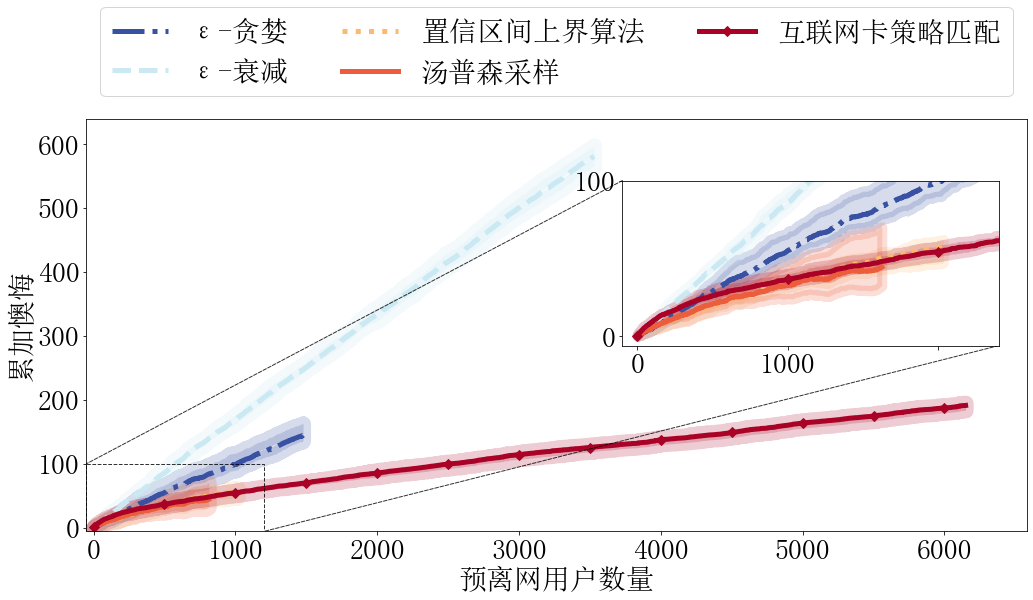

In [118]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

def deal_mutiple_list(dataset):
    avgs = []
    down_errors = []
    up_errors = []    
    
    sample_avgs = []
    sample_down_errors = []
    sample_up_errors = []    
    
#     sample_gran = 10
#     sample_gran = 2
    sample_gran = 1
    count = 0
    
    for data in dataset:
         
        down_error = []
        up_error = []
        avg = []

        max_len = 0
        min_len = 999999
        avg_len = 0
        for i in range(len(data)):
            max_len = max(len(data[i]), max_len)
            min_len = min(len(data[i]), min_len)
            avg_len += len(data[i])
        
        avg_len /= len(data)
        avg_len = int(avg_len)
        # print(f'max_len:{max_len}')    
        
        adopt_len = min_len
#         adopt_len = avg_len
        
        for j in range(adopt_len):
            _max = 0
            _min = 999999
            _avg = 0
            _cnt = 0
            for i in range(len(data)):
                if j >= len(data[i]):
                    continue
                _max = max(data[i][j], _max)
                _min = min(data[i][j], _min)
                _avg = (_avg*(_cnt) + data[i][j])/ (_cnt+1)    
                _cnt += 1

            avg.append(_avg)
            up_error.append(_max - _avg)
            down_error.append(_avg - _min)

        avg = np.array(avg)
        up_error = np.array(up_error)
        down_error = np.array(down_error)  
    
        avgs.append(avg)
        up_errors.append(up_error)
        down_errors.append(down_error)   
        
        if count % sample_gran == 0:
            sample_avgs.append(avg)
            sample_up_errors.append(up_error)
            sample_down_errors.append(down_error) 
            
            
        count += 1

    return down_errors, up_errors, avgs, sample_down_errors, sample_up_errors, sample_avgs

def plot_line_with_error(fig_length, fig_width, avgs, down_errors, up_errors, solver_names, colors):
    # plt.clf()
    # plt.hold(1)
    # colors = ['black', '#CC4F1B', '#1B2ACC', '#3F7F4C', '#CC4F1B', '#1B2ACC', '#3F7F4C']
#     colors = ['#CB181E', '#EC684F', '#F28741', '#FAB051', '#C9DBF3', '#6DADD3', '#2374B6'] #'#0A4990'
#     colors = ['#FF9848', '#CC4F1B', '#1B2ACC', '#3F7F4C', '#CC4F1B', '#1B2ACC', '#3F7F4C']
#     colors = ['#CB181E', '#F28741',  '#C9DBF3', '#6DADD3', '#2374B6']
#     colors = ['#2878b5', '#9ac9db', '#f8ac8c', '#c82423', '#ff8884']
#     colors = ['#CB181E', '#EC684F', '#F28741', '#FAB051', '#C9DBF3', '#6DADD3', '#2374B6']
#     colors = ['#2374B6', '#6DADD3', '#C9DBF3', '#FAB051', '#F28741', '#EC684F', '#CB181E']
#     colors = ['#2374B6', '#6DADD3', '#C9DBF3', '#FAB051', '#F28741', '#EC684F', '#CB181E']
#     colors = ['#2374B6',  '#C9DBF3', '#FAB051', '#F28741', '#CB181E', '#CC4F1B', '#1B2ACC', '#3F7F4C', '#CC4F1B', '#1B2ACC', '#3F7F4C']
#     solver_names = [epsilon+"-Greedy", "Decaying-"+epsilon+"-Greedy", "UCB", "TS", "ICSM"]


    
    edgecolors = colors
    facecolors = colors

    # alphas = [0.5, 0.5, 0.2, 1, 0.5, 0.2, 1]
#     alphas = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
    alphas = [0.2 for i in range(len(colors))]
    
    
    linestyles = ['solid', 'dotted', 'dashed', 'dashdot', 'densely dashed', 'loosely dashdotted']
#     linestyles = ['solid', 'dotted', 'dashed', 'dashdot', '-', '--', '-.']
#     linestyles = ['-', '--', '-.', ':', ':', '+', '']
#     linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    linestyles = ['-.', '--', '-', ':', ':', '--', '-.', ':']
    linestyles = ['-.', '--', ':', '-', '-', '--', '-.', ':']
#     markers = ['v', '^', 'o', 'h', 'D']
#     markers = ['', '', '', '', 'h']
#     markers = ['', '', '', '', 'v']
#     markers = ['', '', '', '', '*']
#     markers = ['', '', '', '', '>']
#     markers = ['', '', '', '', '<']
#     markers = ['', '', '', '', 's']
#     markers = ['', '', '', '', 'X']
    markers = ['', '', '', '', 'D', '', '', '', '', 'D']
#     '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

    # linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid']

#     fig, ax = plt.subplots(figsize=(15*0.3, 9*0.3))
#     fig, ax = plt.subplots(figsize=(8, 6), dpi = 100)
#     fig_length = 9
#     fig, ax = plt.subplots(figsize=(fig_length, fig_length*0.618))
#     fig, ax = plt.subplots(figsize=(fig_length, fig_width))
    fig, ax = plt.subplots(figsize=(15, 9))

    for avg, down_error, up_error, solver_name, color, edgecolor, facecolor, alpha, linestyle, marker in zip(avgs, down_errors, up_errors, solver_names, colors, edgecolors, facecolors, alphas, linestyles, markers):
        # print(avg)
        # print(down_error)
        # print(up_error)
        # print(avg.shape)
        # print(down_error.shape)
        # print(up_error.shape)        
        lw = 5
#         lw = 2
        
#         flw = 2*lw
#         flw = 1*lw
        ms = 1.5*lw

        flw = 3*lw
    # , marker = marker, ms=flw
#         ax.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name)
        ax.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name, marker = marker, ms=ms, markevery=500)
        ax.fill_between(range(len(avg)), avg-down_error, avg+up_error,alpha=alpha, edgecolor=edgecolor, facecolor=facecolor, lw=flw)

    # inset axes....
#     zoom_ratio = 0.28
    zoom_ratio = 0.4
    axins = ax.inset_axes([0.57, 0.45, zoom_ratio, zoom_ratio])
#     axins = ax.inset_axes([0, 100, 1000, 50], transform = ax.transData)
    
    for avg, down_error, up_error, solver_name, color, edgecolor, facecolor, alpha, linestyle, marker in zip(avgs, down_errors, up_errors, solver_names, colors, edgecolors, facecolors, alphas, linestyles, markers):
        # print(avg)
        # print(down_error)
        # print(up_error)
        # print(avg.shape)
        # print(down_error.shape)
        # print(up_error.shape)        
        lw = 5
#         lw = 2
        
#         flw = 2*lw
#         flw = 1*lw
        ms = 1.5*lw

        flw = 2*lw
    # , marker = marker, ms=flw
#         ax.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name)
        axins.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name, marker = marker, ms=ms, markevery=500)
        axins.fill_between(range(len(avg)), avg-down_error, avg+up_error,
            alpha=alpha, edgecolor=edgecolor, facecolor=facecolor, lw=flw)
        
    # subregion of the original image
#     x1, x2, y1, y2 = -50, 1000, -2, 20
    x1, x2, y1, y2 = -50, 1200, -6, 100
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
#     axins.set_xticklabels([])
#     axins.set_yticklabels([])
#     axins.set_xticklabels([0, 0, 500, 1000], fontsize = 24)
#     axins.set_yticklabels([0, 0, 50, 100], fontsize = 24)

        
    link_edgecolor = '#6DADD3'
    link_edgecolor = "black"
    link_alpha = 1
    link_alpha = 0.8
    rect, lines = ax.indicate_inset_zoom(axins)
    rect.set_edgecolor(link_edgecolor)
    rect.set_alpha(link_alpha)
    rect.set_linestyle('--')

    for line in lines:
        line.set_edgecolor(link_edgecolor)
        line.set_alpha(link_alpha)
        line.set_linestyle('--')
#         line.set_visible(True)
    
    
#     ax.set_xlabel("Time Steps")
#     ax.set_xlim(-80, 7000)
#     ax.set_ylim(-4, 280)
    ax.set_xlim(-50, 6580)
    ax.set_ylim(-6, 640)
#     ax.set_xlabel("#. Pre-Churners")
    ax.set_xlabel("预离网用户数量")
#     ax.set_ylabel("Cumulative Regrets")
    ax.set_ylabel("累加懊悔")
    # ax.set_title(f"{solver.bandit.K}-arms bandit")
#     ax.legend(fontsize=28)
    ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3)
    
    font = {'family' : 'Times New Roman',
            'size'   : 28}
    matplotlib.rc('font', **font)
    axins.set_xticklabels([0, 0, 1000])
    axins.set_yticklabels([0, 0, 100])    
    
    plt.tight_layout()
#     plt.savefig("Exp-Perf-Cumulative-Regrets.pdf")

    fig_name = "Ms-ICSM_Exp-Perf-Cumulative-Regrets"
#     plt.savefig(fig_name+".png")
#     plt.savefig(fig_name+".pdf")

    plt.show()       
    

down_errors, up_errors, avgs, sample_down_errors, sample_up_errors, sample_avgs = deal_mutiple_list(regrets)

print(len(regrets)) # model num: 5
print(len(regrets[0])) # experiemnt times: 5
# print(len(regrets[0][0])) # 1st expriment regrets: 1657
# print(len(regrets[0][1])) # 2nd expriment regrets: 6333
for i in range(len(regrets[0])):
    print(len(regrets[0][i]))
# print(regrets[0])
# print(regrets[3][0])

print(len(down_errors))
for down_error in down_errors:
    print(len(down_error)) # length of every model's regret list 
# print(len(down_errors[0]))
# print(len(down_errors[1]))
# print(down_errors[0])

uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75
# plot_line_with_error(avgs, down_errors, up_errors, solver_names, colors)
solver_names = ['ε-贪婪','ε-衰减','置信区间上界算法','汤普森采样','互联网卡策略匹配']
# solver_names = [epsilon+'-贪婪',epsilon+'-衰减','置信区间上界算法','汤普森采样','互联网卡策略匹配']

plot_line_with_error(uni_fig_length, uni_fig_width, avgs, down_errors, up_errors, solver_names, colors)

### Precision&Recall

[(0.0968130081300813, 0.14315447154471544, 0.06253658536585366), (0.004552845528455279, 0.09739837398373984, 0.0035772357723577314), (0.05840650406504066, 0.09222764227642277, 0.07704065040650407), (0.08123577235772357, 0.11066666666666666, 0.1273821138211382), (0.0055609756097561025, 0.23401626016260163, 0.004032520325203237)]
[(0.10025256777235225, 0.14824044451927934, 0.06475837683111635), (0.004714598417241964, 0.10085873042599765, 0.0037043273278329625), (0.06048156255261828, 0.09550429365212998, 0.07977774036033003), (0.0841219060447887, 0.11459841724195993, 0.13190772857383398), (0.005758545209631233, 0.24233035864623673, 0.004175787169557188)]
[(0.09850277111423608, 0.14565307304160807, 0.06362809165356934), (0.004632310364794445, 0.09909835387542394, 0.00363967242948135), (0.05942592439407726, 0.09383737281826454, 0.07838530895855736), (0.08265365208040369, 0.11259822979568204, 0.12960542642071304), (0.005658036231284663, 0.23810075275043432, 0.004102903465960761)]


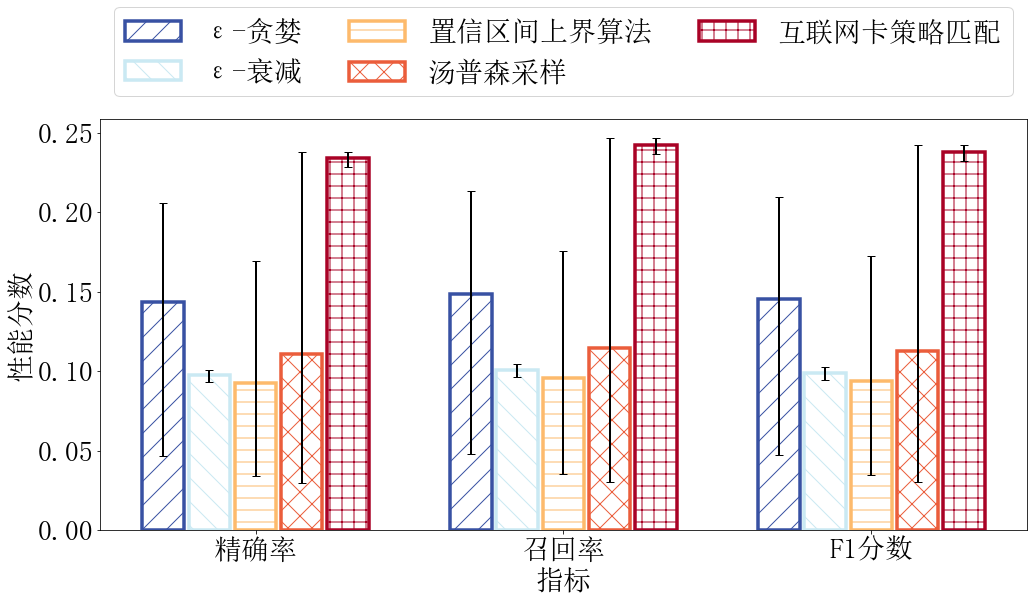

In [120]:
# regret, reward, precision, recall, total_revenue, len_of_regret    
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

precision_list = []
for i, solver_name in enumerate(solver_names):
    precision_list.append(metrics_list[i].get_statistics("precision"))
print(precision_list)
    
recall_list = []
for i, solver_name in enumerate(solver_names):
    recall_list.append(metrics_list[i].get_statistics("recall"))    
print(recall_list) 

f1_score_list = []
for i, solver_name in enumerate(solver_names):
    f1_score_list.append(metrics_list[i].get_statistics("f1_score"))    
print(f1_score_list) 

metrics_height_list = []
for i, solver_name in enumerate(solver_names):
    metrics_height_list.append([precision_list[i][1], recall_list[i][1], f1_score_list[i][1]])
    
metrics_min_list = []
for i, solver_name in enumerate(solver_names):
    metrics_min_list.append([precision_list[i][0], recall_list[i][0], f1_score_list[i][0]])    
    
metrics_max_list = []
for i, solver_name in enumerate(solver_names):
    metrics_max_list.append([precision_list[i][2], recall_list[i][2], f1_score_list[i][2]])

error_array_list = []
for metrics_min, metrics_max in zip(metrics_min_list, metrics_max_list):
    error_array_list.append(np.array([metrics_min, metrics_max]))
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))    
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width))  

x_shift_list = [-2, -1, 0, 1, 2]
x_shift_edge_list = [-1.5, -0.75, 0, 0.75, 1.5]
# labels = ['Precision', 'Recall', "F1-Score"]
labels = ['精确率','召回率','F1分数']
x = np.arange(len(labels))

elinewidth = 2
lw = 3.5
edgewidth = 0.02
capsize = 4
width = 0.135

# hatch_list = ["/", "\\", "-", "x", "|", "+"]
hatch_list = ["/", "\\", "-", "x", "+"]

for i, (solver_name, color, hatch) in enumerate(zip(solver_names, colors, hatch_list)):
#     rects = ax.bar(x = x + x_shift_list[i]*width + edgewidth*x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
    ax.bar(x = x + x_shift_list[i]*width + edgewidth*x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, yerr = error_array_list[i], error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)

# ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3, fontsize=21)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3)


    
# ax.set_xlim(-0.5, 2.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_xlabel('Metrics')
# ax.set_ylabel('Performance Scores')
ax.set_xlabel('指标')
ax.set_ylabel('性能分数')

# plt.tight_layout()
# # plt.savefig("Exp-Perf-Classify.pdf")
# plt.show()

plt.tight_layout()
fig_name = "Ms-ICSM_Exp-Perf-Classify"
# plt.savefig(fig_name+".png")
# plt.savefig(fig_name+".pdf")
plt.show()

### Rewards&Average Reward&Total Revenue

[(595.4, 880.4, 384.6), (28.0, 599.0, 22.0), (359.20000000000005, 567.2, 473.79999999999995), (499.6, 680.6, 783.4), (34.200000000000045, 1439.2, 24.799999999999955)]
[(14204.059999999974, 21678.309999999976, 9734.109999999968), (674.9800000000014, 14950.860000000011, 815.5100000000111), (8844.258, 14165.047999999999, 11002.451999999968), (12180.693999999996, 16890.723999999995, 19140.405999999937), (976.7839999999997, 36300.18399999992, 530.2459999999919)]
x:[0]


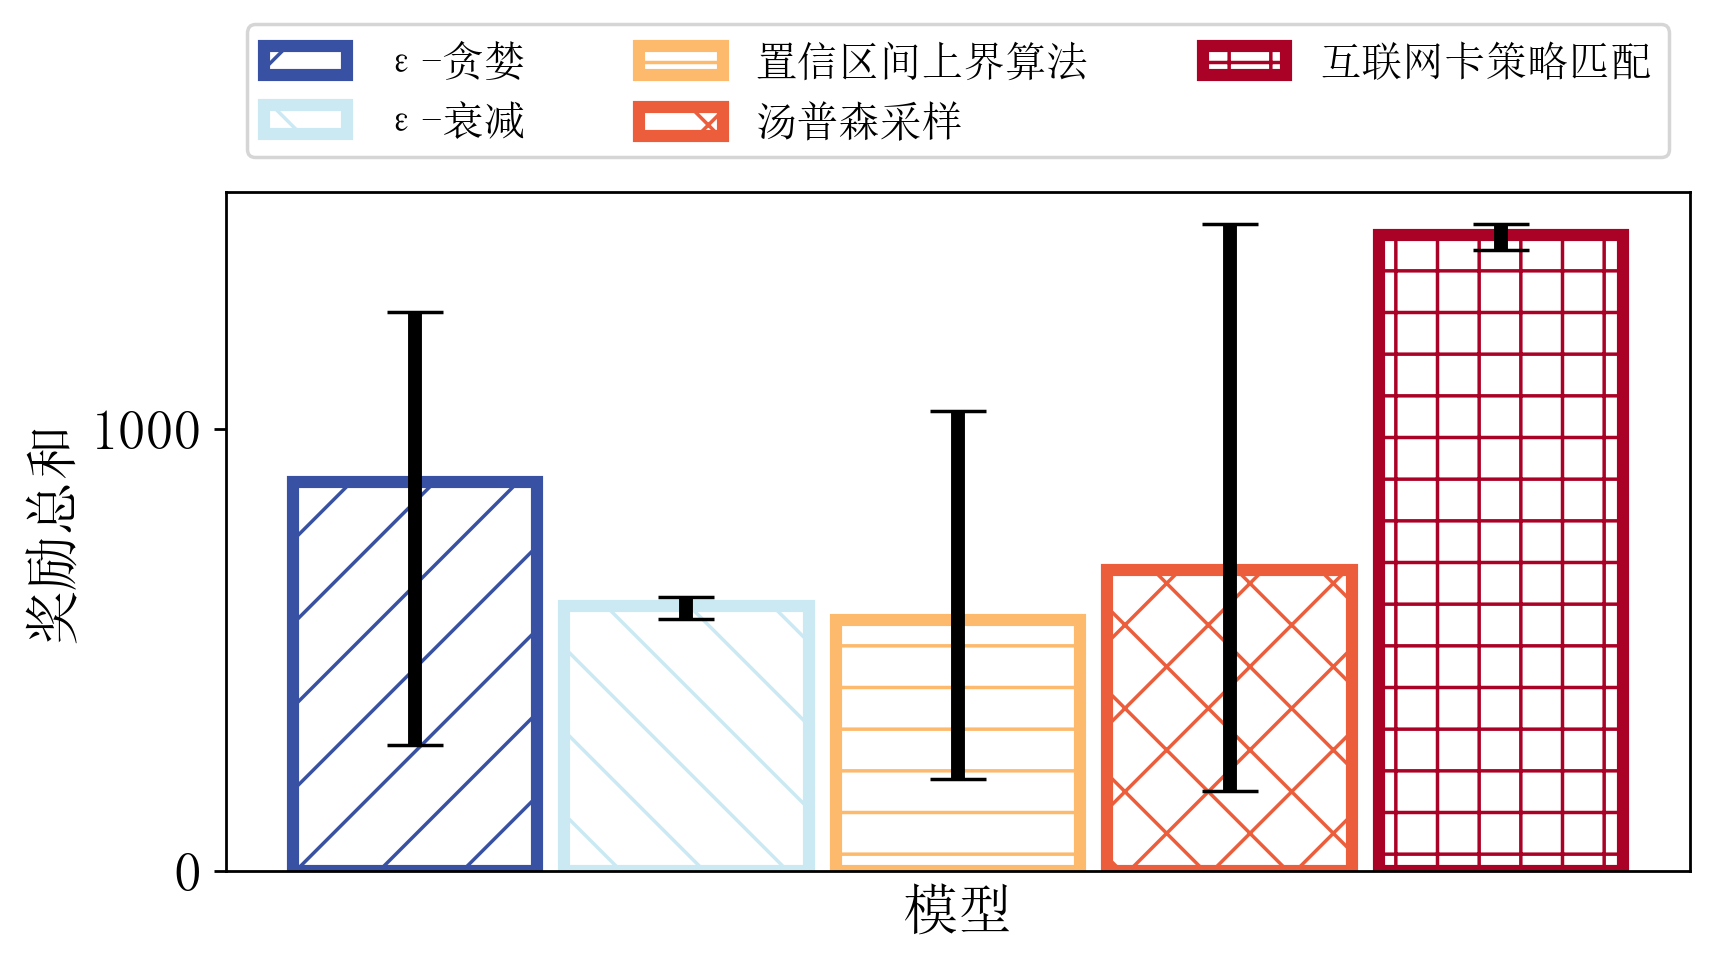

In [131]:
config = {
    "font.family":'serif',
    "font.size": 16,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
# Rewards

reward_list = []
for i, solver_name in enumerate(solver_names):
    reward_list.append(metrics_list[i].get_statistics("reward"))
print(reward_list)
    
total_revenue_list = []
for i, solver_name in enumerate(solver_names):
    total_revenue_list.append(metrics_list[i].get_statistics("total_revenue"))    
print(total_revenue_list)  

metrics_height_list = []
for i, solver_name in enumerate(solver_names):
    metrics_height_list.append([reward_list[i][1]])
    
metrics_min_list = []
for i, solver_name in enumerate(solver_names):
    metrics_min_list.append([reward_list[i][0]])    
    
metrics_max_list = []
for i, solver_name in enumerate(solver_names):
    metrics_max_list.append([reward_list[i][2]])

error_array_list = []
for metrics_min, metrics_max in zip(metrics_min_list, metrics_max_list):
    error_array_list.append(np.array([metrics_min, metrics_max]))

# --plot
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9), dpi=250) 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 4.5), dpi=250) 
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3), dpi=250)   
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width))  

x_shift_list = [-2, -1, 0, 1, 2]
x_shift_edge_list = [-1.5, -0.75, 0, 0.75, 1.5]
# labels = ['Precision', 'Recall', "F1-Score"]
# labels = ['Rewards', 'Total Revenue']
labels = ['Rewards']
x = np.arange(len(labels))
print(f"x:{x}")

elinewidth = 4
lw = 3.5
edgewidth = 0.02
capsize = 8
width = 0.135

# hatch_list = ["/", "\\", "-", "x", "|", "+"]
hatch_list = ["/", "\\", "-", "x", "+"]

for i, (solver_name, color, hatch) in enumerate(zip(solver_names, colors, hatch_list)):
#     rects = ax.bar(x = x + x_shift_list[i]*width + edgewidth*x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
    ax.bar(x = x + x_shift_list[i]*width + edgewidth * x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, yerr = error_array_list[i], error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)


# ax.set_xlim(-0.5, 2.5)
# ax.set_xticks([0, 1])
ax.set_xticks([])
ax.set_xticklabels([])
# ax.set_xlabel('Models')
# ax.set_ylabel('Rewards')
ax.set_xlabel('模型')
ax.set_ylabel('奖励总和')
# ax.set_ylabel('Business Scores')

# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3, fontsize=12)

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

# ax.legend()
# plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
# plt.tight_layout()
# plt.savefig("Exp-Perf-Business-Rewards.pdf")
# plt.show()

plt.tight_layout()
fig_name = "Ms-ICSM_Exp-Perf-Business-Rewards"
# plt.savefig(fig_name+".png")
# plt.savefig(fig_name+".pdf")
plt.show()

[(245.0, 460.0, 828.0), (23.0, 589.0, 17.0), (305.79999999999995, 556.8, 498.20000000000005), (77.60000000000002, 264.6, 136.39999999999998), (26.799999999999955, 1447.8, 32.200000000000045)]
x:[0]


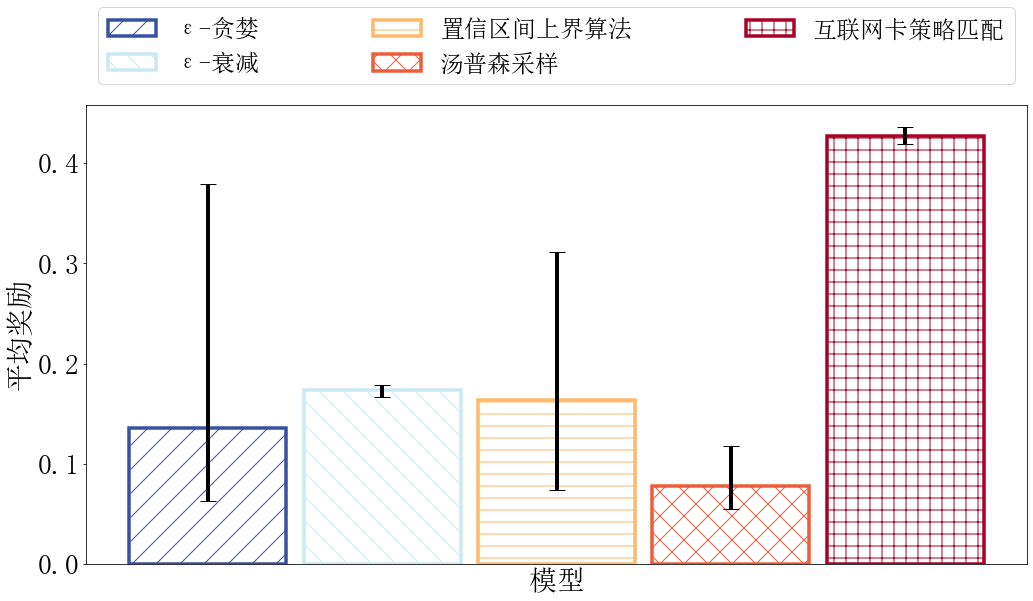

In [55]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# Average Rewards
churner_num = pre_churners[pre_churners['is_churn']==1].shape[0]

reward_list = []
for i, solver_name in enumerate(solver_names):
    reward_list.append(metrics_list[i].get_statistics("reward"))
print(reward_list)

metrics_height_list = []
for i, solver_name in enumerate(solver_names):
    metrics_height_list.append([reward_list[i][1]/ churner_num])
    
metrics_min_list = []
for i, solver_name in enumerate(solver_names):
    metrics_min_list.append([reward_list[i][0]/ churner_num])    
    
metrics_max_list = []
for i, solver_name in enumerate(solver_names):
    metrics_max_list.append([reward_list[i][2]/ churner_num])

error_array_list = []
for metrics_min, metrics_max in zip(metrics_min_list, metrics_max_list):
    error_array_list.append(np.array([metrics_min, metrics_max]))

# --plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))    
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width))  

x_shift_list = [-2, -1, 0, 1, 2]
x_shift_edge_list = [-1.5, -0.75, 0, 0.75, 1.5]
# labels = ['Precision', 'Recall', "F1-Score"]
# labels = ['Rewards', 'Total Revenue']
labels = ['Rewards']
x = np.arange(len(labels))
print(f"x:{x}")

elinewidth = 4
lw = 3.5
edgewidth = 0.02
capsize = 8
width = 0.135

# hatch_list = ["/", "\\", "-", "x", "|", "+"]
hatch_list = ["/", "\\", "-", "x", "+"]

for i, (solver_name, color, hatch) in enumerate(zip(solver_names, colors, hatch_list)):
#     rects = ax.bar(x = x + x_shift_list[i]*width + edgewidth*x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
    rect =  ax.bar(x = x + x_shift_list[i]*width + edgewidth * x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, yerr = error_array_list[i], error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
#     rect =  ax.errorbar(x = x + x_shift_list[i]*width + edgewidth * x_shift_edge_list[i], y = metrics_height_list[i], label = solver_name,  yerr = error_array_list[i], color="#FFFFFF", lw=lw)
    

# ax.set_xlim(-0.5, 2.5)
# ax.set_xticks([0, 1])
ax.set_xticks([])
ax.set_xticklabels([])
# ax.set_xlabel('Models')
# ax.set_ylabel('Average Reward')
ax.set_xlabel('模型')
ax.set_ylabel('平均奖励')
# ax.set_ylabel('Business Scores')

# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3, fontsize=24)

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

# ax.legend()
# plt.tight_layout()
# plt.savefig("Exp-Perf-Business-Average_Reward.pdf")
# plt.show()

plt.tight_layout()
fig_name = "Ms-ICSM_Exp-Perf-Business-Average_Reward"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

x:[0 1 2 3 4]


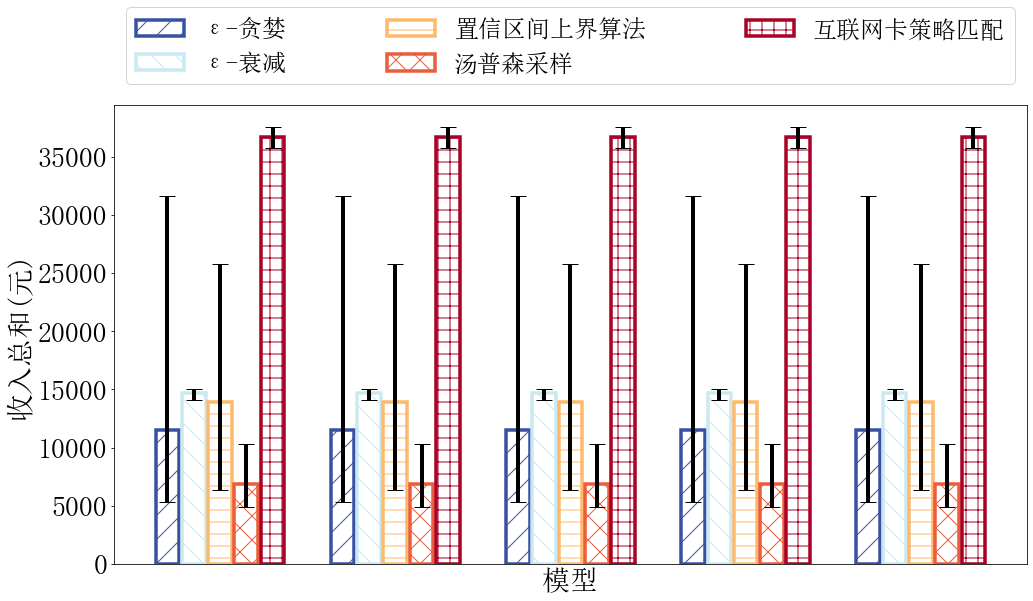

In [116]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# revenue
metrics_height_list = []
for i, solver_name in enumerate(solver_names):
    metrics_height_list.append([total_revenue_list[i][1]])
    
metrics_min_list = []
for i, solver_name in enumerate(solver_names):
    metrics_min_list.append([total_revenue_list[i][0]])    
    
metrics_max_list = []
for i, solver_name in enumerate(solver_names):
    metrics_max_list.append([total_revenue_list[i][2]])

error_array_list = []
for metrics_min, metrics_max in zip(metrics_min_list, metrics_max_list):
    error_array_list.append(np.array([metrics_min, metrics_max]))
    
# --p
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width))  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9))  

x_shift_list = [-2, -1, 0, 1, 2]
x_shift_edge_list = [-1.5, -0.75, 0, 0.75, 1.5]
# labels = ['Precision', 'Recall', "F1-Score"]
# labels = ['Rewards', 'Total Revenue']
# labels = ['Rewards']
x = np.arange(len(labels))
print(f"x:{x}")

elinewidth = 4
lw = 3.5
edgewidth = 0.02
capsize = 8
width = 0.135

# hatch_list = ["/", "\\", "-", "x", "|", "+"]
hatch_list = ["/", "\\", "-", "x", "+"]

# for i, (solver_name, color, hatch) in enumerate(zip(solver_names, colors, hatch_list)):
# #     rects = ax.bar(x = x + x_shift_list[i]*width + edgewidth*x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
#     rect =  ax.bar(x = x + x_shift_list[i]*width + edgewidth * x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, yerr = error_array_list[i], error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
# #     rect =  ax.errorbar(x = x + x_shift_list[i]*width + edgewidth * x_shift_edge_list[i], y = metrics_height_list[i], label = solver_name,  yerr = error_array_list[i], color="#FFFFFF", lw=lw)
    

    
for i, (solver_name, color, hatch) in enumerate(zip(solver_names, colors, hatch_list)):
#     rects = ax.bar(x = x + x_shift_list[i]*width + edgewidth*x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)
    ax.bar(x = x + x_shift_list[i]*width + edgewidth * x_shift_edge_list[i], height = metrics_height_list[i], width = width, label = solver_name, edgecolor = color, hatch = hatch, yerr = error_array_list[i], error_kw = {'capsize':capsize,'elinewidth':elinewidth}, color="#FFFFFF", lw=lw)

# ax.set_yscale("linear")
# ax.set_xlim(-0.5, 2.5)
# ax.set_xticks([0, 1])
ax.set_xticks([])
ax.set_xticklabels([])
# ax.set_xlabel('Models')
# ax.set_ylabel('Total Revenue(¥)')
ax.set_xlabel('模型')
ax.set_ylabel('收入总和(元)')

# ax.set_ylabel('Business Scores')

# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3, fontsize=24)

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

# ax.legend()
# plt.tight_layout()
# plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
# plt.savefig("Exp-Perf-Business-Total_Revenue.pdf")
# plt.show()

plt.tight_layout()
fig_name = "Ms-ICSM_Exp-Perf-Business-Total_Revenue"
# plt.savefig(fig_name+".png")
# plt.savefig(fig_name+".pdf")
plt.show()


### City&Gender&Age&Churn Risk

5
5
   churn_group  sum_0  count_0  sum_1  count_1  sum_2  count_2  sum_3  \
0          0.0   1007     2223    999     2223   1013     2223   1025   
1          1.0    641     1455    624     1455    628     1455    616   
2          2.0    463     1103    478     1103    483     1103    481   
3          3.0    439     1040    424     1040    401     1040    421   
4          4.0    147      329    145      329    128      329    136   

   count_3  sum_4  count_4  sum_avg  sum_min  sum_max  count_avg  count_min  \
0     2223   1006     2223   1010.0      999     1025     2223.0       2223   
1     1455    600     1455    621.8      600      641     1455.0       1455   
2     1103    461     1103    473.2      461      483     1103.0       1103   
3     1040    398     1040    416.6      398      439     1040.0       1040   
4      329    130      329    137.2      128      147      329.0        329   

   count_max    rate_0    rate_1    rate_2    rate_3    rate_4  rate_avg  \
0     

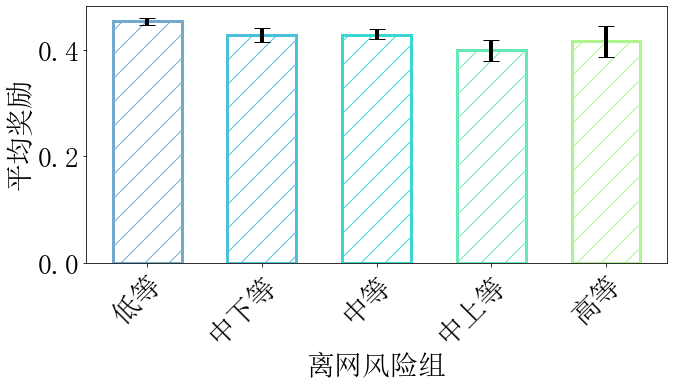

In [88]:

config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# --d
print(len(dis_metrics_list_list[0])) # first distribution's random times
print(len(dis_metrics_list_list[0][0].get_rewards())) # first model's random times

rewards = dis_metrics_list_list[0][4].get_rewards()
# print(rewards[0])

city_user_num_list = [577, 839, 402, 288, 730, 475, 583, 442, 394, 730, 263, 154, 498, 544]
city_gdp_list = [3780, 11000, 3003, 2257, 3372, 2410, 3624, 1792, 1640, 2152, 705, 552, 1616, 2016]

# group_feature = "lan_id"

# group_feature = "own_gender_cd_index"

# group_feature = "own_age_group"
# pre_churners["own_age_group"] = (pre_churners['own_age'] - 16) // 5

group_feature = "churn_group"
pre_churners["churn_group"] = (pre_churners['churn_prob'] - 0.3) // 0.14 # 0.3~0.99

stats = None
for i, reward in enumerate(rewards):
    pre_churners['is_reserved'] = reward

#     print(f"before merge:{pre_churners.shape}")
    # pre_churners = pre_churners.merge(ic_37w[["prod_inst_id", 'lan_id']], on = "prod_inst_id", how = "left")
    # print(f"after merge:{pre_churners.shape}")
    # check_all(pre_churners)

#     stat_obj = pre_churners[pre_churners['is_churn'] == 1]
    stat_obj = pre_churners.copy()

#     group_feature = "lan_id"
    
    stat_feature = "is_reserved"
    sum_stat = stat_obj.groupby(group_feature)[stat_feature].sum()
    # sum_stat.reset_index(inplace=True)

    count_stat = stat_obj.groupby(group_feature)[stat_feature].count()
    # count_stat.reset_index(inplace=True)

    tmp_stats = stat_obj.groupby(group_feature)[stat_feature].agg(['sum', 'count'])
    
    if stats is None:
        stats = tmp_stats
    else:
        stats = stats.join(tmp_stats, how="outer")
        
    stats.rename(columns={"sum":f"sum_{i}", "count":f"count_{i}"}, inplace=True)
# print(stats)

stats['sum_avg'] = (stats['sum_0'] + stats['sum_1'] + stats['sum_2'] + stats['sum_3'] + stats['sum_4'])/5
stats['sum_min'] = stats[['sum_0','sum_1','sum_2','sum_3','sum_4']].min(axis=1)
stats['sum_max'] = stats[['sum_0','sum_1','sum_2','sum_3','sum_4']].max(axis=1)

stats['count_avg'] = (stats['count_0'] + stats['count_1'] + stats['count_2'] + stats['count_3'] + stats['count_4'])/5
stats['count_min'] = stats[['count_0','count_1','count_2','count_3','count_4']].min(axis=1)
stats['count_max'] = stats[['count_0','count_1','count_2','count_3','count_4']].max(axis=1)

for i in range(5):
    stats[f'rate_{i}'] = stats[f'sum_{i}'] / stats[f'count_{i}']
# stats['rate_avg'] = stats['sum_avg'] / stats['count_avg']
stats['rate_avg'] = (stats['rate_0'] + stats['rate_1'] + stats['rate_2'] + stats['rate_3'] + stats['rate_4'])/5
stats['rate_min'] = stats[['rate_0','rate_1','rate_2','rate_3','rate_4']].min(axis=1)
stats['rate_max'] = stats[['rate_0','rate_1','rate_2','rate_3','rate_4']].max(axis=1)

# for i, series in stats.iterrows():
#     series['sum_min'] = min(series['sum_0'] , series['sum_1'] , series['sum_2'] , series['sum_3'] , series['sum_4'])

stats.reset_index(inplace=True)

# city_dict = {
#     10: "YueYang",
#     11: "ChangSha",
#     12: "ZhuZhou",
#     13: "XiangTan",
#     14: "HengYang",
#     15: "ChenZhou",
#     16: "ChangDe",
#     17: "YiYang",
#     18: "LouDi",
#     19: "ShaoYang",
#     20: "JiShou",
#     21: "ZhangJiaJie",
#     22: "HuaiHua",
#     23: "YongZhou"
# }

city_dict = {
    10: "10",
    11: "11",
    12: "12",
    13: "13",
    14: "14",
    15: "15",
    16: "16",
    17: "17",
    18: "18",
    19: "19",
    20: "20",
    21: "21",
    22: "22",
    23: "23"
}


gender_dict = {
    0: "Male", 
    1: "Female"
}

age_dict = {
    0: "16-20",
    1: "21-25",
    2: "26-30",
    3: "31-35",
    4: "36-40",
    5: "41-45",
    6: "46-50",
    7: "51-55",
    8: "56-60",
    9: "61-65",
    10: "66-70",
    11: "71-75",
    12: "76-80",
    13: "81-85"
}

churn_dict = {
    0: "Lower",
    1: "Middle-Lower",
    2: "Middle",
    3: "Upper-Middle",
    4: "Upper"
}

churn_dict = {
    0: "低等",
    1: "中下等",
    2: "中等",
    3: "中上等",
    4: "高等"
}

# stats['city_name'] = stats['lan_id'].apply(lambda x: city_dict[x])
# stats['user_num'] = city_user_num_list
# stats['gdp'] = city_gdp_list
# # stats.sort_values(by='user_num', inplace=True, ascending=False)
# stats.sort_values(by='gdp', inplace=True, ascending=False)
# stats.reset_index(inplace=True)

# stats['gender_name'] = stats['own_gender_cd_index'].apply(lambda x: gender_dict[x])
# stats['age_name'] = stats[group_feature].apply(lambda x: age_dict[x])
stats['churn_name'] = stats[group_feature].apply(lambda x: churn_dict[x])

print(stats)



# --p

base_color_list = colors
# base_color_list = ['', '', '', '', '', '', '']
base_color_list = ['#72aace', '#4bc1da', '#38d7d1', '#68e8b4', '#adf48f', '#f9f871']
base_color_list = ['#eb5d3b', '#d7486c', '#a94d8a', '#6f548e', '#3f5279', '#2f4858']
base_color_list = ['#fefbba']
base_color_list = ['#a90226']

base_color_list = ['#72aace', '#4bc1da', '#38d7d1', '#68e8b4', '#adf48f', '#fefbba', '#f9f871', 
                   '#eb5d3b', '#a90226', '#d7486c', '#a94d8a', '#6f548e', '#3f5279', '#2f4858']

color_list = []
for i in range(stats.shape[0]):
    color_list.append(base_color_list[i%len(base_color_list)])

lw = 3
edgewidth = 0.015
elinewidth = 4
capsize = 8

fig, ax = plt.subplots(figsize=(10, 6))

group_attr = "city"
# group_attr = "gender"
group_attr = "age"
group_attr = "churn"



show_col = 'sum'
show_col = 'rate'
# show_col = 'count'
# show_col = 'rate_avg'

print(stats.at[0, group_attr+'_name'])
print(stats.at[0, show_col+"_avg"])
print(stats)

for i,color in enumerate(color_list):
#     print(error_matrix[i])
#     rects = ax.bar([stats.at[i,'city_name']], [stats.at[i, show_col]], 0.6, edgecolor=color, color=['#FFFFFF'], hatch="/", lw=lw, error_kw={'capsize':capsize,'elinewidth':elinewidth})
#     rects = ax.bar([stats.at[i,'city_name']], [stats.at[i, show_col+"_avg"]], 0.6, yerr=[stats.at[i, show_col+"_max"] - stats.at[i, show_col+"_avg"], stats.at[i, show_col+"_avg"] - stats.at[i, show_col+"_min"]], edgecolor=color, color=['#FFFFFF'], hatch="/", lw=lw, error_kw={'capsize':capsize,'elinewidth':elinewidth})
    rects = ax.bar([stats.at[i, group_attr+'_name']], [stats.at[i, show_col+"_avg"]], 0.6, yerr=[[stats.at[i, show_col+"_max"] - stats.at[i, show_col+"_avg"]], [stats.at[i, show_col+"_avg"] - stats.at[i, show_col+"_min"]]], edgecolor=color, color=['#FFFFFF'], hatch="/", lw=lw, error_kw={'capsize':capsize,'elinewidth':elinewidth})
#     print(f'{i}:{[stats.at[i, show_col+"_avg"]]}')
#     print(f'{i}:{[[stats.at[i, show_col+"_max"] - stats.at[i, show_col+"_avg"]], [stats.at[i, show_col+"_avg"] - stats.at[i, show_col+"_min"]]]}')
    
    #     rects = ax.bar(stats[i:'city_name'].values.tolist(), stats[i:'sum_avg'].values.tolist(), 0.6, edgecolor=color, color=['#FFFFFF'], hatch="/", lw=lw, yerr=error_matrix[i] ,error_kw={'capsize':capsize,'elinewidth':elinewidth})
    # rects = ax.bar([group_list[i]], [avg_num_list[i]], 0.6, edgecolor=color, color=['#FFFFFF'], hatch="/", lw=lw)
#     ax.bar_label(rects, padding=3)


xticks = np.arange(0, stats.shape[0])
# xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
print(xticks)
print(stats[group_attr+'_name'].values.tolist())
# ax.legend(brand_list)
# ax.set_xlabel('City')
# ax.set_xlabel('Gender')
# ax.set_xlabel('Age Group')
# ax.set_xlabel('Churn Risk Class')

# ax.set_xlabel('城市')
# ax.set_xlabel('Gender')
# ax.set_xlabel('年龄组')
ax.set_xlabel('离网风险组')

# ax.set_xticks(xticks)
# ax.set_xticks(xticks)
labels = stats[group_attr+'_name'].values.tolist()

# base_labels = stats[group_attr+'_name'].values.tolist()
# labels = []
# for i, base_label in enumerate(base_labels):
#     if i % 2 == 0:
#         labels.append(base_label)
#     else:
#         labels.append("")
        
ax.set_xticks(xticks, labels, rotation=45, rotation_mode='anchor', ha='right')
# ax.set_xticks(xticks, stats[group_attr+'_name'].values.tolist())

# ax.set_xticklabels(stats['city_name'].values.tolist())
# ax.set_ylabel('Rewards')
# ax.set_ylabel('Average Reward')
ax.set_ylabel('奖励总和')
ax.set_ylabel('平均奖励')
# ax.set_ylim(0, 1)
# ax.set_ylim(0, 0.56)
# ax.set_ylim(0, 0.63)

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)


# plt.tight_layout()

# plt.savefig("Exp-Imp-City-Rewards.pdf")
# plt.savefig("Exp-Imp-City-Average_Reward.pdf")
# plt.savefig("Exp-Imp-Gender-Rewards.pdf")
# plt.savefig("Exp-Imp-Gender-Rewards_Rate.pdf")
# plt.savefig("Exp-Imp-Age-Rewards.pdf")
# plt.savefig("Exp-Imp-Age-Average_Reward.pdf")
# plt.savefig("Exp-Imp-Churn-Rewards.pdf")
# plt.savefig("Exp-Imp-Churn-Average_Reward.pdf")

# plt.show()

plt.tight_layout()

fig_suffix = "Exp-Imp-City-Rewards"
# fig_suffix = "Exp-Imp-City-Average_Reward"
# fig_suffix = "Exp-Imp-Gender-Rewards"
# fig_suffix = "Exp-Imp-Gender-Rewards_Rate"
fig_suffix = "Exp-Imp-Age-Rewards"
fig_suffix = "Exp-Imp-Age-Average_Reward"
fig_suffix = "Exp-Imp-Churn-Rewards"
fig_suffix ="Exp-Imp-Churn-Average_Reward"

fig_name = "Ms-ICSM_"+  fig_suffix
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

5
5
5711
6150
5567
3597
5691
5
3597
3564
2419
4660
6150


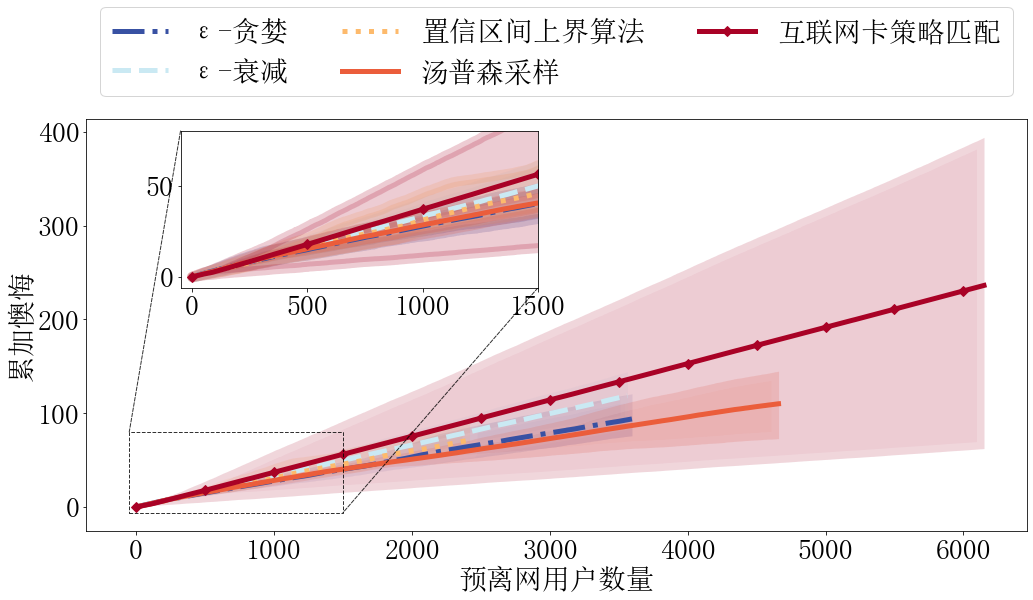

In [115]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

def plot_line_with_error2(fig_length, fig_width, avgs, down_errors, up_errors, solver_names, colors, suc_rate_matrix_method):

    edgecolors = colors
    facecolors = colors

    alphas = [0.2 for i in range(len(colors))]
    
    linestyles = ['-.', '--', ':', '-', '-', '--', '-.', ':']

    markers = ['', '', '', '', 'D', '', '', '', '', 'D']

#     fig, ax = plt.subplots(figsize=(fig_length, fig_width))
    fig, ax = plt.subplots(figsize=(15, 9))

    for avg, down_error, up_error, solver_name, color, edgecolor, facecolor, alpha, linestyle, marker in zip(avgs, down_errors, up_errors, solver_names, colors, edgecolors, facecolors, alphas, linestyles, markers):
  
        lw = 5

        ms = 1.5*lw

        flw = 3*lw

        ax.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name, marker = marker, ms=ms, markevery=500)
 
        ax.fill_between(range(len(avg)), avg-down_error, avg+up_error,alpha=alpha, 
                         facecolor=facecolor, edgecolor="#FFFFFF", lw=flw, interpolate = False)     
  
    # inset axes....
#     zoom_ratio = 0.28
#     zoom_ratio = 0.4
    zoom_ratio = 0.3 # Ex
    zoom_ratio = 0.38
#     axins = ax.inset_axes([0.05, 0.55, zoom_ratio, zoom_ratio]) # Gamma
#     axins = ax.inset_axes([0.11, 0.55, zoom_ratio, zoom_ratio]) # Poisson
#     axins = ax.inset_axes([0.13, 0.64, zoom_ratio, zoom_ratio]) # Ex
#     axins = ax.inset_axes([0.13, 0.54, zoom_ratio, zoom_ratio]) # Gaussian
#     axins = ax.inset_axes([0.13, 0.54, zoom_ratio, zoom_ratio]) # Uniform
    axins = ax.inset_axes([0.1, 0.59, zoom_ratio, zoom_ratio]) # Bi
    
    for avg, down_error, up_error, solver_name, color, edgecolor, facecolor, alpha, linestyle, marker in zip(avgs, down_errors, up_errors, solver_names, colors, edgecolors, facecolors, alphas, linestyles, markers):
        # print(avg)
        # print(down_error)
        # print(up_error)
        # print(avg.shape)
        # print(down_error.shape)
        # print(up_error.shape)        
        lw = 5
#         lw = 2
        
#         flw = 2*lw
#         flw = 1*lw
        ms = 1.5*lw

        flw = 2*lw
    # , marker = marker, ms=flw
#         ax.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name)
        axins.plot(range(len(avg)), avg, color=color, linestyle=linestyle, lw=lw, label=solver_name, marker = marker, ms=ms, markevery=500)
        axins.fill_between(range(len(avg)), avg-down_error, avg+up_error,
            alpha=alpha, edgecolor=edgecolor, facecolor=facecolor, lw=flw)
        
    # subregion of the original image
#     x1, x2, y1, y2 = -50, 1000, -2, 20
#     x1, x2, y1, y2 = -50, 1800, -6, 300 # Gamma
#     x1, x2, y1, y2 = -50, 3000, -6, 150 # Poisson
#     x1, x2, y1, y2 = -50, 1000, -6, 250 # Ex
#     x1, x2, y1, y2 = -50, 1500, -6, 200 # Gaussian
#     x1, x2, y1, y2 = -50, 3000, -6, 300 # Uniform
#     x1, x2, y1, y2 = -50, 2000, -6, 80
    x1, x2, y1, y2 = -50, 1500, -6, 80

    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
#     axins.set_xticklabels([])
#     axins.set_yticklabels([])
#     axins.set_xticklabels([0, 0, 500, 1000], fontsize = 24)
#     axins.set_yticklabels([0, 0, 50, 100], fontsize = 24)
#     axins.set_xticklabels([0, 0, 1000], fontsize = 24)
#     axins.set_yticklabels([0, 0, 100], fontsize = 24)
        
    link_edgecolor = '#6DADD3'
    link_edgecolor = "black"
    link_alpha = 1
    link_alpha = 0.8
    rect, lines = ax.indicate_inset_zoom(axins)
    rect.set_edgecolor(link_edgecolor)
    rect.set_alpha(link_alpha)
    rect.set_linestyle('--')

    for line in lines:
        line.set_edgecolor(link_edgecolor)
        line.set_alpha(link_alpha)
        line.set_linestyle('--')

#     ax.set_xlabel("Time Steps")
#     ax.set_xlim(-80, 7000)
#     ax.set_ylim(-4, 280)
#     ax.set_xlim(-50, 6580)
#     ax.set_ylim(-6, 640)
#     ax.set_xlabel("#. Pre-Churners")
#     ax.set_ylabel("Cumulative Regrets")
    ax.set_xlabel("预离网用户数量")
    ax.set_ylabel("累加懊悔")
    # ax.set_title(f"{solver.bandit.K}-arms bandit")
#     ax.legend(fontsize=28)
    ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3)
    
#     plt.tight_layout()
#     plt.savefig("Exp-Imp-Cumulative-Regrets-"+suc_rate_matrix_method+".pdf")

#     plt.show()       
    
    plt.tight_layout()
    fig_name = "Ms-ICSM_Exp-Imp-Cumulative-Regrets-"+suc_rate_matrix_method
    plt.savefig(fig_name+".png")
    plt.savefig(fig_name+".pdf")
    plt.show()    

down_errors, up_errors, avgs, sample_down_errors, sample_up_errors, sample_avgs = deal_mutiple_list(regrets)

print(len(regrets)) # model num: 5
print(len(regrets[0])) # experiemnt times: 5
for i in range(len(regrets[0])):
    print(len(regrets[0][i]))
# print(regrets[0])
# print(regrets[3][0])

print(len(down_errors))
for down_error in down_errors:
    print(len(down_error)) # length of every model's regret list 
# print(down_errors[0])

uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

solver_names = ['ε-贪婪','ε-衰减','置信区间上界算法','汤普森采样','互联网卡策略匹配']
plot_line_with_error2(uni_fig_length, uni_fig_width, avgs, down_errors, up_errors, solver_names, colors, suc_rate_matrix_method_list[0])